# GRADED CHALLENGE 1 PHASE 1
`Kevin Boy Gunawan`
<br>

`FTDS-009`

## 1. Introduction

Dataset pada projek ini merupakan data order pada brand uber dan lyft yang didukung dengan atribut2 lain seperti jara dan faktor2 lingkungan. dataset diambil dalam rentang waktu selama 2 bulan.
<br>
<br>
dataset dapat diunduh di : https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma
<br>
<br>
**Objektif dari projek ini adalah memprediksi nilai price dari brand uber dan lyft berdasarkan atribut2 pada dataset dengan menggunakan model machine learning regressilinear**

## 2. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## 3. Data Loading

In [3]:
data = pd.read_csv('/content/drive/MyDrive/rideshare_kaggle.csv')

In [4]:
pd.set_option("display.max_columns", 100)

In [5]:
data.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
641877,46761228-41df-451e-adcd-92e3b6337e4d,1.543427e+09,17,28,11,2018-11-28 17:36:24,America/New_York,North End,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,10.5,1.03,1.0,42.3644,-71.0661,40.77,35.14,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.63,8.76,14.90,1543431600,10.000,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.17,991.33,303,1.00,1,10.000,352.4,1543405938,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800
396092,89f7a287-7ec0-421f-aca4-4008f3d9520f,1.545061e+09,15,17,12,2018-12-17 15:35:07,America/New_York,North End,North Station,Lyft,lyft_plus,Lyft XL,11.0,1.10,1.0,42.3519,-71.0551,36.87,31.64,Overcast,Light rain in the morning.,0.0005,0.07,0.87,6.56,8.60,1545022800,9.588,41.44,1545076800,23.93,1545138000,35.95,1545076800,11.82,1545134400,cloudy,33.45,1003.27,330,1.00,1,9.588,326.4,1545048555,1545081260,0.33,0.0175,1545066000,34.14,1545044400,41.44,1545076800,28.12,1545044400,35.95,1545076800
551609,d3d7e0e9-4541-4ba6-8825-f9b4fef3ea82,1.543652e+09,8,1,12,2018-12-01 08:18:01,America/New_York,Fenway,West End,Lyft,lyft,Lyft,10.5,2.85,1.0,42.2148,-71.0330,32.34,28.52,Mostly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.81,3.95,3.95,1543672800,9.949,44.11,1543690800,34.58,1543712400,43.44,1543690800,35.23,1543712400,partly-cloudy-night,27.25,1019.38,304,0.83,0,9.949,284.1,1543665299,1543698873,0.82,0.0000,1543683600,30.17,1543662000,44.11,1543690800,25.87,1543662000,43.44,1543690800
489590,eda5e343-fedc-41c9-82d6-d5f9d8e2ed1a,1.544830e+09,23,14,12,2018-12-14 23:20:06,America/New_York,Beacon Hill,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,1.51,1.0,42.3505,-71.1054,41.43,39.23,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.79,3.73,3.73,1544846400,9.716,46.70,1544814000,40.93,1544835600,44.06,1544817600,38.98,1544835600,partly-cloudy-night,35.45,1028.05,179,0.82,0,9.716,290.8,1544789245,1544822025,0.24,0.0000,1544806800,26.51,1544788800,46.70,1544814000,27.16,1544788800,44.06,1544817600
227479,1255a5b6-7fa5-45ae-bba6-4fe9bca4b51b,1.543433e+09,19,28,11,2018-11-28 19:23:07,America/New_York,Financial District,Fenway,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,4.48,1.0,42.3503,-71.0810,41.47,35.66,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.63,9.54,14.86,1543431600,10.000,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,cloudy,29.72,991.85,295,1.00,0,10.000,354.2,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
#copy data
data_copy = data.copy()

In [8]:
data.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [9]:
data.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [10]:
data.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [11]:
data[data.cab_type=='Uber'].name.unique()

array(['UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [12]:
data[data.cab_type=='Lyft'].name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black'],
      dtype=object)

In [13]:
data.short_summary.unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [14]:
data.long_summary.unique()

array([' Rain throughout the day. ',
       ' Rain until morning, starting again in the evening. ',
       ' Light rain in the morning. ',
       ' Partly cloudy throughout the day. ',
       ' Mostly cloudy throughout the day. ',
       ' Light rain in the morning and overnight. ',
       ' Light rain until evening. ', ' Foggy in the morning. ',
       ' Overcast throughout the day. ',
       ' Possible drizzle in the morning. ',
       ' Rain in the morning and afternoon. '], dtype=object)

In [15]:
data.icon.unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day '], dtype=object)

## 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### a. Time Realated EDA

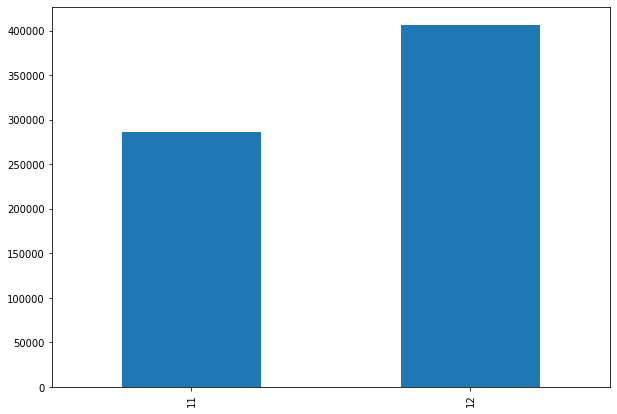

In [16]:
data.month.value_counts().sort_index().plot(kind='bar', figsize=(10,7))

secara akumulatif order paling banyak terjadi pada bulan ke-12

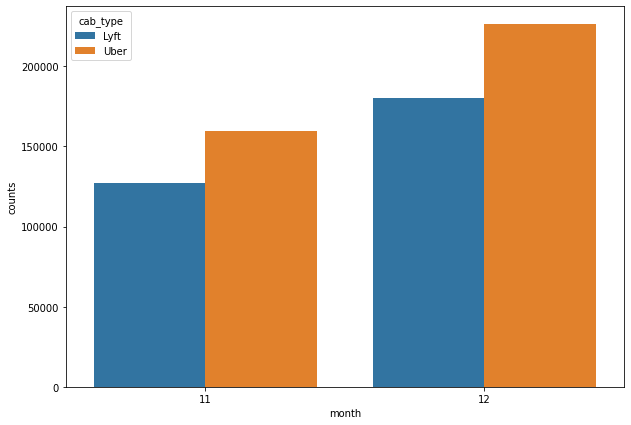

In [17]:
df = data.groupby(['month', 'cab_type']).size().reset_index(name='counts')
plt.figure(figsize=(10,7))
sns.barplot(x='month', y='counts', hue='cab_type', data=df)

dari bulan ke-11 hingga ke-12, jumlah order atau transaksi via Uber lebih unggul dibadingkan Lyft

<BarContainer object of 17 artists>

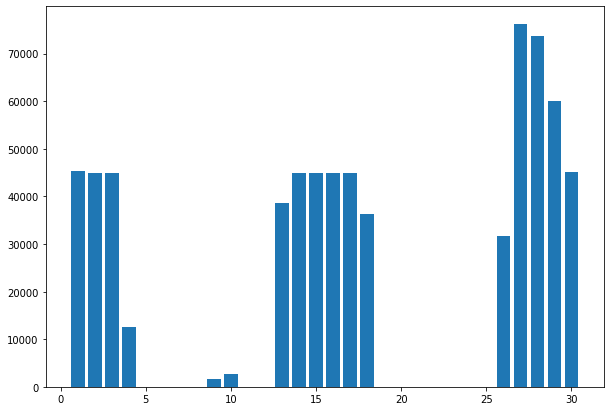

In [18]:
df = data.day.value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(df.index, df.values)

ada kejanggalan pada barchart diatas. pada hari 5 hingga 8 dan 19 hingga 25 tidak ada satupun data order yang tercatat, baik di bulan ke 11 mapupun ke 12 sekalipun.

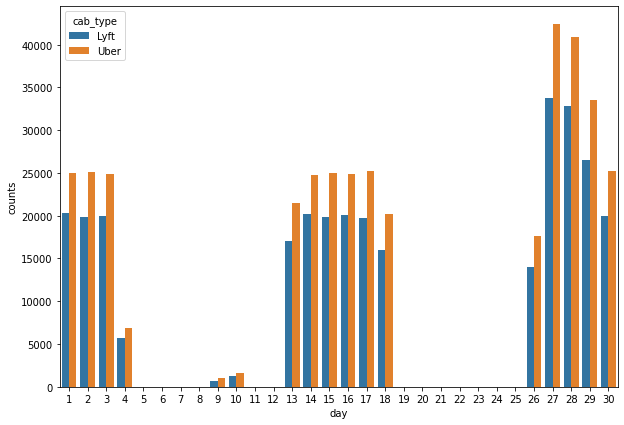

In [19]:
df = data.groupby(['day', 'cab_type']).size().reset_index(name='counts')
plt.figure(figsize=(10,7))
sns.barplot(x='day', y='counts', hue='cab_type', data=df, order=range(1,31))

order harian kumulatif untuk uber selalu lebih unggul dibanding Lyft

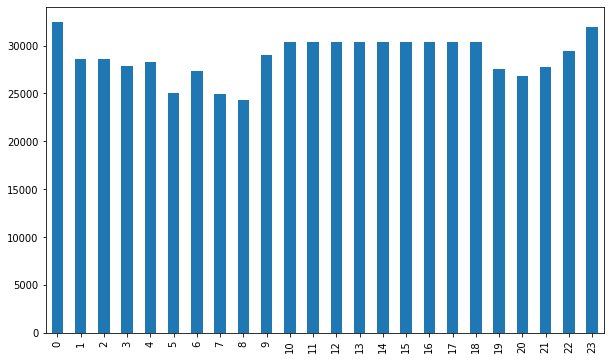

In [20]:
data.hour.value_counts().sort_index().plot(kind='bar', figsize=(10,6))

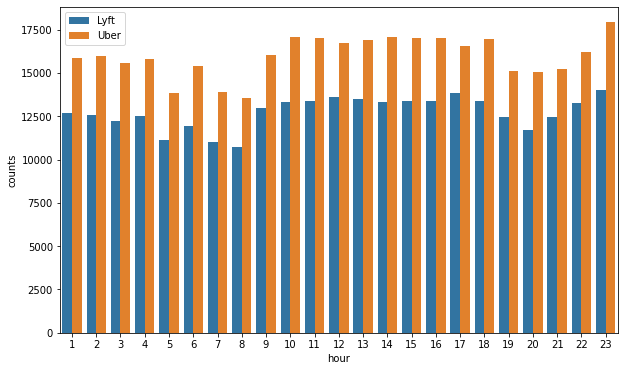

In [21]:
df = data.groupby(['hour', 'cab_type']).size().reset_index(name='counts')
plt.figure(figsize=(10,6))
sns.barplot(x='hour', y='counts', hue='cab_type', data=df, order=range(1,24))
plt.legend()

jumlah order kumulatif setiap jam untuk uber juga selalu lebih unggul dibanding Lyft

In [22]:
df_month11 = data[data.month==11]
df_month12 = data[data.month==12]

In [23]:
df_day1 = df_month11.groupby('day')['price'].mean()
df_day2 = df_month12.groupby('day')['price'].mean()

Text(0.5, 1.0, 'Rata-rata harga perhari Bulan 12')

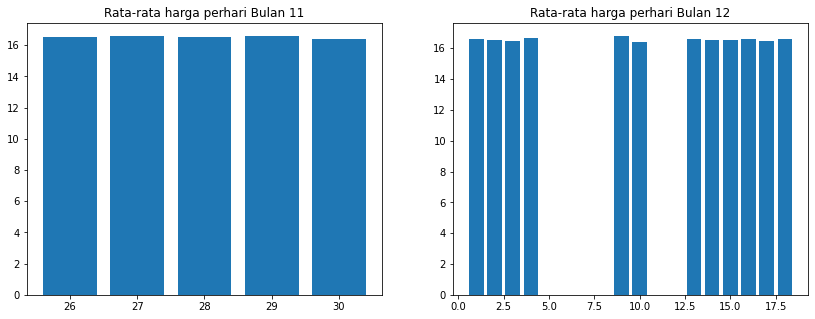

In [24]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(df_day1.index, df_day1.values)
ax[0].set_title('Rata-rata harga perhari Bulan 11')
ax[1].bar(df_day2.index, df_day2.values)
ax[1].set_title('Rata-rata harga perhari Bulan 12')

rata-rata price perhari pada bulan 11 maupun 12 berada di rentang yang sama yaitu kisaran 16. namun data hari dari dataset tidak lengkap dan banyak data hari yang tidak tercatat, sebagai contoh dibulan 11, transaksi hanya tercatat di hari 26,27,28,29,30. penulis menduga nilai rata2 price akan naik dihari weekend atau weekday, tapi disini tidak terjadi karena informasi transaksi di hari tertentu tidak tersedia. oleh karena itu penulis mungkin saja akan melakukan DROP KOLOM HARI.

In [25]:
df_hour1 = df_month11.groupby('hour')['price'].mean()
df_hour2 = df_month12.groupby('hour')['price'].mean()

Text(0.5, 1.0, 'Rata-rata harga perJam Bulan 12')

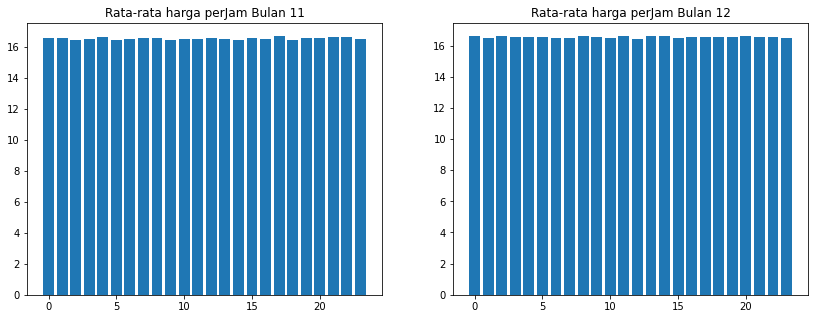

In [26]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(df_hour1.index, df_hour1.values)
ax[0].set_title('Rata-rata harga perJam Bulan 11')
ax[1].bar(df_hour2.index, df_hour2.values)
ax[1].set_title('Rata-rata harga perJam Bulan 12')

### b. Price Related EDA

In [27]:
df1 = data[data.cab_type=='Uber'].name.value_counts()
df2 = data[data.cab_type=='Lyft'].name.value_counts()

Text(0.5, 1.0, 'Jumlah yang menggunakan Service Lyft untuk masing2 service')

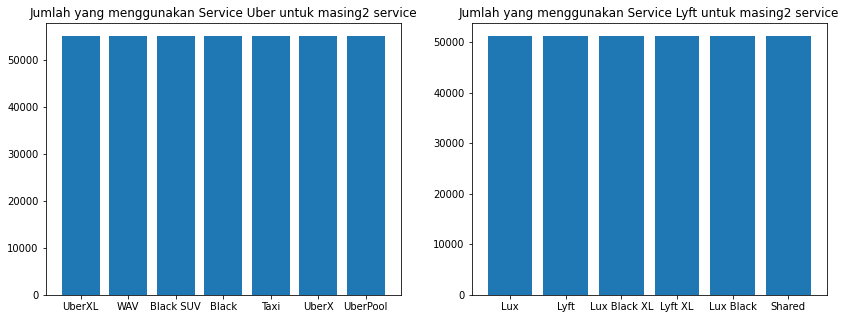

In [28]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(df1.index, df1.values)
ax[0].set_title('Jumlah yang menggunakan Service Uber untuk masing2 service')
ax[1].bar(df2.index, df2.values)
ax[1].set_title('Jumlah yang menggunakan Service Lyft untuk masing2 service')

jumlah transaksi service untuk masing masing brand (uber & lyft) ternyata berada diangka yang sama

In [29]:
df1 = data[data.cab_type=='Uber'].groupby('name')['price'].mean().sort_values(ascending=False)
df2 = data[data.cab_type=='Lyft'].groupby('name')['price'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Rata-rata Harga untuk masing-masing Service Lyft')

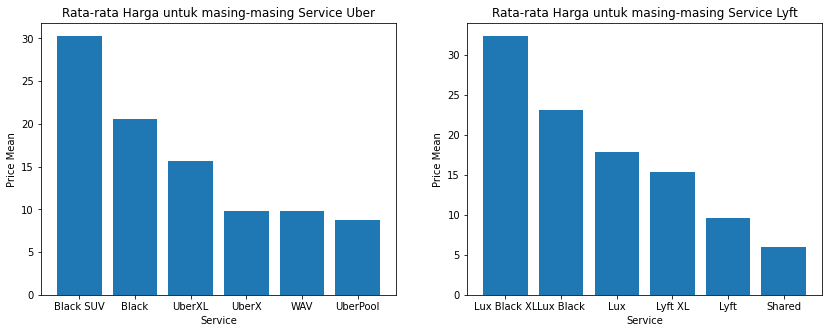

In [30]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(df1.index, df1.values)
ax[0].set_xlabel('Service')
ax[0].set_ylabel('Price Mean')
ax[0].set_title('Rata-rata Harga untuk masing-masing Service Uber')
ax[1].bar(df2.index, df2.values)
ax[1].set_xlabel('Service')
ax[1].set_ylabel('Price Mean')
ax[1].set_title('Rata-rata Harga untuk masing-masing Service Lyft')

In [31]:
df1 = data[data.cab_type=='Uber'].groupby('name')['price'].mean().sort_values(ascending=False)
df2 = data[data.cab_type=='Lyft'].groupby('name')['price'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Total price untuk masing-masing Service Lyft')

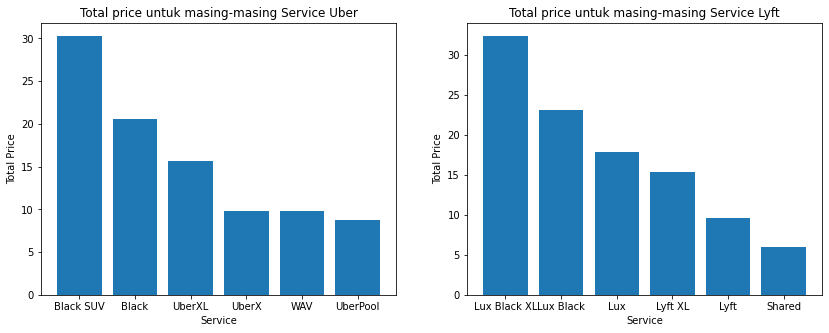

In [32]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(df1.index, df1.values)
ax[0].set_xlabel('Service')
ax[0].set_ylabel('Total Price')
ax[0].set_title('Total price untuk masing-masing Service Uber')
ax[1].bar(df2.index, df2.values)
ax[1].set_xlabel('Service')
ax[1].set_ylabel('Total Price')
ax[1].set_title('Total price untuk masing-masing Service Lyft')

In [33]:
df1 = data[data.cab_type=='Uber'].groupby('name')['distance'].sum().sort_values(ascending=False)
df2 = data[data.cab_type=='Lyft'].groupby('name')['distance'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Total jarak tempuh untuk masing-masing Service Lyft')

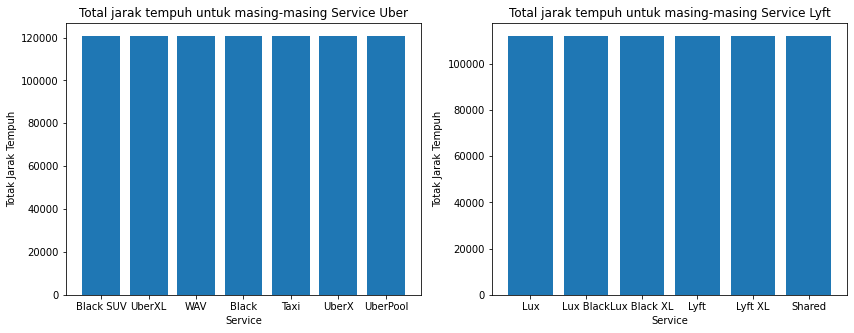

In [34]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].bar(df1.index, df1.values)
ax[0].set_xlabel('Service')
ax[0].set_ylabel('Totak Jarak Tempuh')
ax[0].set_title('Total jarak tempuh untuk masing-masing Service Uber')
ax[1].bar(df2.index, df2.values)
ax[1].set_xlabel('Service')
ax[1].set_ylabel('Totak Jarak Tempuh')
ax[1].set_title('Total jarak tempuh untuk masing-masing Service Lyft')

total jarak tempuh untuk masing-masing service antar brand ternyata mirip-mirip. hanya saja secara keseluruhan total tempuh uber lebih unggul karena memang jumhlah data uber lebih banyak dibandingkan jumlah data lyft

bar chart diatas menjelaskan peringkat service untuk masing masing brand dengan rata2 service termahal hingga termurah. untuk Uber service dengan rata rata price termahal adalah Black SUV kemudian untuk brand lyft service dengan rata rata price termahal adalah Lux Black. service merupakan informasi penting karena price akan sangat bergantung pada jenis service sehingga kolom ini mungkin akan penulis pertahankan. 
* untuk service uber dapat dilihat di link berikut : https://www.uber.com/us/en/ride/
* untuk service lyft dapat dilihat link berikut : https://www.lyft.com/rider/premium

Berdasarkan EDA di atas dan riset yang telah penulis lakukan, maka service pada uber dan lyft dapat di urutkan dan dikelompokan sebagai berikut

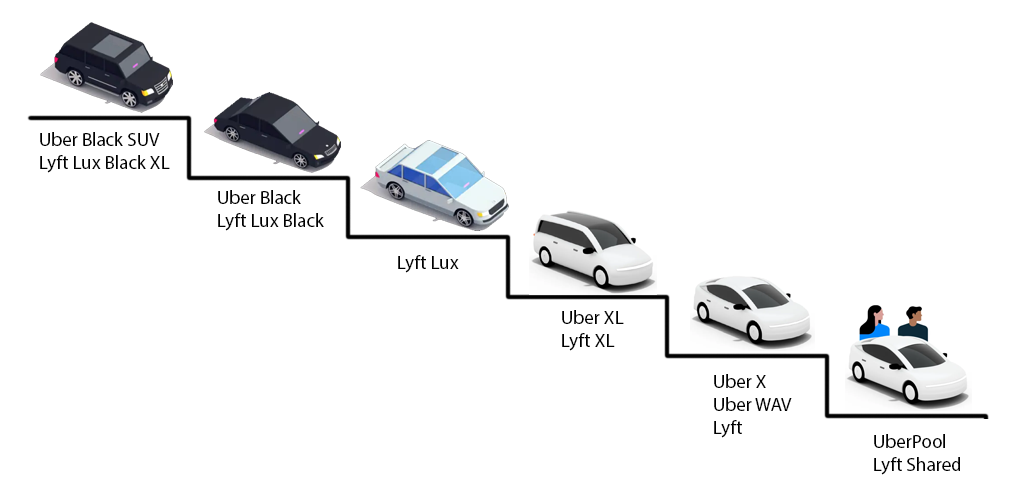

In [35]:
data[(data.cab_type=='Uber') & (data.name=='Taxi')].sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
452430,924c4e08-cffc-411f-9ab9-38b406f72ce0,1.543694e+09,19,1,12,2018-12-01 19:58:02,America/New_York,Northeastern University,North Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.93,1.0,42.3661,-71.0631,43.99,43.99,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.52,2.13,3.27,1543672800,9.815,44.72,1543690800,34.90,1543712400,44.05,1543690800,35.55,1543712400,partly-cloudy-day,27.51,1022.41,121,0.42,1,9.815,273.9,1543665333,1543698853,0.82,0.0000,1543683600,31.55,1543658400,44.72,1543690800,27.95,1543658400,44.05,1543690800
675533,a212c129-1acb-476f-97c4-0efa605b8425,1.543633e+09,2,1,12,2018-12-01 02:52:58,America/New_York,Boston University,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.79,1.0,42.3644,-71.0661,36.89,34.35,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.71,3.41,4.58,1543554000,9.884,42.57,1543600800,31.48,1543658400,40.51,1543611600,27.89,1543658400,cloudy,28.43,1018.23,303,0.97,0,9.884,290.5,1543578870,1543612473,0.79,0.0004,1543593600,28.64,1543575600,42.57,1543600800,27.20,1543568400,40.51,1543611600
258189,3a4567f5-56cb-4661-b700-0f78965b6e55,1.543340e+09,17,27,11,2018-11-27 17:27:23,America/New_York,Haymarket Square,Financial District,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,0.99,1.0,42.2148,-71.0330,41.34,34.55,Overcast,Light rain in the morning.,0.0,0.0,0.78,11.92,15.18,1543334400,9.830,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,cloudy,34.98,990.16,249,0.99,1,9.830,323.9,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
553999,74732e14-f651-43b1-b93b-39d38b103dfc,1.544837e+09,1,15,12,2018-12-15 01:30:10,America/New_York,Northeastern University,Back Bay,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.64,1.0,42.3398,-71.0892,41.77,39.35,Overcast,Partly cloudy throughout the day.,0.0,0.0,0.87,4.02,4.08,1544846400,9.808,46.90,1544814000,40.75,1544835600,44.15,1544817600,38.71,1544835600,cloudy,38.09,1025.95,191,0.99,0,9.808,292.2,1544789239,1544822023,0.24,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600
661792,85e384bc-3a6a-42b2-86e6-7081d64e3731,1.543453e+09,0,29,11,2018-11-29 00:56:08,America/New_York,Boston University,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,3.04,1.0,42.3503,-71.0810,39.41,33.81,Mostly Cloudy,Mostly cloudy throughout the day.,0.0,0.0,0.69,8.11,12.21,1543431600,9.996,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,partly-cloudy-night,30.16,996.21,294,0.81,0,9.996,352.8,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800


In [36]:
data[(data.cab_type=='Uber') & (data.name=='Taxi')]['price'].unique()

array([nan])

semua kolom price pada service uber taxi ternyata missing value semua hal ini terjadi mungkin karena sebab tertentu.

In [37]:
df_month11 = data[data.month==11]
df_month12 = data[data.month==12]

Text(0.5, 1.0, 'Hubungan Jarak Terhadap Harga (Lyft)')

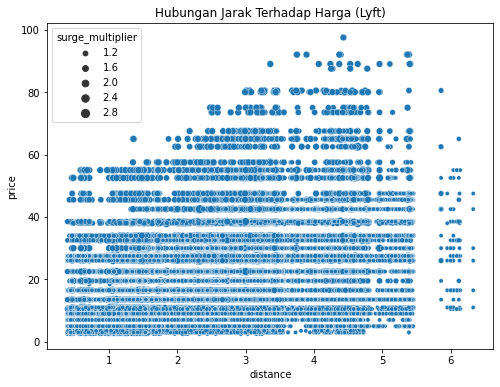

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data[data.cab_type=='Lyft'], x='distance', y='price', size='surge_multiplier')
plt.title('Hubungan Jarak Terhadap Harga (Lyft)')

keterkaitan antara surge_multiplier dengan price ternyata semakin tinggi surge_multipliernya nilai price juga semakin tinggi, sehingga kolom surge multiplier akan di treat selayaknya data ordninal.

Text(0.5, 1.0, 'Hubungan Jarak Terhadap Harga (Lyft)')

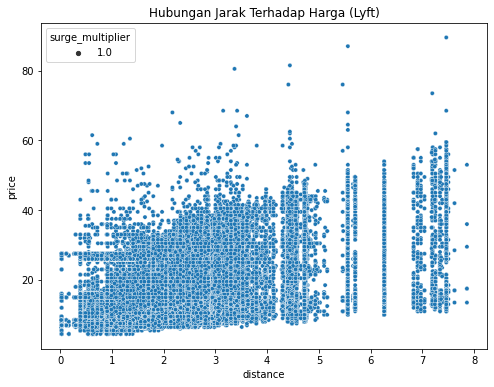

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(size='surge_multiplier', x='distance', y='price', data=data[data.cab_type=='Uber'])
plt.title('Hubungan Jarak Terhadap Harga (Lyft)')

Text(0.5, 1.0, 'Hubungan Jarak Terhadap Harga (Lyft vs Uber)')

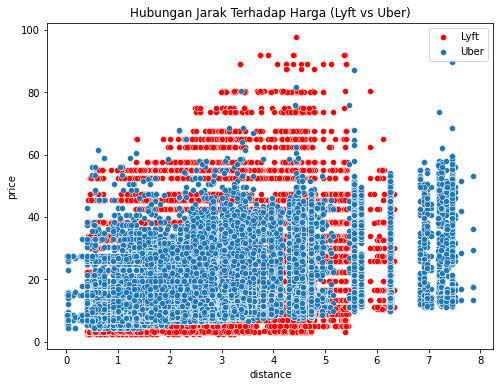

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='distance', y='price', data=data[data.cab_type=='Lyft'], color='red')
sns.scatterplot(x='distance', y='price', data=data[data.cab_type=='Uber'])
plt.legend(['Lyft', 'Uber'])
plt.title('Hubungan Jarak Terhadap Harga (Lyft vs Uber)')

### c. Climate Related EDA

In [41]:
data.short_summary.unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [42]:
df_weather = data.groupby('short_summary')['price'].mean()

In [43]:
df_weather

short_summary
 Clear                16.486460
 Drizzle              16.501784
 Foggy                16.540883
 Light Rain           16.561282
 Mostly Cloudy        16.594419
 Overcast             16.535116
 Partly Cloudy        16.552009
 Possible Drizzle     16.481390
 Rain                 16.539987
Name: price, dtype: float64

Text(0, 0.5, 'Rata-rata price')

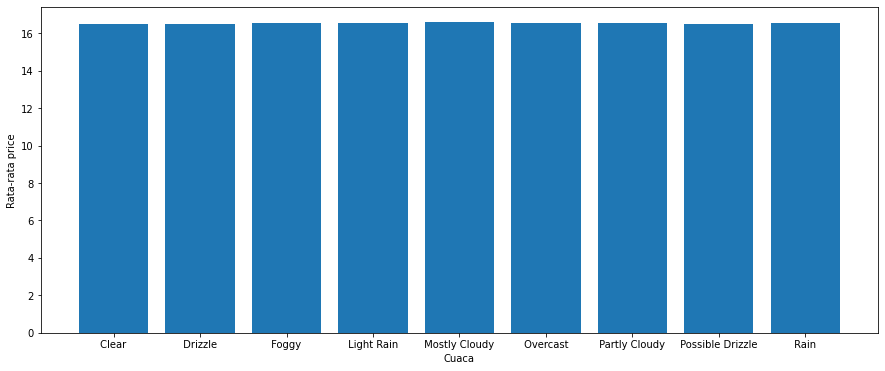

In [44]:
plt.figure(figsize=(15,6))
plt.bar(df_weather.index, df_weather.values)
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata price')

Text(0.5, 0, 'Wind Speed')

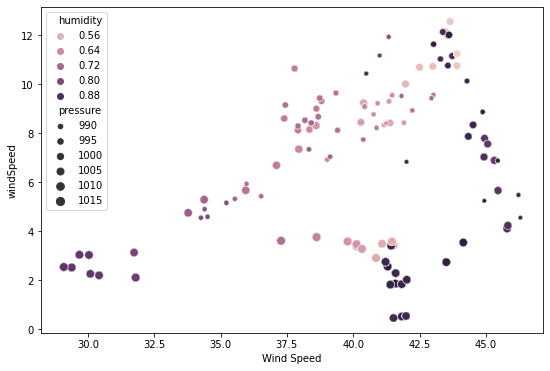

In [45]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='temperature', y='windSpeed', hue='humidity', size='pressure', data=df_month11)
plt.xlabel('Temperature (F)')
plt.xlabel('Wind Speed')

Text(0.5, 0, 'Wind Speed')

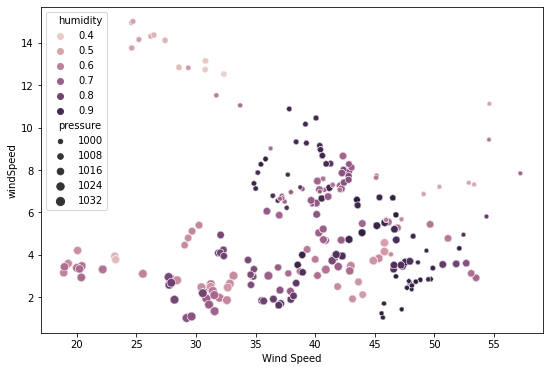

In [46]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='temperature', y='windSpeed', hue='humidity', size='pressure', data=df_month12)
plt.xlabel('Temperature (F)')
plt.xlabel('Wind Speed')

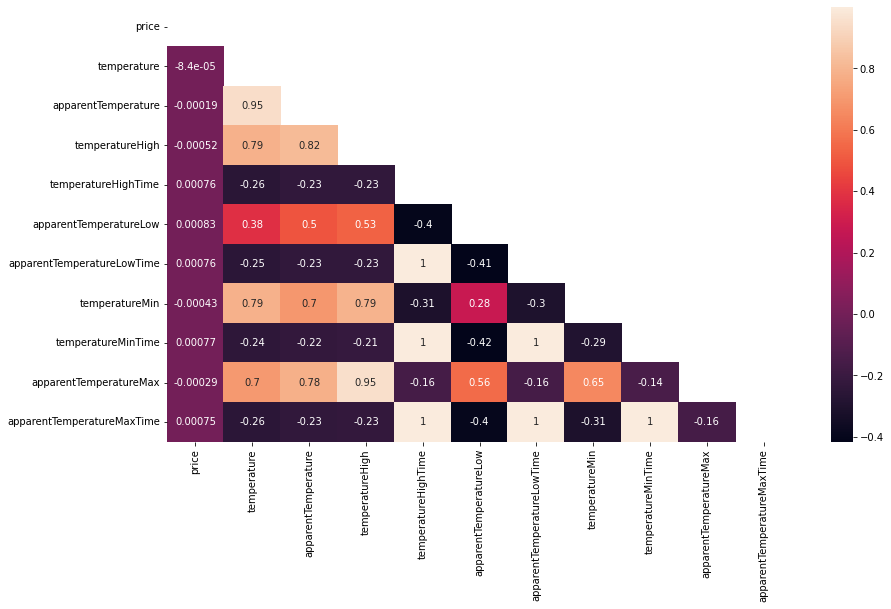

In [47]:
temp_feature = ['price', 'temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureHighTime',
                  'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMinTime',
                  'apparentTemperatureMax', 'apparentTemperatureMaxTime']

temp_feature2 = ['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureHighTime',
                  'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMinTime',
                  'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'temperatureLow', 'temperatureLowTime',
                 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'temperatureMax', 'temperatureMaxTime',
                 'apparentTemperatureMin', 'apparentTemperatureMinTime']
plt.figure(figsize=(14,8))
sns.heatmap(data[temp_feature].corr(), annot=True, mask=np.triu(np.ones_like(data[temp_feature].corr())))

dapat dilihat pada tabel korelasi diatas bahwa semua fitur terkait temperatur ternyata memiliki korelasi terhadap price dengan nilai yang serupa mendekati 0 atau tidak ada hubungan yang signifikan dengan price sehingga mungkin saja akan dilakukan drop kepada semua kolom yang berkaitan dengan temperatur

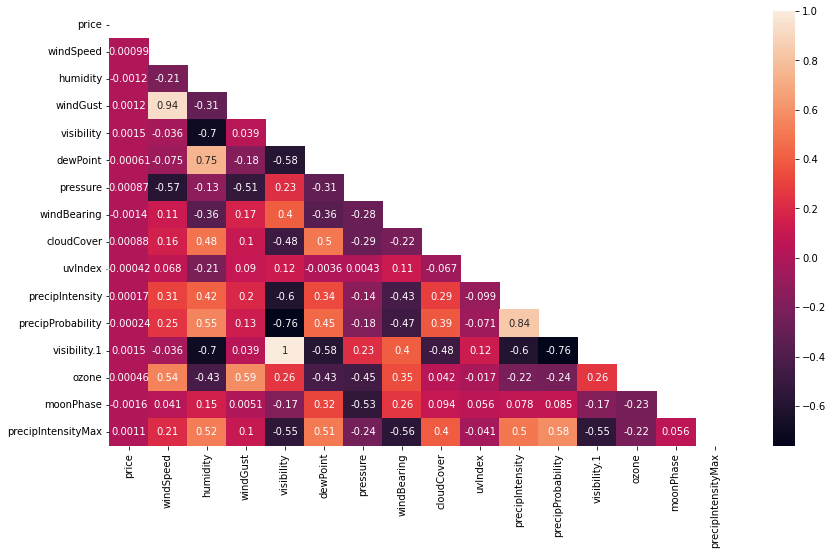

In [48]:
natural_factor = ['price', 'windSpeed', 'humidity', 'windGust', 'visibility', 'dewPoint', 
                  'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensity', 'precipProbability', 
                  'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax']

natural_factor2 = ['windSpeed', 'humidity', 'windGust', 'visibility', 'dewPoint', 
                  'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensity', 'precipProbability', 
                  'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'windGustTime', 'sunriseTime',
                   'sunsetTime', 'uvIndexTime']
plt.figure(figsize=(14,8))
sns.heatmap(data[natural_factor].corr(), annot=True, mask=np.triu(np.ones_like(data[natural_factor].corr())))

untuk faktor faktor lingkungan lain seperti kecepatan angin, tekanan udara dan lain lain ternyata hasilnya pun sama saja, tidak ada hubungan atau keterkaitan dengan price. dapat dikatakan bahwa korelasi faktor lingkungan dengan price adalah 0 sehingga mungkin saja akan dilakukan drop kepada semua kolom yang berkaitan dengan faktor alam.

## 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### a. Data Inference

In [49]:
data_inf = data.sample(10, random_state=101)
data_inf.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
233660,d30587c1-ae1a-4da4-969f-575f4a0ed417,1.543234e+09,12,26,11,2018-11-26 12:02:10,America/New_York,Northeastern University,Beacon Hill,Lyft,lyft_lux,Lux Black,22.5,2.44,1.0,42.2148,-71.0330,41.30,41.30,Overcast,"Rain until morning, starting again in the eve...",0.000,0.00,0.93,2.55,2.60,1543291200,3.475,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,cloudy,39.51,1014.97,54,1.00,0,3.475,297.7,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.2,1543291200,43.92,1543251600
114669,c881641e-0693-41b7-8caf-d4358dff61a8,1.543325e+09,13,27,11,2018-11-27 13:30:22,America/New_York,Back Bay,Fenway,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,1.34,1.0,42.3588,-71.0707,44.94,42.13,Possible Drizzle,Light rain in the morning.,0.007,0.61,0.94,5.23,5.23,1543338000,3.231,47.06,1543320000,33.83,1543399200,44.15,1543320000,30.13,1543399200,rain,43.32,988.09,227,1.00,0,3.231,322.8,1543319471,1543353348,0.68,0.1429,1543338000,36.37,1543377600,47.06,1543320000,32.4,1543377600,44.15,1543320000
114609,99ba01ca-2557-48a2-8bb6-885b4b1d50da,1.543515e+09,18,29,11,2018-11-29 18:03:03,America/New_York,Beacon Hill,Boston University,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,8.5,2.27,1.0,42.2148,-71.0330,43.65,37.25,Partly Cloudy,Partly cloudy throughout the day.,0.000,0.00,0.52,12.55,23.67,1543514400,9.920,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,partly-cloudy-day,27.12,1006.54,312,0.35,1,9.920,313.5,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.3,1543550400,38.53,1543510800


### b. Feature Selection

**Melakukan drop kolom yang tidak memiliki keterkaitan apapun dengan price**

kolom-kolom yang tidak memilik informasi dan variansi sangat kecil akan didrop. sebagai contoh kolom id tidak memiliki kaitan dengan price karena bersifat unik. kemudian kolom timezone memiliki kardinality sangat rendah atau hanya memiliki satu nilai saja sehingga juga di drop. kolom kolom yang sudah terwakilkan dengan kolom lain juga akan dilakukan drop, seperti kolom source dan destination sudah terwakilkan dengan kolom distance kemudian kolom long_summary dan icon sudah terwakilkan dengan kolom short_summary. 

In [50]:
unrelated = ['id', 'timestamp', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'product_id', 
             'latitude', 'longitude', 'long_summary', 'icon']

In [51]:
new_data = data.drop(columns=unrelated)

**Melakukan drop semua kolom yang berkaitan dengan suhu**

In [52]:
new_data = new_data.drop(columns=temp_feature2)
new_data.head(2)

,hour,cab_type,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime
0,9,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600
1,2,Lyft,Lux,11.0,0.44,1.0,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600


**Melakukan drop semua kolom yang berkaitan dengan faktor alam**

In [53]:
new_data = new_data.drop(columns=natural_factor2)
new_data.head(2)

,hour,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,Lyft,Lux,11.0,0.44,1.0,Rain


**Drop data inference dari data yang akan di Train**

In [54]:
new_data = new_data.drop(data_inf.index)

**mengelompokan name menjadi sebuah kategori tertentu**

hal ini penulis lakukan agar kolom name dapat di treat selayaknya data ordinal, jadi tiap service faktanya memiliki tingkatan yang berbeda beda. name dari brand uber dan lyft penulis kelompokan menjadi 6 kategori servis yang berurutan yaitu luxury, premium, economy, popular, moderate, dan decent.
<br>
<br>
untuk tingkatan masing masing service di dasarkan pada EDA yang menjelaskan urutan rata-rata price untuk kolom name dan didukung dengan melihat informasi yang ada di web masing masing brand
<br>
uber : https://www.uber.com/us/en/ride/
<br>
lyft : https://www.lyft.com/rider/premium

![uber_lyft.2png](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAA/EAAAIdCAYAAAB1MP3YAAAACXBIWXMAAAsTAAALEwEAmpwYAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAB6pRJREFUeNrs3XecHVd9///XOTNz63at+qpbXZblXuSCLRtsUw0uGDAhGALfhISQhIR8Ewgl5JtfEiAh4Rv8DcUQA8aAjQlgG/deVS1LVtdKuyor7WrbrTNzzu+PmXv37mrVbLnq8+Sx7N69bWbuvSu/53zO5yhrrUUIIYQQQgghhBCve1oOgRBCCCGEEEIIISFeCCGEEEIIIYQQEuKFEEIIIYQQQggJ8UIIIYQQQgghhJAQL4QQQgghhBBCCAnxQgghhBBCCCGEhHghhBBCCCGEEEJIiBdCCCGEEEIIIYSEeCGEEEIIIYQQQkK8EEIIIYQQQgghJMQLIYQQQgghhBBCQrwQQgghhBBCCCEhXgghhBBCCCGEEBLihRBCCCGEEEIIISFeCCGEEEIIIYSQEC+EEEIIIYQQQggJ8UIIIYQQQgghhJAQL4QQQgghhBBCvEG4J8qO+ns30XvX31Qvj/3IbfLqCyGEEEIIIYR4Q5GReCGEEEIIIYQQQkK8EEIIIYQQQgghJMQLIYQQQgghhBAS4oUQQgghhBBCCCEhXgghhBBCCCGEEBLihRBCCCGEEEKIE4Erh+DoHOsSdftuvrb6c9MVX8UbPxuA4pYnGXj0G9Xrmt/9DdzmyaM+hi0XOPCbLxD2tQOQPfsTZOYvO+7bNNrjVZ7LlgsUtjxB8cW7CfvayZ79CbyWqcOe93D7UJFb9Svyq26J3nTjFtF85RfkTSWEEEIIIYQQx0hG4l9lqVnnkpx1WfXywJPfPeRt8+vurQb4RNu5wwL8q8GWC/Te98/knr6puh0A3vjZOI3TqpdL7cuP+FilbY9Wf07PvUzeCEIIIYQQQgghIf6Nof7sD6GSTQAEXWvJr7//oNv4ezdVR65Vsom6c3/vVd/OgadvIehaO+p1qXmXV38urP/1YR8nONBZPQmgkk0kpyyRN4EQQgghhBBCSIh/Y1CJNPXn/1H1cn7VTwlzPcNuM7j8J9WfM0uuw8m2vKrbGOzfSmnLvahkE9mzP0HrB37A2I/cVq0GSM86r3pbW+qltHP1IR+rdqQ+NetiVCItbwIhhBBCCCGEkBD/xpGcckq1rN6Wehl88gdDoX79/dUR8NeijB6gtOVeABov+SyZ+csOCt4qkSa94KrqZX/3ukM/Vk0pfXLaGfLiCyGEEEIIIYSE+Dee2rL6cseTlHauJsz1kF/10ygov0Zl9BXpBVcd1PyuVm0gL6y7A1suHBzgd66ultI7jdMO+3hCCCGEEEIIISTEv26NLKvPPXcLuRW/wJZ6o5B//h+96mX0hwrpozmowd3OVQfdpnaEvnYevRBCCCGEEEIICfFvOLVl9WFfe7WMPTnrMpJTTnlNt+1oRs2HNbjbcO9B1xe3PDi0r1NPlRdcCCGEEEIIISTEv7HVltXX/u6NoLbBXdC1dliDvtLO1dWqguSsy17TqgIhhBBCCCGEkBAvjovgQEc17FYUtjzxhtj2kQ3uipseq/5cW0qfnH6WvNBCCCGEEEIIISH+jc2WCww88f+iQFwzGp9f9dNRG8W9HtXOna/tRF8ppY/Whj9FXmwhhBBCCCGEkBD/6lCJzEHh+3jIr7u32r09s+S6YcvODTx9y2uyTceqtsFd2NdOcKBzWCl9ev475A0khBBCCCGEEBLiXz1u8+Rhl8t7Nx7ytqWdq4/qMf29m8ivioK60ziNzPxlZE97X3VEvrTl3sM+1iuxTS9VbYO7Uvtygu72oetmny9vICGEEEIIIYSQEP8qB/lxi4YCeM1871q2XCD//J1HfKzaMnqA+vP+IArz2RYyS66r/n7gsW8ddoT9eG7Ty1Hb4K68a1W1rN4dt0ga2gkhhBBCCCGEhPhXX3LG0urPhXV3UNzy5LDrw1wP/Y98m6Br7REfq7aMPjnrsmHLuWXmL6uG8yOV1R/PbXo5ahvcBV1rq/uWnnuZvHGEEEIIIYQQ4jhxT9Qd77vvG0d1u+zp11bL1tOzzosazsVzvQce/Qb5Nbfj1E8CoNwRBehE27l4kxeTe/qmUR+ztHN1tYxeJZvInva+g25Tf+6NHLjzM9Htt9xLafpZozaHO17bdFxOckw7g8K6O4aCfbKJ5JQl8ikTQgghhBBCiOPkhB2JL3c8eVRftpwfCqWJNE2X/92wLvJhX3v1tpWw3HDhJw/5vLZcYOCxb1UvZ5ZcN2q5uds8mcySobXiD1VWfzy26XipbXAHUUM7lUjLp0wIIYQQQgghJMS/NtzmyTS/6x9JL7hqWGBNtJ1L/QWfofHSzxw2uA48fUt11Nwdt4jM/GWHvG1mwWXV5zhcWf3L3abjxZYLmGJf9bI0tBNCCCGEEEKI40tZa60cBnE85NffXy3XTy+4irqzrpeDIoQQQgghhBDHkYzEi+MiONBJftVPq5fTC98mB0UIIYQQQgghJMSL1xtbLtD/0L9Wpwlkz/6ELCsnhBBCCCGEEK8AVw6BeDn8vZvoe+Cfj3qevxBCCCGEEEIICfHiVRYc6KS46ZGDlpRruOhTcnCEEEIIIYQQQkK8eD2x5fywAO+OW0T9uTdKGb0QQgghhBBCSIgXrzfe+NnVtekzS64jPes8WRNeCCGEEEIIIV5hssSceMn8vZtwm9skvAshhBBCCCGEhHghhBBCCCGEEELUkiXmhBBCCCGEEEIICfFCCCGEEEIIIYSQEC+EEEIIIYQQQkiIF0IIIYQQQgghhIR4IYQQQgghhBBCSIgXQgghhBBCCCEkxAshhBBCCCGEEEJCvBBCCCGEEEIIISTECyGEEEIIIYQQEuKFEEIIIYQQQgghIV4IIYQQQgghhBAS4oUQQgghhBBCCAnxQgghhBBCCCGEeBW5cgheHQ8+9AiPPfYkixbO5+1vv5xEIiEHRQghhBBCCCHEMVHWWiuH4ZX1pa/8A7ff8WuUBVdpZs+eyfuvv5Ylpy5m2rSpcoCEEEIIIYQQQkiIf62179jBd7/3A+781W8AhbIqusKC1lBfl2XBgvlcfc1VXHjh+XieJwdNCCGEEEIIIYSE+FfbmjXP89m/+hv27tmPVaAs1e+1HKVwtGLc+LFceuklXHvd+5g0aZIcQCGEEEIIIYQQEuJfDf/+H//JzT/4EWFowAIKiEN89cCjUGi0AoUFDADJpMfixYv54IeuZ9GihTQ1NcoBFUIIIYQQQgghIf4VCfD//m2++70fopRCMTQCb6kN8RoV/380Mm+xhNF3G6V+a2DixAm87+p3c97Sc5g/f54cXCGEEEIIIYSQEC8h/njYtWs3n//CV3j22RVorashvnYEfuhAq+r/V8vrVRjdJg7xWmlsHPAdV3PhhUu57LJlLF16LvX19XLAhRBCCCGEEEJCvHgpNm7azF/95efZum07SsUBPf5+uMOrVG2wtzUxPyq1r9zf2qjUXmnFlLbJXHH52zj//HNZvHiRHHwhhBBCCCGEkBAvjkaxWOK2237Ot/7zJoqFALBorYfd5qgPr4pDvFVRiK+eBGB4uFeKMAxwHM2ll76F8847hyuveBvJZFJeECGEEEIIIYSQEC9G09fXx5995nOsXLkao8xB4fulh/joJMBQiK88XqVDXvSYWkcXtVKcdNIMTj31FK679mpmzJguL44QQgghhBBCSIgXFcuXr+Rb37yJ1WuejxvWxe3nR/HyQryqBveKMAyx1pJOpbAYfN/H0ZpQhWTSKRYsmM8Vl7+Vs888g7a2NnmxhBBCCCGEEEJC/InrN7++m7/7wj/E4dxglcJW1pAbJcgfzxBvrCH0Q4LAJ58v4DiauvosCS+BUdHceasVKEVdXZp3X3kl117zPqa0TcZxHHnxhBBCCCGEEEJC/ImhWCzx79/8T2776R0YY4ZCerU53SsU4lW0iry1liAIcR3NnJNmEwQB27Zt50BvD1pp0tksruditY3mzZsQZaE+nWHRogV84PprWLRoIWPHtsqLKYQQQgghhBAS4t+8crk8n/urL/DII0+glKppXmfhoA7zLyfEU12PrjbEG6IAn81mmTP7JCZPnIzneRQKBbq797Njx072dnVRKpcITUAilcLzXDQKbaNtUBrGt7by3ve9m/PPP4+FCxfICyuEEEIIIYQQEuLfXB5/4kn+8f/7Bjt3dMShvNK8bvSR92M6+COa4A2nQYGxlmKpxPgJ45k9Zw6tY1oxxqAUaBTWWoyxDA4M0LWvi927d7Nn716CMKQuk8V1NK4eGs2HqIrgggvP5/K3LuP888+jsbFRXmghhBBCCCGEkBD/xvbww4/xub/+O/L5fE3grg3er2yID02IVYqJEycyZ95cMtk6sBZjQhRxiDcW13FQjgYLpXKJffv2sXv3bnbt2kVfXx9aKRrq63FdF7A11QGWiZPG8463X8HSpecyf948ksmEvPBHIcz1kFvxC2xpkHBgF2Ff+0G3SbSdi9MwAW/iApJTTpGDBvh7N9H3wD8DUH/+H8lxEUIIIYQQQkL8y2et5Ytf/Hvu/NXdWGuOInAf/xAfhhbHcThp7mymzZiBdt3qXHxt4hMI1mItuI6DjU8oKKJyf4ulv7+P/fu72b59O3v27MXzPFxH4zhOHOhBWQvKohTMnDWDD7z/Gs4++0wmT54sb4QjhNHeu/7mqG/vNE6j/rw/wBs/+4Q+bj13fLZ6wsNpnEbLVf8sbyYhhBBCCCEkxL90QRDwxS99ld/85h5sZT75KxDgR4b46vNYS7FUpr6ugYULFzJ24jis1jXl8KBMFLy1VdUQT+0qdwq01iilCPyQwAT0HDhAe3s7XV1d9Pb3oS3UZTIkEwkgGt23FrSGbF2Gt162jMvfdhlLlpxCIiGj80cK8ZklH0Ils8NuU9r2OEHX2mG/q7/gM6RmnSshXkK8EEIIIYQQEuJfrnXr1vOlL/8DL27YiFIarHrVQjyA7/uApbV1LDNnnMT4CeMJlcWooaBvjY164Kl4AToLruOOXE4eAGOi0nntaJSOyvP7BwfZu2cP7du3M9jXDyYa0U+mElFYj98OxlqUVsyZexLvefc7OOfsM5k+bZq8SQ4R4sd+5LZRbxcc6GTgye9Ww7xKNjHmff+GSqRP2OM28MT/i05oSGWCEEIIIYQQEuJfqp/9/HZuuun77N+/H1DVgP2KHR4FxCPvFgiDEGMNbZMnM2fePNKpbPTcSmFU9F1FGxQ3tlNoFY3Qe9qJrjsoyEcj7GiN0vEseqUIraVcKNLb3c2ujk52795DT083rutSX1+P63loFS9vp6JjkM1muPLKyzjvnDN5y0UXvmInNt5sIR7Algt0/+LT2FIvANmzP0Fm/jL50AkhhBBCCCEkxL8U//K1f+OHP/wJjuPE+ToO8Nh4YPoVOESVEK8UftnH81zmzJ1LW1sbjnaoLkWvoyXmLMTBvbJt0Xx2ay2uclBxyI/C+lCIt9ZgVTxsb6Nl6wzgqHj5OWPo6+2lq6uLjo4O+vr745H5FI6jMTUnMqwGBzjjtFP46O9/mHPOOUtC/FGEeIDcql+RX3ULEDW8a7z0M/LXRwghhBBCCHHM9Im882EY8gef/GNu+s73KfolyoGPAYwBW+n/ripf6iV8adDO6F/KwShN2Q+pa2hk/sKTmTJ1Go6bwKBAR182DvuVkW9jo/J6g8UASmtwotsZBdZUTjiY6skHZeMSfAwoE73o1mKxKEeTqa9j1kknccEFFzBzxgxSqRSOjrrdaws6fn4dnwRYuXItf/HZv+Gxxx6XT9BRSkycX/253PGkHBAhhBBCCCHES+KeyDv/zf/4Tx58+HEc7VEOAgK/jFI+nnZwPRfHcdC6cp7j+C0tB1AOAiyWiRMnMn36DJqbmwBFWB2CP7JKs7tqw7t46XprLNpRQ1MBbGUk/+AHsERd8E0Qsm3bNvbs3YuJOvrFxQKqWplQabwXhiG+snz6T/+KO3/5U9rapJP9y1E7ql8ptbflAoUtT1B88W7CvvZRS/Art/E71+DvW48t9aKSTXhj5+NNXkx61nmHnHs/2nMCFLc8SXnXWsodz2JLvSTazsWbvHjU586vu5fyrlUEXWtxxy0iMWkJmQWXHXa+/5EqGI61wmHfzddWf2664qsHzbF/rfZTCCGEEEIICfHH2doX1vGd7/4Qx/EoF8sMFvJgouDqao3rajwvQSKZwHXdaqn98QjxfhjNf5/S1sacefNIZdKYMB45P8qp5kqpoTnzUelA1IQPhVYWq3S8naqa3hVqaNPjkXitNIO5QbZs2syeXbsJwhBH62jevda4Nfe1xmKsYezYscycNYPly1fw3//9E/76r/9CPklHYMr5oQ/duEWHPzlTLtB73z8f1Nm+VnHLkww+8/3qPPvqfUu9lDuepNzxJMUX76bhLX+K23zkkyyHes7KY5W2PU7TpZ9FJdIEBzrpvftLw5476FpL0LWWwvpf03T53x3Vc74WTpT9FEIIIYQQb14nZDl9EIb81ef+jnLZUMyXGBgYJCgGBKUQvxxQKpUoFEoM5gYZ6O9nYGCQfK5A4AdRd3hUXGL/EgK8H+C6DicvOplFi04mlUrFAf7oqWiFuajM3TJspNxqCJWiHIYE1kZl9hhCa/DDkCCM5skbQlCWngPdrF69ks6OHWit8DwXFS9Pp7HVJ7MEoA3TZkzj5CWnMHbcBGbPncOPb/0ZO3d2yCfpSK/77nXVn73Ww3dkH3j6liMG+IFHv1ENl+kFV9Gw7G9ouuKr1F/wGRJt0RJ2YV87vXd/ieBA5xG3r/+RbxN0rUUlm8gs+RDZsz8x7GRD0LWW/ke+TZjrqQZbd9wismd/gvSCq4adROi9+0vYcuF1+TqcKPsphBBCCCHevE7Ikfivf+3f2LBhC75vGBzMR+XnKl5rHYNSFqXAhIZSWKZY9HHdIolkkmTCw/XcaHRe67iG/eiEYUg2m+WkObOZNGkSEM1xP1aqJszbeH14W1mGrhIytCYErDXDmuFFYR+wlo6Onaxfv558Pk/CSxDNo4/mvUdz+qPjEYaGVCrJjFkzmD5rFmEApXKZceMnkMpk+cEPf8Tf/s1fyafpUCeNDnRSWHfHUIifuODQt92/ldKWe+OQed1BJfH+3k0MPPqN6HVMNh00GuyNn01q1rnk1y8m9/RN2FIvueW3HbaRXu7pm6onA7JL3lN9vsz8ZcMa8pU7nqTvd7uwpd6D1rtPzb6QA3d+phpwC1ueeN114D9R9lMIIYQQQry5nXAj8X19/Xz/5h+TG8yRG4xKnLXjoOPO71ppFJpoWrjCmGi99XI5IJ8r0t8/QH/fALnBPMVSCd8PCAODCW3cUV7Fh1VX47a10VJvDQ11LFg4j6lT2+LV5exLqsyvjMRX1Da/i7Z+6Aur4453Ckw0el8ul1n/4jrWrl2LXy6T8DxAYbWOHituqmeAwFjGtLayeMmpTJs+HT8I4pZ6llQ6yaxZs7jt53fS0dEpn6ZRFLc8Se/dX6pedsctIjnllEPevrTlXgAaL/ksmfnLDpp3XVljHThsOXdm/rLqiHy548kjjsa74xZRd9b1Bz1fdsm7ho1Uh33tpBdcNSzYArjNk8ks+dDQfmx7fTY9PFH2UwghhBBCvHmdUCPx/f0DfOv/foc9e7oAjeMmqqXoNRGZkck66gwfzUEPAkMQhAR+QKnk4nkOjuOQTKZwHAerOOQa6n65zN69e7BYmppbSCVT0RrxxmDiBnUvef31eLNHvbeNtslxHXp6eti2ZRP79ndhjamZFqCG7a8xFjBMnDiBOXPm0NTcTGgCdBiAVTiOxmKZNm0aW7du4/s338Ln//bEHY3PrfoVKpmtXjYDXZQ7VxD2tQ8LkE2XfvaIj5VecNVBDdogGoWvPF56wVVHnI+dmntJtRN+qX35YW+fOfndh7wuOWPpsPL+1OwLR71dYuJ88quinw83HeC1dKLspxBCCCGEkBD/pnDzzbfwr9/4FiiN1sN33cQZVtt4frrV1aXcrY0WdNNagY0a3EWj82XKZYXjOJTLAWDxPI90OoXjuKCIutvHnd6LxTw723ewe9cuGhsbGTNmDBMnTyaZTKNVNPqv4KiDvFVD5fTVfagsIcfQaH20drxl965dbNywgf7+AbyEi3ac6n2ViqsHVFT27zous+fMZcqUKSSTCQLfxyiDg45uZqKTDqlkgoUL5vGzO+7kne+4giVLFp+QH6RKKfbhgnltCffhJKedMervy7vXV38+XEl+NWyOn1P9Odi/5fDPeZjqAK9l6vA/Goc4GTBaZ/jRTka8lk6U/RRCCCGEEBLi3/D27+/me9/7b8rlEsrx4lFvOJp6dqVHjteraoq21uKbAN/3AUsiGQ6FqESCZCpJNMfcotEoDcaE9PQcYN/+/Wzb3k7r2HFMmDiJxoYG0pn0sE2y9iV2wjfRsnJaaayxtLdvZ+OGjZgwjJrX1e5H5bmIAnxdXR1z5sxm8qS2aEk5Y6JbxhUJuuZuxhgmTpxIZmOWL3z5q9x+249w3ROv1YLTOG3YqLvTOA2nfhLe5MUkp56Kk2056sc6VCAcGcT9vZuO+jGjEfnPyF88IYQQQgghJMS//u3atYc//F9/xtat7QSBwU16aG3RChSW0XKyPTiyj/iNYqgR3NB67dYqykFIbjBHJp2OutF7Lp6rsYRoraOyewPKcfDLZXZ1dLJv334am5oY29rK2LFjyWazKB3N0TfWHNXceWWHQr81FkdrysUiGzdtYldnZzTC7rrxbeL13+OdM0BoDS0tLcybP4+mxiZKQTmuJCCeb6+jAB/vtorXjHc9j3nz5vLww4/w6GOPc/FbLjrhPkgtV/3zK/4c/r6hkfj++78qf72EEEIIIYSQEP/mc/sd/8Pf/8PX6OnppaGpGd/3KfkBYRAQxmuia62rI9O20sl9lIr2oR7vdkTcr7kcnRnAYCgUi5R9H9fReJ6Dl4jWm3dDQyKRxImXcQuNxS+V2d/VRU9PN+3t7dTX1zNx4kRaW1tJZ9LRGu3GDBuZV7UnHCxgbVRKbyyu4zAwMMCmjRvp6uoiNAatNdba6vcKYwxohymTJzNnzhwy2Qx+2a+G98p8e2MMPuA5TvVEgAECaxk/fiJTp07j/377O1x4wfk4jiOfruNs5JrwQgghhBBCCAnxbyqPPPoYf/5Xf0sY1ZXjJBK4yRQpLIXBPKVSEWshCMJqd3rruvG66HEwVgzNVYd4onntuu7xKHnlPgpQGnAwRMvUhaEhCALKZR+lwHEU2bo6PCcRdZXXGtfRcfiHfCFPLpejq6uLhoYGpkydwpjmFjJ12WhkvBK8bXUTMfG8e20VSiv27dvH2uefJ5/PRycO4lBdmW9f+V4ZSZ8yZSonzZ6D53lRgCeaRlCpMKg+EQBBvJtRB/7QWBzXY9bMmTz52OM89tgTXHTRBfLpegWN/chtchCEEEIIIYSQEP/mct8DDxIqUMSjwnEy11pTV19HfV2WwA8IfJ9yuUzg+5RKRZTSaNeJ58KrUcrpR6ltV2po3riKlmhTaJSNlnXD2mrzO1c72DCH6xbxPA/Hc3E8D8d1UCgcNKEyGGM4cOAAPT091NVlaR07lnFjx9HU1EQymYwqCGw0Oq8suK6DtpYtWzazecsW/HIZx3HiNd+Hh/fKiYDGxkamTpvGxEmTcVyPIAyGblP5NuJyaOITBliMtRgMoVK0to5j+oyZ/Mu/fJMFC+YzdmyrfMKOo0TbudVu88GBziN2p38jUonM8E9auXBUzQCFEEIIIYQ4Ubxp14kf6O3juV89iPYNvjUYpath1BoTdZw3Fldrkskk2WyWdCaD67poR1evh7g7vbUYY+Ol1w4tGrUeOaM++orCdFTKXi755PMFBgcHGRgYIJfLkS8UCPwAa020JJzj4LounudRKBTZ0b6D1atXs2LFCjZu3MD+/fuxxuA4Dol4BH3tC2vZsGEjYRDguu6oAT7aF0NzczOLFi2ibfJklFKEYThUPj/aynvUhHqlqB4Ka7EmxAJTp01ly5atPPro4+RyOdatWy+fsuPEbZ1V/bnUvvzNuY8jTkyU92485G1LO1fLm0IIIYQQQkiIf7PYdOvv+MLmFj7Y28KUfvCsAW2xNu4ebywWi6ks06YViVSSpqYmGuvr8VwPR2lsaLAGjAGDwqIw6GFfVmmsVVir0FajrEIZi7IGrWw8c9zGh1tHZfbKEloIQovvhxTyRXJ9Ofp6+xkYyOGXSqhKGb+NTjZ4joMJQnp7eti8aTNr16xh7Zrn2bWzk96eHp5fvZptW7YDKl5CT6OUU/0yShNYMEoxecpUFi1eQra+kcDEUwZewhL1lbn1SkXrxjc2N9M2bSpf/T//zLvfcy13/up/5FN2nKRmn1/9Ob/qFoIDnW/OID9uUfVnf/e60d935QL55++UN4UQQgghhDjhvGnL6XWuzDnhGBbpVi4t9/LV7g2sbwhwnag7++HyqtKabCaDMdF8dt/38X2f0EQj1Z7WcWX+S1z+rdJGT8XL18Xl9saGBOUgXn/exff9qJu9dkikEmilo9J8HU0PyOXyDAwM0NnZieu6hGFIIpk45LJ0QRCSSaeZMWMm06ZPRVEz+v5SKYU1BmOjBn+O4zFz1iy2b99GqVSK1qIXx4WTbSGz5EPVNel77/4SmSXXkZm/7LD3C3M9x7TE3WstOWMpQddaAArr7sAdM53UrHOH7c/gkz+o3kYIIYQQQggJ8W8C1lGgDHUmST4o050so7WLtsM6tNVkUTXsZ6UUWmsSCU0qlcT3A0qlEuVyiXK5DErhaF297fAgPPS7uLF7dGKhepv4t8oeFKCVBYulVCwTBgYvkQBbxA/KJJMpdNxNvzbQh6HBmHJ1+biDQ3k0DaCxsYF5c+cxduxYjDGYuGx/5P5XT4RYsCisskOnHuLqAKOiZewsxAE+YqyJThZk6vD9Eo7jyqfsOMosuIzyrlUEXWuxpV5yT99EftVPSc26GF0/btht/c41+PvWk2g7k4YLPv6G2cf0rPPIr/pptRv/wKPfIL/mdpz6SQDVvgCJtnPxJi8m9/RN8sYQQgghhBAS4t/olAW0w2Aafhce4EACPBTHOnZeCcWJhEci4WFMGj8ICYOQUrkUz6+PbjM0Am6r/x/Gfe4q4ffoNyCaP6+UIl8oUiqXKRbLeJ6L5yVIJBLR8nhK4bguSqvDbv+4cWOZv3Ah2Ww2OgkBh7hPNMVAW4UbKoxSlFyNshbPWFRlCkI8Id5Yg8Xiahespb19B9u3bsGYEMdxeXHDJtavf5H58+fJp+14vK8TaZqv/AK5Vb+qjsjbUi+FdXcc8j7B/o1vuH1suvzv6L37S9UgH/a1E/a1V2+TaDuXhgs/SWHLE/KmEEIIIYQQEuLfDEJP05cw3KP38KTpRiVcDjEIHwWHw5SUV8J5tNwauI6Lo11c16VYLGKtJTQhYVxWbm00Oq2rTeIUOl6qTg/P6aOH92iDAIVWOpqTby3FsEi5rHCcIqlkEi+RiJvfeTjE692P6D7vOA4TJkxk7ty5pLMZ/MCPnkGPvs9WDYV5q8F3Qsra4lkHa6LtN9EOYoiWn1OOwg982rdtY8vmLZggRDtRJcJzz63kho9+ksuWXcgHr7+ORQsXyqfuOMgueRep2edT2rESv3NNdXS6wmmchlM/CW/yYpJTT33j/WFqnkzzu/6Rwgv3UO5cUQ3wibZzSc44Z1h5vRBCCCGEECcSZe1Lntj9uvboL+/iV3/xdR7L7eGAsuC5lKqnLPQxhfjRwnzlPsZYrDWEYUgQhrhO1BG+d6AfrYfK8gEcpXCqKdnG5QIjnsNE1xulcN1o9D+XG4ifLxrOV9WAH60Jn0h4pJIpXM8l4SVIppKUyz7JZIJp06YxefJkUqk0oQ2jAH6Ykxk1W0KIiRr1xRUMylqsorqknYnPSgwODLJhw0a6uvaiLTjaiR5eRycLjLUoZXG14q3LLua6a69m7tw5ZDIZ+QQKIYQQQgghxDF4U47Er169hj4bcHfzAP1ln7RORWXttnak+fjQWmGtjkbE40BvrEXHperGGIhzs640xCMK0eqwEVpVs/6wW1riZnKWEIvxQ3y/TLns4zgO2UwGFNTX17Nw4SLGjGmJ5r+bEFt59lGe2CqLsoqoB39IaBWp/BhOTs/Dqw9ZfmAFZS/ExFMDHKXAGvbt3c+GjRsY6B+ImvDFfQCUqkxdiO5gLQR+yF1338u999zPWWefyfXvv5bTzziVbDYrn0QhhBBCCCGEOBFD/BOPP4FRmpI1KGtx0BS8KL1XQrx+mbUHtaP2lVF5YwyVJeIdx6GpoTHqbF8uU/LL0Si2tdHJhDiMq2hYfVjzu0oTOR2tiIdCxeHaouMKAmOGEr3WDtZa/MAnCHyMjcrcm5qbydRlCePLqMM30zfxdrnGoFVIixnLBZm3cIadxbOl5zAqjB7AgkZhQ8Ouzk7Wv7ieclDGS3gQz5mPtiwe7jfR7aMDF82tDy08/fQKnnlmNdOnT+ED11/N299xBalUUj6RQgghhBBCCHEYb5p14nt6enjgvgdQVhGGPqE1aBRlh2rl+tGMwtd2mz/WpdeiJnIQ+D6BH6CAZDJJNpslnUrjOFHgDowhMKYa3Cvz6IeH7CgEH3oLRnTTjy+X/RK5fJ6u/fvYvWd3tZT/yNvuEOgQzySYmZ/Lu4K3c0piBi/qbSwvb8Q4UYBPOA5BucyWLZtZt249vu/jus4Rl+0bvt0qOtlgLdu2tfOP//ANPvyhj3P7L+6kVCzJp1IIIYQQQggh3swhfvfu3axasYpsOkupVIbQgjH4pWgEXNsjTwE3cZd5ay0DA4P09vYSBCFwbEE+DENmz57DvHlzoxFy38dRmmQySSqVJpvNkklnsMZQKpUJgoAgDDEm+qrMeY++iDvU6/ilir601WirovnqNv691VgTzdEvFAoM9A+wfdt28vk8zlGs1e4Yl9AasqaBC7xLmaKm83j+Ge6w99Cu96BQeK5Lf28fa1atZuvWrQRBgKsdtD2a6gYFaOywfVFYNMZaNm/Zxj989V+44YaPcfsvfkmhUJBPpxBCCCGEEEKMzG5f/OIXv/hG3oFnnn6W7q5uEl6CYqkUhXFj0I7Lzp2d7NjZieskRpy1GGVNdK0JgpDevl5yg4MUi0UKhSKlUpFSqRwto+a4OE78CGr0tea11iSTCSZNmsTcefMYP24sEJ0YcF0H13VJJBKkUik8zyU0JgqzlWZ58baFgHY1juvES8KZqGH9sDXqKmu8Vy5XGs9FJySMMaRSKVrHtFbn5h/qnIS2GqN8GlQDY+wY1tp1POw8xYDbixcoHMelq2sfa9asprevN57/rgEbP/+hTnaYg7c57thfLb5X8bQCaznQ08ujjzzOgw8+jHYUU6dOIZFIyCdVCCGEEEIIIXgDd6f3fZ81q9YQ+EE0mh0EmDDEhAZjDNpxGCyUuPnmW3j6ueV4iSROHOGj0eDhrLUMDg7S398fLQWndXUddYUl4SWiNdoTSVzXQ2uF1g5ghpXBRycDfLR2aGpqZty4cVhr2Lx5M8bYasf6yrryYRhijKFUKkU/V+bYW0UimSCdSpIfHMQaEzWTg3iOvMJWFqDHYpXFWBOt4W4NKEtDQwMTxk/gtNNOo76+Pip516N2tYuXtTPRwvY2erz4l1hj2LFjB5s3b6ZYKEbz3+PzCbZ6cuGgB635Xjl7EI3AVxvexa+Dipfe07ZyWxNfZZk5ayb/9z//jdYxY+TTKoQQQgghhDjhvSFH4g8cOMCTTzyF53qUy2XCMARjseFQSbwJolHo2SfN4UBvH3t27xkKzyPPZChFoVBgMJfDmDAaZXZcXNfBicfGHR2dOCgWS1EDOWNwHLc657x2Dn3ld4VCga6uvXR3d+M4TrVjfe0ovtYa13WrX1bH2xc3yNOOplwqgomCrVJDIV6puOlddDGKy7Wj8tZisWTSGVpbWzHWjD7Pv/oQqnpCAAWOcsjn86xft55t27ZRLpfjExhD69Efum2APfhJql8MPw566BZUpxBEj93T28ukiRNYtHCBfFqFEEIIIYQQEuLfaCH++eefZ+f2DuqydZSKxWj5NBvNgbdx9/Rqg7kwJJXOMHv2HAYHB2lvb68G2eHh01IoFigW86AUnucwdlwzpy5Zwiknn8LMGTPwvCjQ+n4Zaw1lP6RcLuG6Lp7nHZyL1dAa8VrrYWvLH6ppntYax3VxtIPnJXC0BmsJfB9MGM+NH0rqqjLArVRNiB8aATfGoLWiXC4zbtw4MtkMhyq8UNQeO4WjHPr7+3nxxfV0du5CK412nDhcH02fgIPL/mtPFajaEwBqeLyPGvVFI/zGWLTpZOnSS0im0vKJFUIIIYQQQkiIf6Ns7Jo1a8jnCnieR7ky/x2qS59hLZUMa4mWVgtNSCKRZNq06RRLebr2dRGGQXTb6nJvltzgANYYkgmX005fyKf/5OMkkx5PPvkMudwgV7/vvbz9yispFUvs7eoiDEPCMMT3fZLJ5CGbxx2u2/1ogVqhcLXGcXS8Br2Ny+OjUXdrFdaoapE61eqCaq/7uHo9GolHKYw1aK2ZMH7CwVPXbbwcnLFYE11tjKF7fzdr165l//79eJ6LUqCHrW0fHWsVr2g/+pcaGlVHoeLF5ionAjQ6vk18wgMFKp4prywmNBSLZd71TmiozzJuwmL5xAohhBBCCCEkxL/eN7JQKPDwQw+TTCSxJhqZrpTNV6JrZR12akK8tRZjoVQu43oOs+fOpq1tMqlUinwuTz4flc8X8jk812XO3DnU19fxoQ9dy8yZU2hrm8y6dS/wyCP3MK51PDd86AZKpRKWqPy+WCoShtF89mQyecTl3I5mBHuoGt5WvzlKk0ylcF0XrTRR4UG0b5VAXD0S8VJvVtl43n0U6oMgIJPJ0NjYeNBzWhPdJ5rPH7Bt2zbWr19PoVREaycK6upYX7Wakv9qiFdDJfNxpK/tiVeZl6/iMzGB7zOlbSpf+vLl9PeuYuz4K4552T8hhBBCCCGEkBD/KhocHGTl8pW0NI+J5r9XuqzXht64DLw6mdzWhHgMxhp83wcLra1jmD5tGtOmTqFlTEs8B15x2WWXUleXZdbMmQwM5PjB93/AOWefzVVXXYmyiq1btnHhhReyctVyHn34Ic46+yy693djjKFQLGLCaMS/tnHdy1lzPj4TgetoEskkQRBEDffi7vau46J0FHT9IMTaMJ7RHo9+Vx5CRcfDWEPCSzBh/AQc18EaWz0RAuA6LrncIOtfXEdHRwflUjkaHa+G8Jcm2u/KV7SsXOV/Oh51j04SxLUFOj4JETf9+9Qf/SFnnDkP19zFYPE8stkm+dQKIYQQQgghJMS/Xm14cQPZTB2BHwX42rBeW46uUNVyelsZjY6vM9YQmgBjDOVikTDwSWfSTJg4kRnTpzNz5kwmTp7MjvZ2prS1sWbVWh577H6eefIZxo1t4p3veieNDY3U1deRSHrcfPP3MMZwwQUXsHXrVny/TLlcJpVK43ludZuMGaoWGFoervbrSNHYks1mOf3008hmsxSKRYqlItrRuAkH13NxHBfPcavBtzIiP/KcgSUqT29ubqahoSFqBhiHbO1o9nftY90L69i3b1/0e63jAH88QnztKRc19NPIq4ga1ms0fqnE/Hlz+Ov//Tk8V5FyH2LTlgwTJ50sn1ohhBBCCCGEhPjXKxMadu3eRbFYxPM83LiJXG2Ar8yLH/k7UxmNj9eOtzYkDHyCMKDs+wR+1CzO9TyMtfT39dHQ0MBg/wCeTpJOp9i2dRutrROYv2A+fQMHSCQ8Jk+azNve9lYufstb6Oraw8YXX8R1XFCa1LDmawpjQkwYRJ3ltR0WWFHm4BQ7IgCHYUg+nyedzjDrpJlMnTqVgcEBcvnBKMy7brz8XQrHceJ56qqmldxQqb2xhmQiSWtrKzDURX/3rt288MJaBgcHo8dQQ130lVa8nAJ2pdSIAB938I/n+CulQNf0DkARBj7lfIGr3/c+ll5wbrQX7hq2rNvD1FmXyadWCCGEEEIIccJyX+8bOHHSRCZOmkihUGDjxo3s6txFKpGivr6eIAgJAh8VN3BTSlVL6avzsCsl4Qxr5F4dBTbGEPgBWiuymSzFYok/+IOPk3AcwqCEH5TjZd7KpNNpQhPy9ne8jWymgdAoLr10GU889TR9vYP4vk8QBDhO1I3ecRzOW3ohXXv3sL19C4VCHq0dXNclnrhes6ejd40PQ8Pu3XvYtWs3mfo0Tc1N1UZ1BoNGxeu/g+d5JLQbNdwzZcqhjzFhVE5vDGEQsmvXLsa2jqVtShv5fJ4dO3awbds2gnJ5WJf9lz71/FjuGFcjVCsrIDQBUye3sW/vHpqbm+OHbKDQP4+1a57gfMnwQgghhBBCCAnxr3/pdJpTTjmFU045hfb2djZt3ETghzTFjdqCctzszoTDSukriVRpjQ41Li4BIVo5oKKA6yiFCQ2pZILunm76+voo5vL4fgG0wgQ+zS3NNLc0YQgpFYq8sPZFfvTjW6lraOaUU07loQcfxnWIQjOgtcIYw/59+zn1tFM5++wz2LptKxs3bmT//m58v4znJFBaHyLAD63D7roO1kKxUKQz34nruFHnekXUjD6aQ1C9n+M4KCeBdh380MeaEGMNhUIB13XZtWc3qUyKjo4Odu7ciQI8LzEsuL/0BnKjtL8/VICP16OvVFGUS2XGjmvlgx/8ILf+5Efs3LGz+pj3PJTkxZ1Z+cQKIYQQQgghJMS/0UybNo1p06Yx0D/A5s2bGegfwIQhnpfAKIXv+1irohH6eJ68gwLHRXvgWQhtGUcZjIZARcX3LU1N9HTvZ/36ddxz129Z/+J6jDLMnjGTz/75X0TN1gKDsYoJEybiuC5PP/00177/AyTTafwgJDQhjqNRKiqlf+GFNWzYsI6JEyeycOF83vmOd1EsFlixciVbt25ncGAQN+HiOU68JBxgo3XSh0bqo3npWru4uFSa98FQ47rKLY2OLyuFqxwcRxOaAD8IsKGPXyqzv6uL/OAgpVIJV0fl81Gl/+jB/ejzfG3JvK05GWBrAv1o11n8cplMNs1VV72HTZs209DYxOat2zChJQhDbrvtUTp3ddDb20dTU6N8coUQQgghhBAnpDfUOvEjJZNJJk6cyLTp01Baky/mGczl8DwPJxoWJwzDmlipAY3juRgTB+HKOuthgOu6hGWf/oF+Wse28tQzz1AuFfnYjR9n8eJF7Nmzh3yhgDEGrV3ecvEltLfvQLsuB3r7GBwcRAGJRAKtdTQPPlr1nL7eXjZt3sSmTZsxJmTJktNYsuRUWlvHUizk6e09QGhMTSf7oZH1yhz3ypxxxfC59bVz4A0Wq6CykryKU7jneaSSSRzXIQiCqALBiZrXUX3s0dd7P3q65rut2ebRH7My2h8EPslUkve//zr27N7D3q4uJrdNYe3atbzzne/gd/fez60/+RFhucSEieNZtGihfHKFEEIIIYQQEuLfyJqammhra2Pi5Ins27+PwcHBaIk2141Gxa2KM3s0Gqy1U+1ir7XGdVxsEJJIJtnf3c2EiRMoFIucc+5Srrn6agq5HDf913dobmhk4oSJ/L//+j5Tp07nrW+7HO04rFv3AoODueo8fGstWmvCIAQVlbhjwS+X6ejoZO3atXR1ddPWNolTTz2Vk2afhOM49Pf3USwUsfG89yjU62FhGGVrfo4H7G1Unm7jMvXaoJxOpfBcF9d1QEEYhJh4zn71OY7LqxAvI2c1KIZOEOi4w328dn30PTrR4Ps+6XSa97znPRzoOcDOjp1ce+219PX1sXbtWiZPmsyPf/wTuru70VqzYuVKbrzxI/LJFUIIIYQQQpyQ3DfbDmUyGc5beh4Auzp30b59O3t37yXhJkgkXHzfYgnRLqTSCbRWuCak7Csc16VMSF1DPbt27+ayyy5j3rx5lP0y9953H3ff+1umTZvKBRe8hVKpxN9/9cv89f/+PCfNOolisYgCkskUU6ZOobtnP/19/VhryWTSaKUwymJRJBIJQLFz5062b99GXUOWuXNms3DhAs444zR279rF+hdeoKOjk9AYHMeNTkZYhbEj5pjHFepGDV0ECKOsTyqRwPPcqLGdDaMpAcYQFAtYY0ilU2jt4LzUtewP2hgbd923NcF+qJze2qGl7YrFIuPHj+fyyy9ne/s2uvbu4ZprruGOO37BmJZWMuk0//pv/0YulyOZTBL4AQnXk0+tEEIIIYQQ4oT1phmJH019Qz1Tpk5hyrSpOJ5mf/d+tFZ4CQdsvLybihZgs8qitAJH4zguuYFB9u3Zy/ixYznQ08O/f+vfyeUHGdM8lvPPO5+tW7fx8GP307Wnh/Fjx/Hggw8RGsusk07i7VdeydixY0mlkoAhX4jmn8dT9InGyxVO3Km+Mjq/aeMmunv209LSwmmnncacObNxXYe+vgMUi/m4K71CV8roo7r56ii6JQrzNv5SQML1UFhCazHWEpqQMAyqQdpai7XREnxY0I5+mUe9ds47qHgZPWMMVkEQBJRKJbCWs886iyuvfDtPPfUkB3q6eN/V7+E3v/019fV1nHn2mWzZsoUdO3YMdc1XUQf+3//o78knVwghhBBCCCEh/s0qkUjQOnYsc+fOpbm5he6ebkrFAp7r4Houxpr4y+I4Gs/z0FbR39vHC2vXEtiQ5tYxFIo+frnMZcuW0Xuglxdf3MzFF1/Mc88up3PXLppbWmgZ00Imm6atbTILFsxn/ITxpFMpHFdTKpXI5wvRPH1VmRNu4g70LsaE9PT0sHnzJjZu2ITjaubNm8cZZ5zB2LGtFPIFBgYGCcoBOu5CX9syzqqh9daJ13h3lIZ4GTqLjdatN5UpBVFgt9ZiwpAwCNGOrs5lHx7Ma9d7Pxxb/RraR6Jl73wfP/CZ0jaFa66+mra2Kdx6609obGjkk//r49x88/fI1tVx/vkXsHLlaowx7N27F9f1MMbQ3NxMIpHghg9/QD65QgghhBBCiBOSstbaE3HHy+UyL774Ips2biQIQ7KZDEFoKfll/JJPvj9PfjDPCy+uZ9PmjYyfMJ5x48ahgCWLFpPLFejctYsXN23mkUceoXXcWMaMm0AmncYPSmQyGSZOnMiUKW00NDXQ39dP19597NjRwc6ODrr3dxOGUSM7rRWu40VLw8Vd7TEWPyjjug4Txo9n0cmLmD1zNn29vaxdu57t27fTN9BPiMV1XbSrMTYK5ABohUbhaQcV/94QEoQBxpgoxKsoyGtHo6zFmui+juOSSLgopaNt0k5NQAcwR/fmAlDRUntBENDc3MjSpUuZPn0ay5evYNXyFVx55ZX82V98mk0bN3LLj37ImWeeyQ9/cAsLFi4inU5z12/vRmuXRMJjwYKF9PUd4Oe/+Il8coUQQgghhBAS4k9UO3fu5MUXX+TAgQN4iQQ2hKAUUC775AsF9u3rYs2a59m7rwsNeI5H4Afs6+6ma/9+mlpaaG5pIZutI5FM4LoOiUSCMA7MjY0NTJg4gbGt49DKpWtfF9u3t9Pe3k53dzcDAwNo5eJ5LiM7u4MlCAKCIKCxsYkFC+Zz0qzZpNNpdu/aw7oX19PR2UmuWCCZSuI5TjXEK+LmcvE67MbEFQcmKnXX8ai90rp6m8p680opHMclmUriaAdHO9HUA1s73/1Ib52hLvrnL13KgoUL2LplCw8/8gjjx43jXe98J01NTZy39Gx27drFmjWr+d73v8eFF1zESTNns3XrNu677z5yuTyzTjqJ5qYmPvNnn+KUUxbLJ1cIIYQQQgghIf5El8vl2LhxI93d3RQGC1irozLwsk9uME9XTzcdO3awa2cH/QP9lIMAx3VIZ+tIJFMkk4l4NF1HXd+JQnMQBFGpvtY0N4+hbXIbyVSK/oE+uvfvZ+vW7bRv30Ff3wDlsh8t/aad6lxwaw3WGsIweqkSiQQtzc0sWnQKM2fNZKCvn3UbN7CtfTu5gT4c18HWdLOPwnkcq+O58bXd6ytz4yvXV98cWuN5LhqNVg6JhBMtm1c5MXDEEfm4yZ2FG264gZWrVrHuhRe4+uqrmT59Onfd/Rs6O3dx40dvpH+gj+9+97+44MILWTB/Ab/8xZ1ccsky7vrtXezt2sukyZN5y0UX8Lm//gt5owohhBBCCCEkxIvhOjo62NG+Myp7D0Arh7JfJp/LUSgUGBgYIJ/P0z8wEC3xhoqWd7OWIIg6sIcmrHaT9wOfwPfx/RBjDc1NjbS0jKG+vg6tHfr7B2nf3sHWrVvZv7+bXC6P7wc4jsZxomXmqFklPgr20NDQwOzZs5k9Zw7JZJLHHn+ULVu24HpeHNSj5zfxvHdjLVopXC8ql6+MwI8W4qshH41GRWX7jiKV8lAKjK0N8VHVgDGGcrlMGBrAkEx6WGuZPn0G73znO6ivb2DHzh3cc/ddTJg4gbdedhmbN2/mwYce4oILzmfq1Kn85Mc/4e1XvIMZM2bwrf/4Dw4c6GX2nNn88L+/Q319vbw5hRBCCCGEEBLixaFt27aN9es2UC6VCYMQpTSFYoFSoUip7BOEIUEYVud++74ffQ+C6LogwPfL0fVhSOAH+OUSflBGKU1TcwuTJ00mmUxTLvl09/Swdcs2tm3bTm9vD6VyCa300Ah/vG48Ckxo4gp4TVNTI2jNwMBAHMCj8vcgDMjl8hQLhWqsT6WSpFNpXDdevq7aqd4OH41XCpRGK43FoIkb5rkO6bQLNjpBEJTLKGNJppMsPmUx5553Ht3793PnnXfS3d1NIpHk93//Ixw40Mvy5c9x9TVX43kuP/zBDyiVy3zwgx+kv6+fm2/+Pte9/3rOOONMvve977F61SoAvvr3X+T9779W3oxCCCGEEEIICfFyGI7O4OAgq1au5MCBAxRyRZRyCIOAsu/j+wFhaOKvqIFcqVQmDKMwX/LLlH2f0I8uR3PTA8Jq6A9JpTI0N7fQ3NxCJpOiv7+f9vYdbNu6jb1dXfT39UWj31bhOBqlHRQaqAnhRCXwJp67boyhv7+Xwdwg1tiD1oL3EgmymQypdDqeAjCk0vFe6+iEgVU26gkQWnoHc9SPrcdTFk/1M35sKxecdzlvWfZWTj39NOqzGQAeePBR/uzP/4J8rsCUKVO4/vrryWTSPPfcch597GGWnHIKF110EU898wyPPPww173/Opaceirf/e73WbVmNf19/Vz33vfyjW/8E4lEQt6EQgghhBBCCAnxchiO3aaNm9ixYwc9+3twtUsYhPh+1MiuHAaUywFlvzQU4uMR+2iptYAg8AmCcjSCH4aUfZ9yuYzv+ygUDY1NTJo4kUwmgzGW/fv3sWnTJjo6Ouna10W5VEKh8RIpFG68vpyOS/uJQr5SlEolurv3EwQ+Wmu8hIc1FmNNPFIPjnbQOuqMn0qlSMeB3mKx2sYLvoPB4gRlrpjbTGNDyIrO/YyfmmDpOSnectnHmDP791E6U11krjIn/4tf+gd++tOfYcKQ93/gekqlEs8++yxXveddeJ7HL27/Bfl8gRtu+D3GjG3hhz/8b9a9uIHBXA7HdfjWN/6F97zrnfKmE0IIIYQQQkiIlxD/8vT29rJx4yb27NpNKVfEcV3KQTQK75fLhNbghz5+EBIagwltPHIfhfhyObpdVHofYMIQ34+a6VkLmWyGxsZGxowZQzaT4UBvLzvad9C5q4POnZ3s29+DtRpXJ6LgrR201jhaox0YzA3Q19eHUppEwiORSNLWNpmWliZKpRI7du5g3779uNoFFGXfJ5lMUl9XRzKVBGdoX0MLpljkvQvhK38whT7bQ8N8l6ZJSUqZBXje54DpUcM7q8GCo2HHzj3ceOPH2b17FxMmTOCDH/wQjqt5/PHHePyxxzhlySm8733X0rW3i1/+z51s2bKVchDiBz7vfteV/MfX/wXHceTNJoQQQgghhDjhOV/84he/KIfhpUulUkyePJk5c+eQzmYolAoMDg7iuR7JdALH1biug+t5JFwPR7u4jlP9crSL57p4bgLXieane66Hl0jiOBrf9+nr72fP7r309fbS1NzE9OnTmDljJmPHj6exoRHHcQgCPzoREPgoZaPGcyakUCgQBD6JhMe8uXP5yEc+woTx4+nev4/m5kbe+96rmDdnLgcO9NDb14u1ljAMKJfKpFJpXM+NW+NFo/EYh3RpkLefUmZS4yCplgLU++TMTkLdSELPR5FCK9AKyn7Itm07eeKJJxgYGKC/f4BJkyaxq7OT5c8t58MfvoELL7qIRx95lJ/85Kfs399N4AeEoWX69Ol87R//npaWFnmjvcaMMXR07OLWn/6CP/nTz3L22WcSmpD6ujo5OEIIIYQQQryKXDkEx4dSipmzZjJz1kz6+vrYtm0bGzZsQDuKbCpDGBhKpQBHh4RxUA/8gIQXxKE1xI9H6P3Axw9DXM8lEYRRqC775IsFNm7YiOd5NDc3MXlyG9OnTWP//gPs2b2X7e3t7OrspL9/AL9UIDQWEwQ01NWRzWa44UMf5Nxzz+O5Z5/lN7++k40bVjF92lQ++YlP0tRcz8OPPMK6FzYwOJDHD3x6urtpaWkhkUxisChlcTyXnQMpntlpeEdbEfwUtmBIu4bQ3I9qeDdQz779PTz55HLuvvsuVqxYSbFQxPMSmNDy8MMPccMNH+biiy9hx852vv2fN0XHSnsE8XSDVCrLH/3BjcyYPl3eXK+h7u4efvazO3nq6eWsWLGK0BqUhus/dCNNDXWcd87ZTJvaxjXXvpexY8fKARNCCCGEEOKVzp5STv/K6uzsZOXKlfT3D6CVi1JutXt9GEQN8PxydDmIS+orPxdLpagk3xj8MAr70Vz6KPCDpbm5hZYxY2iob8IaQ3d3D1u3bWPvni527txJMpnA9VxOOeUUpk2byo4dO/jDP/xDenq6+cpXvkBTYxP/8i9f57+++12eX7OWlpZWHnzwYUrlMmEYRmvSjxkTrT1vDUYpcuUcb18c8i8fTdE6oQ+mt0JdEr+UZH3nJ3n08QEeevAxNr64idCEWGtrlryLlsc744wz0BqeffYZ8vk8xigC32CsIZFM8rnP/Rkf++iH5Q30Gnn++Rd47LGn+elPf8mePV1xI8W40aFSKG1R1qIsOI7D+PFjWbRoPlde+TZOWXIKzc1NchCFEEIIIYSQEP/GVSwWWbPmebZva8cYcF0XE1oKxWK8/FxIGJqoLD7udF8ulaP15cOQkl+Ow74fL2UXVkfvrTVo7dLU1MyECRPIZLIc6OllxYoVGBvS1dXFlVdewdNPPcXdd9/BxZdcwaf/5FOkUh733nsf73n3e3hu+Qo+85nPcPY5S5k8aSr3PnB/tD1+QGtrK+lMOl7KzuKjUH6O68/TfPRqh9Z5adZuCfjdfZZHlhv29xowHp6XwtE6Cv8169BbGy3FZ0xQ7apfLgdYo0gmE/zlX/4pN974e/KmeY18+e//mZ/+/FcEfoCyBgU4WqNUpX+iQqvovRD1PdDRlAtrUEoxYfw43nf1e7jqqnfT0tIsB1QIIYQQQggJ8W9su3btYvvW7XTt7WJgIIfjeaBs3OG+HC1N5wfRiHsQUPajUfhyGJXbV0K8MYZyuUSpVCYIQoIgRGtFIpHCGEuhUMAYw86OHbzj7Vfy2KOP8OSTT6AdzcJ5c/jUH/0vJkyYSOCHdHf38KMf/Zi58xdw5tnn8c1//xarVq0hMAHZTJampia0E43Gg8JYcMIck8ZBps7lQJ9PPpdFuaAchaOTgMbaaJm72gBf+V0QRNMIrI2ucxzFuPGt/O7uX1Mnc61fNeVymZ4DvTz66FN0H+jl+z/8Cb39vSgs2hiUtfHygxqUBa3QqCjQ22gqibEWRXRCRltLqAytY1s57bTFnH/euVx26TKy2awcbCGEEEIIISTEv7Ht3buXDRs2sn/f/qghnuNGATdeT973A8pBFHjLvk/ZL9eE+JByOVqaLgjC6CRAUI5H5xXWgus67Ny5g7PPPouTT15MaEM8BfnBPpobG2loaCTwQ4wNqW9spLF5DCiXe393P//4T/9CrlDAdV2am5qi5emqbxeLVQobRp3wkwkXz1OgovXpo5torFWAwZjopEMYmup3LGitATDGZ8LEsfzJn/wR11z9vurvxeE9/viTPP3McyxcOJ8lpyzG9wPq67M0NjYe1f1XrlzDN/7120ya1Ea+WGTN82vo3N2J46hoZUFjcRRoHa0OoIlH3eNR+eiviAZrUbY2xIcYVW2JyPTp07j+2mu45OKLmDBhvLxwQgghhBBCSIh/49u3bx/r169nV8culDW42sMAuWKJcinqPl8qlQmJQr0NDeV45D4K8j6hCTGhIQgtJoxG53t6epg8eSJXvfcqrDUkXJewXKJYyJNJZUilUwRBwMDgIHu69nH/gw+TSKTZvGUrK1c9j3Y0DQ0NpFLJEVts4oFZTSIZddYHqkHfWgs2nktvQorFAkEY4DqJuCTb4noJHK2ZOGk8559/Ln/yx/+LpqYmeTMcgbWWL3/5H/jZz3+JUgqFQzKZRilFc3MLZ511GkFgcJyAlpZmrrjibRhjWLhwPgAvvriR5StWsXHjdhobW+jY1cnDDz1M/2A/yVQSY0LAoFEootdYQTQCTxTgqyGe+ISLiV53bcGoEKuG/rRE2wjpVIql557NeUvP4corryCVSsmLKYQQQgghhIT4N749e/awfetWOjp24fsGYyAIAnL5PCaeUx6EIYEfjcT7cTM8Y6LSe98PCMJoXfpisUguN8j551/Ar3/9K/bs3o0JfSZPnMgnPvFxxo8bT6kczb/fvHUb//TPX6dUDnjrWy/nV//za4yx1NXVkclmRiRJUw14iaSL47hxYI/K5l3Hw5io5rpUKlIs5HFdN+p2bwxgaG0dy/Tp05k1azqXXXoRF154gbz4R9C5azffvuk73H77nUTj3NGXjUvblVIo66C1C8qg0IShDyjOP/9c2tomUigUGT9+PIVCiWeefY61zz8flck7GuUoomqKqEReKVUN85VrRvwZqbwhhr4pOxTy7dAtokAfLYE4a9YsTj11MddeczUnnTRLXlghhBBCCCEkxL9JAv3uPbTv2MGK5atoaGwk8P14DnxAqVSK55YbwsAQhGXK5RLlsh+X2FvC0LB//37a2qawfft2fv6Ln2Ep80ef/EOuvua99B7oA2UIwoC6+kZ2du7m/37rJubMmc9TTz5Jb/8AqVSGbF0GpVRNhrdgDY5WuJ6HVhqw1NXXM27sOMaOHceWLVvp6uoCZaPRXQsoQ11dlokTx9M2uY0xra2ce84ZvOMdV8iLfQS/+939/MP/9zW6uvbV/FaPiNQKZePwrR1CY3Adh4aGBs488wymTZuK42h6eg7w6GOPsX17O67jol2FrSTu+GV24te78rqrY/hrUQnxB91HmWEXs+kMC+bN4z1XvZO3vu1SPM+TF1oIIYQQQohDkHXi3wAmTJyAH/hsfHETmVQGk7TkcoM4jiaVikrhy9Vl6hy8hEPSD/H9kCAwBH5IU1MTnZ27OPnkxaxd+zxTp7bx7vdchR+E/M9v/oczzjiD5pZmbv3pz7j66mv50z/9DGvWPE8ylUINDMYh3OA4zlAWU3FptTGYIKShuYFJkyYybvx4Mpl6SsVidILBGByt0VqTTqUYN76VyZMn0VBfTyqVYuaMKVx88YXyQh/B17/x73zvBz/GGoNSelhs56AYryFuNJdJp8lmM0ycOImxY8disezYsYMHH3qIvr4+PNdBxz3rrKOGPVztSZtjdcjAb/WwQJ8vFFmxcg2rVj/PT35yGx/44HVceeXl8oIfgb93E713/c0x32/sR26TgyeEEEIIISFevFKKxSKPPfoog/05mpuaKJZLaK246C3nU19fx3PPLaezczeZTAqloFROUC5Ho/N+OaBcjkboXc+lWCzT3t7O1Ve/j5kzp+N6Lg8//BA/ve022qZOY878BaxcuZIdOzr53F/9Nalkil/d+StSyRTGgglN1KU8XhZOAUrHHeg1jJswjpknnUQ+l2NH+zb27u1iYKCfhOeRyWQY09rMhPHjqG/I4Diaukya6dOn8oEPXEc6nZYX+zDvgf/77f/iuzf/iGpXuSMIFWgFqXSadDpNXV09CxbMJ5lMsvb551m+fDm5XA7P8+KgrkCpeMb7q8hqUBqDxmJZ9+Im/vbzX+bZ51Zw40d/j7a2yfIGEEIIIYQQQkL8G4fneSxcuJCOjk60VsyYOZOWlpbq9W9962UEQcDGjRvp6Ohk3759ZDJpwsCnWPQpFkKKpSIoQ8uYRnbv3kO+MEhzSzO7du3illtuIZcbYOPGTVyy7FJmnTSHO37xU1paWlm69AIKhQIAyUSS5pZmisUSvu9TKpZAK7ykh7EhDopcqcjGTRvZ3dFJvlDAdVwaGxtpbW2lpaWFbF0arcB1NPUNGWbMmM51111DMpmUF/oQBgYGuP5Dv8+27Tvj0ffDB3iroqZ3SisaGptIppIoY2lrm0w6k+HJJ5/i+bWrUdaSSCSq91NKobQaVkr/qmT4muezSsXbD3fc+RtWrlrDV770eU4+eaG8EY5Cou1cOQhCCCGEEBLixWvNcRwmTprExEmTDv0iui4LFixgwYIFdHV1sWPHTrZs2Yy1ilTSY3DQwXUV1oYYM4at2zbT399LW9tkJk2aRF9fP1u3bEMph6lt01DKxfM8Hn74YQqFAql0lkmTJ9LSMga/HHXCzxXy9A8OUsjnUIDRho6ODjSKTCLJxEkTGdPSQmNjPZ6XQDsKrSGZTJBJJVl2yUWcf8H58gIfxi0/upUHH36Ebdt2RMu4HU0othbH9ahvaCAZT7WYMmkSY8aM4b777mPTxo0kkwm0E/UvIG5c92oG94O2OQ7zSlUKDRyshc3btvPB3/sYn/7j/8WNv/9heUMcQeOln5GDIIQQQghxApDGdm9Sxhh27NjBmjVr2b+vB6UUYRjS39/P/u4u1r2wjlK5zNw581BKk8sXuOxtl7N3z17Wrl2P75e567d3kc1mGTd+HA0NDTiOg+t6JBIeFiiUS/T399Pf30+hWKQum6W1ZQxjx4whm03jeQ4Wg1bR3P1EIsGkieN597vfTltbm7xIh/H//uv7fPNbN9Uk3UOH+NrR90xdHZlMBk95hBgy6QxjW1vZuO5FDvT04LouSg//yKua5nXRsnD2MH8wjnOAV9GUDJQDuhLiFcYPcB2HRQsWsnvvHq5737v5+Md+T94YNUbOiZe57kIIIYQQEuLFm8TAwABr177Ahg2bcB2XQjFPf38/GzZspH17O56XpLGpGddN4Ps+XV372LxpM/UNDUyYMAHX80gkEtGX58VBUIOjcZSmWCriBwF1dVlSiSSO0lgborUilU6QTCSYMGEcp59+KmeddSZaa3lRDmH//v3c/MMf8YObf4zVw2rNDxuEUZDN1lHfUA+AVlEDwnw+T39vH0GphOcmsFiiw1/7sa+E+MrTvNQQf7jh/EPcUcdz8ZUDCgzg+z5jWlo45ZRTaKxvIDSGF9Y+z3ve+TZu/KgEeQnxQgghhBAS4iXEn0D6+/tZuWIle/bspVgq0t83QEfHLnbu7KS7u5v+3gECE5JKpmhsaiSdSuMlkzhuAtd1SCaSOK4zFNeURSuF47lorbHGoi3xevAJxo8fwxlnnsoZZ5w+rLO9ONj99z/If377v1i/YXN0aLU+7Ag8gMHiOA51jfXU1dVjjUE7DsYa9nV1kRsYxFEKrTVaOWil0COC+svpQD8ikR/6D80h0r/VKl6LXmOsITCGGdOnM3v2HNKZNMaa6KQQlpUrlnPNVe/g9z8ipfUS4oUQQgghTlwyJ/4E09DQwEVvuQiAbdu2sXNnBxMmTGLBgkUcOHCA/r4B8vkCxWIRay0oFY+8O2itcLQTD9laNJVmZBalFI7j4LkerqOZNWsai09ZyJw5syW8H4Wf3Poz/uEfvxZPU9fRSRJ7pHBtSadSZLJZkukU2Oh1KJVKHDjQQzFfwHMdlI3mvEdBXqEwvPqT4NVB2w6VkX1LaEJcz2P+gjnMmDEzCvRBgNaa0FgcR3Pqqafzizt+jTWWj8qI/CumtHM1/u51+Ps3EXStrf4+0XYubussEhPn442fffC7sVygsOUJ/M41+PvWY0u90T8y4xbhtc4mOe2MUe93qBMT2bM/QWb+MgCKW56ktO0pyh1PAuA0TiM173LSs85DJY5uZYtXevvKu9ZS7ngWW+ol0XYu3uTF1etrtyG/7l7Ku1YRdK3FHbeIxKQlZBZcNup+jDxR0/zub+A2H37FhtyqX5FfdUt135qv/IK8qYUQQggJ8eLNYsaMGcyYMYOBgQHa23ewfXs73ft7McbilwMCExD4PoEfYIwBorn2xhiqBRxKRSO/YUhTcx1Tp7axePFipkyROe9Ho6+/n3/52r9x+x2/jkfE9RHjtY2DbzaboamxEetEy/xZoFgo0N3TjQkNruOAjSrWo5L1OEu/QrU3xzaiH2+EMRigobGR+fPnM2HCBEJrsMbG3fijpB+aEEcrFp18Mj//xZ0AEuSPs+BAJ7nlt1WD8kjljifj6z50UNgtbnmSwWe+Xw3Gwx63ay1B11oK6+4gOesy6s/+0DEF7977/nnYyQSAsK+d3NM3UXzxbhre8qdHDLav9vZVjlVp2+M0XfpZVCJNcKCT3ru/NGwbqs+9/tc0Xf53B+2HN342TuM0wr726ARL+/Ij7mtp26PVn9NzL5M3thBCCCEhXrwZ1dfXs2jRQhYtWsjg4CAbN24in8vT3dPDQP8AobForSkVC5TLPqEJUShczwVrcVyXefPmcPrpp5HJZOSAHqXe3j4+/Wd/yYoVa45q+bjqf9i7DslUkvr6epSOQn8IDA4M0tfXiwlDXCf+aCtQ8cj+8Subf6kBX1UDvCI68RCYgLa2ySxYuIBsNoMflDBWRXP6VWW03lZPILmey4JFi/n57f8DSvFR6Vp/XBS3PMnAo98Y9rvkrMtwW2cOBc79Wyl3PIs7Ztqw2+XX30/u6aEmjE7jNJIzLkAlswD4nWuqJwZKW+4lHNhdDbZH/IzUBOTKEnrhwK5qqA372ul/6F9pfvuXD/l4r+T29T/ybYKutahkE+n570Als5S2PV7d5qBrLf2PfJu6c3+vGuDdcYtIzliKGeiisO6O6BNR6qX37i8x5n3/dtDzpuZdXt3+wvpfk13yrsOeiKkcG5VsIjlliby5hRBCCAnx4s2urq6O0047deg/Uvv72bx5M9u3byedTlAsFkmnUxSLRbLZLCeffDKzZs2SA3eMVqxYyb9989usXL2Gato+AmstqWSS+vo6PC+J1hqlokZw3b0HKJfK0RJzOiqhV0pheXVaXlROEOiDThSoUfbPElgL1nLS7JNYtGgBylpC3wcNWkVt6lW12iOqAtHWEhpDIp1m0ZJTufW2XxIaw8dv/Ii8oV6G4EDnsACfnHUZ2dPeh5NtGXHLZdjy8FHq0s7VwwJybYl51fxllHZewsBj38KWegm61jLw9C00XPDxw25X5XHdcYtouOhTw7anNpiHfe0Utjxx8PO+StuXXnAV2SXvqR6XzPxlw0rayx1P0ve7XdhSL/UXfIbUrHOHAvrsCzlw52eqQX60/UjPOq/6XLbUS2nnapJTThl1m0rty4cee9bFR11RIIQQQggJ8eJNpKGhgdNOO43TTjsNay3bt2/n2Wef5fTTT2fevHlygF6CX//6Lv7281+NpyToarA9UoBPJhI0NjaQSCYAjQkt+VyBwYFBCoVCHKYtaA06mh+vXgfrwI988sBYvESC+fPnMn3qZEwYEoYGpUGjo3Xja0bth1bEUyjAWEMikeDkxadwx513oZXDjR+94YR/X+27+doj3ma0ENv/0L8OC/CHC68jQ2HuuVuGwuaCq0YN0kAUOs//I/rv/2oUNrfciz/nLUecg+6OWzTqqHhm/rJhI9mlbY+P+tyvxvbVnXX9wcd5ybuq894rJxrSC64aFuAB3ObJZJZ8qBr4R9sPlUiTXnBVdV/93esOHeJrSumT086QP7ZCCCHEm5Ss9SWOPoopxYwZM7j22mslwL8E+XyeP/mTv+Bzf/131R4DRxQH2FQqRXNzM4lkkiAI6e/PsXt3Fx07O9m3bz+5wdzQVy5PPp/H9/1hr91QOf1rk+gtUdVAQ2MjZ5x5BjNnnURgLAbQ2omXxVNEg/Qm/hqxpn18MQxD0uk0S5acyq9+8zv+33/dLG+wl6C0c3W1/Bqg/uwPHfV9i1ueHFa6nV3ynsPePjnllGpJPEBh40NHfI7Mye8+5GiyN3HB0ImhEXPSX83tO+TjzVg67HJq9oWj3i4xcf5h92NkIC+suwNbLhz2tXQapx3xBIQQQggh3rhkJF6IV8HOjk7+zz9+nUcefRKrNPagsvODz6dZa0l4HnV1dSSTSUITsm9fN/lcnnyhSCFfIAiCOJybg064OE4BL+GRSCRJJZN4CS/ueG85/t3t1GGiuyW0EBrL5LY2FiycTyqTolAqxuX3GnRU+q9U1NBOWUslv4fx1ACNiWbT28rxMSitmDNvHv9z1+9wXM2NJ/Ac+ezZnzjibbyWqcMu+7vXVX9OL7jqmMqvy7uGAufRlm4nZ5xTnX9e7ngW+PgRg/XRXufv3TQsuL7W2zfyWB+qId3IsD1yPyq3Gdbgbueqg0b1a1/L1LzL5Y+uEEIIISH++CkWi+zbt4+enh6KxWI0bzdeGsvaqIFa7ehb5XfGmEM25qq9fWXE0Vpb/b1SCmNM9bEr32uvr71d7TbVbsPI24dhOOptavelcl3t4418LqVU9bEq96vd5tptrzzeyP2s/bnyvLWPf6htrDxm7baO3L7a56w95rXXVaNozeNUnqPyeLXbP/Jxavf3UNcd6vlHvhdGvpdqX0/P8xgzZgytra2kUqlXpdnbo48+zuf+9xcZGCxEYVcdugCm9tgkEh51dfVopejp6aG3r5eB/kESiSSO4xKGYU2AroTz6Lu1liAICIKAQr5A3vPIZLO4rkvSc9FaDXsvv1KstYRhiHY9Zs6czsIFC1EO+CbEqmiJQmzlFIAdes8Sd9O3YOP9MdFPB70PPM9j3vz53Pmr36KwfPT3T8yu9YcqFT8cf/+moX8Mxkw/pvuGA7uP+b7ehLlDr12plzDXM8rc++Pj9b59x2pYg7sN9x4U4otbHhw6uTD1VPmvGyGEEEJC/PFRKpV49tlnueWWW1i1ahUDAwPDguZBpbOjhN7Rgv7hQt1oRp44ONzJgZFBtfbyoUJx7UmBQ913tBMFI59zZAgeLRyPvN2hLtcG5JHbPtqJjtGO12ivS2V7KuXhta/loV7TQx3L4SXfo7+mIx+v9gTPoU7K1P6cyWRYtGgRH/7wh1m6dCnp9CvX+CkMQ375y1/xf/7P1yj7BpQTR24Vz+4etmc1xyH6jaMduvfvZ2BwkEI+H++Lqo5QR/uth5ZiQxONyB880u77Pn29vXieRzLhRmE+kcBxHFzPG/XYHvmDdIQAD/hBQCqVZPGSJYwfPz4K6pZoybvKfH0sRlmwCmUry+XVfJbiDvuVaoXh7foU1ho8z2PO3Hn88ld3gZXl545Wbfm2U9f6it93ZCA2g92vWEh+vW/fsaptcBd0rR12gqG0c3V16brkrMteN9sshBBCiDdBiO/v7+eee+7hpz/9KQMDA6OGhkON+B4q0B3rSOKxjDAf6XlGC+6HOhkwMvyO9vjHsj+HO8EwMtAeaRT75T7/sdxutIqEYzkhczQj8CNPJoy0bl1UdjpnzhymTp36ir3f//Jzf8tdd9+HUQqrHRLGVMOnsdHws4oSKpVRaOIR58APONDTS7FYwJgQlMbRlWXohoL+UGAfrSv8wfvu+z4mKKO0pui6JOIReqUUruOiHQ3xmvOjHbthr6UaHtirz6ii/fODgHHjxzF//nyampoIwyBeEk/XtK0jPg41P9vhJwni01sYVLTmPQqqJ71MdcQ+lUwwZ+5c7vjVbzHW8jHpWi/eREY2uCtueqy63FxtKX1y+llysIQQQog3udeksd3hRvwONep7uBA92mMf6jlGK70/UtAerWz8cPcZbfT5cNt6uH083GOOth8jb3s0JykOVTlwpNfqSMf4cCcaKr8brcHb4bZj5Oj9aPtwqNer8jvf91m7di09PT2v2Pv74ZtvZ92P7iMYKFIMAgZCn96gRLFcolQqUSqX8cs+vu8TBD6BH2DCkEKxSPf+bvbt308unwPAcdw4wMeRVlmGj7iPDPGq5otR3luKMAgpFosMDA7S091Df18/hUKBMAiqZfpa6+rUDqUUWqmhwn094ml0dDLCKgiNoVgu0zZtKqedeQaNzU0Ecfm8ipO/g8Jh6PEq5xsMYKr996LHs0BoLaENCY0htBaUQmtwNTiAsiHWhnjJJPMWLOI3v72P73znB/IX/kjBMNlU/Tkc3H9M93Uapx3zfcPc8M+c29z2iu3b6337XoraBne1negrpfTR2vCnyBtbCCGEeJN7VUfiGxoaeOtb38q+fftYvXp1dTT+UOXohwrIo42iH6os/Egl3YcL2iMfp/a+I+d6H67kvLbce7QS9kOF99HmuR8uoFeC1+GC8aGO4eGOa+3zHynAHy5AH+72taXvI5/vUPPqrbU4jnPQPow25aJUKrFr1y6KxSLWWorF4rDu7cdTfjCH99Xf8OVwAY/l93NnuJcNdQEFrdAhOJWGbZVQrKMoa40h8H0sFmeUaQ0HHzw7Skn7sDHuw5z4ccAasBCEIYExKEdTKpfAQjqdRmuFE4/W23h0HlUz6q6GP4sCTBjiuC6nnryIyVOmoLUmsCY+ARBPI7DD72NHPtaITR8a8VfRVdZirMFWTyxYFIow/r3WDvMXLuLXd91HYEI++Qcflb/0h+CNnV9t5BZ0b4cR86wPG5LrJ1UbrYUD+47qPv6eDcNC9iu5jvnrffte0utV0+Au7GsnONBJOLi/Wkqfnv8OeVMLIYQQEuKPr2QyyVlnncWMGTPo6emhVCodFNBGznEeGY5HhrNDzQevbdg2WlA+1nLwkdszMtgfKqiPDMojw3Zt6NZaR03AagJs5TlG3vZQ0wFGBvnafa89FpVmeiPDsuM4w8L0yGM8MvBXLo/WlG60YD9ao7pDnWSp/V573Eee1Bh5jEY77hs2bODv/u7vaG9vr1431Bju+DJhSF0ZFufrSbiWe8wuUp4l5aihUvFqGLXR6LQCayyu65J16wiCAGMMxhiCwMeao53qMHoZ/chUrBTYOB0bGw2ko6GYj05u+H4ZpTTJZAJVV08i4WHiUv9DCYKAdDrNySefzMTJkymWSwe9Ji9ny4dqCyzES9NZHX8eTDSPvra2aN68efz2ngdQwCdGBPkjTXE5YUL85MXVEF/c8iDZJe856uBae9/C+l+TWXDZEe9b2vZU9efE5NNetX17PW7fS1Xb4K7Uvnz4dbPPl/+qEUIIISTEvwL/AZJKMWXKFKZMmSJHX7xqHMd5RZvYDXsu18FpylDsD/ilu4tNqRLauhDaoVLxUU5wDAsgrluJq1iTIAgCSuUySlVWAFBYG49sV+vR4/nyUUt3Dt15Lhr2HlrmLipPj+rdNcZCueyjVHRSqVwOSSQ8vIRLIpXC9dxoJLwmEFtrmTBpInPmzKW5uRnf9+PQrYYVDFhGTimpbJGK90BVR/lH3mion0CljYCtLpln48Z41lp0pdGfVsybN4/f3PMASiv+4GO/X33IL37pK3z6Tz5FS8uJ3QAsPes88qt+ii31Yku9DDx9Cw0XfPwl3Te36pfUnXX9IW9f3PJkNVQDpBe+7VXdt9fb9r2c/aqE+PKuVdjSQPSP+bhF0tBOCCGEOEFoOQTiRHC46Q7HW6aujvVXz+WL2c3cndpHOaUxDgcF+OFpdljEHvaz67okEgmy2SypVBrH0XGurZ33Xgnultpr1Cj/iz72mtHm0Vurqh3vo4oJS6lUZGBggL6+AfL5HEEYwrDpFjClbQoLFy2KGtgFYdxRXo2YmT98Fr89aP/V6F+1N7YjLsbPb2ueydiQ0JqoykFrTpo9m1/88i7+6Wvf5De/vYevff3fuOOX/4MxVj4XiTSZJddVL5e23Ev/o/910Nzw6stULmDLhVHvW1h3B4PP/GTU++XX38/Ao98Y+ows+dArHjhf79v3cvYrveAqIO5SH08ZSM+9TP7QCyGEECcIVw6BOBGM1uDvlbSrSfNjtxNXKVxbe65Mj5reD7c6QOX3rtaYSnjGkvAShGFQnZpgTACqEs+j+eKHPyiaSqM8raJWc1rHjQFHWfqwXC4T9BnKpYD6+nq8VIJkKsHsk05i3LhxuJ6LHwRD89+PdeUIe/TXW1RNJUHt2Q8DGKzVWKIpFo7rMnfePO7+3YN87/v/TSqRYOGChWSymTfVe7zvvm8c1e2SM84ZtsZ4Zv4yzEBXtet5acu9lDueJdF2Jm7rzOrtgv1bKW25l/oLPlO9/8j7FtbdQblzBckZF6CS2ejxtj0+bLm3RNu51a7qr7TX+/a9VMlpZ1T3CSoN7ZbIH3ohhBBCQrwQb74gPyzzvQKj8b29vaxc+TyPPfo0xg+wyQSjdYsf2qYoL48a3is3GLH9lf9PplyMUWjlUCgUUHFneLRGKzBx8XrtqPywR1e1w9o167lZRt1Oa6FcLlMuRZ31sw1Zpo2ZyuTJk3FchyAIoPqcr/Vcc1NN/hZIphOcetrpOEqze/cuzjrrTDLp9Jvq/V1bCn443uTFB/2u7qzr0fXjhpWfl7bcS2nLwfcf2SRu5H3Dvnbyq9pHfe7s2Z8gM3/Zq3pcXu/b91LUNriDqKHd660JnxBCCCEkxAvxsoy2rN7xDvF79+5h3fPrSHp1aAM2MOiEg43r6K1S8eg3cdi11bnpQehTyA8SGovrODiui9Ya13VxHWdEog4xNow62CtDaCyJZBKFjpZ3K5Uo+uVoWTg0WkfrqzvoeJ/jZnA2itsWPSysG2PRysZd82uOGQpXuaCi9eb7DvSxw+4kkUgyf/58EslEVBXwagZ4G5+iUJUVGXRNiI+W4lNK4WjoOdCNXy6TdBM8/dSzvPDCOhYuXCAfjlhm/jKSU0+luOkxgv1bhp0UcBqn4dRPwpu8mOTUU0e9b3rWeeTX3XvQfRNt51bv91qVqL/et++Y3/blAqbYV70sDe2EEEKIEyzb2Fe6rliI14HnnnuOG264gQ0boiWk5syZw80338w555xzfB7/2WcpFQooHAr5gE2bt/Jf3/ke3T0H0JUmdZWGawwvVc/ncwwM9oM1hKEhmUpiTRSwHUdTX1+P4zg4jgNYwjDAYmluamT2nNn09vaxc2cnucESaIXFEgYhfhgSBgHWGLSJVh6I2sDVLkHoYFG4nkM6naJYKFAulXEchdZDfQSMUUNL1KuoZt8PyziuQ11DHdOmT+P0008nmUge99fOWHMMIb5yiMPoGKpojvye3XvYsG4jfjHA1VGpvasVl152MTd8+P3Mnz9PPiTiDSO//v5qc7v0gqsO27BPCCGEEG8+MhIvTjijrXv/UhWLRZ579lkcrcBYisUSWM3cuXO57NJLue3nP8MS1oz6O8Nar+fzg/T2HcCEAWPHtjJ/wQKamprJZLJ0dnSwbft2DhzowXM9MpkMXsJFxYF6MFegvb2dqVOn09Y2jf6+HAf6etm1ezeFYp4UGmMtQblMuVgi8P0o36pojr3WOqoHsGAMWKOqy84Nq1KwoCsl9zVz5bV2CMOQwcFB2re3o1AsOnkRTY1Nr9jyfTUpPe7OX9nG+PWshHmrcByH3GCe9S++wN7de1BoXOXF68pDGBp+d8/9PPzQwyy79BKuv/4a5i+QMC9e34IDneRX/bR6+fXaRV8IIYQQEuKFeHmRr6Z8/nBN5I7Fvn37WL1qFfXZOsrlMmEQYqMsT7lU4oILL6B9ZzsPPvQQmbo6FBZrTZSFUQS+z8BAH9iQCRMm8La3vZW9e/fywtq1XHPNNSSTHnX1dZSKJdY8v4YDBw7Q0tISBXClCAKf3bv3sGf3XtLpLBMnTiaVTuM6GozF6iisJrwECdfFGIM1lmKxgDEmmj8PoHQ89z5aKm4oGavaHH/QT1HzPIewHJLP5ejY2YHneixesphkInncmgeqmqd2rcEqS2BccENsaNHKZfhE/ugERU9PDxs3bmRf1z4cHU8lsLa20X10IqYc8Nvf/o777n+IKy6/lM/82Z9QV5eVD4143bHlAv0P/Su21AtEc/hlWTkhhBDixCNLzIkT5z+ARzSJezkh/vk1a1i9fAWN2TqK5TJBaOJZ2AZLiLUG7SqufPuVzJ07mzAIKJfLGOOjrEEpA4RgQ7S1XHrJJcyfM5ft27ax8cVVPPrwQ4wd28qjjz5CZ2cnV175dqZNm0Z/f3+8xFu0XrznJXA9j3LZZ+vWLax7YS25gQEcpaNmdvHgudIa1/NwPY9sto5MOovSTjzvvdIqz2DipdmMJaoYiMvVox/t0Bc2CvFoHMch9A39fQO0b2tnxYoV5At5HOf4nCNUcRl/pS+/W3CZVJjCaZxMc1gXVTpE/erRKGwQsGfXbp5fvYZ9e/fiOk50EsdGUw1M/GVVpZe9IrRQKJa4/c7fcP0HPsKPfvRT8vm8fGjE64a/dxPdv/h0tZmdO27RG6IJnxBCCCGOPxmJFydcgIeD140/6v+Q9n1Wr1pNMZ+joaGBUqkch8xoCF5ZDTaK84Ef0tTYwIc/fAOrn3+BtWvX0rmzg0KxiKMVgV/ChCHjJ4xn8uQJPPX0U7z97Vdy1llncN+993H5FVewcMEC2tt3cPZZZ2JDQ//AAIMDA2SzGTzPq+6DUgrXrXycVTX8jjwGSoNWDlprsk6W0FjCMIyWhVMaY0L8IIia02mqy9Qd7oSHQkej475PX38fwbYAz/FYdPIiUqnUcRuRN8qg/BQnsZCz0qfTqDx6TS899KNxUUoTBAGbN29mx452rLF4TqJmkF4d6s0xdL21dHbu4etf+w9u/8Wd/M3ffJbTTj9VPkDiNRMc6KS46ZGDlpRruOhTcnCEEEIICfFCnNjB/mg88/Qz1GcykEhR9svE7eWHF54rQBmMDQhDQ8uYZi6++HwWLVrA1s1b2bxpM1u3bmXP3t1ccOEFNDTUY4HHn3iMhx56gA//3kf42MdvxFXw7ne+nVKpTMeOdh5/7DEWL17MY489ih+EeF7iJexzpS++xXFclLI4ngOhRSlwXS/uMB+tsY6jhwX40ddyj9aFx4EgCMgN5ti8aTPloMxpp51GNpONl587dkOr4EXD5jOTM1jmXUSTm+KxYDm7nR4coqZ/pVKJLVu20N7eThia+ATEsVZbVBrlQfuODv7gE3/CBRecxw03XM9ppy2RD4149f9OlfPDArw7bhH1594oZfRCCCHECexNV06/bNmyV2T97zfCNr4R9v01fbNr/bLL6GfPmU1/bpBcIYfrOHiuh6NBx4XZYKrl39ZaLCGBX6RQGERjmDl9Cssuvpj3vfcqrr32Ws4/91zGtrYS+D7pdJpCMc+tP/kRe3Z1MnfeLBYtmsvS885i9erlbNq0lj27dzF//gKKxQJ+4L+kfTAKrFaY+ISDMkMj7elUiob6etLpNI7r4och5TAksDZqkmcNIXa0peRRVuFYh9APyeVytG9t5/nVaxgcHHjJx7yyDJ8uZbjAnMv7vAuwXh/39f+Gx8295JJ9uNqjp7uHFStWsmXLFowxaP1Sny+aQWAUGKUIlOKhRx/nYx//FH/+Z59j5cpV8kESrypv/GxUsgmVbCJ79idouvSzuM2T5cAIIYQQEuLfuIH39RRcv/71r1e3RynF3Llz+dSnPsU999zzuj7GXV1dfOELX2Du3LkopVi2bBmf+tSnyOVyR32cK/cDuP7665k7d+4hb/uzn/0MpdSrelystdUA/3KC/Lhx4zj/ggtYePLJJNJpBgs5DCFe0kU5BpRFK9Aq6gIfBXmLMSFhWKZUKhGakEw6w4Rx43GUwoQhJgy5/vrr+avPfY6/+ss/5/TTl6CVZWf7djZuWMd73vMu/vzP/5JZs2ayZMkSUqk0vn9sId7E4bQSVk08X17raDm5qGO9QiuN6zgkkkmS6TROwgOtCK0ltDZqkFcTeqt/TKyDxsFRDmEQUsgX2LhxEytWrqTsl+Ml8l5CiEejtMfY7Dj6VJ57eYZV3gZ8bxDr+2zf0c6a59ewb1/X8Xu/xMeq2hrAWh5+6FH+8JOf5rOf/d90d3fLvx7iVdN4yWcZ875/IzN/GSqRlgMihBBCnOCknP44+s1vfsMDDzzA448/DkBnZye33347l19+ObfddhvXXHPN6zLAX3DBBZx22mn8/d//PZMnT6azs5Pnn3+ebPaldeg+88wzufXWW1mzZg2LFy8+6Prbb7+dOXPm8La3vXpLI1XC+/EI8gCtY8fSOnYsvu/z4vr1tG/bhqMV2bo6rFGEJYOjFNZxCADXcUkmk1jfYkITNWALDY7SNNU3UCgUSabT3HPX3RQLg1hruOaa93HmGaczmM8xOFCkXCrR3NREa2sLLS0t7OrsJJVMvaT9UICjVBTiLZWadZTSpDJJMpkMXd37CXxDwvVwXTeaL1/2KebzWG1xHQdrwYlPAFRq7RXxiHwYUigW2LZtG1prlpyyhEwmE5XpH/XrprFKE7o+D+eewYQluhJ9eOmAsKzYsW0H27d1EIYhrusev4748ayIqLuBrjbw90N46KHHWPv8Oq6+5j1cddW7aGmRsmbxyvLGz5aDIIQQQggJ8a+k8847r/rzlVdeSVdXF9/+9rdflyH+P/7jP9i4cSN33XUXM2fOrP7+5WzrpZdeCsB99913UIjfunUrt956K5///Odfk/09XsvLVf/j2vM4efFiTl68mB07drBp40bKxRKZVB2hCQlMHAO1Jp1K41iHfK6ItQGe5+KXyzTU19PX3x81huvr44UXljN9+mzGT5jIiuUrmTSljb6+AfZ27eFnP7+deQsWMn7chOrcb897eeHV2qgkRymFMYa6+nrmzp3LrMBn99697O3aS6FQwHE0Cc8jlUzgF8txJYDFRveuaRAX/VZphQkMxUKRTRs3EQYhZ511Fslk8hiCvIpHw0t0uoN4bpkGazjQO8CLm7eyr6sHE0Td9ysVMMcryFsbdbA/6HfWsm/ffr797e9y7z33872bbyKTycgfPiGEEEII8ap40y4x19XVxXe/+91qGfiyZcv47ne/O+ptK7erlL9v3br1oOD33e9+l3vuuYfrr7/+kI8zmspodkdHx2Fv97Of/WxYKf5o2wHwxBNP8KlPfapa+n799dcfsiw9l8tVS9tHeyygWjVQG+BfrsWLF3PJJZfwm9/85qDrli9fDsDSpUtfs/dG7aj88TR16lSWXXopZ55zNgEBfhCQSiRIOF68prommUqRrsvgeA7JVALPc3AcTUNDA329fVz8louZOHE6H/zAh1j3wovc9J3vsHvXHn53773MWzCfs885h1I+T319prrmfPR/uuZr9BMU2g7/gnjwPC4dD7FYrdjXvZ+nnnmanTt30tTcxJlnnslpp55GOpHEhkEU5tMJkpkkXtJDaydaf91aQmMIrSFacC/uQxBayuUy27dv55lnn2FgcACtj/ZPjwUV4OCTwqKNw96eQVatWc/uXXswIWilo/0xNl4hIP75Jby+iui+1a7/xqKMJYwWDoxK64mnJhjYsnUb//71f8CYUP41EUIIIYQQEuJfjk9/+tO0t7fzla98hbvvvpulS5fysY99jOuvv37Y7b7+9a/zT//0T3zyk5/km9/8Jt3d3Xz84x8fNh8coL29ncsvv5zZs2czf/78o96OXC5HR0cHl1122WFvd/vtt/PJT36Sxx9/nNtuu43169dzxRVX0NXVNSzoL126lO7ubr75zW/y+OOP8973vpeJEyeO+pg33XQTt956K9///vcPGdI/+clPVk9kHE9vf/vbeeCBBw46eXD77bdzySWXvKql9LXBvfbyK9VLobW1lWWXLuOsc84ikUzgeS7pVCoKrkqRTCbIZDIkvASZdLRUXH1dHaVikcAPuOGGD+O6Ht/7/s10du5hYDBHV1cXP/7RjzjzjNM548wz8P0gCs7GxIH4+O2LtVHo3rlzJ889+xzPPvss27dvJwyD6JhZi1aKZCJBOp0mnU6RSqdxPQ/HcYbCfBgShgYshGFIsVhg8+bNrF61Gt8vH3WQd4g659sgpH17O6vXvsDgYBGtPXR19fjjb7STPMYONfWzForFIonMk6xd+5D8ayKEEEIIIV4Vb9py+jPPPJM/+7M/q16uhMavfOUr/PEf/zHnnXceTzzxBH/+538+bL767NmzmTVrFr/97W+HlZRXTgYcTfh84okngKE58cCwbRnNT37yk2GXJ0+ezNKlS/mf//kfbrzxRrZu3cq1117L+9///oNuO5qf/exn1X2rLe8f6corr+T9738/H/vYx7jvvvt473vfe1zK/isl9cuXL6+eQKiU0n/ta1971d8P1tqDQuPxHokfacKE8UyYMJ7Ozk42bdxM4PfjuuCXfVLJBAoIgwQohTEwta2NLVu2orUmN5ijqaWZ/oFeNm/ZQn1jE0899Sj3JxLc8KGP8MNb/pt0JoVSEJowmiIQL402eqCv3dfoem0PfZ1SCsdxcIBSrkApX6AyLaBSCl85CaJchbIWJ5EmDEJ8PyAIfcLQx4QhaA0aQmOwZZ8tW7agHc3pp51OKpUiDEcfxTbWxBUMiiAI2LptG1s2b66+lopXrqFl7VJ6VtUeq+hoqfhGjptg0fxTUM4jlMvnk0gk5V8VIYQQQgjxinrTjsR/6EMfOuh3V199NQBPPfUUAHfffTcwfP73zJkzef/738+3v/3tYfc9ltHjpUuXsnTpUq699lpuvfVWrrvuOsaPH39M218J3itXrgTgwQcfBOCv//qvj+okwrXXXst3vvOdIwbybDbLd77zHb7zne+wYsUKrr32WpYtW3bI8vujtXjxYubMmVM9iVEJ9LUB/9VWOw97tFD/Spk8eTJvufgiZs2eDtqgHYdkKkkqk8JNu6TqktQ3ZWloqKNtymR279pFZ0cnl12yjCuveAfJRIrGhkZOmrOQU089lSefeow9e3czblwrkyZPoLExSyrtoaKacoIgWr9eO5pqx7rqEnj2KL5GBFqtotCsdBzeKz+rmi8NVuFol1QqRSaTIZutI5VKD01fMJbQhBRLRTZs2MDy5cvJF/LR6H3lf9ZirIkCvIqe90BvLytWrGDb1q3V373WlAFrDPXZOmbNeB/zFjSxet1d8i+KEEIIIYSQEP9SjRs3btRgCVTnaj/++OO8//3v54knnhj2BfDAAw+85OeuzLceHBzktttu4/HHH+e0004bVho/Ui6Xq86Lr13Obf369QD8+Mc/HrYPh1NpGne0Zf/ZbJYbb7yRDRs2cNttt9HR0cGsWbNYs2bNy3oNrrvuOm699dbqfn/729/mkksuOap9ON5Ghvbj2QDtaJ28+GTe9e53cdoZp1DXmCW0Idm6DE1jmmga00hTcyMzpk/nvHPPYfz4sXR2dOBqh3w+TyLhcdaZZ7N582Yef+JxJk4Yz7hxY8lkUjS3NDK5bRITJo6jpbWFdDqFsQFh4Mfz5mu+sKDCKNCrg4O9ipfGq0w3qJ1yEP2sRwnx8WUbX7bR/H9He9VAn0yl8BJRb4AgCCjk8qxfv57ly5czmBusluEba6LXJS7B7+zsZNXKlezevfu4NiQ8psA+4m2i4871oR8wpmUMjWPn46lzyLY+j++X5V+VV0B/fz9PPvssdz/4EHfefTdbt20nCAI5MEIIIYQ4Ib0pyunnzJnzku5XCeq33nrrK7Jd2WyWa665hrlz53LKKadwyy23jFpWn8vl+NjHPsaKFSv4xCc+wTnnnMNXvvKVl9z8benSpXR0dPD5z3+eX/3qV8e0VNw111xTLeX/+c9/fkyBe+RJg8r2P/zww1x00UU88MADr0kp/Wih/dUO8LXbMX3GdKbPmE53dzerV6+hv78frRStY8dQLvikU0laW8fQfdJJ7Ni5k/Yd7ezZ20cuN0ipVGL27NnUZetwPZdEIoF2NMoqmhoaUErj+wG5XIGenh56e3vxgxKOo0BpVDWRKqqj7pWl4RRgbU1AP+q9qhzVmrMmlQXawHEctOcAlpIq4fs+vu9TKBbYuGEjQRBw+umnk8lkqidbAj9g0+bN7Ghvp1ws4Hnuqxzg7WGDPMpiMbSObSGbbgQWk3TW8rV//Sqf++yX5F+W42jN88/jo2ibNZtZyQSZbIZCvsD2XbvJ9fUxbcoUmpoa5UAJIYQQQkL868UHPvABHnjggUOuOd7R0UFbW9tBv+/q6jpoNL4ysvyBD3ygGv7b2tq4//77X9F9qK0AGC3EVxrQrV69+pChudIo7lDHodaXv/xlli5dyuWXX85NN910xPn4I1VK+Sud64/0OlSO66mnnjrs929729uYM2cOzz//fPV3r1Up/Wjh/bUK8hVjxozhkksuJgxD1q5dy769+/CLJZoaG0ApHNehoamRmSfNon9wgMGBAQYHBzHGYIwhDE0UvCvN3Sz4vo+1UFffQGNzI7lcjgM9++np6aFUKsUj7a/kbPJDHngslmQyied50fJ7fkDZj7rWl8tlzj33XOrr6+nv7+fFF19kz549ONohkUgA9jV4vexhdic69ql08v9n78/D7KrOe130HWM2q6++SlWqUt+UegmBDKhsY0omyHYcx4kBkZvta1/jmL1jk73hxLm5Cc6JIee5Jsc+J46zL2xD7OztjemMHWcTg21kYyyBjQSSUFulrqTqVX3VqtXMOca4f8y1lqpKJSEwGCTm+zwlrWauueYcs6n6je/7fh+WbYAEP396gicefSYU8W8SY+Pj7N6zl/r58ylPJLCswI8hPZFGSkn1nHrq5jaSHh/j5Kv7KUsmmdtQTzQaDQcvJCQkJCQkJBTxbyebNm0CmDUq/Pjjj9PW1sa99957zueKhnBTeeKJJwC4/vrrgSDd+5577rkoYfybUEzRL04ezKSY3j91G2amsl9zzTXnHYfZuPHGG7n77ru56667WL169etygy9u70c+8pGLOg4zx3Uqt9xyS2kyYNu2bW9LKn2Rmenh74Taaggi1evXrwegr6+PE8dP0NPdSyRm40RtYrEI5eUpcrkc2UwWpXx8bcjl8nheHqUCYzulNOnJSbQyeL7CtR3ikSjVlRVMNqQZHR1jfHyc0bFxcrk8gllS5qU4v4A1r0PsCjPFeK5ggIdGmKCm3RIWjnTI5fMY39DT2cOe3XtYsGABHR0dDA8PYzs2gikZFEZM9+0zU5+8SedIcKKglI/WGsuyzskAMMbgODZKKfr6+hgbHycej/PzZ/cRjSbf1b9QRkdHiUajRCK/mcHfnn37GE5P0rh0CY7jYtnTj4MxBs/38HwPOxpl8apV5DNZTnR2o708VZUVNNTXh7/hQ0JCQkJCQkIR/3awbt06vvrVr3LXXXcBQYp2KpXixRdf5K677mLbtm3nmLe1trZy3333ldrCjY+Ps2PHDu655x6++tWvltzS/+Iv/oJHH32Um266iXvvvZfGxkYgqEPftGnTGxacRRE8Pj7OgQMHuOuuu2htbWXbtm2zLn/77bezfft2vvSlL7F161a6urq4//77p5UJbN68uTQO7e3tfOpTnyKVStHV1UVzc/Os21rcvzvuuIOXX3551rT6z3/+81RVVZXGtauri7/+679m+fLl08wBZx6HmeP64IMPztrGrqWlhXvuuYfOzs5ZJ1veLgEvhJhmdPdOYc6cOcyZMwelFG1tbZw4cZKx0VFisQS2ZeE6DsZofGXI5T1838Pz/OA1X2HbNsrX+EqTz+XJ5fMo38OxLBKxOKqujtHxCUZGRhgfG2d0bAwpp4j5KY71htlq0C/kfC/OJ4sRZz3dSyX4UkiS8QRCCpSv6DzdycDAII7t4FgOGAqu+0GWgcGAEMjC2t4KDGBbFnPnNmCMprOzMzDTK4yD5/vMqavl2muuZseOHRw7dpwjR47i2Bav7NlDVVXFu/aXyf4DB6ioqaGjs5NF8+eTSqVe9zp6+/r5xQu/pmZeAwuXLkHaFo60kTOu36lZGUorVCaDFIKGefOwpGR4aJCX9+2lsqyc+vp6YmF0PiQkJCQkJOQy4pIwtrvzzjt57LHHaG9vZ+vWrbS0tPDSSy/x2GOPnbfd2vPPP8/Q0BCf/vSn2bp1K+3t7Tz22GPTUssTiQQvv/wyt9xyC/fffz8tLS18+tOfLpnIvV6KNeBFd/o77riDp556iscee+yCtek33XQTDz74II8++igtLS0899xzfPOb3zynTKA4DkUR3dLSwv33309PT8+s600kEnz961+nra2Nr3zlK7Muc91117Fjx45p67vlllt4+eWXzylHmHociun6O3bs4Omnnz4n66FIMcW+ra2NK6+88m09j2amY78dJmkXi2VZrFy5kg9/+EO0bmmlad5cLFsSi8dIJlMkEwnKkknKkinKkkni0RipRIKKsjIqylOl/6sqykglEySSSWLxGNFohNrqahYvXMTiRYtoXr6curo5YCCXC+rVtQpS9bWvX18K+zQDvZmTKEwzy4tEIsFPNILrugjLwlc+E+Pj5HJZPN/D9/2SSWTps2/mza8gzqf+aK2oqanmq1+9jwcffIANG9aRyaYR0qC0RzTmcuONv4Pv55k3r5F8PsszTz/D9773A/I5D+Xrd+Uvkv0HDzJn/nzmzJnD2tWrOXoqyKZ4Pdfmr3a9zJNP/5y5i5bS1NiIY9nEnAiWlBe8VotGgxpD1suTzeVIlpWzbNUaklW1dPb28+Kvd9HZ1RX+xg8JCQkJCQm5LBDm7S4MDgn5LfDSSy/xyU9+kiNHjmCMYeXKlXzrW9/i6quvvmT2wfd9Tp06RXtbO+MTEygVtG3L5XMYDVpDPh+k1yvfI5vL4nmKbC6H56uSSMcYPN8nMzmJNuApTXpikuGRIQYHB8hlcyitAIFtO0hpYQxBXbuZ2VNenHeSZLqIn/6e67pTsiOC0oBcPocQEiklUgii0RiWJbEtcY6IN/zmngZyFmGotMKyJL9zwweZv2ABTz75Pbq6u3Adh2g0wkc/+jGMVnSePkUmk6G/v5+hoRGEkExOpolEXV56aee75rpKp9PsP3SIFevWY9sOWisEgqQt2XvwEI11ddTUVF9wHUfa2vnxz3cSK6vgPddcSSoVR0qBazvIKYaUswl5I6YXcwgDQovS8Y1Goxw/1QkIylNxhvt7kFqxfNkyYrFYeGMMCQkJCQkJuSSxwyEIeTdQFABFQaC1fkdH4me9WG2bxYsXs3jxYiYmJti7dy8nTpzAtiSW66KUwbKCaLL2bRxborTGzbr4niLjOHh+HmEMvu9hSUPeUzi+IR6JUF6ZpG5ODZOTk4yMDDEyPIbnKTzPK9SGQ9FxPnCfnyrm3/jxKDa4C1rXCTAGbQzZbAYpJRHXxrbtICL7FvsYSClRSvGv//pDDAbXtXEdl1g8xu9/7GPk8x7Hjx1DYKipqSESiTIwMMTE+DiRSJTmZc3vmmuqu6eHkfFx1l15Jb6vEcCBAwdpb2/n+tbraV61khPHT3Dg8CHmNTZSXlZGdfVZQZ/L5fnhUz/l2Kl+VqxewfIVC4knHFzXRggL9OszMyyeklKAEBaeMRw/0cWuV/Zx6nQXdXW1bFi/hkVN9ZzuH2Cov4+mhgaamhrDG2RISEhISEhIKOJDQt6JyBlpuZdyEkoymaSlpYXN117LiZMn2b1rN14ujyUEtm2jBTh2FCMEjuvh5TWu6+D5HhiNrzxs28JTmnw2cIknZ7BTKZLJBKlkgurqDBMTkwwODJHNZgpu+CIQ88KAeb2t6M5S9CMoiviisBdwzjHKFzIIpJTYtl0yTSsK/jdyFMUFXrekJJ5IFLoA+DQ2NtLaej3DwyN0dnYyOTlJPBpl2bLl5HJ59uzZRy7nk82Mc+//8b+/K66l/QcO4MTjLFq+HK0N2VyWvfv20dvXhxHQ2dWFtC3q6htoaGwkPZ7mVG8/R46fZGhgkIGBEQZGfCZMnOve/37mN5TjRm2kAxIZtPR7jUm2YhS+KN6NMRghcG3I+oLdxwc4cKofFZ1LbFEdvek0P3jxKCl/N6vmN7Bm2Qo0MfbsP4w0HkuXLCEej4c3ypCQkJCQkJBQxIeEvBOY2Sd+ptHdJbtfUpai82NjYxxtP8qx9qNMTmSJRV0UBkQEyzJYtoVWGoyP7/lIYaG0QscM2VyeTDaDAnL5QDDHYlEqKyuprallfHyMoaFh0ulJcrksWmukkDDVsO514HneORMpxfR2MeN/AKM1ed9HKwXGIC2rUCst39A8wmzfUZpgMBqtfCKRKOvXX8nixYtob29nZGQUpXwc22HRwsWsWLGSJ598ksxkBoAPXP8+Ghoub0d0rTUHDh1iTmMjZRUVaAwjw8O8tGs3tutw1aZNxGNxEAatDBmVDUzpLIv6uXMRERfZOcFLR39GTVkZ79+4jvr6MqQF0i4cT/OGL3KwLAbGchxoP0l7zwgiVoblRpBaEU2WA4bsxBh7ewfZdfQFGiqrWbd8Ls3z6+nrG2TgzH4aGhtpagyj8yEhISEhISGhiA8JeVsxM+q536nu9L8JZWVlbLxyIxuv3EhHRwfH2ts5daoDy4qQiMeD1nR+YFyXt/MIKVFaYZTCcWxc1yLn+bi2Q9SxUVozmZnEljbJRKwg5icYGDzD6MgYk+kMShssaQc9vAlc5N+0iRYpA0M8IzAYJKIQ9Q3a40kpcSNuKdV+6rF+bSVoCpFeM00Dep6P5Vg0L13KkqVLicYi7Nq1Gykl6ck0jm2zZMkSrrn2Gl7Y+QLPPfcLjADHsfns5z71G7dWeyczMTHBvgMHWL1uA24kgjFw+tRpXt6zl+qaapYvX17yOBBGlkZWIdBKYUuLE0ePs/fQMZpXNLFq2SKqymI4VnEyRSBej48ioEXwU8wQGRwZ4qX9PZwZ8RCROEIE5zgmmIAwQmCVlVNeVo7JekwMj/Ozlw+xY3eOxY01bFy9lLyQ7D14AAuY2zCXqsrK8AYaEhISEhISEor4kJC3U8QXo6/vlD7xbwULFixgwYIFTE5OcvzYcY4dO8HEaI6o62KkhZV3cFwHo3yU7xOJ+OTzLr7WKGWYzGTwNTi2hVKaTDYbRPNlklQyjtfgMz4+weDQCBNj40yk0whLYlkW52968doKrRQZLzjFGxOY9yEEtmWBCI6lNgalNTqbx7aC1nqWZWGX+onrGd9rZvmu6c+VVtTUVvOBD1xPJpNGKZ+f/WwnSxYvpq+vj4jr0rxiBS2bW9i9ezff+973yOVy+L7iig1XcO21V1+251NXVxfjk5NcefXVaGVQSrHv1Vc5deoU8xfMp7auDqUUtm2B0SCCSRfQeETxhOTg4TZOdhynvracFSsaiaUSeJaDNBrbqNc34QNgFLIwmZNXiq7efvYdPMKgX42MV4JRQWtCoYPKj+JZoIN2hY4NsepycjUpvHyGwyMDHHj2l9THDWuXL2Lx4kV0DQ7Rfuw4jQ31YXQ+JCQkJCQkJBTxISG/bQKByWUXgb8Q8XicNWvXsGbtGsbGxjh29Bi9vWcYHh4nGnExWuHns/iewrEVed9DGxDSwlc6MMdTiojr4vuKnJfH9xTKVSQSSaqqa5gYTzM8PMzo2BhjY2Mo5QdGePINlisYyOdyZLIZ8rkc2hiEFEQiURLxOLZtF2dmUNpH+0GGgZQS143gug5SikDplVzzXvtrldJUV9dgjKG3t4/h4SHmNc1jaGiIsrIyVq9ew/r163lh5wv86N9/RDaTw/N8BIItN1x3WZRnzMbBQ4ewYzHmL16CBPK+xyt79jIwOEjzihVUVlUWhDsgTMHXQAUTLgJG01n2Hz5Nf28PK5aup6mpAjcK0jJY+FgIKHotXIyAN8V/ICIMOp/j0Ilu9p4eZYxGZCRaSAmRhXaH4mzhvDBIHUT9tYG8BCMlTqyMikQ5uWyW4ckMPz04ivXKL1i1eC5rl8xnwoNXXj2INIqlS5eQCGvnQ0JCQkJCQkIRHxLy1jI1fb6Ytv1u665YVlbGFRuvAKCnu4e2tjZ6unqIRIJWXm40iufl8XVQP+/5injUwVc+rhOIemUUmckcmUwGpQwIQ0VlGRUVZWSzWYZHRhgdGWNkZIRsoWVcsUf8xaC1Jj2RJpfNks/nkFKSKi8DGQj7oaEBItEYsWiMaDSKNhoMGCmCLIJsBq01lm0hpcSxLSRBfbaPxhiNMarggH/23HAcB9u26Og4SXlZGfPnz6evv5dYLEZZWRnvfe97AcOTTz7Jjh07EMJCGYM2mnnzmti27abL7nzxfZ9f7drFirVricaiGK3p7Rtg375XAcHKFSuIJxPBcYNANCMwUhYs4g1nBkfY/ephslnBhnWrqa2uIhqRuI7AMiDM1C4Rr32OBAJeY5DgJBjK5mlv6+BE9wB5mQInitHB7I0pdECcfpULipkiZkq/QkNhHsJJEK9voqzRJt17gldPdXJo7ytsWrecG7fegO9rjnaexExOsrq5GcdxwptrSEhISEhISCjiQ0LeCowx5wjJyzmd/rVomNtAw9wGjDFMTExwtL2dztOdnBnM4cRcnGgE5XkozyPv5YO0eq3wfE3EcUkm46Qn0/ieg+f5+L7CsaMk4/XMra9jaGSY0dFRJjM5xifGyUxmEVIgkOcV9AbIZjJkJyexpMXKFcu5+pprGBsfDSYSXIfBoRH27tnHRDqNxuC4QU28BowwCG3IZoPvMsImGY2TjESoKB/Hc7tJla0lEakhFosQjScRlmRoaJDDh9vJ5zwwcODgQcory/ngli0kkklqa2r51a9e5KVduzjd2RmkaBuN53u4cZe77rqDioryy+r8GBsb4/DRdtZedSVGazzfp7+nl7179jC3sYmGxiYcKdGl7gASLSRag7RsjLQ52dHBnlf2sqCpiavWLiaVjOPYAluKYtC+EIG/sHjXotD/vSC8bTTacjk+mGZPew+DwxksuwJjuVjGIGQg1oO1WtO7IU55p3TeTXlqtEb7eaRlE4tFSdXVsm7DApYvqMf3DUJKVi5ejK/h1Vf2sGjJQiorKsIbbEhISEhISEgo4t8qHnroIR5++GG2b9/O3XffzZe//OXLbh+FELS2tvLss8++qevdsmUL27dvv2Sj17O50yul3vU3ACEEqVSKKzZu5IqNGzl9+jTHT5ygr/8Mk8ojkYgT9V3ynofnK3zfw4s4eMpHWgJf+eQyOfx84DbveT65vEd1dQXl5Sk8X5HN5RgeHmFwcID0RCZI159SN188Nlop8vk8vuexZPlCPvLhjxCJR+h9qYufPPsTli5dwuf+43+koqyMw0faOH7yJGQkyVQ5juuUArlBvbTBGMjnFW7lOJ//f5ezZHmKCvfTxN0tOIk4dtRBSEEmk+WXz+/kG9/4/9HRcQpfjXPg1QPMqaujv6+fxx97nJ6eHnzlgwDP9zFGYLsON9xwPR/72Ecvq3Oivb2dvNGs27iRvOcBgrYjhzlx7ARLliymprYOYVmoYptAwCDRWmBZNuN5zZETbXSdOkXjwsWsWLCAymgEaQuCeTNdKHG4iOwMUaiHECCMRAobg8WJniF2HulllBQmVotQPhaGoILj9d+jtDEFeW+wdBY7N0nMH+aKFfNZ0lSLRGEwWIDnCXBg3ZUb6OzqYmJinHlN88K/JkJCQkJCQkJ+a7zjQ5Fbtmx5U2pNH3roIW677TY+8pGPsGPHDj7xiU8A8Mwzz/D4449flNjZsmXL2zoOzc3NpdZoW7Zs4Utf+hLHjx9/x06YCCFmHdtnnnkGIQRf+9rX3vTjfCGmivjZIvMhMG/ePK57//u5+RN/yJYt19PQ2ACA67iUpVJUlJeTTCWJRaKkEnHKk0nKUinKysooSyYpT6YoTyaJR+NEohESiRiV5WU0NTbQ3NzM0uXLqKmtxonYeL6H7/ulvvNa+/gqj+1I3vu+9/Lq/lf5r9/4R6668iquu+46jh07jpfPc+LEcepqa7liwxUYDZOZybM+B1KAFBghENKgtWZ0yON4+zDNCxzm1OwmVZcjmohgWRJLCJLxGFtv3MLdd99NTc0cMJLu7h4efvi7fPeRRzl9uhPf13ieIjOZRSmfSNShZk41f/e3//tldfwPHT5MJJFg8ZKleHmPXC7Hzp076OzsYs26NdTOqQMByuiSM7wRAiNAS4czEx6v7HmVvtPdXLVsJdcsWk51NI7jOoFPgjh7jIScPQovMAg0Ah0IfqExUoB0yecdfnEizdNtI6TtcpxEgmgyhZ1IIqIxjGUFGQGI0vZdxI2hYJ8gUQjSuRzRiMX7r17FusUVxCOGiGtjCYMQBm0pFD4ZcixsbMS2HQ4fPhzePEJCQkJCQkJ+a7xrIvE//elPaW1t5c4775z2+tatW2ltbeWmm97ZNa3bt29n27ZtfOtb3wICt+i//uu/5tFHH+VHP/oRixcvfkdt77Zt23j44Ye5//77+fCHP0wikSi9d99999Ha2srnPve539r2zJZB8G6riX8jgn7evHlMTk7ScbKDEydOMDQ4RMSN4NgOkXwErTURNxDjaI3v+Xi+JprLMjGZxleKfC6P5dhE4zHi8TiVFWWk0xkmJtKMDI0EItz3yeXzCCFpmFtPbW0tP/vZdvr6u3nwnx/kz/7zn5FIJHBsm7JknJ/8+Ed8/A8+wZUbN/Crl15CCkEylSolSgep+4FTejYD3//uENevjbH62j3A88BNCCCbyXPoSBu7d+/hwP5D+J5Cm8BZ3fN8pJAYaZMp7AtS4Dg28Xic/+NvvkRF+eWRRp/L5Xhl715WrlmD47oYYzgzOMC+V18lmUiwaNEiIpFocN0UBrnoF+joHEiX7qERfn3gOFGR5apVS2iorsK1BJYtwRJvuP27JSx84dI7mqPtWB+HhjPIVAW2ZQW+DGgs20XjIBwHfB98D6N8DBc2sQxEvkAYja0msf089XPquGrNPJriYKlMkGkgJEIWswJ0YZrBpTPv89LhTnR6glgsxoIFC8IbR0hISEhISEgo4t8sHnnkEVpbWy/pfejv72fz5s2l583Nzaxfv55vf/vb77jSgEQiwe23387NN9/MI488wmc+8xkgiNBv376dp59+epqwf6uRUk6rgZ+ZXh9yfuLxOCtXrWTlqpVMTk5y7Ogxurq6OXNmECkt4lGF7/vkC5H1fD6P5Uji8Si5fJ6JySy+l8cYDVojRZSoE6GqvIL62lrGxscZHR1l4MwZqhYuxLEdolGXW265mTNDW+jo6GDfvv184hM3k4i5rFu9GrRhywc+wODwEKdOHKen/wyubROLxRFFM7NC2zKlNae74jz4+Bn+av0KbH83Jw/XsGdXN7t2/5p9Bw/SNziI7/tE3CgC8LVGG4NWGt/3UMoEPeldByEEf3v3/4fWD1x3WRzfkdFROk53csWm92Aw5HJ5Tp/q5PCRI9TMqWX+vCYsS6INqClW/wX7OCZFhM7OPvYdOExtVRXrV66gsiyG7UqU0BgUtpCFWvTXl/1iYWGUTf/QBL8+eoozeYGVLMeSFlqDELLkUWAwGARC2EjXwRGg/Bwqn0VrVbruwSCCwnkkAl9YWDpLJDfCmoVzWLGsjrjrI3yDlnZhmzUgkcJghEYToSvj8fNd7fR1T2LG01RVDVNWVkZl2Fc+JCQkJCQk5K3WNpfyxhdTtp955plz3mtububWW29l586dpZTN7du3l9LRi5+d+fob5Xzp4DNfP98233rrrTQ3N9Pf33/R37lu3ToAduzYcd5l0uk0X/va10rbsWXLlvOWD+zcuZPPf/7zpbT9W2+9ddaxLa63uM3nS+m/6aab2LZtG/fddx/pdJp0Os19993Htm3buPHGG3+r58pMN3pjTKnlXMjrE/Rr161l64du5A//8PdZs3YldQ21CAGxaJSI6+I6LvF4nGQySSqVoqqynPLyMlKpBGWpBKlknEQiQSKRpKysjIrychoa6lm9ZjUNcxuwLEk2l+PQkcP09vZy9dXvoaWlhVQqhe/7tFx7DV/83+5i585f8uQTT7Bh3Toirksul5++sUJj0EGqt5D88gWbv7unj7v+85P85z/737jv//w/+cUvX2BwaARL2ETcKMpXeJ5PNpsnM5kll8ujNbiRCK4bwRhobGxk44b1l8XxPHT4MIOjozSvXoU2mpznsXfvPvbu3cOChQuYP38+lmWhdSCSCwMbSHEhyPiCXx89w57jfaxYuoDr1jbRkLSIRyIgA7NBij8XFYsPkukhqK/XCk50nOFXe48ylJeoVBXKcvF1EGPXUxzmi9e1MhpfKzwMOBHcZBmReBLLLvomGIwI3OuNAKHzxESea9YuYdOKRqqsHK43iVWI4hsJRhbq8pEIHLpGJtj+q4N0jymSc5cSqa7nl/uO8cqrRxgdHQ1vFCEhISEhISFvKZd0JP76668vidipovCZZ56hra2Ne++9l/Xr17Njxw5aWlrYtm0bX/jCFwBYunTprK+/1XzmM5/hpz/9KXfccQcvv/wyiUSCZ555hkceeYTHHnuMurq6i17Xzp07Abj99tvPu0xfXx8vvfQSt99+O/fccw9PP/00N998M08//fS0MXv88ce5+eab2bZtG1//+tdJpVJ0dXXR0NAw63ofeOABHnnkEXbs2HHBVP6//Mu/ZP369XzlK18pvfYP//APv/3ZKilL0fd3a4u5N13QJ+KsX7+O9euht7eXUx2n2btnL8lEIoheQ9C6zbKIRaMoo3BcF89TGF/je5p83sO2JOnsJEYZNBrlpxgcHiTveXz/yUf53hOPcNWma/nrv/orhgYGidiCycwkhw4d5NDBAyxevJg5NTV09/aTzWaJxWIlYzvfBHXMwoLx8SRP/TCD5VpIKwtulLwO6uaVUiilAod6TFAvb9nYto1l2QgZTPrMmzuPO+74HE1NjZf88Tvc1kZ1fT3xZJKclyef93lh5wvYrsOVV7+HiBsNBK8BISwEJhhXYSOMZHB0kh0HT+NNDnHFinksbpqLaymE7aARCGNhCROUJBhxjiv8OeJdBCn3wgiE5TKW9Th89DT7z3iM2zVYrgOeDEwQMQhpIYVAGRG0kjMAsuCxEJjVaaPRCKRwsKNW0DdeKXwvhzI+WmvmOxNsXDqf+Y0NoDw8Hfg0WIhC1zyDJviuTB52Hh2gvasXz1hUxCJolSFaVc2AUvykM4922rhm7UqSyWR4kwgJCQkJCQkJRfxMFi9ezJ/+6Z9yzz338PnPf74kgHfs2MHy5ctLtdjFFPSZ6ejF5We+/lbzhS98gZaWFh544AE+97nPlaLTr1WXX1dXVxLuxZr4r371qxf83OLFi/nud79ber5582YeffRR7rvvvpKIP378eEnAT132fDz++OPcddddPPbYY685buvWreOrX/0qd911FwAPPvjg65qoeLMoivZiVsS7ub3cW0F9fT319fUcOXwY145ANEImmwPbJhqL4iufvBdEyrXvo32D7yvyeR83Z2HZEqU0WmuEEfT19rNs2TIqKutYsmQJn/nMZ+jt66O6ooLa6ioGBge5/T/+R37+3HOMjIzQ0FDHydMd5LIOsWi0UMdM6X+JQFoKRyaxnDKMyKKEwtOGTDaL9hUSgW1bBQEvkZYENNJSpFIp5s9fwJYt1/H+97Vc0scqk8nw6sGDrFi7Fsu2MRiGh0fZtWs3kUiUJUuXBVkHSgeJ5MKACGLQUgiEMXQOZ/n14VNEUFy1ejENcyqwLQF2FCXOpttbhtcQ76UrFGEMlpRISzGYHueFtj7az+RQdgrHjWFMcBy10BjAErPH9s/W7BcM64wJBD0apMCybTA5oiiq4i6bFjYztyKB0AptBNIKfi0WU+61AaRkxDPsOdRNW/cg2oliW6LQacGgtKasqoahoUFeOTWEMAfZvHEdsWg0vDmEhISEhISEhCJ+Jh/96Ef5p3/6J5577rmSmH300Ue55ZZbfqs116+HzZs3l4TtyMgInZ2dFyWeH3nkER555JHS89bWVq655prX/f1NTU1s37699PxnP/sZEETNX4udO3dy88038+CDD160GeAHP/jB0uNi9sTbIeKnljWEUfg3j/6+fg4dOkxfTx8ViUoyuQyWa3PNFWtxXIdDhw4zNDKK4zrE43FU3sPLFevnfbI5l4jr4PlBH3rHdRgcHCSTmeSzn/0sNTU1/OpXv+Lpp5/mC1/4PCNjE6TT43zvySdZuWIlV1xxBa/s2YOUAqtYEC+nykOCrABpELZPIlkGMsbwyDDG+ChjcFyHiGXj2jbSFmjlAxCLJ6itrWbhwoXMbZzL79zwAVKpSzfCOjI6yqmebtZdeSW+8hEY2traOXjwEMuWLaemthYjJRoQUhZS6DVCCBzbQhjNgWO9HDo1TFV1NRuXzCEVNUg7yFy4uLKkIGVeTDtCQXs417Y4OjDEKx39nJqQZMuqcLWF0BpRnHgzxdp6yQUrwgRBLjxTUvm1IWsMrhCsXdDA0to4lREXAKUJXPMLy4pCW7uoJegZzvCLAyfpGc/hOBGkEGhjMARZBpjAdH9ObQ1j/Rn29GXh5b184OqrwrKdkJCQkJCQkDedSz4ceeONN9La2sqTTz4JnE2l37p16zt6uz/3uc/R2trKPffcw7333ntR0enW1tZSRHnv3r20tLTQ0tJy3rr1ksjq759WFz9VwAM8/PDDwNka+wtx9913A7By5cqL3tcnnniiZCr47W9/+20b85l94kN+c5RSnD59itMdp9FK4+GxduNa/vATH2fFyhUsWbKE3/3dj/CJP/h9li5ZRCqZwHZsUuUJKivLSZXFg1r58nLKysopKy8jlUxQUV7G8OAADfV1bN++nX/5l28zNDiI47j867/9Gyc7Opg7t4H/9t/+Kz9++sdEXJeIYwc18OjARK/4ozWi8NhoRTTiEI9FsUTQtzwWc4nGoriugxEaYxSpZIJFC+exZtVKVq5YQVNTIx//2O+yZMmSS/ZYHWlrYyw7yfIVK/GUDwZe3r2bo0ePsmbNGurn1AVlJ+eIYYnlxBjP+Lyy/zB7j3VRXVXJitootvEQwsF1bBxLBt3jDFjIIBO92C6u2MZNgC9ByaCeXWqQGISUeFjsaz/Fjw/2cDht47kJbHyEUBjLTMumkbJYEqMvYkLOYIRAG4HS4GBYt6SJlY1VVNkeUueDdQhdqN8PJiKkEFhScKJzhGd3HqBrJEM+FsOTQblAsOXBvaTYLs8gKJ8zn56RDG1DWZ7/1a/Dm0RISEhISEjIm85l4U7/R3/0R9x222383d/9Hf/2b/9Ga2vrbzU9/o2QTqfp7OwE4NVXX33dLe7WrVvHunXr2LFjB9/+9rfPaxR3/PhxPvShD7Fx48ZSXfw//uM/Tovovx5aWlro7Ozk7rvv5oc//OFrZjvs3LmTe+65h8cee4yPfOQj3HXXXWzduvW3fnyKEcKpEflQyP/mWJbFlVddxbr16/E8j3g8Puty8Xic97YEaegjIyMcOniInu4eHMchFlPkPUUumyfve9i2QCsPrTx279rFmjVr6O/vp729DWMMJ44fp+3wIW65+Saqq2qZSE8wNDCIMcGkQuBUXvBSKwjJQOgF/uWT2UmQEkwgxRzbRhDUvKeSZVRXVVJVUU4yESeRjNO8opkPXP8+li5dekkL+ERVFZVVVfjKI52e5IUXXiCbz7Fx/QYibgSlFUJIpBFnW69JG8uOMTLs83J7N2eyGebWz0EPj/NKVye27VCZcpk/v5zGuYtwXAmowMxdKEShHZsRstCTTqBFwUfeCKQRGK0ZzWte7Zlk90mPjKzEdiIIJbAC5zkwhW4SOkjvP3s9a6S0SmI9SMufuucaH4nQAj+Xp6YyyfVLymlMWqA1GDcwtxO6tDyAZTsoDXsOH+eXJ0bI2Qksx8HSQe2+FsGkhDRBN3tjKLWg00BVwzwO9vWQTVZTfeQIa5ubw5tFSEhISEhISCjip1JM0d69ezc/+clPuPfee9/x2/xnf/ZnNDU18cUvfpHbbrvtNxK2jzzyyHnT8f/qr/6Kpqamae8Xo+lFPvKRj7B9+3b27dv3mtH4L3/5y7S0tLB161YeeOAB7rzzzgsuf/fdd9Pa2spNN91EOp3mgQce4O677+bZZ5/9rY73zJr40NjuzcVxHBzHuahlKyoquHbztUCQJXLyZAcdHaeYsAQJmSDmOjhSYAlJNttNd2cHrR+4juZlS5mYmKC7p5vhwS5e2bOcG7d+iFSqjOd+8XNSqTKqqquxbJdMPsfEeDpINRICIYPsaiEEmckMnuehlUZKSTKZpLy8nEQsRk1lJbFYFMexKCsro3n5Yv7wE39ALB67JI9LNpdj7759rFi7Fttx0FoxODjIzp07qa6tYe36dQgD2uhSDTiFCRBhSaS06OsZ50BbO2P2OLHyal45lGHPr44zkZ4g4kZ4z8oY45lBDhwcpKlpIY0LXWJxgWNHsaRT0NamtF5ZkMpCCHBteoYm2Xuih9MTAhGtICrtgsAubossfT64ZotGdrrwsr6Ax4XBNw6OzrFmboINC8qpj1oIZVASjLQw0hTM8AwYTdyyGc0bdrT1095nMBVzsbSP8TyELnj0F034KGyOEEFrw0J2gBONMnfefE50dfOrnMTPe1yxdk14owgJCQkJCQkJRXyRosHdzTffDMCVV175W9+GP/qjP2L79u0888wzpah4f39/Kdo+lalu9B/+8Id5+OGHLzqyPZViNH/btm0XFPjFVPbzUayrf+KJJy4qpf7GG2/k7rvv5q677mL16tXnzQIo9oQvtsBLJBLce++93HzzzTz00EOl3vG/DWb2hQ/7xL8zqKuro66ujk2bruLYsWMcO3aCkSELUESjEeKJOKc6TrFv314aG5swxvCRD32Y0dFhqmvqWL58Of/2b//G2NgYTU3zKC+vACQKQ64qRyY9yfDoCJ7vobVBKYXWmmg0SllZGVVVVcTjcSKRKK5rE7UdYrEIc+fWc/XVV3L1Ne+5ZMd2cHCQ7jNn2LhpE3nfRxvNyY4Ojhw+wuLFi6mfOzeoedcalClMeBTatkkJQtDV28Wx9m7cSAVe2uW5n/Vy9OgY0oqQiFcyqTWTCEbymmef3kV97Rgr19XR0Jhk/oJaqqsskjEL1xKgguoG1xdoKTGWxemhAZ4/1MtA1saKJLAl+EahCESxnNKTnuIkXGkiLthPrYOU+mCTC5H7Akr5xP1h1i2oY0NTijImwbfR0i2lagiCz0hpiBChYzjL8/u76PVjeIkmXDuPY/IYJ4LO58H3Mahg7IQ1baIwQKI1SCFpqJvD0RMnIC+R8gDrV68OL/qQC+L1tTPyo78qPa/91GPhoISEhISEXLoivujKPpWlS5eWasmLBnd33333BVuezaS1tZXt27fz+OOP09jYeMFo+FR3+KmsX7++lA0wteb7vvvuY+PGjbS1tU0T3nfcccc0N/ovfvGLbN26lUceeeSCwnamO/39999PW1vbefu+A/zpn/4p//RP/1Tav3/8x388Z2JhqtFee3s7n/rUp0ot5pqbm2cV9n/xF3/Bo48+Oq1V3lT6+/tLrvtTx3Rq7/iPfvSj53gBvNZxfqMEf+TLae3lwnT6dw5CCJYuXcrSpUvJ5/OcPnWKI4fbGBocorwsxdymRg4eOsyOHb8glSwjGovT2XmaHTt2oJRi4YJFRGMxbGkRi8VwHAchg7Rw3/cZHRtjfGQU27aprasllUgSjcVKadkRN0IkGqGhvparrtzAxiuvIJlMXNJjerqzi8YFCwP7Nynp6e7m+PHjLFy0kOrKKii0YBMGZODihhAGW1p42tDZ083prh58qmh7VfHivl66BydIlElScUCn8bWPEUmUjDLhRTh4fJL9R7tIpGDZ6k6Wr6pgVWMZC+urKK8ox5Iax0BeKw53dfLi4UMMyCZEtAZXGCxtsKb0oweDLKS4M9v1KgLTPUywJFgFWa7QXpaEA1c3JWiut3BMBoXECDtw2xcghQ6i6sIibwxHu/t4ti3NhCnDjUaxyGOUh4/AthycuIM0gFaofA7te0HbPc5uspjSs962XKobl3Cs+yRlCRtbHmL16/ATuZRR6SHSL38Pk5tAjXejRjvOWcZtuharrB6nYRWReevDG2FISEhISMjlJuJbWs5t6/Tggw+WRO/Y2BjA6za0++Y3v8lf/dVfcfPNN9Pa2nrBNO+Z7vBFduzYwebNm3n66ae577772Lp1K9u2beOLX/winZ2d0z7zla985RzhfeONN7Jt2zZuu+02Nm3aNKtobm1tnfb927Zto6Wlhe9+97sXFLjF/uzF/bv99tv54Ac/yG233TZtuTvvvJN58+bx5JNPlsawtbWVL37xi7NuTyKR4Otf/zpbt27lK1/5Cl/+8penvf+Nb3yDtrY2vvWtb53z2WKLvW984xvnfO61jvNvIhKLEbupoj7knYfruixZupQlS5eSyWTo6e5hz959zG1sID2Z4cSJExw7fhxf5WlqaiSRSOA4Lo5l4zoOjutgSRnUYlsiEO61tWilsKQVlMMbg+s6WJaNZQvq6+q48soruOqqje/Yrhavl4rycl58bgfrr7yC2oY6qiqruHLDBjzPD5zeiy3bggfYEQdtNMPDA/SdGWdwDE70Gl7Y3cbxjgyOHaOqpgxpGZQ2CCPRxgccLDQZK8+YL1HKom8oy4lfnmHHnjEWVwvWLa9izfoGGudFWVRTgbBcdDRK3ZJmcmOSbNbDVoEdnkCD9Eq2q8JIENN/VRUN5RCF5HwJRkRQRMAoIv4oS5OSKxZV0VBhIbQHwkLZEXxhgQFXG1yjsK0IY77FCyeGOdijUZEq4paF0QqBjyhsiFEGLQNnfCkdrKiDZTRG+fj5HEb5YHRxygGJRKMxSZuyhnpePdRLNJvClm00Ny+/7K9jPTFI7thPLrhMvvMFADIHv49VvoDU5j/BmbMsvAmGhISEhIS8lrYxl0FO8VTztotp1Rby7mPXrl38h//wHzh8+DBCCFasWME///M/v6EWfSFvD2NjYxw6fJiuri56e/sYG58kk8mQz3kopRBaTOkmFjiSAxghMAUjMrTBkgI34mJZgmXLl7J4yUKu2LCBSCRyWY3X6VOnefrnP6dp0SKWzFtAbV0Nvu+RmZwstWvTgBEa23aYmMhxZnCU0dEx+gezHDw6yQt7uxkYg3iijIgbwRIWGAuBQGChfMX61ZI1izz+x//ax8j4YoSM4AsPrQxGG4T2iUZ8auc4LF5WzbpFdSxpKGfp0joqKmwGsxk6Bibp6BpnJCvIYqGkjbYdkBa2BlvraQL+bOTbgFAA2NpBaok0Hk1VLuvnV9KQMDgyhxHBBI6WNr5w0VpiGYVrwWBasbu9m0O9k4jyemzbCjoZGF2YAJziFTDDFFMURL1RCqk12s/j57MYrZECtNQYDDFjIUYzjHf3ccWqJKsW1LDkdWSMXYrMTAuPb/hjRGT6BFnuxA78/v3TXku9778QXXLtu/Y+F6bTh4SEhIRcDJd8TfwzzzzDHXfcAcA//MM/hEc05IJMTaEP0+kvLcrKyrj6Pe8pCfojR9poP3oUpQzjE2kc6ZBNT+L7Qd27rxRKKZQJUqYtW2J8n1RZglWrV7F8+VLmz59/ed/gIzH8vM+JEx2MjIxSUVlOxHZwLRthWeRUFl97DPaPMNCfZ3hY0N3j8MLLp2jvHsazy0hWJLBlYONWFNCiUINuCmZuWimU5xc85yRoGQTJJUCCSS042e1xsm+cl3aNsqg+whXLy1m/rJLlixtYXVHD4rIaRnM5Tg8Nc2pokiFfk7UTCA12IbV+KsWOAwqNrRW2N0GZEKxa1EDjnHLiEUBodDG6D9hGIVUOJWyE5dA5PMGOI/0MZgVOshJjVDDxIGRJvM+8T0x9bnRhRITAWBbSimHbDsrLg8ojjACtyWOIlMewrSp2nOzEtywqK4epqqx811y/iQ2/d85r8ZVb8Ie7GH/hoZKYn/j1t4jM24BwY+FNLyQkJCQk5HIU8f39/WzdupXW1la++c1v/sZ10yGXt3ifmnSip0T2Qi5NQb9p01Vs2nQVnudx/PgJOjpOMT4yTmYyh/IVlm2hlCKbzxFPxKhvqGPp0iUsWrTwXTFGI1191HWmseIVpB2Pye40/f29JGJxEokEZWVl5LXH0Ggvg4NpOo6nOXxomPbjSYYyKXTKIZ5ywZpShiICczpjBF7WI5fLkvfcwGfCLyxXjFKbQkcANK5xEMRRSjKR9th3fJL2ri5+vKubdU0DXLG0gWVLEyyaH2Xu/DgrGss4PQYnB/MMjmfwFEjsYGIAGZjRGYIu9EKi/AxVMdi4sJ6FtWVYUmFEUB8PVqmFnDAaRwBScLRnkJcOdzJk1yKTZaDyoH2EKWz468Rog5ACy3GxbDewV1SKfDaNrzwmhUZUlCHydew+OUDS1VyzegWpVAqAAwcP0NTYRHl5+bvrj5DKRio++OcMfu/PMLkRTG6EzLGdxFduCW90ISEhISEhl6OIr6urK9Wjh4RcCK01lmVNE/UhlweO49DcvLxUZ9zf38/oyCiHDx0hGo2xZOkiFixcMO34vxs49uTPWPVMF0PbLNJXNeBLg/AVo6PjjA+P02f1odH45NHCpX+gj7bjB+k5U4aMLqIiWoNrSTwt0MYGYYqd2PF8TS6fw8vl8bUVOMdrgzYGKSiVMkgjsIxBCA+EjyUkMWHQOPh5QU9vnjO9I/z68BA1c8ZZtiLOe1bMZ83ihTTHkqxpqqDDcmgfmmCwP4vyDcqPY4xD0G0ePOVRVZZg7YJyFlc7uOQx2sYIjRGghVVoaWcQliTtSfa097Kve4K0OwfbjYEOsgiQVqHOfoo4v9iKMwHKGCwdmO0pI0EY3GQSS/n4ysPzFfHqeUz6mpeOdOEaxXuuWE9vXy8VTXM5c2bwXSfiAYQbI7byd5nc8x0AvK59EIr4kJCQkJCQy1PEA6GAD7m4PxKnROJDZ/rLm2LbumXL390GWcZTVB0fIfvTQyQa4uTmVZC3FbYKnNnBIIWFJRLYVoQNV65l+aqVHO3o4HDbaQYG+/BGq8CqxImUg3TRyiKvFF42H0TkCwLZGAPaTHdqp1C/LgqJ+AJABdMARiMBx44AkrGMx8hJi1NdGQ7vOk3z3Azrl1WwYqlLcn411yyoIN/o0dfncfpUlslMDk8rjIR5c8tZtbSGpoRA+GmMkoUJBDAiKAPQwkZZFkNZnz1tnbR3D6Ni1Qg7VkrLZ5aU/Tc07hQyfQzBNIMBadmFmnwQjkvt3IWMdEzwyyPd5CRUVlVRlRNI+e69L7kNK5ncEzwODO/+S3gzCwkJCQkJuVxFfEjIGxX0YZ/4kMsZK+JQjkN6fx+Z/Wc4M6eCfMRGGIOrg37wBkC7aG3jSp9Ihc17ahtYvbKM7s48x0+Mcbq3h6GJbnL5JFJW4+kIBoEQFggVmLuJYpu64EcyJeslSH4/K3JNsT87WMIACls4SKsOicWZ4RxjZ9IcO9rD5msNi4fnYTmC5auaWFhVzZKKanKTip7+M0QSDouX1SJQWNpHI9FSYOmgdaAw4NgGJSwODaTZebCbCU/ipBpAWAijsIRVuCfoaSZ2bxRdnCzEIIzA93TQvk8KpCx8l4hTteQKujqOsuPEKDct30h+dIIo4eTiBSdI8hkyx3bide3DO3MIkxsJ/pCpW4NTs4zIgqte091+qnFc4urPldL2vb52ch27yHe9XGqHZ9etIbKohdiSzRes0X+9ZnRnvn1z6XHFh/7uDTnym3yG3Ok95Lv34w+0lbZZRCpwalcSWXTNBQ0CZxuH4vhmDz+NGu2YNj4hISEhIaGIDwl5e/4AnNIfPpvNcujQoVKf8GLLuanCvviaLqTHnm+dUycHZk4QFFvbFddd/H/q+1OXK36++PrM7Sq+rpSadZmp+zJzn6duZ/G7hBCldRU/N3Wbp257cX0z93Pq4+L3Tl3/+baxuM6p2zpz+6Z+59Qxn/pekanrmZp5MTMLY+Z6pu7v+d473/fPPBdmnktTj6fjOFRXV1NTU0M0Gn3Ls0Fk3icnNTUjHmd2HUdumoeaE0UJg89Zl3djbNASg4dRHsJXJOwUK5dEWbJwLiPj43ScPsP+/f2cON7FmFeJZ5cTi6VwLAdpghR0fbYnXOD1ZgIRbcSM+LY4K+pF8fgITTxhcF2NERrpxclkc2S0ort/jO0/28fi5sU0r6hl/YJGFjQ0sG5xLZZrsP0sCoWWEiEsdLHnvRE4QpJVPoe7+3np5CijIoWORVECpAg6yxv0mxGAf42bjwx+BAjtoxGYSJK65Rvo2L+Lx3/4C2657koc5937K1nnJ8/+YVK35pz3s8deYOLX3yoJ96n4/fvx+/eTOfh9IktuIHX1H1+0MZ7JZ0jv+QGZg98/73qzh5+m7AP/Gbuy8R0xVhcaC5MbId/5AvnOF8gc+QkVH/zzixoLk88w8tO/P6dbQEhISEhIKOJDQt42poplYwx9fX18+ctfLompmVH52UTvbEL/QqLufNsxU9ydb3JgplCd+vx8onhmC6zZPjvbRMHM75wpgmcTxzOXO9/zqQJ55rbPNtEx23jNdlyK21M0KZw6uXC+Y3q+sZw64XC+YzpzfVMneM43KTP1cTweZ82aNXzyk5+kpaWFWOytcd/WWvOLZ3/G0lUrOf3BPPE93SS6RrEPdhOrWozJa/Im2H4pJUZmMFIgC8JXGBt8je9nkAJqElFqVixmzcKF9PcPsudYJ3uPHGWoX6J0NXZmIVLUIFSSiJAoqTEGLC2xtUBLgy60+BNTxtGSQVq/kALLktgSJAZMDN/1EMLGtitw8x75XJJd++Hg4RH2VA+zbGEHzWuqWbq8msbGJqJ2FKVNII6FwZdgC8HIpGF3T45XO9MgYzi2hRJ+oZ5eYgClNcKI0gRWsbXcBaZHLupeU1w2eCoLkxcmcMoXGuOPg5DMW7SM7v0vceRYO80NyXdtuY/Xc7D02KmZHpmePPQs6V89UHpulS8gsuh9pZZ1Xte+Us/53LGfoMZ7Lkq8+gPHSY/3lwR8bNXHkam60nvFPvdqtIORp/+Wiq1/844R8kUB7zZdi9O4bto+Fbfb79/P2C/up/yDr12aMP6r74QCPiQkJCQU8SEh7ywcx5kmmjKZDB0dHRcU4xcS22/kD+3XE2F+re+ZTbifbzLgXGHBRe3jhdZ5vkmCmYL2taLYv+n3v57lZstIeD0TMhcTgZ85mTCTgwcDobJ8+fK3pL1dNpvl1y/8ivJEityaMobLBbH3L8U+fCYQqUqQlwJHBz3iA4WpKDwL6rhNQWyaIIyujcEYRcSxaJpfS3VTgk1XLeTY0RGO7O+m3OnGEQKTH8WRVZhoBG1JlPDQQoOwkFhoE8hfKQQSgWUFIl5KkFYQtUcLQAaiX4A0NjY+juXiuOUYZXO6e4y+gQGOnB5hSfsIV2yY5Mr1iyhPxsiTR2Chsekaz3P46CBtw5N4losrHQJbPoMJZhPQhe0p7fxbns5esAY0CowB5ZEwWVo3r2P9gipqEw57X93HnNo6Ghoa3jX3Z3+4a1ok3GlYVXqcO713moCfNcV75RZyp1sZ/+U/YXIj+P37Gf/Vdyh732cv+L1FsWvXraHsus9jJaqmvLsFf82HGXn6b0uu+eMvPETlh7/0to9XZN4G9NWfO0+a//Ttzne+gNf3uxdM2S8KfxGpIL7hltcsHwgJCQkJefuR4RCEvBuorq5mzZo1uK57TtT1fKJuZlT7QstOFbTnq7WfLfX+tYT2bGnjF/rMbNHnC23rhfbxQuucbT9mLnsxkxTnyxy40DhezBhfaKKh+NpsbQYvtB0zo/ez7cP5jlfxNc/z2L9/P0NDQ2/6Od7R0cELL7xALB5H+z4qm8NUxBheWsXoDSvIrm0CXxHxBdJIJBaiYEaHNmhlUMqgNRgjA5d2EzSDFyaIWPt+HtcYapI2V69v4NabrmDzVQtJWh515ZPkRl9BjbThZEexjUJIG4EV9FPXJvjfGKSQ2JaNY9vYlkQCFiC0QahCqzpTFL0UxLfGsgQiniDvlHGiT/CLlwZ56l/38PzPDtHdO4rEIJRFd3+aF17t4MjYBNqJYNtOYLAnBLJwnIQMfs4exzfn16EwZ39KkyNTzhutNVob8r7GtiRXL6vmurXzqEpG8QysWLeOvBTseOEFJicnL/t7c/bYC4w8/bel53bdGiLz1peep3d9p/Q4turj563RjsxbT+q9fzpNoHt97a99vCIVVHzwz2cI+MK2VDZSsfVvzord/v1kj73wto+ZcGPEV245r9C2KxuJb7jl7Fh07LqoyYzy1j+/4HpDQkJCQt45hJH4kHcFNTU1fPKTn0QIwf79+8lkMtPE3vlqx2eKsNmi6OdLC3+tlO4LCe2Z65n62Zm13hdKOZ+a7j1bCvv5xPtsde4XEuhwNr38fML4fGN4oXGd+v2vJeAvJKAvtPzU1PeZ33e+unpjDJZlnbMPs5Vc5HI5uru7yWazGGPIZrN4nvemnt+HDh3izJkzJJMpPC8Q2giYcARZX+G4FgqJLGyWnmE2N7Um3GgNliyMg6BgtI4wII0EHIyvEEITlQblObhE+P3fvZaugX4OtHVxsnOA4WFJJNmIjNaDjIEyGBNEvi3HQtoySKd/nQXpvsijpI92HCZ9zbETPtmJdkbGPFpbV2O7glePdHLGF+SiCWxjYSFK/etnOw8kXEQaffGc0LOK/mLtv6Ao4M99zxBkORg/TyJis3JRLatqBX56AiVskBbZvEd1XR21c+bQcewYKptjzerVl/w9OL3nh6X0dwA93j/NRK4o4Cs++OfTBP5Uw7bEht+/4HdE5q3Hbbq2lFqfafv5a5rGJd/z6QuKVruykdiqj5cyBXInXrygYdw7Bbd+BenCY2/gtSczYqs+/oYM9kJCQkJCQhEfEvKWEYlEeO9730tzczNDQ0PkcrlzBNrMGueZ4nimODtfPfhUw7bZhPLrTQefuT0zhf35hPpMoTxTbE8V3VJKlFLTBGzxO2Yue75ygJlCfuq+Tx2LopneTLFsWdY0MT1zjGcK/uLz2UzpZhP2sxnVnW+SZer/U8d95qTGzDGabdyPHDnC3/zN35TKN4wxKKXelPNaKcVzP38O14kQjybw8h4YSV4G0WwnL9BaIpCFlmcaIyRCBHXrFALxIMFohICoGwWCnu9CCGxbIkRwfihfoLUArML6wNjQ0zfI6d5eysrL2LJ5LdnJPKdP93DseDuHe0+jnPm4dpJYvIJoPIEyPkL6yELveYxAFMPXxjr/xAugjYPWVvAZCRknxcmBMbLPtyORXHvdCsrm1+H1TiL8aNC3Ho0lZElMyylRcmMMapbjfw66eK7IoKU8BqTEl4XtEuBJiCqNpYOZEWlk8VswIrgGdHaCxqTg2pW1zIn7eHnwLTfoY4/BaEE+7yMlLFyylGw6zSv79jGnpoa5c+desvfgYg/4C4nIxIbfnyao891na7SjS66/qAhxZNE1JRGf73wJ+OxrCP8Nr7lOp2FVScRfKu3vptbuX0yte2TBVeEfCiEhISGhiA8JeecRjUaZN28e8+bNCwcj5LeGZVlviYldNptl90u7KUuVo3xFPp8v9Wk3JhDhthZ4ptCBwLKDSQxEqQ3a1MkM27KwLIvDR9p46Vcv0nfmDLbtkEjEaV6+krVr11BRWYnRGi/vlXrAK2FIVVcyL+IyMjTC4cOHScXjrGxeyPrVzRzuHWJPWw99fb04VjmWPwfHqgDjoI1AF33yxWtH5AMBLhCmOJESZPwrJ0LPWJqndxzCiCwbt2xkQW2K9i6NJcGSF7Hui/CYKC1XEPHCGDwZZDXYniZlJMKSKKMo+N4H5wA+Mp9FqgzzalNsWFpHjWvAm0CZKAg7aEmHptivXusga8N2XFatXUdPdyeH246wYN78t8wU8S29DsoXTIu6W+ULsFJzcRrXEZl/xazp7Gq85+wfK9ULL+p7nPrms8cqN4JKD8267tLE0EVMDLhzlk/frtdY528TlR7C6z2CP3gSNdaLGu+eNs4XSxiFDwkJCQlFfEhISEhIUSRcoNzhjXLyxAlOn+4iHovj5T2U0ggM2miM0RgNvtEYEdThn+7sJp5IkipLEY0ncKSFNgatAoM113XJTE7yP//nd/jZs9tJj40UJTNIG2k9RV1NDe+77jo+/OEPUVlZiVI6+D4MsXiMWDRObXUt2WyWwTMDDI+MUl8/h6vWzWfN+ib6+yc4fWqIo23d9J85iZDVJFJN+Lh4WoEtERYUzeWKkwRn5XtQIlBMydcmiFxjNBqLtEhyZihN7mcnceNJVresQFUYukbyYDloEcTbhQFLWrjRKFopfKVAa1ShA4VATJtP0Oc5XFprhNG4IsggqfccVrsJjpClW+eDyQZp8KWDzqWJZfq5YkkdyxbWYguF8jwIEv0Lcl8EbfoKbvZCBK/52qCzeerqG1BKceLkSWwhWL7s0hJdVR//+9f9makRZCtZc3GTBTPEtZ4Y/I0F90yh/2as880Q7+mXv1eqZw8JCQkJCUV8SEhISMibxGwGf78JBw8eYnIiTSKeCMpCdCBwAwFvCj51Gq0VIIjFYsRiMXr7ejkzcIZEKkVdXT2xWKxULiAEfOc73+GpH3yfSDxBIlVBY1MTCxcuIJlIMjI6yrFjx/jXf/1XXnhhJ7fcfAst73tvEBHXCmFEQXwaIlGHxvlzEQgkBpWdxHUt5lWlaKyoZe3yORw70cnxoxOMjpwgq5LkRZSIjGNZEYxQWIVmbEootFQgfBAaSh3upyhrAb4R5HSErBPl0IDHMz9vZ06FYVPzMpSS9Ex6OI6NZTRCStxIBMuSGClxHKdU4mC0xlcKo9TZSv1C5L34lcW+8kYECfmRvGG5ivGeaIoYcFwXyiuEBULgZcYoFzneu24JS+viCDWJ0kF6feDEP2WSAoLUgil7WfyenOchhGDx8uXksllePXiQmsrKd5WLfUjAzD7xIlJBdMn1yFQdTtXZrhcjP/qrcLBCQkJCQhEfEhISEvJGhfxU3kg0XinFL5//Jcl4Esd2AqM8XazV16UU+qm+DMYYbNuice5cfKUZHhlidGSUiYlJ4vE4yWSSmppqdr20i2ef/SlWNE4kEmXr1ht573vfh1I+v/jFL3Acmw984DryeY9f/+pXPPDAA3R1d/GJm27ClkEk2ghACixkUHtP4IUgEMg8aDxAURZ1uXrdSq5YAYNDo7T19bL/+An6exSuPYdYzCWWq0IDWvj4+Bijgh98jAki1kFau8TzffI6kLwRZVA27GvP8oPvdXLz71axfn09ub4JJjyIizxYUTQGoXVpKsAYkNLCSAvbstHKx9fBPqh8PpiIsQRaCJQIBLetoExZXKFSbIzEkB4cymQZtiewHANYqEyeFbFx1i6tp766PJgoIIoWGllIoD93UkKXxLwOZH7grG8kxkA25yEth+WrVtHX08OR9nbmz5tHLBq97K6bqSn4amLgolK+VXp65we7suk3v37zmTd9nW8UlR5i/Pn/q/R81pZ7ISEhISGhiA8JCQkJeePM1lbv9Yr4TCbDK7tfobK8Et/3yedyBbf1KRHcKYJ0WqeDQrp8XV0dE+kJvMkMec8nn88xMjrCyOgIL774AtlsDtd1eP/738ea1WtoO3IEXymi0Qg/+tFTSClZtHAx69evZ2R4mKd/9CO0Ntxyy81YloUyClPKQw+M6jS6YAMXtJCjYNzmex62ZTOnPknV3AWsWjWXUx0jHG0/Q3dPF5nJMzh2AsssAHQgbIWeJngNhrzvkfcVxlhIUVTjPtJJsad9BPtHL/GRyFo2rWpmb+8k434MW9pIY2Z1qxeF42M5LpYJRLwlZdBeT3sYpZAY8hIqleA9OsW6aIy8BXvVJAfkKBMYZN5gMcH8uhQtK1bg4uPn/cJxl4Vu9cWKecPUVnQzO79qMb17vSCI9OdyPrVz5sCcOZw8fhxHCJYuWXJ5ifjU3LMifvzMRX3G6z0ybRLgzWiXlu9rOzv+kYpz1inc+Dmi/61q05Y58Ewo4ENCQkJCwj7xISEhIW8lM6PwQZ9wfdGfP3HiBHte3ksqmSKXy+H7flDPrvU013xjgj7sZsrrFJbzlSIei9FQN4eIG8GWFpaQuLZNZmKC9rYjoDzisSjvueoqnvnR0zz705+SiMWY39jE7/3uR5EIDrz6Cu1tR/iDj3+c97/3ffzofz3Fv/7gX7FtG1tKZKEPe6kXe3HCQgYt3gQCS4AwGq09lOcjcooKBBuXzeWmj1zFLR+7mms2VRBzTiPSY1hKFEoFwOggAu/7PrlcHt/PYQrC3hT6ykujMEKQccvZeXyUf39mP6PHellXn6Qi4SCFxBLWtH7uslAHP+0xAonAtR2iboRYJIrruli2xJWCGivG4kSMnAPP5sf4hTVMf8Qj4xtsY7hqaTXvW1mJi8ZXU2rttUG+nooKIzFGBmn2Rk573csr8spn0dKlNMxv4pV9exifmLhsrh2ncd1Z8Xrof50TEZ+N3IkXS4/dxo2vvfzpva89MdBzsPQ4uuT6c96f6gQ/U/S/ke+74IRC18tnx2dK6vw5p81FjFVISEhISCjiQ0JCQkIuQtDP7Ht/ITo6Oujr6aeqqipowyetwCiv8P5rR/SDnmqB4NdUVlYyr6mJZDKBEIHB28T4OGOjo9TU1rJ61SoAjp84TltbG1prxifGWL16Jc3Ny7jyqk3c8fnPs/2nz7J8eTMf+MB1/OAHP+CFnTuRBRF//k0xIKdMMGiN0AbpO4h8BDXhYTKTzKl0adm0gJv/4L0smV+HMT5S5NG5YbzsGXL5cXwvBwqkjiJwCq3jCp3YjQahUHaESbuCfadh+88OkD3dyboql5SdR+FjRJCqfjE5EYIgIh+JRIjEY5S5MdyIS5vw+aE/wlErg6cCsV5TleI96+eydn6CSG4S7eeDyYzf4LwRr3FOZfM5NLBm3QbODA1x4uTJy+J6iS3ZjIhUBPuZGyG95wcXXD577IVSezmA2OobX/M7Jl/91wsKXq+vvdReDs7fis2uWzOr6J8prCdf/dffaEymOs/r/OR5l8sc2xnecENCQkJCER8SEhIS8oYE2JT0+Qv2IZ+F+vp65jY1MDQ8yOj4GOlMGtu2cR0nmAyYkZofGKEZtNClMLPAgFZ4+TyZTAbHsamvq6VhzhxSiTi2Jbli/QY++5nbWLp4Mbl8jnw+g/LH+MmPn6GhoZ50Os1/+k//iS/+xRf58U+eZmx0mIqyJOXl5TQ1NvLYI48wODCEa0cxOnCPt5BYWEGPeiQGiUaihUCL4LkxYISPsXyQGqU0Xk6hclCRSpCIW5SXxfidlsVctzpPQ/wA4wMvMTpwArIKyyvD8mNIYxci6EHPOduC8oRPTVmUvEzw4sFBnv9pO27HBMsrPLQ5Q05oLDTS6HOOU3HOYapLvTBBf3lHSWwjGbDy7GOMQRtsK4qdVSyoKGPr6hQrK8DkfbSUCCGCunYUBlUqDZCF9UkjZ/wUXg9GqzDRcPanlHWBQqEK2RcGXxkmc1nmzZ+PFY1w8jIQ8sKNEd9wy1lhevD7TPz6u7OL8UPPTqsVj2/444tykPf79zP2i/tnFfJeXzuj28+66rtN1563Lj+yqGXadmaPvTBdfKeHGPvF/RfVs/1CTJ0syB7Zft6xSP/qgfDmGxISEnIZE9bEh4SEhLzFTE2pfz0iPhKJMH/+fObPn49Siu7ubro6u8hOZonFYkRcF8/zgEK0XQZ91DGykLIffK82qiRUKRi6OY6DZVnMbZjLRz/6USzLoquzk2wmQ2NjIwvmL6KhoYGmpiZSZXES8QS9ff34nsdNn/hDvvvIoxw9foLrrr+en/zkx/yvp/4Xn/zk/7PQBu78+2hM8Z+pEWaNlqADdzyEEWhlEMIwPjHKxOgZ6uvKmdu0gbVjgqPHhjlxso2xyZNgV2FHU1jSRRuBZdlEoxaOZVBCIG2Jn3fY295P1H6Va29sYG1tBW1DmrSI4QoNhfF5LaQJNLgx4AmNlgZtIrgmx8amMq5YXEFCKozSBUd7iWR6xftbe6LBRG6SufUNtLUdIZvNEr3EDe/iK7egx/tL0fDMwe+T73qZyKL3ISIJAHIndkwTx27TtSQ2/N5Fi+J85wsMfu9QyeEdwB84Pq19m123hrL3337e9cSWbGZyz6Mlx/jx5/8vJvc9iZWaC1DKEHCbrsVpXPeGRXZ87ccYe3Z/aZ1D3+8mumLrWWF/+GnUaAciUoFV3vQbTxqEhISEhIQiPiQk5CLZsmUL27dv/43bkV2K23gp7PsbFfBFIf1G9s2yLObNm8e8efMYHh6mr7ePnu4eLGkTi0XxPB/j+1hCFgzaChFbIaAQDxcFkzRhQGiDUQrHsrAk+L5HMh6juqKCWz5xM+l0hkjE5UxfL1WVzUQcl5qqSm7/kz9h965XeOWVV8h7PpnJDI1N89i5YyfXXXcd8xcuJJfPY0lRyBYwGGGmRbVLirNkVFc06dMlaR+0yJPU1lYjLEN3bw9K+5SVV/De98zjAy3NHGg7xv62k3T1Z4AqysoacSPlCGGBNggZRKyxbPoyip8fHiAXz7Bly3qWlbkcGMygbaeUkjab4C5ud8nxnyDLwRTq22ucLOsWlDEvaYjrMfLKRktnWgq8fFNPZT3lXwrO9Ux7bSKfYfnyZg7s28f6desu+Wso+Z5bkam6kkhWox1M7umYddnXa/ZW8cE/Z+Snf4/fv39a2vxU3KZrKXv/7Rc0qxNujIqtf8PI039bEvJqtGNa+ntxPb9Jqntk3nriG/6YyT3fKX3HzAkBu24NqWs/Q3r3Y+Ev05CQkJBQxIeEhLxVwvSdJFy/9rWv8dRTT7F9e5CquXz5cm644QY++tGPcuONN4YH8y0Q9q+XyspKKisrWd68nPb2do4fO0EyniQWjZLPB63nipMFUkgsaVBGYxkRCL1Sb3KNlOB7gfyrqq6iu7ubWCxOW1s7Qghq51SyaNF8rLIkjpTkcznKylKsWrmKX730Em1HjrBwyWIOtR3hlVdeYf7ChUEUfkokPthfcVarF8SnKU4ozCLuTeHVSNRhbkMD9XV1jIyMMDg4yMhAP01NjVy/eRUbr5rD0VO9HDg4wPBwJ9rLY/wEwnKwnAi+MWgclLTpndS8eChHKnWCa6+VrKiI0DGaxZPRggt80PPezNwiITDGOivwjY9UHhUJh01zHOaVqUKru6A3fFCX/+ZWqxkxY1JBMMvEyNnxNoC0xGVzzcRXbgmi3Qd/gj9wbFrtezG6HZl/xUWl0M8U35Uf/hLZYy+QO/Fiab0iUoHbtInIwvcQmbf+4v6gqmyk8vf+v2QOPEO+6+WSgHebriWy6BqiS659U8YiseH3cBtWkmn7OfnOlzC5kdL2unPXlL7HaVxX2h+vr/2iWvSFhISEhIQiPiQk5BKkKOB37NgBQFdXF08++SRbt27lscce46abbgoH6XUipXzdpnYXu97m5maam5s5ePAgXZ3dJKIxbGHwC1XYAoMtbbTyAvM5S2AZgdESpQRCCqQVpK8nk0m6urqZN28+vq/IZDLU1FUwMjJCeVmKSCTC+PgwZ86c4WMf+z2qa2t5Zc9eljkOZakUbe3tDA+PEI8ngr7qWhd614O0DJIpTfEMCBO0opMF0Vm0aQkM7TUGgzE+WgWmfjVV1VRXVqFU0Ds+N54m7kTZsGAJqxqXMDQyRlfXECePnaK3V+G49Qi3HM9yEMLGxWFoMMLPdg0hIppNGxezNJXg6ASMS5eImEBqCabQEE/ooF89Nj5RtBFoP0fMn2RBwuOq+eUkooa0n0NggSWRxX14qyaAxPTHM4V8Meqf8z2amqo4feoY8+b/9lvPOXOWUfupNzcSLNzYlDT5//Kmrju65NqC+P3N1mslqki+51bg1gtOSJwvW+Bix82Zs6wgyj/7ln5PSEhISEgo4kNCQi4hNm/eXHr84Q9/mP7+fu6///5QxL9e0VUwInu9pnavl1WrVlFfX8++vfvQeY94PIYGlB9E221b4PlgWYGpHEbiK9AILCkxlkU0GqW6upqTHSfx8j5PPPEEo+ODfGjr7/ChrVvJZfMsX74C23E5eeIkq1etprqmFulYOK7L8PAwp093EovFqagsJxqLYEsb27ELbe0LHvLThmBKeB6myPwgU0AIibRkYOBm/GAMJchCB3qhBEYbXEtSX1PBnJooK5fXc6orQ9vxAfqG+hB+BD9fiUU5RiqG++H5XwwhiXLFexppqpR0DGk0cYzwpynjwFnA4BgPfEg6inn15ayodUlairyfxUxxn58ZMX+z0eJcwT4byldUlpdz7OArb4uIDwkJCQkJCXnrCN3pQ0LewfT39/PQQw+xZcsWhBBs2bKFhx56aNZli8s1Nzfz+c9/nuPHj097XwjBQw89xDPPPMOtt9563vXMRiIRGEh1dnZecLnHH3+8tK1CiFm3A2Dnzp18/vOfp7m5GSEEt956K88888ys60yn09x66600NzfPuq53OkXxXqqpfguFfFVVFR+4/gM0zGtkdHwc4ysirotlCSzLwraDH8e2sRwb13ULr9kIKTBaU1FRQTabJZlK8sEbthCLxjl16jSdnd28uu9Vdu3azXPP/4J4KkHOy5MsS1FXW0c+5xFxY2QmMwwPD3HixElOHDtJb28vExMTaKXRGgyi5LtuhCw9N+fErgu18YVIftEMDymCOn8hpk8GGDDagLaIxSIsX9HAlhtW8+Gty9m4NkZlohdbHcXyjyHy/ZwZnmT7S53s23+UajnGXGcc4WUK7fgKfgJGoIQAo7Cyo9Tbk7QsibGhKUrClXhGAFbgwi8kQrz1v1LPutqf7xe6pFjdn/Mj1NQ14/t+eDMNCQkJCQkJRXxISMhvgz/7sz+jo6ODe+65h6effpqWlhZuu+02br11eqrm1772Ne677z5uv/12vv71rzM4OMhnP/tZ0un0tOU6OjrYunUry5YtY+XKlRe9Hel0ms7OTm644YYLLvfkk09y++23s2PHDh577DEOHTrEhz70Ifr7+6cJ/ZaWFgYHB/n617/Ojh07+IM/+AMaGhpmXecDDzzAI488wre+9S0WL158yR7LtzoSP5WVq1Zxw9YbmTu/iZHxEcYnxrBtiRtxsG0H27axbRvHdXEdF9u2kdJCSgvXcamfU09vby9NTfNobW0lm82RyWQQUnJmYJDnnvsF/+N/fIc9e/fgui6+76OVoqGhAcuyMIDv+UxMTNDT20t7exvHjh1jeGQEpc+OgSmOyxSNfvEDerYtXGlMjQAVQ+djeJMK1xjm19Vz7ZWr+f2PrONDNzTRvBDi0ZNkvUMcO36cF547xLFXjtCYEtSW+UhpSi75GAulDVJlmRMXrJ9XxtyYwfHy4PlBSYCweOuS518/ZsokRE5pktWNDAwMhDfTkJCQkJCQy4gwnT4k5B3Mpk2buPPOO0vPi8Zy99xzD1/4whfYvHkzO3fu5K677ppWr75s2TKWLFnCv//7v09Lfy9OBlyMQd3OnYGDcrEmHpi2LbPx3e9O7+Hc2NhIS0sL//Zv/8ZnPvMZjh8/zs0338y2bdvOWXY2Hn/88dK+TU3vv9SF/G/DwFBKyYqVK1ixcgU93T20t7czMjBILB4nGnWQXlF6GgSBELZsgTGaRDJGdXUVnZ2naWycy5w5tdiOjbRsBoeGUMZwZrCXF14YZ+Xq1Rw/cYJMLkM06mI7Nvg+2IW2d4CvYHh0lInJNNHBIVKpclKpBIlYDMeN4OWzaGMQspSUzlnXekDoYpl6Ub8XDOSCJaUpuMYjMCaPAGyhQEEunUciKYvFSM2PMbeuloHhYU6ePs2xE50cP5ThqYkBsl6cDVdvIqM9BrMKS1h4fh7LH2ZBTZwrG6qpEZq87we16BRr9gs1/OZi58Rfq+HchdcjZnxPsS7eGI0qDo7WaK2xLI9UKsrpwYnwZhoSEhISEhKK+JCQkN8Gf/zHf3zOa5/4xCe45557ePHFF9m8eTNPP/00wDSxvnjxYrZt23ZODXtra+tFO8y3tLRMe3733XczZ86c17X9ReH9yiuvAPCzn/0MgL/8y7+8qEmEm2++mQcffPCSrsOf2VJuWuT4t0TD3AYa5jYwPj5Od3c3hw8fQSlNIpHC8mzyIoe0JbZtY3QgjKurqvB9j57eLuKxGOXl5TQ0zKWnr5+1a9dSVVXN0qXLGBkZYd++fVRUlDM4OEDHyZNU19QQicWClPfSpIXE8zS5kTEmJiYZGY4Qj0cpS5SRSsSIRCMIKTFGYYwIxPE01X5xAlmW7O8DUa8LJfe+CsSzbUnmVFdRWZFi2eKFHDvVz+GDJ/j5z3+BtG3mXbkeoScYG50gYlssXVjJkuoEKWPQvo8o1vVT2C/5zkpo01pjCQvLEri2JGLZnBkYYOmSpeENNSQkJCQkJBTxISEhbzV1dXXnvLau0Pf5qaee4s4772THjh1s27atFDmfSrFN3BuhKDzT6TT//u//zv3338/GjRt5/vnnZ92umctO/f5Dhw4B8PDDD0/bhwtx9913A7yutP93IrO50r9drQRTqVTJzb67u4ejR4+SnpjAth2i0Rielw9S6t0IsWiMispyKisrOHz4MLt2vUIqWUYsEWPt2jXYls2Rw4c4fvIk8Xic8ooKjIHenh4GBwYpqyinqrqaZCKBtKygHt4Ebc+0MWQyWXLZHKMjo8QiUcpSZVRUlBNPxJBItNFoo5FCIqfUmhthAgHNdHd2YQQCUYjIB5MGM6PaQW93hdEKL5fHGFiysIErr1hNWVU1/QMDnGl/heVLljCkFXPn1DC3VuD6EwjfQWNhjEAKUGiEEIG9nnnrJ2Vmc6HXM9zpg3PNIZfNsGvXS1x91VUk3Oi08QsJCQkJCQkJRXxISMibxPLly9/Q54pC+ZFHHnlLtiuRSHDTTTfR3NzM+vXr+c53vjNrWn06nea2227j5Zdf5nOf+xzXXHMN99xzzzkR/YulpaWFzs5O7r77bn74wx+WzPUuRbTWFxT1bwdz5zYwd24D4+MTdHae5vChNjxfE41FcByLaNShojJFVVU5tbU1dHV109nZSVd3NyOjo+RyWSzLobaumngiietGiMZiuK6LMZrx8VGy2Umi0Rjl5RWkUimklAhhIYWFERqjDMrXjOfTpCcm6e/vJ1Weoqq6ikQiHohkWUyrL0S+p7ZY4/xBej3LG4LA2d4IQVkyzuK6Wmrm1FJWUc5kNgNqgsOH9hNVadatX0t9VQz8AYynMSRRwkYjMEJPN9R/c8+W6RMPQbFDaQ9E0QtAF/IBTLB8MFaS4aFhvvPf/wd79uxmflMTtZWVRGPR8AZbIGytFhISEhISiviQkJCL4o/+6I/Yvn07+/btmzUK3dnZSVNT0zmv9/f3nxP13rdvX2mdRfHf1NTEs88++5buw8wMgJkUDej27t173kj7Rz7ykQuOw1S+/OUv09LSwtatW3nggQdesx7/ncpM0T4zvf7tJpVKsnLlSlauXEl3dzdtbe0MnBnAjQTGd7ZtY0mH8vIKFi9azPjEKINDQ4yPjTGZzeH7CoGD5dhYthXEyCUFwS7xPMXE2BjZTJZINEIsFiMai2FbNjk/hzQSIQVKK5Tvc2ZgiJGRcWLxCOXl5VSUVxBxHBzHxrJlwa1+ahu6GeMtxDSne40EARKNkCJwkDeCuQ1zqKmtJmc8Bs/04PuKfHocV1oM9g9xaP9hMgvmU1dbibQ0UlqFFnmFjvZvVXRb6CkTP7JUiiBNIOVHx8dQSlFTVY0tJdmch5CSSMTh4P4DPPyd/8nLu3cjhKCnp5d1K1eSzWTDm3BISEhISEgo4kNCQl4PmzZtAuCJJ544R7w+/vjjtLW1ce+9957zuaIh3FSeeOIJAK6//noAbrnlFu65556LEsa/CcV0/eLkwUyeeuqpaWJ/6oRDkWuuuea84zAbN954I3fffTd33XUXq1evvuh6/ncSM0X7O0nAz2Tu3LnMnTuX8fFxTp8+zalTp1CORSKVIKaiqFSCVCpOTWU1eT/HWDpNejKL8kFpjTbqbId346N8jVbBPmdzeSbTk2Qyk0gpSKRSJBMpbMfFaFVIg5cII1BKMTo2zvhkmsGhIVLxJMlEjKqqStxoJBDTxoDSQfK8gUBTm5LLvZ7qkTcFWYjGZzNpxkYkVtRBCgsJGBWk71u2w8DgEHnPZ2ikmrq6GqqrK7EsC4lG67fgGIoZhnfClOr6MeB5eZRSCARjY2NIBHW1NUgr6Czwi+d+yb9865/p7uzEcRw8z2PgzAAaiMbjv7XOCCEhISEhISGhiA8JuSxYt24dX/3qV7nrrruAIFU8lUrx4osvctddd7Ft27ZzzNtaW1u57777Sm3hxsfH2bFjB/fccw9f/epXS+3W/uIv/oJHH32Um266iXvvvZfGxkYgqEPftGnTGxb2RdE+Pj7OgQMHuOuuu2htbWXbtm2zLn/77bezfft2vvSlL7F161a6urq4//77p5UJbN68uTQO7e3tfOpTnyKVStHV1UVzc/Os21rcvzvuuIOXX375kk2rv1SEPAS186tWrWLVqlWcOXOGV1/dTzaTxcvlibrl5KJ5PC9LNBYj5yl8ZfDyeXzlobXBaIXv+3i+QqtAiKYzWfKeB1KilWJidJTJsXGisTiJWBLLdXFjEXwvj5f3gt71GPI5j5H8KKMjwwwODpGqKKe8sgLXdRDGIBFIYxDCKkTZzx1bWUhRF0YXes4rpJQ4jgtGMjY2zsTkBBPpNIl4HEtIHNvCy2bp6epkaOAMNTVVNNTXU11Xg5CgfPXWTPoUNl+asyn0CIGwHTKZLBHbYU5NHa7rBo7+WvPkk9/nke8+yuRkGtdxgl/uts3cuY0oA5FonMlMhkQ8Ht6MQ0JCQkJCLgNCt5uQkN8Sd955J4899hjt7e1s3bqVlpYWXnrpJR577LHztlt7/vnnGRoa4tOf/jRbt26lvb2dxx57bFpqeSKR4OWXX+aWW27h/vvvp6WlhU9/+tMlE7nXS7GGvaWlhZaWFu644w6eeuopHnvssQvWpt900008+OCDPProo7S0tPDcc8/xzW9+85wygeI4AKVxuP/+++np6Zl1vYlEgq9//eu0tbXxla985ZI89jP7mUt56dx6a2traW29nhu3/g5Lli/BjTpEo1GSqRSpVIpEImgVl0jEg8fxOLF4nHg8TiIeI5FIBI8TcZLxBPFIlFgkSiIex3VdsplJBgbPMDDQz9DAGbxcHikFlhSFlPwgk0EpzcREmq7ubo4caeP48ROMjIzhK42a0o7ugj3nC28YBJlslol0mjMDA/T29jIyMorruLgRF8uSiMJ3CyCXzdLT3cP+AwfYt/dVhoeGS8ex1PP+LZ6YkVKQSqWwLIllWURjUc70D/BP37iff/nW/2B8bBzbtlFKo5Ri8eLFLFq0GN839J8Z4Nlnt4c34ZCQkJCQkMsEYd7pIaGQkJCQS5jdu3fzyU9+suTQv2LFCv75n/+5VFpwKTI4OMi+vfsYn0gzMZ7BdSNk83nyXh6jdUFIevi+QmkNRjCZyZLL5zFaoX0fz2g0kkwmg5fzUVphDNi2hRtxsCMu8ViSiBshm8sFkW8pC93Zg77otm0Ri0RIJVOUV5STTCaxbbug5NU0NS+mGMYJDGiNkBqlNQILXbDJMyZIXxe2nDHZErjle55PIpGgvr6O2toaqqqqkVKi1MVG5vVFLWXwYUpPeGlAyMBxX3mK48eP8eB/e4gDBw4RjUbRWpPNZQOvgXyWj33s9/jC5/8Uz/f4+7//e/bu28cD3/iHWb03QkJCQkJCQi4twnT6kJCQkLeYmXOll3ptcnV1Nde3Xo9Sis7OLo4fP8Hg0CjRaARtDF7ew/Ny+CpIpzeBcsayLTAarXw8pVBIpBAox0cphVIKX2vyuTzpyTTjYxOUl1UQj8XBDlrTSSHQhtL/E5NZ0pkcw8MjxBNxUqkkNTU1RBw7qJ3XBl10cC/8YxBIIcDIoEVcwf/dFI5NYIA38xgJpLCIuBIvn+dURwddXV00Ns6loWEuZeXlCKZ3InizzyFLCDxf8dwvnuPR7z5CX+8ZIpEoINFa4zgRwJBMJLjhhhuIRh2e+eEzPPvsdhYuXMjzO3Zy6y03hxdkSEhISEhIKOJDQkJCQs6H1rok4i+3xCfLsliwYD4LFsznzJkz9Pb2ceJEByqfIxmPk8vn8D0/8GeLRLCtwF1eKYXta5QxuJbEKEMu65H38njax/M9pBZoZRgdHmJsZAxhWaTKUpRXVpHzPLTyMMagpUEbQy7vkcsOMzY6yvDwMKl4nPLyMuLxRCDAKZY06ELheTHKXXCbLz4rtH0Xhc8U3ymJeqHRWqEM+DmfkydOMTgwTP3cudTV1JAqSwJB+v8bmawpbYeWpVe0MUhp4XmKJ5/4Ht///g9Ip9NE3Bi+H5xjlrQYnxgnkYzzmdv+XzQvb+Z/Pvw43/7Wt8h7PitXr+HM4Eh4QYaEhISEhIQiPiQkJCTkQsysmdZaX5Yu4bW1tdTW1rJiRTPd3T0cP36cwYEhopEIILCyGfKehdGBwPVUkGqvfQutNVIKbE+itMJTDr6v0Aay2Ryep1DKZ3RklImJNNFYlFg8jpSCs13kFchgfMfHxhkfGaGvr5dkWTnV1TWUl5VhSzswv0OjRaH937kHbEqFPTiOg5RBq7dSazs72GalFEZAJpvjxPHjdJ4+zbx5TdTNqSWVTIExU1rivTEMQTu73t4+Hv7uwzz7458gpcR13cCtXlhobUhnJqmpqeI//el/YuPGDfzTf/0nnnjySTzPY+OVV9J6w43EhB9ekCEhISEhIaGIDwkJCQl5LaYaoE0V9JcjjuOUovMDAwN0d/fQcfIU2bxFKhkhl8vh+X4h0q5RErRSWNLF8y200ni+j+9rtIFIJILvK7K5LL6n0MpjcixLNj2O40ZwXZd4PIadiJPJZpEmaBPna4PSMDIyythYmmgsQqosRUV5BalEAsexsIKDgdGmVDNvjAxq8yMW0rLpOHmKXbt2c/p0B/lsFtt2aJg7l7VrVrFg8SJSqRQA2XyObCZDe/sx+vr6aWxspH5OLZFohGK6+8UcdzMlHV8bgWVJDh86wn/7bw9w8NBBXCuCbVmFen8FGMbHR1m1ehV33vlfiEaj3HPPl/nVS7vwfZ91G67g4zfdjESzetWK8GIMCQkJCQkJRXxISEhIyIWY2Sd+qkv95U5NTQ01NTWsXr2Kzs5O2o8eYzKTYXJyEqRE+T75XB7jK/xCdD4Q8aog4g35fB5lSaQ0KEdhNGilAyO93CSZ9DjpMZtkRRmxWAwhLNAGKSRYAsuyMBrSmQzpzCQjIyMkYnHKypLUVFfjOi5CnjXLw4BlSXzf55l/f5rHvvtdhodHQeVAuggR9JNPladYuHgJW1q3cM3mq4nGokFGgIHx0XEOjx+m4+QJamqrqa6uoaqqCsuyoJDWb4rt7kr97A3SnG1rr40hl82zY8dO/uVf/jt9/b3EY1GkCbIChASlFGMTI7z/A9dxxx13cLqjg7vv/nt6+/pIJlNcsXEjN37ow6TKUtSVxYiHLeZCQkJCQkJCER8SEhIScmHMjHRqIcRbZn72TiWonV/AggULyOfzHDp0mI7Tp5mYmCAWjQaRc88n7/n4SmF7gag3RuHaEqU1Tlbiex7GSJQyQTs1o8lls/i+YnRomDExgmVZlJWXEU8kAImvFUYKIpYTGOd5HsOZYcZGRzjTP0AyERjhlaVSSCERAmzL4gc/+CEPPfggtu2QSqaoq1tOY2Mjrg2TExP09vVzrO0ohw8d4pfPP8+2/8cfsWz5MnylkFZw3NPpSTKZSQYHh6ioKCeRSJJMJogn4mitArM6yypN6lgmMNXzfZ9IJMLOnTv5h3/4Ol7eJx4rtHYUYLRhbGycsrJyPvsnf8LHPvYxfvzjH/PQgw8yOjxGbU0tv/OhrVx33fUo7VOdjLJ86dJ31TmntSaXywUTHiKYzJFSln5CQkJCQkJCER8SEhIS8poi/lLsE/9m47ou69evY/36dQwND3P69Gm6OruYGJ/EcVwMkpyXJ5/30dpHOQ5Ga2wpyXsORoOvNLZy0FpjWxZKaTK5DJ4XuNyPjIwwODRMeXlFEJ1HggRLiIIFfRAxz2azZDIZhkdHiMdiVFaUMXdOPe3tR3nyySdxXBfbdrjmmmtZt349vV09DJzpZunSJdxy8828vGcPv35pF3v27KG7p5tbbr2VD1z/AXxtMEYVBHpwDoyNjZHL5UinR0hE4jh2BKRA2BbY4DqSKFGkJXFch1QigRtxyWQylKXKERI8L48lbdKTaerq6rjts59l0zVX882HHuKpp57Cy+dYvGQJH/7Qh7hy0yYmxsdorKtmyZLF76pzzPd9Tp48yejoKLZtI6XEcRwcx8G2beLxeOmx67pYllXIkggJCQkJCQlFfEhISEgIlATCuy0C/1pUVVZSVVnJ+nXr6O/vDwzxTnTgKUMsFgETwfdyKN8HAgd2bRTK1yht8HwVpMIbgxt18HyPfDYfpOQrxfjYCGNjY0HdfCxOLBbFsm2ySiOMxkgJwsb3NaNjY4yPjzM2Mcn2Z3/C8MAAkXica6+9lg9+sJWv/9//N11dJ3HsCCual7N02VJqa6q56aZPsHPnC7z465f45wcfwvc8Wj+4BSlB6SAKHLSmi2BJheOdJJ6BqJUgFxX48RROfAGRiCBlJUhEo1iOhQDWrlpJeSpFNpMlnoghjcDzPdauXcvn/uOf4EYj/O2X/5bdu3ejtWb9+vX83u/+Po0NDQwNnGHz1VcSj8XeNZNlvu+jtaanp4dXX32V7u5uABzbIRqLEo1GcRyHaDRKLBYjkUiQSCSIRqMkk0lc1y2Jetd1zyl7mVr9EBISEhISEor4kJCQi+ahhx7i4YcfZvv27dx99918+ctfvuz2UQhBa2srzz777Ju63i1btrB9+/bfqrHc1PT5Yn385Wxs90apq6ujrq6OtWvX0N3dzYGDh0hP5jBakYjFcGyHvOOhtI9Whmwuh7QsbMfBENTOW5bEkTZaGXJeHl8FafkYw9jICGPDhmRZGfF4HGMERoBGoAUILCwp6ezq5ODBgyCC2vNNV12F5+VZs3YVY+ND5Caz1M2pQwhDJpvh6NFj5PM5btiyhZ899zP++7f/hUQiweb3bi70pw+OtdIGdIaUeJEac5So5TFpS1RsCZXVfw5WE25BNCoMGEN9XR0LFy5g9649IILU++uu+wC33fYZjhw5xD984x/p6ukhWZbi2muv5YYtH8R1o3R2dSGNf9kJeK012Wy2lEExMTFRep7L5fA8D601vu9jWRb19fX4vh+0ItQaz/PIZrOMDI9gCCZYisI9FouRTCZJpVKlx0WxH4lFsSw7yOQICQkJCQkJRXxIyLuDN0s8PvTQQ9x222189atf5Z577iGZTALwzDPPMDY2xk033fS2iOPXMw6dnZ20tbUB0NraSktLC5/61KdYvPjyTPkt1uROJazJPT+WZTFv3jzmzZuH53l0d/fQduQIliXw8m5BzBkm0mlyeR9daOMWdSN4nkcul0drQ9R18TyfSS+HNhrHkuQyWUZHhxkdHSbqurjROLGycqRjYZTGEoauzi5GhoZIpFJUV1TQUD+HkydPsnbNaq68YgM/+fGPqautRQqBY0kcx+aXzz/P9a0f5L2b38ezz/6U7/z3/0n9nDksWbaEvJ9DKYOlwUJi5xI4coB48jQ4GjLHcHN/AIkFwflC0KM+r3yyXp7Pfvaz1M/5d7q6umltvZ4PXH8dzzz9NA9/97sMjwzTMK+J6z+4hU1XXQVKc+LECdLjE1zf8p537DFWSuH7PhiDkBIpRPB/oYuD7/tMTk6SyWTIZrOk02lGR0eZTKfJZLPk83l8PyidKF5jxcfFay3IgJCl0HnRULLYng8Cg0RtNJmC2eLAwEAp9T4Wi+FGIzjRKGWpFJUVlVRWlBOJRIi6kTAFPyQkJCQkFPEhISEXx09/+lNaW1u58847p72+detWWltbX1PEv91s376dbdu28a1vfQuArq4u/vqv/5pHH32UH/3oR5elkJ/Nnb4oOEIuzNR2dZ7ncfDgQTpOnGIiPUksFiMaA18ZfKXI5XJIKbEsC60V+ZyHtEBaoND4no+UUWzPRxAck7HRUdL5LLbjkEqVIV2XM719VJRXsmLZUnwvz2Q6TT6fx4669Pf38/sf/xgLFi7g9MlTRCIR6ufUYlmCl156gQ/e8DusX7+WX+/exQ9+8H3+5PY/IRqPopUGpUFGyPirGXVOY6wceZklnpdorwf0OF4+zmQ+QzozjtaaWDTB2rVrWbliDdlslvHxcf75oW/x42eeIZvLsXjJMj780d9l7bq19PZ003n6NEr7LJ0/j5Ur3pnt5JRSTExMlCLklmVBUWALiZCC0ZEROjo6OHPmDKOjo+Tz+bOTYUIgC0K9eF0Vs1tmXmuzXYszHxcnDooGg1IGnQlGRkbwjcYAlpBIKYhGY5SXlVFdWUVlVSVlZWWliH0o6ENCQkJCQhEfEhIyK4888gitra2X9D709/ezefPm0vPm5mbWr1/Pt7/97cuyNGCq2Cg+FmFa7hsS9OvXr2f9+vUMDw9z8mQHXZ3dDA+PkYzFsS2bvJ/H+B7KV9i2xPftIKXdGCazOZTSeHkPpRVKGZCSvOeTy3nkJyaJRF3mz53D3NoqUskk3T09+Erx1FNPsWzZElpbr+f0qVOsXLGKJcuWIqTg9KkuNm7cwMDgIAcO7mPD+g3/f/bePL6q+s7/f57trtlIQkJI2JcQdlQEwRWqUK12mWrRaldbnWlrO7W17XRspy6dke+vdpnakapTZ+q0uFRrrVYqoq2CooBsskMIhEBCyH73s/z+OPecnHtzbwhKFPDz7OOUe889y+d8zrnxvt4rBw7Ws+GtN9m8aTYXXHgxqZSJqRtIWoBIaCIRUyXVNhrT14wmByg6mMAfrMcyy0BJomoQCIQwTRMjXal+x84Glt2/jA0b3qKwsJC5s85mwYKFDK8ZzpGDTezdt5dUKsH0ybV8aMHFp2S0h67rRCIR24gly3ZLPgmQJCxTwsQC06SwsJDJkyeTSqXo6OgkGonS0dFJS0sLx44dI5GIIcmS68EfaIRTPhGf/Zkj7C0pbYSTwUhZ9CS76OrooOnQITRNIxQK4ff7GTJkCBUVFZSWlhIMBgkGgyLaRiAQCASDivivjEDwPvPQQw8hSRIrVqzo81ltbS3XXnsta9ascX9krlq1yg0NdfbNXv9OWbhwYc79s9fnG/O1115LbW0tLS0tAz7n9OnTAVi9enXebSKRCPfee687joULF/L444/n3HbNmjV89atfpba2FkmSuPbaa3POrXNcZ8z79u0bdAHf3zrBwBkyZAizZs3kI1dezqLFC5lQOwpVs9BUhXA4RDDkpyAcIhwOEAz6CQb9hMNBQuEAobDdLz0QCBAKBCgKhSgOBwn5fSRjcUKBIEVFhbYHVlHQUzoTJoxn5QvP8eyzz3HO2bMpLSujsrKSgnABkyZN5POf/yxf+MLn+NhVH2Hq1DrGjhtNPBph7etrSaUMQCKVstBNk4QiYQTHYPouQZb+AZRPYilzMaxSJEXF5wvg94VQFQ2fz0cimeT551/gnv9YyqZNWyguLmbBJQu5+uprqBo2jP376tn+9tskY1Gm1U3gw4suRdO0U/K+xeNxDMOwRTJZReJsJzsApmUbWHz+AFVV1UyYWMvsOedy6WWXctmiyzh79jlUVg1DUVWi0agbep9KpdB1PWNJpVL9LolEgmQySSKRcF87SyphL4lYbwi/k1vvhN8fPHiQzZs387e//Y2//vWvvPbaa7z99ts0NTXRE4mgi6gbgUAgEAwCwhMvELzPXHLJJa6IXbRokbt+xYoV7Nq1i7vuuosZM2awevVq5s+fz5IlS/ja174GwPjx43OuH2y++MUvsnLlSm655RY2bNhAOBxmxYoVLF++nMcee4yKiooBH2vNmjUA3HzzzXm3aW5u5s033+Tmm2/mzjvv5Pnnn+eaa67h+eefz5izxx9/nGuuuYYlS5bwi1/8gsLCQg4dOkRVVVXO4y5btozly5ezevXqQQvlz+5LfbyQX8GJUVExlIqKoUgSrF79BtXDhmH5fVhYxBIxEikdQzeQVR+6aZBUU257OSMlY+gGhiGjKjKaIhON2QXULMuisKCAo0dbmDJlKi+/vIo33nyD6669FlVVsSyLcLiIY62tbNq0mZbmo4QLwpSWp5g4cRKbNm1h69Zt7Ny5i9raKRiShS6bIBmovgDhYBmq5EOV/CiShqxaqD7w++3riibi7Nyzl7+u+CurV6+ls6OT8vJyrlj0YebMmUskEmXr9p20tbdREA5w2WUXUVs78ZS9T93d3URjUTRVc+dXlmUsSQIskCwkS0LCwpQcYxdYhgHpsHZZUSgbOpShVRVMmzmDnq4ujrUcpa29nSNHDnP48BGi0aj7ncs2R3q/dd7cebLWez/L99rx1jtLKpWivb2dtrY2du7cSUFhIeGiQoaWlzNs2DCGlpYRDofx+/yixL1AIBAIhIgXCE53xo4dy1e+8hXuvPNOvvrVr7oCePXq1UycOJHLL7/crnadDkHPDkd3ts9eP9h87WtfY/78+SxbtoybbrqJpUuXsmTJkuPm5VdUVLjC3cmJ/8lPftLvfmPHjuX3v/+9+37evHk8+uijLF261BXx+/btcwW8d9t8PP7449x666089thjgzpv2dXo3TxgwbvGNE2OHj1K06HDNLe0MnrUaBKxHiRZQpItCsIh/LpJNBYnqGoYpkk8lsQ0DWRJwlA1DMPAMgySqRQpPYWqqRjpHPuCwgIONTVx7rnnMmLESM6dcy4SEr/4xS+4+eZ/tNuUFYS5+OJLOHLkCF3dXfREIlQVFFJaWsbBxibWr1/PiFHj8AX86JZdAd+UTQy5B1mRMSQVLD+aUkAkGqeluYPdu3fz1sb1bN++g6amJiRUpkyewqLLLmPShFqajzRz4OBBOjs7qakeysKFF1FdPfyUvU/RaJRjx465efCBQACfz2dHDKS/GpZpYaXFsYwdZm9ZFhISWL3vLcvCTNn7FBYWM6SkNONZOHjwIHv27KG1tZVYPO5+32RFQeb4aS2OkS079D7Xkm2cc4S9aZp0dHTQ1tHGgf370VSN8rIyhg8fTnV1NaWlpRQWFqKqqkitEQgEAoEQ8QLB6cqVV17Jfffdx9/+9jdXzD766KN86lOfIhwOn5JjnjdvHj/5yU+49dZb6ejooLGxcUDiefny5Sxfvtx9v2DBAubOnXvC56+pqWHVqlXu+5deegmA733ve8fdd82aNVxzzTU8+OCDg14M0M2v9RTeEp74k0NbWxsvrlxFKFCILEuEC4NMm3Y2I0aOcAVWKpViy5YtHDhwyG43Z1j4fCE0RSORTGCmUpiGgZZS0HXbw24aJjG/D01TicUSHDjQwPU3fIaCggKWPfAgdXWTaG07RjAY4O233yYQDPLgQw/R1dVJNJZg8eWXU1QyBPXIUerrG9i3dy8FxUX4/D6KCkMEQn40v0IoFETTVBrqt/Pa6tV0tHfT2dFJW8cxerq7CQaDDK0cxtkzZ3HBBRdTVlpKQ2MD+/buQ9d1Zkyr5fLLF53y+dddXV0kk0n+/Oc/s2zZMgoKCpg+fTqzZs1i5MiRVFdXU15eTigUQlVVZFnGNE0kWQYsLGRbzJPpOTdNi6Spu9+nsvIKKiqrmDFzFt3d3Rw7doz9+/ezb98+uro6sUwDJV380CvUcwn6/sR1tlc+e3uv0AdI6HEOHjxIY2Mjfr+foqIiRo4cyYgRIxhaPpRgKIjP7xcOeoFAIBAIES8QnE4sWrSIBQsW8OSTT3L11Ve7ofSLFy8+pcd900038eyzz3LnnXcOOIze2+Ju8+bNPPHEE8yfP79PaHw2LS0tPPLIIzz77LMZ4t3hd7/7HdCbY98ft99+OwB1dXWDPkfeytmOqBecHEpLS7n0sg+RTKbw+TSGDh3aZxtN0zjrrLM466yzSCaTbNm6lQMNjUQiEQpCYRRJwtRTRBNxdD2FYZh2NflYHD2lU1lZwf79+6moqGR/fT3nnnsuo0aO5I47fsT06TMYNmwYgaCf6urhbN26lWBBIZZph39bSJimhWWYRLq6Sfo0ErEIfr8Pn18jGA4RCPhIJFKsW7eOWDSB3x+ipKSY8eMmMHr0SKZOncrwqmHoSZPNmzbR2naUksJC6iaOZcGCS075exSPx4lGo7S1tfHHP/7RbS8Zi8XYtm0bmqZRWFhIVVUVY8eOpa6ujpEjR1JcXExRkW34kNLz6BXHtm7PNIYZho5h6MiyTElJCSUlJYwfP55IJMLBAwfYsf1tDh06RDQaxTAMT5s4C69d7Xje8Vy1R/oLy/ei6zpdXV00NjYSDocZNWoUYyeMp7q6mnA4TMDnd6vvCwQCgUAgRLxAcIpz3XXXceONN3L33XfzzDPPsGDBgvc0PP6dEIlEaGxsBGDLli0n7NWePn0606dPZ/Xq1Tz88MN5Rfy+ffv48Ic/zFlnneXmxf/nf/5nhkf/RJg/fz6NjY3cfvvt/OlPfxrUaIdsL5/wwp88ZFnOKdzz4fP5OPusszj7rLNob29nz569HGpsoqdLp0AJYFl+krqJrusomoYky8QiUYZXDmPb1reZXDeJYEEBDz30EPv2bqexsYkvfOGLdHb0MGvWOby2Zi2hwiIKC0uIR+ME/EHisTixWIKiokJkC0zDwjDsqvNmKkUKiZKiEj5yxVVEohEqh1ZRPrSCkpIiAgE/FiYHDzTS3HwEPZmiMBTgox9ZTE1N9Sl/fyzLcr3wO3bsYOvWrQCMGzeOoUOH2t52SaK7u5v29na2bt3KihUrCIfDFBUVUVlZyYQJExg/YSKjx4yhuLgYvz/g5rtn5Lh73nv7xjvh+7WTJlE3aWLaQ9/G7t272blzJ21tbciy5Ar6XK3qnNf5PPdufn/631wh+dnHsyyLWCzG4cOHeWvTRiqHV3HWrLMYVTOC4qIigsGgSLsRCAQCgRDxAsGpjlPgbv369bzwwgvcddddp/yYv/71r1NTU8Ntt93GjTfeyOLFi9+x4WH58uV5w/G///3vU1NTk/G54013uOKKK1i1ahWbN28+rjf+jjvuYP78+SxevJhly5bxzW9+c9DFjCs2hJftlGDIkCHMnn0Os2fDsWPHqK/fz6FDh+ho7yYQ8KGlkiiqhJlKUFxSSDwe5a2NGxgzdhwXXXghxcVF7Nixg5UrV3LZZZcRjyeYMHEiw6qG09p6lK6uLiqGDqWkpJhdu3YwbFgF/oCfktJSJCmMIts901XVDt+fOXNG+vlQAJmeni6OtjbT3dVFT1c3kmwxa+pULjx/HoWFhafFHJumSTKZJBqNsmXLFjo6OlBVlbKysozvgizL+Hw+d7+enh46OztpaGjg9ddfJxgMUllZyejRo5k6dSojRoygsrLSbukWCoFle9JlCSxv0x3JQpIsLAx0QwcgGC5kVNEQxowdx7zz5rFjxw527NxJS8sRenp6kLAL6PVXgDKXqDdNE9M03et2hLq3l73XsODOkWHSE4lw+MgR9u7azYyZM5l99jkMr6pyhfyp2m1AIBAIBELECwQfeJwCd9dccw0AZ5999ns+huuuu45Vq1axYsUK1yve0tLietu9eKvRX3755fzud797R55tx5u/ZMmSfgX+ggUL+j2Ok1f/xBNPDCikftGiRdx+++3ceuutTJkypd9Q/ndDb/ivlbcituD9paysjLKyMs4552yOHj1KQ0MDTU1H6GhvR5VKiccShAI+NJ9K/d49lFdUcNEF5zNlyhT21+/HsiyKigr5+Mc+xv6Gg7z00ksUhAuorhlOyZBSLFPnaOtRZFmmo6ONUDhEUWERoXAITVPSQhaQIJXQMS0LwzSwLAMw8SkqU+smcfniy06rZycWi5FIJDh27Bjr1q3DsizKysoIBoP9RqRkd3QAuwjmwYMHeeWVVwgEAhQWFjJ69GimTZvGlClTqKmpIRwOI6s+sEy7ZR1SVj0K0mI7CUAgFGL2uedy1tnn0N3Txa5dO3njjTc4cvgwpmmiaZrrYfd+fx2x7hXvhmFk/Ot81p9HP+O1LNHW1sZjjz3Gxg1vccP11zNmzBhU1S60GPAHRFV7gUAgEAgRLxC8HzhV2b2MHz/ezSV3CtzdfvvtJ9TybMGCBaxatYrHH3+c6urqfr3h3urwXmbMmOFGAzz88MPu+qVLl3LWWWe5uayO8L7lllsyqtHfdtttLF68mOXLl/PFL35xQOc/dOgQ999/P7t27crb9x3gK1/5Cvfdd597ff/5n//Zx7DgLbS3e/duPve5z7kt5mpra3MK++985zs8+uijGa3yTjbZAkAUtju1GTp0qBui39zczMEDB9i5fReaplBYXMSQ4mIOHGzk7bffprS8nLHjxxCLxUgmEhxsPMjmTW8jyzI1NdWUlBTj82mEQiEUTcFRYdFIhHg8TqA74Ip4SbKQkFEkCVVT8Pk0fD6NgnAhCy++kLq6SafdXCaTSQzD4MjhI+zevRuw6xjIsux6pQeKpmkZIrqtrY2WlhbWrl1LcXExI0eOZMqUKYydUEtNdRWVVUMpCIexLDntpVfsEvcAkoGFhG6aGMkkIBEuKuDsc2czddo0du/cybr16zh06BA93T1uS0GvaM8W7l7Rnr30Z7hz/y6kQ/rLysp4++23uf/++/nSl77EmDFj3GOHQiHxBRUIBAKBEPECwXvN/Pnz+6x78MEHXdHb1dUFcMIF7R544AG+//3vc80112QUjstFdnV4h9WrVzNv3jyef/55li5dyuLFi1myZAm33XYbjY2NGfvcc889fYT3okWLWLJkCTfeeCOzZ8/OKZoXLFiQcf4lS5Ywf/58fv/73/dbFO+ee+4BcK/v5ptv5kMf+hA33nhjxnbf/OY3GTFiBE8++aQ7hwsWLOC2227LOZ5wOMwvfvELFi9ezD333MMdd9xx0u95dliu6BN/+lBZWUllZSUzZ82y25cdOMihxkOUDy3nWFsb+/Y30NjYSEdHJ91dXZiGSWlxGWWlZQQLAgT8PoKhAIGAD0mR0Xw+fD67UBtSr4BTFAVVsT3PEiaBgJ9g0I+qKlz1kcsZMaLmtJy/ZDKJaZrs3rObI0eOEAwGGTJkiOvJficGMec7pKqqK66dInlbtmxBVlSKigoZPXoEZ519DnWT6hg7dhzhcAGapmGaFiDZLeuwkNIF8gwDDN1AVf3MmHU2U2fMoOlQE6/+7e+88eZaIpFIen+TVCqVIehdsW4fGsu0MC2zz98Bp8K+c+8zqtzLEpZhIEkylRUVNDQ0sHTpUm6++WZmzLBTLSKRCMFg0I4OwD2UQCAQCD6ASJb4NSkQnBJ4i7cNpFWb4PRg3bp1fOYzn2Hnzp1YlkVtbS0PP/wwc+bMEZNzmnL06FF6eiJs2ryFlpYW6usb6ehoI5U0MBMGqqah+lR8fh+yoqD5fCiqgqKqbjV0kLAAWZLSPdMVJEBVFXyayujRIzh//umT/56NYRgcOnSIY8eOsXTpUpYvX86oUaMYM2ZMRjj6ycYR1alUCiwoKCygrq6O2tpaxo8fz9ix46ioGIqiqZiGiSzZ0tqUJbBkR2EjSxaqpuFTVLZs2cwf/vAEb7/9dlpA24LdGy5vmr0h/N7om3y96L195TPWSfb5JUni8OHDFBQU8M1vfpOpU6fi9/tRNJVwKAxOPQHxdRQIBIIPJMITLxCcAqxYsYJbbrkFgJ///OdiQs4gJEnK+LHvVLAWnL44IfdjxowmkUjQ1tbG/v0NHDzYREN9A4qkYEp2WzTDskOtkSU0n4Yq2xXQZUm1vamWhaZpKKrtqR1aXsKk2onUTZ50Wj8nqVQKXdfp7Oxk3759AJSUlPT5buTjnQp8Z86cSvPJZJINGzbw5ptvoqoqVVVVnH322Zx33nmMHz+e4uLiXmEu2QXyJCwkyQ75jxkm02ZMZ9KkWn784x/z91dfIRgO2x5wI22MAEwssCzb2+6JGMh1jY5QzyXivQK/qqqKw4cP8+Mf/5jvfO+7TJs5A78EkWiUUCgkWtEJBAKBEPECgeD9oqWlhcWLF7NgwQIeeOCBAfVaF5w+eFtWOT/OTzQfWHDq4vf7qaqqoqqqivPOs7/Pe/fuo+nQEVpa2lBUBZ/fR0rXbQ+rZT8TiqyiGwbxeIxgwEdpWTHjx42ltnZCRqX201nEp1IpWltbaWlpQVVVwuHwe5pK4hXEToX3I0eO8Mc//pGVK1cyfvx4zjnnHCZNmsTEukkEAwGwTGRFQUbCTIfdx+MJ/JrKTTffTCyZYOfuXfg0H5Jp2eIfMC3SVfJNTD2dK2+aGKaBado189389xzFLrMFvePNH1Y5jD17drP0//0/fnjHjxg3diySJBGLxQgFg6JIpkAgEAgRLxAI3g8qKircfHTBmUvOitSCM/L77BjiWlpaSKV03nzjTTZv2UpJcQmmZSLJCs3NzfzDJz5GZWUFoVCQ0tLSM2oe4vE4uq5z6NAhmpqaGDJkiCuk38nz/27Ev9OPXpLs4nGqqpJMJtmyZQsbN24kFAoxa9YsLr30Us455xy7wGU6zD7tYCeeTFFROYzv3PZdfvSjH3H06FF8QT+mYdoyXuoNbXfS4+2idzp6Sicej5NMJm2hj4Ui2x75XL3nnegdRVEwTZNRY8ewa/dufnzXXfzg9h8wNi3ko/EYBUFR7E4gEAg+kL8rRU68QCAQDB7r16/n05/+tFvdf+LEifzP//yPyIkXnLFYlsXhw4dpbGzkqaee4s9//jM1NTUYhkEkEsGyLFRVzfA+Z/8UOd77k/IDyHPuZDJJIBBgcl0dF118CYsvvwJVVWxBblm2mgd8Ph9vv/029/3yProiPSiKahfIw9kkXd1O8p5HRkrn6eu6LegT8Wi6BoLaZzxO9IA7P4qMZZps27adurpJ/OhHP6K6poZAIIBf89kRBAKBQCD4QCE88QKBQDCIOB617B/qAsEZ+8xLEslkks7OTqZOncqHPvQhLCza29s5dKiJnTt3cripiWPHjqHrOrIso6rqe/rd8HaJkGWZQCCAZVms37CBjZs3E0/p/MMnPpGuGt9rQEgmk8yaOYMbPnMDv/j5L5A03Jx6S/JU0LdT7HHfIKGpGpqmEQgESCUCxGIREokkEiBl1T9wogcATMNAkmUm1U1iw4YN/OpXv+LWb32LyspKUlYSVVHcKAeBQCAQCBEvEAgEgpMoFrwhswLBmYgV6SC6dxdxtYiqqirGjh0LkoSJycjRo5g+YwYLFi6gvb2dhvr9HD58mPr6evbv309nVxeKoqAoSp/vyWB74p1w+2AwiGma/OahB1Ek+MQnPgFknjsSjXHeeefx9ttvs2LFCvyBAJZk58XLZvq7jlNAXkKSLLBM+3XaRe8LBPD5/SSTSaLRKLFYNO15l5EkCzn9d0OWZdurb1kossKUyZN58g9/IBQM8o1vfIMhJUOIRqMUFBRkGAsFAoFAIES8QCAQCE6SaIjH42zdujWjsJXzY90rVJx1Xo9cH8GU1X/eWxDLWWeapnts51/v597tsottZY/LWW8YRs5tvNfifJZtuPCeS5Ik91jOft4xe8eeLba8x3ZeO+f1Hj/fGL1eWO9ceseXy/CSPT8O3uN4DTfZRpzs43ivN99n+c6f/SxkP0ve+6lpGmVlZZSXlxMIBAbNmJRcvxJz42oK/uE2FEXCMk1MwJIsrLTADQQCFBYVMaK6N8S+8dAhNm/ZwtatWzjS3EwiGgNA07Q+Vfq9fea983tCxoY8+zh587qe4pHf/i/Dh1Vy7tzzsLLm2DAMPv3p6zl4sJG3t72N6vd7+s5nRdabpv3G8jyTSCiyjObzU+zz4fMH6OnpwTAMFFnqLZiXvlbZAt0wCQVDTKqdxCO/fYQJ4yfwiU98glAo5Ap5YSQUCASCD8hvSpETLxAIBIPHunXruOGGG9ixYwcAwWCQyspK/H5/hiDNFhLZojeX0O9P1OUTKNniLp/AyRaq3vf5RLHXKJBv31yGguxzZovgXOI4l4DL9d4rkLPHnsvQkWu+ct0XZzyOyJKyKo73d6zsucxuRZbr3mQfz2vgyWeU8b4OhUJMnTqVz3zmM8yfP59gMDgoz7ux/216dr9F8uwPY6WrtFuWE2puy1fTtIvBSaaFiUXKNGxns2nR1dVFS3MLe3btYtOmTezbt49YLJbhofeK+P4E+Yka2LyvZVlG13XCoRD//K1vc/75F2AYesY+fr+f+vp6/vX224klE3Z+u5V2nHvvVY6ilnK6J7wkyZ77adDTEyEWjSBLmS3qsivt19fXU19fz89+9jMWL15MKBTC5/MRFBXrBQKB4AOB8MQLBALBIOL3+90f1pZlEYvFaGho6Fc45xO870S4ZwvagXiYj3eeXMI9nzEgWyDlOv6JXE9/BoZsQXs8L/a7Pf+JbJcrIuFEDDID8cBnGxOy2bZtG2AXVxw5cuSgPO/S6DpSBeXoySSyJGeOR7aVvK1bJZDSBeFkGdMykRWJ8vJyykpLmTh+PBdeeCH79u3jzTffZMvWLXR1dpFIJFxBf7IEfN4fSKpKZ1cXj/z2t9TWTmLo0PKM9pCJRIKxY8dy5Uc+wv/97neoIbvIXfaIco3QtEjPgzeCQqGoqAhFlujp7rLXKYprBHCuNZVKMWLECA4fPszPf/5zJkyYwMSJE92CgWdCi8IPIqnm3XT85fvu+6Gfe0xMikAgyIvyb//2b/8mpkEgEAgGB13X2bJlCzt27Og3ND5bTGb/29+2JyJI83l9853neGK+P6Ep5eiHneucxzME5GvPl2/cubbNdQ25IgeOd835rj3fPcjnae9vPP3tn8twMZC58EYhXHbZZQwbNmxwnvdUkkg0Ash971X6X1mSbU+0LCOlq7Ar6fFLkgSSgiQp+P0BhtcMZ9r0aZxzzjlMnjIFRdXo7Oyku6cbw5OCMZDlhA0S6TSEY62tHDzQwDlnn2MXwPOKcdNkypQptB5tZc+e3Siqmv6epw0VaRFvecS81fuR+9pKC3sLC78/QCAYJJ5IZhgNsu93ZWUlmzZtYuvWrcybN4+ioiIsy8Ln8yFJEocOHaL1aCuBYOC0LHyXat5N2xP/SHTj40Q3Pk6i/g2CdZed8HFaf/9lIut/6x7HVzUTpaDslLteM9JGfM8q93145tXiP6ACgSAvwhMvEAgEg0h5eTmf/exnAdi6dSuJRKJPCHm+3PF8YjafN9obFn68kO5cQtsrTLzH8e6bnevdX8i5N9w7Vwj78Qwa2fn1/QlyJ7x8oEK+P8GdLXqz70N/on6gnuFcoe/Z58uXV29ZFoqi9LmGXCkXiUSCpqYm4vE4lmURj8dJpVKD9rwbhoVlSgxUM9tXK2HJCqaVzv9GxpQsLEvGsgw0n49hVVVUVVUxZcpUjjQfYeNbb7Fx0yYaDxwk0t2Noqo5C7u9m3x551+fz8drr73Gs39+hk9dey3e/nGmaeLz+fjkP/wD69avIxKLZkUJeM+f9Z12j5F+J+EWvtM0H2Vl5bS1taEn40iKjCQp7phM00TTNKZOncqaNWt45JFH+NrXvkZpaSlHjhzh85//PG+++SaJRILq6mq++93v8oUvfOH0EvFtBzKfrc4G9PZDqEOqB3yMxMFNWIkO8R8igUAgRLxAIBAIBo7f72f+/PnU1tbS2tpKMpnMmcedneOcLY6zxVm+fHBvwbZcQvlEw8Gzx5Mt7PMJ9WyhnC22vaJblmUMw8gQsG57raxt+/OUe7fzXrt3LpxietliWVGUDDGdPce5IiUsy8pZlC6XsM9VqC6fkcX7r3fes40a2XOUa9537tzJD3/4QzeFwynKNngi3uhTmHBAXnAJNz/cK+5BwbTsY1mmiT/gZ/SoUYwZPZrLLlvE4aYm1q5dy/p16zh8+DCWZeUshvdOBb2zn6Zp/N/vfseo0WOYl5Ufn0wmGTGihqs/eTW/fugB21ufLuInyScQAZAuhEf6uVJVFVVVSCUsTNPCsgy3f7wz10OHDmXGjBn813/9FzU1NSxZsoTi4mL8fj/t7e0A7N69m6effvq0E/E5RXnD+hMS8anD2/o+oz2taJUTxH+c3ut7d3AT+rEGkk0bKTj7WnEPBAIh4gUCgeDUJhAIUFNTQ01NjZgMwXuKoiiDVsQuF6ZpZhhDvMYGR3zmjcDINmhgIUkKqiRhmL1F8uzjS4RCQcaOH8eYsWO47LLLWPv662x8ayMHGw/S2dlph+kras6aCSci4J19enp6+M1v/psJtbWUl5djGobrTU8kkiz+8GLWb3yL9evX40/npXt7zNupAq7FAlOWkVyDhTOB2EUAsdB1nVQqlTEG72uw03Vqampobm7mZz/7GTNmzGDmzJncdtttbHhrA4caDwFQVFR0ev9YrZiK3rKVRP0rhGdeNbB7l4wR2/ZUxv4AZjIq/jC8D3S9eLeYBIHgJCKLKRAIBAKB4Mykv3SHwcDxxHsXZ12uz9xIBytrAfyajzWvvsqTf/gDBxsOYOoGflVDlRVUWUZVVNszrSiUVwzlyiuv5Lbv3Mb3v/99rl1yLTU1I7FMW2AbugFIOXPo8+XVOwYDxyjh8/nYsWMHT/3hCSw9hWUaWKbtJdcNA1XV+OhHr0JVlD6i213MvusMzzz0Rn7YAl3XdXd8+aIaTNNk+vTpdHR08LOf/YxDh5qYMnUq3/uXf3G3qaqqOu2eXSsRcV/7x8y3n690SP1ASBzc2Gd/gUAgOFMQnniBQCAQCM5QchUVHEy8ojdTlOYuMpevuKE3ZHznzp1s3ryZ6upqzjnnHGbNmtWbXmFJGJZhu6+x8AUDjBw9hlGjxnLxwg+xa/cutm7ZwoH9Dezfv49o1M5ZV1V1wEUMvXPm8/n44x//yNixY1m4cCG6YeJ8nIjHmTZ1GpdedhnPPfssgUAg73HSK3pfpgv/WYAze4ZpYBgmqtx3PNmLqqpMnjyZ5557jjHjxvH1f/4GH/v4J3jyySf5+8t/48qrrjrtnl29da/7Wivt7aYw0JD6ZJPteZf8JRn7CwQCgRDxAoFAIBAITnkh72UwvfHZ4d7e8+WqIdBfh4JkMsn555/PtGnTePvtt9myZQs9PT2Z9RQkCVlS7WNj2S5sS8I0LYpLhjDnvPM499xzifVEaGio58033uStjW/R3NxMKpVCVdWcHu5cxg+nJkE8Hue///u/mTJlChXDqjB1I2Ob6669ls2bNtHU1NSnKryF5Rav602CT+9rTwQmFhIWKV3HskxSKSOjpoPP56OwsJCCggKKiooIBoPIkoyiKlRWVrLihRWcM/dcLrrwQn5y709oaDjABeeff1o/w1rlBCR/CVaiY0Ah9UakjcTeFwAIjLsk09DU3SL+KAgEAiHiBQKBQCAQnJrkamM3mCLe2yXBK4bznTNfZIDXm19cXMz555/PnDlzkCSJVCqV06PveLKRJBQJDMvCNEywIBgOUTdlChMnTeLKj13F9m3b2bJ1C/X19RxqPEQ8FkPTtJwV7r3X4RS5a2pq4tlnn+WGz34Obza/ntIZUjKEBRdfwsP/8/CAW7s5Il4CjJSBjkVPTw+a5qN6eBVVlcMoLS2lvKKC4cOHU1ZeRigYQvOpyJKSTk0wMUyTru5uEokE7a1tDBtWyfRpM86IZ9lXM5vE3hcGVKU+ceCtXgNA1eRMgd915Pj3IxkjtncNqUObSR3d7la4VyumopVPwD/qnBMqzGZE2ojvfpVk00Y3N18pHoVaPpHgxItPuMhbrvFJ/hK0oXVo1dMJjpuH5MtdC8Pbjz485yZCdQvd48V3PI/R2eCu954vcXAjyaat6K27MDrtQpnOOf1j5hIYd16fc3Wu/CnJxtf6rHfO33tvz6P4Q/980q9VIBAiXiAQCAQCwWlHtkjODnc/2TgdCrxdC7xCXtM0fD6fK/QVRSEajfYb5u+M2Tl2f9vKUlrKS6DIErLl5LZbmJaOBRSXlHD+BRcw//z5dHR00NDQwGur17B1yxaOtra67dvyGR6csTzxxBNMnjqNueedRyppt+2TsMPqP/zhD7N6zWr27tuH3+/v9/7ouu52TAgGAlQNG8aoUaMYN2Yso0eNorKiwva2KwpIkrs9WG5Ff0kCSZZRFYXq6mosC3Q9iWkaHDvWSmFBIYF+xnEqYnQ3ZQq94VNd7/rxQuoT9atdkekfMYNU8+4Bnze+9zV63vhNztZ0estW9JatxLY9hX/cpRTOuf64AjK6/UUia5f1vb7OBozOBhJ7X8A/7lL8o899V+OzEh0kG18j2fga8R3PU3TxNwaUdmAlY3Ss/H+uceFE5sN7ztjOFyj50LdPqqA+2dcqEAgRLxAIBAKB4LQT9Llar51MnP71TtE6b7i8z+fj4MGDPPHEE2zatAmfz8dFF13EZz/7WSzLIpFIDDg33WsYyG7/55HbINk96xVJRjIVJMlEAnQ9hWlZFBQUMmPGDKZPm07LkSPs3rOH7du388qrrxLp6XFz57ND7iVJIhKJ8H//939MnjyFYCiUbitni/JQKMS1117L//v//r/MFIL0MXRdxzANAoEgI0aMYOqUKQyvrmbYsEqqh1dTGC6w9zFN9JSOYZkYloFk2RXuNS13GgAWmOn2dqqqAPb9iER6SCWT+P1+fOnK+ae8iE97e5XiUQD4R8yk2xXp+UPqjUibK0h9NbNP6JzZglspHoV/zAVI/jAAqUObXc9yYu8LGN2H+xWuPW/83q2Qn+t4eus+EntfcI81EFHb/cpP3ffByR9Hq5qM7Ath9LSSqH+dZONrGJ0NdDz/I0oW//C44rZ77SN5BbxXNNvzeR5a9fReo0Z6/I6Bo+vv92d41P1j5rrbe+c1OPnjyIUVvcY3X+g9uVaBQIh4gUAgEAgEpzzesPP8YvfkinggQ8RLkoSqqjQ0NPDjH/+Yv/zlL+72zz33HGvWrOEnP/kJoVCIZDL5jowT3uvNuH5P3rksSaiqBpadby6lQ9h1w0BGprJqOMNraph//vlccPFFvLVhA+veeJOmpiYikQjxeNz1gvt8PoqKinh761ZefuklrrzqSnRL7y1yl0hw9jnnMG3aNN584w2CwSCGYZJKpZBlmWFVw5g1axazZ89mRE1NugWclI46MOyWeoaBhIWkSCjImEjI6bQBu1Od7L1Q918pLeadBkR2ZzuLVCrlVrwPBAKDbtA5ac9U4XD7OnxBt1Wc0dlA4uAm/CP6pgrEd7/qvvYNnwqQEa5uJrtznidxcFOG0MwOKQegbiGJgwvofvU+rEQHestWutc+QtEFX8opQr0CPjj544RnfixL8C9En3o5Hc//6LhCOtW82xW1kr+kj2jVKicQGHce0e3TiaxdhpXoILL+sbxh6l4RLvlLCM38VM7QdP+ImZhzbsoTtt47fsc7nmr+iDvf3hB779weLx1hMK5VIBAiXiAQCAQCwWlDLg/2YBzb8Vj39nK3w+udYnC/+tWvMgS8w9NPP00kEuHBBx9ElmUMw8grzHNV2vd64zNy8C3v9haKotDc3IxpmlRWViJLMoZp2BXmkTAtMHQdWZaonTSJ3bt209bWxpYtW+ju7k6HsPdSXV1NVVUV9/zHj6mdOJ7a2lriKd2tOi9ZJpd+6BI2vrWeWCxCcdEQLrn4YqZPn05t7USKi0uQ0uHxeirpKnF7/HJakKejCdKfSjmMNOmTOco9jZyxtYSFJFmugSGVShEIBPoN9T8V8Y+Z74rd1OFtOUV8ov4VV/z5R8zsK1zziOXIukcyBHcfAe+K2hlw/lfcvueJvS+QypHX3vPGbzKOV3Dutbl/iA+ppmTxD10hnI/uNb92X/fndQ7VLXQjBpKNr6G3X5N3W8eLXrzg23lFteQL5p0LZ/yhmZ9yRXqiYd0J5/i/F9cqEJxpiD7xAoFAIBB8AAS8I/oGs82cE37uCHEnN37nzp0ZAl6W5Yyw7pUrV3Lvvfe6nvzsFmre68lecvWlz9WTXlVVVq9eza9+9Suefvpp9u7bSyKRQFUUO39eAk1ViMViXP/pT/OPN93ECy+8QEdHB4Zh9GmR19raypEjR9i8eTP33XdfujK+hWUZWJZOIhHjnLNnM+fcOcw5dw7/8i/f44tf/AJz586loKAw7RlPIUkgy4pr8Ohd7Dx3+5wKsqQgSekQ+pyGmHxSn5zPQCwWIxaLDXrbwXdCvl7w/pGz3NfxvS/l3M8Jww+Mu2TA+dnxva9lFGsLz/xY/8aEETPw1fR6mWO7Xu5zPEeQD+R46pBqgnUfyft5qnm3O77g5I8fV6gGahf0CvWG9f1uG5z88Xctun3DJvWOtXX3uzrWYF6rQCBEvEAgEAgEgjNC2J/M46qqSjgcJpFIuGJa13VeffVVOjpsUXPDDTewYsUKVq5cyR133OGK+V/+8pe88sorBIPBnEI9l4A/3uIV8YlEgtmzZ3POOeewbds2li1bxlNPPQVYtoiXJTTNR/PhI/z95ZddwZurur4kSSQSCRobGwH4v//7PzZv2mwX7bOcSvEGup7i81/4PF/68pcZNWoUqZROMpkALGQ57XHPEN8eEe6+zf5MRiIrH96SMpcBEo/H6enp6RNl8L4/o8lozvVKuBS1wg6RtxIdfcS+V8RlV6XvD6en/ImIf/+Yub37N775ro/nq6rLP77D20/ounyVE3sNG617+7+OUee8e+OdR2gfLy3guPdiEK9VIDiTEOH0AoFAIBCcwTgh7oOVA50d+l5WVsbRo0eJx+MEg0ESiQSbN28GYPr06fzHf/wHPp8PXdeZPn06FRUVfPvb36a7u5snn3ySCy+80PXgZ5/Hm9c/0CJ47g98XWfYsGFceeWVzJ8/n23btlFeXo6iKK6IlQCfpuHTfCQSieMev7y8nIULF7J+3Tr+6/7/4v+79ydIkoxlmVgmmGaKYDBIKqkDUjpSwZ2tjHnre5K+XvUTSYXIiGDI8tBLmO7xdF2nu7ubcDg84JZ47yVK0bAs8dwbUp9dpT4zlH7grfW8ReXUstED2kcbVts7v4kOjEgbSrj0HR+vP7LF6YlU27cL8eXPFT/RVnmpIzvRj+3H6DqC0d3kes1PFoN5rQKBEPECgUAgEAhOebx54oNd1M45XyAQoLa2lm3btrkF4Roa7B/6n/3sZwkGg3R1ddk/upNJrrvuOg4cOMCPf/xjnn76aT772c8yZcoUt1p9rsJ82dfizYvPJ3idMH/DMCgpKeGCCy7ANO1ic85+yUSC6upqpkyZwoYNG/qNWgiHw/zjP/4jV111FclUinXr17F79y7q6iaj63aOuiTJyJJCKORHUWQGEgRhb2NxvLD4E7437kRYSFbmvNgV7COEQqFTrnq9t4o52KHbEY9od6rUG5G2jFD6Pj9400XxHGHoFa9e77FSUD4w40JasDuYPcfcde/keP2ROtrrnXZy8d9LjEgbkQ1/cHPoB5P3+1oFAiHiBQKBQCAQvK9kF3wbzMJ23nXBQJC6ujr27dtHc3Mz3d3dKIrCzJkziUajGWPr7u7myiuvZNmyZRw7doxnn32WadOmud54r4gH8kYUHC/awDtWp1J7tkffNE18Ph/33XcfS5cuZePGjbS3t7vrg8EgQ4cOZc6cOUyePJm6ujp00yBQEGLR5ZeTiEWJx2L4fD4kWUaWVWRZRZFlMpSzfUWuvO4V7r1CPp/gf1fpEJKZ00DgzEE0GsU0TQKBwPv63KbaDuT/4TqkGqV4lNtn3fGAJw685W6TK0Rc9hWett/j/greDTbZvdolfwmBcZcgF1aglY50t+v4y/dP+2sVCISIFwgEAoFAcMqJ+cH2xDsi0xHyU6dOdYV1SUkJZWVlpFIpTNMkmUyiqiqmaTJ+/Hg++clPsmzZMl544QVuvvlmNE1zq9xn94TP5YnPdc3H2ya7cB7YeeJjx45l2bJldHR00NnZSSwWQ9M0ZFkmlUoRjUZRFIWCggI0vw9JklBkmbKychRZsQv0STKyrLjaXJIUV6jnShXIGlmfgn694v7d1DSwMkR8riNFo1EM0yQUCiIhnZLPs3/MBUQ32l73xIG33CrlYPdiP9FCbY5RAMDoaR3Q/kakLcu4UJPzeGae/P53ytDPPfaezbMRacvo1Z6z7d4g8l5eq0BwuiEK2wkEAoHgfeOhhx5i4cKFSJLED37wAzEh74GQP+mF7SywTE8ROcOuEJ/SbW93XV0do0aNcs9rmibxeJzOzk50XXdD2i+99FJUVWXfvn3s2bMHTdNyFqhzKt/3V8guV0E87zGOVxAvHo8Tj8cJhUJUVVUxevRoKioqKCwsJBQKUVxcTGFhIT6/H0VV0VQfSrqSvKzImFZaKDse9j4t4HIbHHoXOV2x3qlIL6fXSXmXXOkD7oKU03hhWRZm1mJJErF4nEgk6hpRcu33fla19486232tt+7DSsbS+dC2wD9RnF70AEb30QHtkzqyM0O0e4vXeY+nH3v3OePeSvj5KvcPBrG3V7znAv79ulaBQIh4gUAgEJzROKL7ZAj4G2+8kSuuuILVq1fzyU9+EoAVK1bw+OOPD0iULly4UNyQAQj3bGF30vS7RyibVrq9m2mkK7T3eswrKyvp7u4mEom4+wWDtugxDIN4PM748eMZNmwYhmFw4MABJEnK2z7OuwxUmJ+IiHcWp7q+YziQZRm/309BQQFFRUUEQ0GCwSDBQMAuIGjaVektw8Qys4WulbUM/B5mtp7LJ+LJWLLsLLlsL3lHIaer70ej0fdFrFuJiPvaG7Lt4ITUg10ZPtm8K6fAzxDqngJ52eH6WvX0XuG6/c9Yydhxx5iof71XeFaflfd4TrG94+Gtyt7nesvH9R7vPWyjljy0od/74N6vAczXQHm/rlUgECJeIBAIBIIBsHLlShYsWMA3v/lN5s2bx/Tp9g/fxYsXc//994sJOkkiOztP/GSKMsu0xbtp9YpWx3DQ2dlJfX09b731FgUFBaRSKQ4cOJAhSB1BbRgG4XCYsrIyADo6Oo7rYT/RZaAt67zz5LyXJAlFUVBVFU3T7EVV8fv8aJoPVVWQ08rZMi1MTExT7zVwmANvi3ccSZ/hmc/00vd6771953uNNpZ7DPKssYW9nZAvAYlEgngs/p4/twNpFeZ43K1EB/Gdq2yhXjwqb1/x7AJ5XoLj5iH5S9zjRTb+sd9zx/e+5nr+AYJTFmWOzdPP3uhsILr9xf6vt/0Q0Y2P5P08MOF893V04yPvmYfaW3m+v7SA2N41xzdGpef3eMd6v65VIBAiXiAQCASCAbB8+XIxCe8B3pDok91qzsJyj+uIxY6ODnbu3MmGDRt466232LdvHyNH2l68tWvXumNy2pk5HnbAXReJRDBN0/WCH0+Yez31x/O4O+Ptb7ucIiTtEVdVFVVVkRVbuMu4nduRkezIecPCMk1MI2UvppEOsfcaCExy+cKPJ/Dzi3gly2Mvoyj20tuTXgEkLEkGyR5xxngsE8nMNJpEY1F0XT/lnmuvx90R1IFJi9/RsSRfkNDMT/WK0m1P0fPG73NuG93+YkaeeGjm9X0q1SvhUkIzr3ffR9YuyyvkU8276Xj+R/2OL/t4Hc//6LiGAeibt3+iqBVTew0XaUNJrvmIrF123GNpQ+uOe6z381oFgtMNUdhOIBAIBCcNJ0T++eefZ9GiTO9UbW0tZ511Fl/72teYP38+AKtWrXLF34MPPsiNN97YZ/079RwvXLiQVatW9dk/e32+MV977bVs2LCBV155hYqKitPyfmSL9uzw+pNxfEcQJxIJmpqaOHTokJvvrus6kUiEsrIygsEgK1eu5KabbnIL2zk97B0xH4/bXt+uri6SySSGYWTkdjvX4Ahqr/HAW/jOuy7baOG8z1foL1/7Ou/8ZazLFoTOcUwTJCnt3TYwkSAdDu/18J/ofGcbFjI/s/psnx0FkFkV3wJMNzdeoreIvjelwClC+H4g+UK5f8B6qtS7wt7jAT9RQnULMbtbiG17yhXyyUMb8I+5AMkfBiBRvzqjfZyv5jy3xV2f402+lGTTRnf7yNplxHc8n3G81KHNrgEiPOemjPf9Hc9KdNiGgY2PupXiMwwDhzaTOrodX81sii740jufk2kfpevFra6hpO2ppgxDSXzH8xidDUj+EpTimoy56SPiq6e715ZsfI3OlfY6KxFBKRxKYNx57+u1CgRCxAsEAoHgA8sll9j9mVevXp0hiFesWMGuXbu46667mDFjBqtXr2b+/PksWbKEr33tawCMHz8+5/rB5otf/CIrV67klltuYcOGDYTDYVasWMHy5ct57LHHTlsBn0u0D1Z+czwep76+noMHD7oe8VQq5eZVAwwbNoy3336bLVu2uK3mnPGoqsrRo0dpamoCYM+ePXR3d7tRBLZXWXFFeT6R7RXH2YX8nHXeyITs9nX5hLVXuPc3n946AI6xwDRNLHDD7e0gSKetnJnn/F5xbvbzWWbOvfe97Um39zctwy5A6DmWhdWn6r0FKJaEYRpuF4EhQ4a49QveK7y9wvOFx0NmlXq1Ymofj3g+9NZ9QN96GgXnXotcWEF046NYiQ47FH5j7sJ0xyv0JvmClHzo23T9/X5XvOY7nnOsznSF/XzHG3L5D4hs/JMbem8lOlyjQ+7r3PWu7oN/xAxCM693z2d0NvTxuqsVUyk874tE1j92XCOJ1wiSbHwtw4Dxfl+rQCBEvEAgEAg+sIwdO5avfOUr3HnnnXz1q191BfDq1auZOHEil19+OeFwmHnz5gHQ0tLivgbc7bPXDzZOdMCyZcu46aabWLp0KUuWLOHqq68+I+7LYAp5SZLQNA2fz4csy64HPZlMkkwm3Z7s55xzDvX19dx9993cd999FBcXk0qlXBH/3HPP0dbW5j4v9957L4sWLaKmpga/34+i2K3bvILeK5a9Hvv+esnnMwAMZA6Pt613m4x5Tnu0sSwsywmBl7CsvkXojn8frT4GB1eEu6LcdD3wYEdKSGnRbmWJftO0MgwQyZSdwhAKhezifWkBb5kW71XHuYH2ClfLRnkE/fx+t/UWZrMSPf2KzeC4eUS3vYDeujfDM+6rOQ+tejr+kbMGZDCQfEGKP/TPJA4uILH/DZKNb7rXplZMxTd8JoEJ5w/Y+AAQnnkVgQnnkzjwVk7PvVI8CqVwuDvOd0t45lX4quqI7XrZHb/kL8FXMxvf8KmuB93raU81787Zpq/kQ98mtndNxrh9NeehFJSfEtcqEAgRLxAIBIIPLFdeeSX33Xcff/vb31wR/Oijj/KpT32KcDh8So553rx5/OQnP+HWW2+lo6ODxsZGfv/7358R9yNbqJ7UnPi0aNQ0jVGjRhEIBGhoaKClpSUj5zyVSlFbW8uYMWPYtGkTt99+O/fccw9FRUWoqsr27dt54IEH3PHG43Eef/xxXnrpJc477zwuueQSRo0aRWlpqSffW+lTud15n6+/fK758KYc5PLe9xd2n32ObAOCu59lgWVX7ZdMCUlRkSQFWc7XM9467rzbBgDLI+AdYW7ai2mmaxbItsNfAkwrU/ibFma6joBT7d/n8zF06FAKCgrc80WjUXp6eigvLz+p3Q3yMdD+4P4RMwa8rVY5YcDbSr6gJ0z+n9/19fhHzMA/YgbQf7h38Yf+eUDnU8KldhRA3cITHt+JzIN3H1uUf6lf48fxWtBJvuAJj/vdXKtAIES8QCAQCAQDZNGiRSxYsIAnn3ySq6++2g2lX7x48Sk97ptuuolnn32WO++887QPo88n4LPDyU+mmNc0jerqasrKyujs7KSpqYkDBw7Q2trqFqm78MILOXDgAC+99BLXXHMNc+fORZIkXnrpJVpbW/vknre2tvLMM8+wdu1aqqurOfvss5k9e3aGd15VVddL7xX1XhHtDcHPznHPJcgzBLjn83z59F5DgDekPnuf3n2NdG68TDp1/h0ZT2wvuke4p0PmbfEu2Z5/U0dKi3bn3nuLBqZSKTRNo7CwkIKCAgKBgHsewzA4evQokUgETdMwTRNVVd/XHvECgUAgECJeIBAIBIPAddddx4033sjdd9/NM888w4IFC97T8Ph3QiQSobGxEYAtW7ackaH02eJ0MM7l8/moqKigtLSUUaNGcfDgQfbv38/BgwddIf7GG2+wf/9+9u/ff9xjBgIBdF1n79697N69mxdffJHp06cze/Zsxo0bR1lZGX6/n1QqhSzLaJrWp71atqjOVQzPOzf5iull59N7P1dV1Y0CcNrQOakF2WPBI6gzDS357k1W7r1pgpRulYeFZel2zrt7v9Oh+iZIGJgW6EZmtX+AUChEaWkpBQUFKIriHt80Tbq6umhvb+9TgDA7UkEgEAgEQsQLBAKB4AzAKXC3fv16XnjhBe66665Tfsxf//rXqamp4bbbbuPGG29k8eLFp7zh4Xg4bcJyifmTbSTIbt8GUFRUxOTJkxk3bhxtbW0cOHCA8vJygsEgf/vb33IaFhyvttuPPd12zufzYVkWbW1trFy5ktWrVzN06FDq6uqYO3cuEyZMIBQK4ff7XWNCtnfeEeL5xHq+a8sl6L2fybLM7t27WblyJRs2bCAYDDJlyhQ++clPMnLkSKLRaGZRPtME2Ur/q2A5HX8lu1q8V7NbHuHfOy7dFtMmONXlJUnCNCwM08A0TAzTTIfKGxiGiaIoBAIBSkpK8Pv9aJrWp+J8PB6nra2NSCRCIpFw2+n1NTYIBAKBQIh4gUAgEJxROAXurrnmGgDOPvvs93wM1113HatWrWLFihVupfyWlhbX2+7FW43+8ssv53e/+x233347f/rTn07ZPP6BkB0u7hWwgyHks3PSHa+tpmlUVFRQXl5ObW0tc+bM4cknn+Qvf/kL9fX1xGIxt0CeoiiuwFRVtY/QdsS8ruscOXKEAwcO8OqrrzJt2jSmT59ObW0tw4cPJxQKud5xb1E8r6DPDovPLpLnvM725GdXq3/99df59a9/zdq1a4lEIgA8+eSTPPLII3znO9/hE5/4BLquY5pm+hwWmBKmZPeVl+S0RpcsSIfFQ7rqnQWmZSBZ6cr0Fljo6EYK00jntZtWzogLv99PMBjC7/cRCAT6iHbLskgkEsRiMTo6OohEIm7IvKZp7jUbhuFGOIhQeoFAIBAiXiAQCASnKWvWrOmzbvz48W4uuVPg7vbbb2fs2LEDPu6CBQtYtWoVjz/+ONXV1f16wysqKnKOY8aMGW40wMMPP+yuX7p0KWeddRa7dvW2I4pEItxyyy0Z1ehvu+02Fi9ezPLly/niF794Wt+n7JZsgy3CsoW8V8xLkkRBQQGTJ0+mrq6OL33pS2zevJk33niDLVu20N7eTiqVyug/783jdhZd110hHwqF0HWd9evXs27dOoqKipg4cSLnnnsukyZNorKyEr/fnyHg87Wsy1esLtsg4v3stdde49e//jWvvvpqxr6WZVFfX8/NN9/Mtm3b+P73v++Gs2cWFzTTrd8ksCQsK+3ll0wsM+1tN01MU8cwTDf/HSRkRUGWFQJ+P5pPw+fTXEOINzzei67rrmjv7u4mmUy6hhYnAsJ7zc58BwIBJLvGvfjjJxAIBELECwQCgeB0ZP78vi2dHnzwQVf0dnV1AZxwQbsHHniA73//+1xzzTUsWLCAF198Me+2y5cvZ/ny5X3Wr169mnnz5vH888+zdOlSFi9ezJIlS7jttttobGzM2Oeee+5h165dPP744+66RYsWsWTJEm688UZmz57N9OnTT8t7lN3X/L0Kic4W8l4Pt1MJ3TRNysvLWbhwIfPmzePAgQNs376dvXv3cuzYMaLRKIlEgkQiQTKZJJFIEI/H0XXdzTXXdd1tYRcIBNxCbRs2bGDjxo3U1NRw7rnnUltby+jRoykqKnJFrhOVkC3uvYaH/sLtZVmmra2NF154gTfeeCNjvrOr2//iF7/A7/dz6623ukYKx3ggyVLaDS87mh4LE0kCRVawJJBlBVnWUJ1CfqqCoqgoqook5W+n58xNMpEkGovS3d1NPB7HMAw3j98R79lGCuc6DMMQ3neBQCA41f77bom/zAKBQCA4yezbt48Pf/jDnHXWWWdMq7bTkXXr1nHDDTewc+dOACZNmsR///d/M3fu3JNyfMeL64i/XPn32SLQ62XPNjAYhkFXVxf19fXs3buXw4cPu8IzHo8Ti8Xc8O9EIkEqlSIej2f0pndapem6TjwexzRNfD5fRnX7YcOGueH23t7zrrDO4YHP/kzTNFavXs2//uu/0tTU5F7HmDFjGD16NM3NzWzbti1jvh577DEuueQSYrFYn9B+L4ZpoKka5eXlx70HlmWRTCbduUjEE/REekgkEu7cO8Lcm1bgvT6v8cIb+eC9p9XV1QwpGYJpmRmGDIFAIBC89whPvEAgEAhOKitWrOCWW24B4Oc//7mYkPeRXJXET6bwylX9Pfu94/XO1XvdK+gNwwCguLiY6dOnM3bsWJqamtylra2NnkgPyUSSWCxGLBojnohnCHxd113vfCqVwufzuYK+oaGB+vp6Vq1axZQpU5g0aRKTJ09m6NChbqE3R+h6c/G91+m8VhSFnp4etmzZwpEjR+wfVKrKLbfcwpe+9CWKi4uJRqM899xz/Od//ie7d+8G4O6772bKlCkUFxdnzEl2BACW3Zu9vb0dRVHcfHpnnpxohFRKR9fta3WiGxxR7lxHtvEhV3RGdlFC73PT96FydhTfL4FAIBAiXiAQCASnPS0tLSxevJgFCxbwwAMPnBG91k93nNzowegPn0/UZ4teb0G07OJ62QXknM8LCwuZNGkSEyZMcPvO7927lyNHjtDT05Mh3uPxONFoNCPs3vFEOwI3EAiQSqXo7u7mlVde4e9//zvDhg1jypQpzJs3j7FjxhIuCKOqqpu3nstT7lxPZ2cnDQ0N7rx++ctf5nvf+x6RSIR4PI6iKFx77bXMnTuXj3/84xw6dIhNmzbxwAMP8N3vfpdoNNqnh3yGkAeOHj3qinNHWOfK2/f7/X28+dnGmuxe9t57kX3sXMagbKOQQCAQCISIFwgEAsEZQEVFhZuPLnj/8fY2z87XPjkngFx1zvL1Xs8WhbnEpSP4nUVRFIYMGUJZWRljx47lyJEjHDx4kCNHjnD06FF6enpIpVJEo1Gi0agr4GOxGIZhuKH3hmHg8/nQNM0NuT927BgrV65k3bp1TJgwgbq6OmpraxkzZgyBQABZlt2Qe2dszli7urpoPdoKQGlpKddffz09PT3ouu6K666uLkaNGsUdd9zBLbfcQiQS4emnn+bLX/4yfr/fjT7IJeKdYnNOi71sD3mu+5nPGODgDZV3Pve+7k/Ay1L6vmAhCTe8QCAQCBEvEAgEgjMHIeBPHbLD3OHkhtPLyCCDhZUz7z2X0cARuF4vcLZg9HqKneJqpmkSCoUYN24cY8aMoauri8bGRurr6zNy5x0BH41GXXHv5M87RfIc77yqqgQCAZLJJJs2bWLdunUUFxczefJk5syZw+TJk92+6oAbng52T/X2jnYARo0aRUVFBbquZ1y/JEn09PRw1VVX8cYbb7Bs2TLq6+tZt24dF110EYlEIuc9ymfsyDVX2ZX1swV7rmPl8uz3ZwiQZRlZkTFMO8dednriKeI7JhCcCEakjfjuV9Fb9wKQOrodK9HRZztfzXkAaNXT8Q2bhDqkWkyeQIh4gUAgEAg+COTKf3a8vyf1PPTmjzuFz45XBX8gPce9PdmzDQNFRUVMnjyZsWPHcuzYMQ4dOkRjYyPNzc1EIhFXuEciETvkPhYnkbQFfjKZxDTNjKJ43mJ4r732Ghs2bGDkyJGMHz+es846i7Fjx1JUVIQsy64X3ZnLyspKVFUlHo8jy7JbUE7TNCzLIhaLccMNN/DYY4/R3t7O008/zQUXXOAeI3uust8PJIIie5v+RHx/RpZsHOOJz+fr3V944wWCd4TZc4zoxkeOu12y8TX33wigFI8iMGkxobqFYhIFQsQLBAKBQHCmky3eBrvFnITkFj3zni+fR74/b7PXEOFdvGkCwWCQkSNHMnz4cOrq6mhsbKShoYGmpiZ6enoIhoLEY705807+vK7raJpGMpl0C8U56xyRXl9fz+7du3n55ZeZNGkSc+fOZerUqVRWVhIIBFBV+2dUYWFhRl/7zs5OVFUlFAqhKAqJRIKamhomTpzI2rVrefPNNzl27BihUMjdJ1u85+pPn0twZ4fX5xPxufY5noi3LAtd1xkyZEjGnKdvtOBdfBf7fG8kMaEfRPzjLkUtH9tnvd66D711F0ZnAwBGZwORtcuI73ieoou/ITzz74LEwU3oxxpINm2k4Oxr0SonCBEvEAgEAoHg1BYNJzMnPqcIxxqQMMkOB/fu058AdbzzTli7I4Ity6KgoIC6ujrGjRvHsWPHOHLkCAcOHODIkSOuiI9EIm6ofSQScYvhOaH2jjc+lUq5Re5M02TTpk1s3bqVmpoaxo0bx5xz51BaWgrY+fHeAnSapuHz+TIK9WmaxowZM1i7di2NjY3s2rWL2bNnE4vF+q0IfyLiLl/dgXfyLJimSSqVoqamhsLCQjdiIJ9RRpA5d+49NU2s9DrDMPq3fUgSsiRBep4VRe5jLbEs012XXXhRGAJOP4ou+FKeT2yPe6p5N9Etf3Y980ZnAx3P/4iSxT8UQv4d0vXi3WfEdQgRLxAIBALBGYq3EFsu0X1ylLxXYTirpAwxf6ICI7uKurcAW7YH3xH93uvy+XwMHz6c4cOHU1tbS1NTE/v27aO5uZmOjg43pD4cDrueeacAnq7rBAIBNxzf8dIrioJhGBw8eJA9e/awZs0at/J/S0sLyWQyoxifN3LAEXB1dXWuyNuzZw9z5szpNX68g6KDucLuT4aIT6VSJJNJqqur3Vx/0RO+L87zout6bxcI7BaB7rPr/V4MwKh1vK+YYywy9BRG+juhqio+nw+fz+e2R1QURdyzMwCtcgLFlf9MfO9cet74DVaiAyvRQdfLP2PIFXcg+YJikj6gCBEvEAgEAsEZSq5iaI7YOFkCPiM3WgbJkk5ofLlEaba3N197Oq/ozw6794bbjxs3jlGjRtHR0cHBgwfd3Pmuri5SqZTbrs5ZopEoiWTC9dI7efOJRAKfz0cwGMQwDLq6ugC7FVx3dzfBYND1xDveWKcOga7rlJWVuWNubGzMyKv3ernf6fwNVMTnqmzvrItGoxw9etS9lmg0SiAQyHmMMxXTNG0hTqYRJhqN0tPTQ0d7B5pPo6CgIN1BwIdpWUiAKaWNUJIjv6VsG1c+i8yARLyqyoCFqalY6WgJwzSJRCJ0dHRgWiaaqhEOhwn4/Ujp74amaSf3uy94TwmMOw+loJyOv3zfNuZ0NhDbu0bkyAsRLxAIBAKB4EzDK24HpcVcHx2SJURytZ+TpbyCPFu0ez/3hg33F3buzZv3Xq+qqlRUVFBRUcGECRNobm6moaGBw4cP09bW5la2j8fjhMNhO+Q+mSIas1vXmaaJ3+8nHo+73ldJkujo6ODIkSPs27ePGTNmEI/H3fOlUilM03RTALxpAtFo1BXx2b3oj5enPpDtcs1PdmSDk5YgSRLRaJSmpia2bduGLMuUl5fT2trK0KFD3er7oVAIVVXPyFB60zTRUzqmZWYUOuzu7qanp4e2tjba2tqQZZnRo0dTUVHhdi0wJTCdVnyO7LakDAnv3HnHxiVZvQLdOs5nZpaYtySwJAlJVvApCsj2uUzDIJ5IEI1G6W5pRlU1wgVhAoEAPl1HVRQURckoUig4fdAqJxCecxORtcvsvyEbHyU4bp7wxgsRLxAIBAKB4EzCK2gdITzouEJE6rf4WXZ1+uMV3csW6bmKs3nFu1c4OyH3zuuioiKKiooYPXo0PT09NDU1ceDAARobG+nq6soogBdO2CH3sVjMbVPn9c53dXXR1dXFww8/zL333guQUXXeG+rf1NSUcT3OZ/kiDAZyfwc6X7meB8uyOHr0KLt372b9+vV0dXURDocpLy/HsizXsNHZ0Um4MExZaRk1NTUMHTr0tPfqOkX7vAYZp05Cd3c3XV1ddHZ2uiJe0zTq6uqorq4mHA67Ye1IEqbkUdyW3KvCs1S5N0jFkno3Q8q0d+X9zPL845xPsiMGkCQkWSYUDhMKh9FTKRKJJIlkgngijoJMUWGha1xyQvBFHv3pRXDcPFfEW4kOEgc3Ehh3Xu5nPBkjtncNqUOb3VZ2kr8EbWgdWvX0EzIAJA5uInV4G6nW3egtW931vprzUMvH4auqy1sg7t2MI9W8240+CM+5yY08iO99jUT9626tAKd6f75jda78qbutF+fY3usp/tA/CxEvEAgEAoHg/RUqA/XwDoaY768NWXbxuoGOMzsn/nj55I7hQlGUPsJWVVVKSkooKSlh3LhxtLS0cODAAQ4cOEBbWxs9PT1uuH0kEnHFvCPkU6kUZWVldHV1sXLlSl599VXOP/98YrGYK9IdT7dhGKxfv94dV0FBQc5c/3crqvprLQeg6zqdnZ00NTWxZ88eNm3aRGtrK4FAgOLiYizLcsWsI/QCgQCJeILm5mYsy6K4uJhg8PT0/hmGScqwBa5hGqiSTCKRoK2tjcOHD9PZ2ZnRolDXdYYOHcoFF1xAUVGR66F3hLskWbbByur1u9tdFu0ijxkdB3I8ok7OfK67nu+z3vM5N92y31q9il9RNMIhHwXhQlKpJF2dXRw91k4oFCIcDpPUDVKpFAG/H1XTxB/L0wTJF8Q/7lISe1+wv8/H9kMOER/f+5qbQ5/xTCU6SDa+RrLxtQFVutfbDxFZ/1hOAQy4x4Lrc4r4kzUOr0GgY+X/yzAkwAezer8Q8QKBQCAQnOFCPpdQfq+EfD5kSfaIFetdj9MbPp+rgF92ZfXs/Hm/38+oUaOoqalhxowZNDc3s2/fPg4dOkR7e7stfJJJenp6XCEfi8Xw+/20t7fT0dHBz372M6ZMmUJBQQGJRMI9l9/vp6Ojg9de6/0h7LSX8xpavKJ/IMaZ/trOOYYDwzBIJpMcO3aMvXv38vbbb7N37146OzuxLItAIEAwGCQUChEIBNzcaVVVUVXVjmjAnqOioiJGjBiBpmmnXUi9rutEE3E3ZF4CDNOk8VATjY2NJBIJNE2jsLCQyspKQqGQWyiutLQUv99PKpVKa3UJSXK+W32NT+9LKzmr73vne6WoKiWlxegpg66ubtrb2ykfWo4SDtITjdrtEINBUQjvdBFv5WNJ7E2L164jOYVz9ys/dd8HJ38crWoysi+E0dPqerCPV+k++zjQtyWe3rqPZOObqGWjBm0cXrwC3ldjGy+M7qaMVny5iv75x8xFq54O4EYyOGOSCyt6/7vkCwkRLxAIBAKB4P3F67U+ldtQSWR6oE2O3+M813Vke/O9Xul8RfSyBbEkSRQWFlJYWMjIkSM5evQoBw8e5NChQ7QebaWzq5NoNJpR0b52Yi1r31jL9u3b+dd//Vf+5V/+herqanRdR1VVkskkDzzwQEY4/YoVK9zq+RUVFX2MD/nuk1f4ZxsmUqkUsViMzs5O2traaG9v5+DBg+zbt48DBw7Q0dEBQCAQIBAI4Pf78fv9roj3+XyEw2FCoRBFRUUUFBQQCARQZIWCggLGjx9PeXn5aRWCbVkWiXjCFvCWCRLIWFgW9PT0YJomEydOJBwOE0wLWVVVM54Ztz2cJGFIFmC5USa994u0sKffCnaDZVSTJAlVVdF8GrIsY5oWZtqIY2JgmRb+gEZVuIpjx45x+MgRSkqKKC8rQzd0enp68Af8+H1+8YfzFEcrHem+Th3dnvFZqnm3K5wlf0kfYaxVTiAw7jyi26cTWbsMK9FBZP1jfULI9fZDGQLcP+5Swmf9A0q4NGs0C7GS1/cJYT9Z4/DiiG+1YipFF301YyzR7S+6n+cq+udNOfCKeP+oc0SfeIFAIBAIBKeegMnOgT5lPKj96Bdvhft32qouW9Bnh+B712cLZCdf2vE+jx49msLCQhqCDfiafcRiMbfffCQSwe/z09zSzP79+3n55ZfZsWMHn/zkJ5k1axbxeJyHH36YN998M2NcW7du5dZbb2XMmDEsWLCAOXPmMHz4cNcb7rQKy76XToh3PB6np6eHzs5OW5QdPkxjYyNHjx6lpaWFaDSKrutuRwKfz4ff73eP73jgnX8LCwsJh8OUlJRQWFhIQUEBPp+PUCjEmDFjGDduHKFQ6LTywBuGQaSnB9007EJwkoRlmWmhbREMBCmqKUCSJBKJBK2trW6khbM4ue+SJKFqGmrARzgUJpw2dAQDQfx+n5uuISuy3WbOeXat/gsx5n52j//lkWUZn8+Hosj2dUaiNDQ0cODAfg4ePEDr0WP0dPeQ0lMoioTPr1EQLqS4eAjDhg2jqLiI/fv2UFFRyfRp00CRicRi6LpOMCC88qfN3/isMPXuNb92X/fn2Q7VLSR1aLMb0q63X5OxbdfLP8sQ8Pn72ZMzB/1kjaOPcK2YSsmHvt3nnKG6hZjdLcS2PQVAon71GV+5X4h4gUAgEAjOULLDygelT/y7GNs7EfjZ47e9jmbOzxRFycg5z9dWzREsTh57T08PR48edfPinYr0sixTXV3ttpDr6upyhfPZZ59NNBqlpaWFI0eO8Mtf/rLfa3bOXV9fz0MPPcTTTz/N8OHDqayspKSkxK0EL8uy2/oumUwSi8Xo6emhq6vLjQhIJBJulXtHsKuqSjAYRFXVDBHv5LgHAgE7PzoUJhAMuNEHRUVFrme+srLSrcTuhNA74f6nujfeNE26e7rRdYN40u46YFmWnV6QSJBMJEkmkxw8cIBNmzbR0dHB0aNH3fttGEZmegZ2D3hFUezohUCAosJChlZUUFNdQ0XFUCqHDWPChAmUlpYiSbLtlpf6PtCuIcF9JiR6NbOELDvfU2/hR3tb5952dHTw1lsbOHDgAEeOHGHnzl0cajyAoesEgwFCoTB+X4BA0I+maSTiCrGeOK1HW9lfv49gKIiiqmx/exuHDzdx3rx5lJSUkEylMHSDYCiEpgqZcDqRat7thpUHJ3/8uKHpgdoFbq57omG9u33i4Cb3OACFc65/X8aRU/RP+2jeInha1WRXxGfnzAsRLxAIBAKB4LTBK7qyvfKDLsR554X0Mo6bdQinRV32NTrCLfs43ir4ufrP5youFw6H0TSNsrIyN4zaOZaSbtMlSRK6rnP06FH27t3Ljh07kGWZv/zlL/T09AxoPpzCcZqmEY/H2b17N7t27XKNE94xew0OiqJkjCUUCrnV4p31mqbh9/vtEGtNc0V8KBjCH7BD6AsKCigsLCQQsEV8MBgkHA67beWqqqrw+/2uJ/pkFd97L4hEIqQMA1lVSPYkOdTYiIWdG2/qBpqqEgwEOHr0KC+++KJbAyC7k4Pb6cDTRi4VT5CKJ+hoa6d+/35eS61BQkLza1QOG8ZZZ53FRRdcyMSJEwkGQximHU9iH0sCFAzDdN/bofiSLfzd59AW+2D3ePdpCindZMeO7bz44gusWbOGo0db08aaAH6fj9KSUjsVQLJQVBlFljFMA0nvvV+abBexSyVTYIKiyGzdspUjR46wYMECRo8ajW4YdEcjBAMBgiK8/pRG8pe4r5OHt2cI2uPhq5zovtZb9/aK8MPb3NfByR8/4RZ2J2scufCPmDHgz1LNu0/bUHkh4gUCgUAg+CD/wMtqceYVvKf2wDOvISO83tuWLjvUPkvgS/QNqe/PYOAc2xG9TgV5r+A3DMM1GCiKQk1NDcOGDWPatGmce+65zJw5kz/96U+89dZbJJPJjHM5+daOd1zTNFcUa+kK4dmF7XK9d/51PvMWonNC8R0R7/zrhNIXhAsIBAOuiHdy4cvLyykvL2fYsGFUVlYSCAT6jMFrUDiVhXwymbQLC6oypmUSDIcoKy+nu6vbbrOmqGiyHZ0wc8YMVjy/gq7uLjcX3msMyo6esJ8zO+VDVmQUyUJSNbBsT/2RI0d4+umnefGvL3Du7NnMP/8Czjl3DkFPKoJ3/kzTQpbpM7eSJOHT/JiWRX39PjZu3MSbb77Jm2++iWklKQiHKSkpTt8fwDJJJRKYuoElgaKm75sso8u9z5yu6+7zomu6+7y0thzlz8/8mYsuvJDaujokRSYWj2MaBkF/QITXn0Kk2g70iuShdXkFcKp598C/M42vAXY+eqq1dz+1bPQJj+9kjUMgRLxAIBAIBB9IvLngjifZEaGnlzUitzDPRiZTaHhFfn+i0+t1zde73juH3uM5repKS0spLy/nrLPO4hOf+ATr1q3jz3/+M2+88Qatra2uaHcElONNz2VUyBaO3vM64t3rjXcEvOPZd8Lmg8GgK+BDoZBbqM75rLCwkLKyMioqKhg+fDiFhYUZkQvea+0j4jl1RXw8mSBlGsiGfc8USaK8vBwsaG87RlFBIbLPh4VF+dChDCkdQlt7G6qq5q327/Z7ww5tt7DsVu0WbrV6CQlVVtAUFd0wePnvf+dvr7zCvHnzuO6666idNAndsDDNzOdK1w0UxUJRpHS4voZhmGzbvo2VK1eybt16IpEIiiJTWVmJZZkkk3F0w8AyTRRJdovuyaaBJEsYppR+VhQM2XSLLGaIeF131yuKQqSnh7/85S8ca2vjgosuBEkinkiQ0nXCoTBqOtpDdJZ/fzG7W9zXStGwXrHsKXLX9eLd7/j43lB0paD8xI0MJ2kcAiHiBQKBQCD4QJPLm3j6XoznpSUdZ9N0MbP0/wYyT/lSALxh1tneeScv3wk7r6io4IorrmDhwoU0NDSwadMmduzYQVNTE11dXei67uZcO/8er5K+I+S9wt3rdfeGzAeDQTf33euFD4fDlJaWUlpaSklJCcXFxRQXF+Pz+TIMGLlC5zMMCdKp7ZU1dKM3RUKW3UemtKwUn6bS3tZOStcpTBs1xo0bx44dOwgGg3nvf05xn+u1I/AlCb/fDkVfvXo1O3fs4OprrmHx5R8hEAhkpHDYxjUTw0gSjUZZv349m7dsZsvWraSSSYKBgOt1d84UDPrT+xikkjqpVIpkKuHeM1VRkRUZSeqtlWAYhvvsOAX7DMPIMAIpisIba9fS3tHOJQsWUFJcTCKZJBKNEAqKPPlTgeShDb1CzuMpzy5y935xqoxDiHiBQCAQCASnrXj3io/snPH30nhw3B9+7yR/XurnHFZmOzq3JRh9K9NnHyPbG++I9+xtvAX1HHHvbUsWCASoq6ujrq6Ozs5O9u/fz549e2hoaKCnp4dk0i6ulkqlSCVT6EavuPcqREmWUFQFRU4vquJ63Z3FK+Id0R4MBikqKmLIkCEUFxdTVlZGYWEhPp/PHa+3ZZ33GvPlv0tIp7wr1jRtD7XVezHuNRUWFeHTfHbhwo4OiouKmDNnDm+++SZdXb0h9SckWqz+OygEg0E6Ojv55S9/yd59+/nSl7/MkCEl6Lrhzr3m89HS3MxvfvPfbN+xA0XTUDUV1efLip6RAAtJspAkUDQfiuYngIWejBOPxkilUiSMBJJs58V7IzecaBwntF7TNIx0KzpH0CuqyuYtW4jF4iz+8GKGDBlCKpWiJ9JDQSiML536IXjvie99LaPonH/EzJzbDf3cY+/877a/xBXiRk/ru8orfzfjEAgRLxAIBALBBxInb/udiOozw4qRa5X9P0t6Z+32svPTs8V8riJ6kiRRUlLCzJkzqaur49ixYzQ1NXHw4EE6OztJJBKkUinXO+ptdef1wDu56Y7X1Nvv3dvbPRwOu9XnQ6EQmqb1MUI4UQPO85Ft0HBF/GkYPG2Zlr1g2vHusoycDjnHkggGgwyrHk53TzfdHZ0Mq6ripptv5lf33Ud3d7dbq+CddnbIZSxTFIVgMMiKFc+zf389t976TcaMGesWvLMMncrKSq6//gaWLbufhoMHUTUVyzTRTSvHs9zbxk6S7GgDVfNRWOzHsixi8RjxWIyUbiArFoZpocgyiiJnGKGcxSvkfZaJqvnYu2c3v/9dG1dddRUjR40ikUgQiUYwA0E3yiDP10wwGM91MkZ085O9xqGsonO+mvPcKu96+6HjVoXPhza0rvc4x/aDp8f6QDhZ4xAIES8QCAQCwQeS7N7op7KIz1Vg7t0K+LwCVLJD8S3J4/GWerWRN/Q+OxS/j2fa4632inhHHGdHQgSDQUaOHMmIESOYPn06R48e5VDjIbp7ujOEvDcf3WkR5xSpC4VCbmE6x/PueOSzx+etLJ9v3H3y8JH6FAk8rcSOZeerO9EYkmWBbCLJstvyTVEU1yvf2dFBZdUwPrVkCS+uXMn+/ftd73Wu79E7MaY58xvw+9ixfRv/8e//zle+8hVmzJhhPzfYfe3Hjh3LV77yFe5ftoz6/fvRfD4sp1K91Vc1S1iesaXb1UmS3WLOHyAei5FIJEnqBqpsAkqGgc95Zr2v7c/tWg9Hm1t46qmnuPyKK5gwfrwdWh+LYgF+vx9R7u69I7Lxjxle+OCURZmirnzcgFu19Sviq6e7x4nvfYnwzI+dUIX6kzUOgRDxAoFAIBAIQZ+jT/rJNBIMlqAfiGB71yJf6ivwvce3LAsT27ua4dFOC35vAcHs8Xjfe6MiAIqKiiguLmb06NEkk0nXE+qdA28otOOFzzZ45DqnM06nHV6u4oAZ3nbJ89lp7Fr1dhDwGmJMCySPcUSWJCxkwqEQgUCASCTCzFkzGTt6DOs3rGfVqlW0tbW5qQcn7bkDQqEQ9fX13Hnnndx2223MmTPHLpZnQTweY9So0XzrW9/m3+/5D+rr6wn4/el2c56H1PXEuw8zlmuMkbHSRf1C4TDhcJhoNEY00kMiofcpiuh0TfB65L3dDlqPtvL4Y4/z8Y9/jLrJk0kkEsTiMXRD5/lnn2PNmjWEw2Hmz5/PggULMrz0gpPwTCdjdK99hMTeF9x14Tk3oYRLM7YLTDif6MZHAIhufAT/qLPfkYAOjptHdOOjWIkOrEQH3WsfoeiCLw14/5M1jkH7b6EnXcBMRoWIFwgEAoFAcGqKGkdkxuNxtm/f7oo3by53tgD0eg/zCZgZM2b0Eabvx/UN/knAtOz5MHQjzyYWpmUe1wjhHa9XsHtbuvVnCOivrkF2T3lvhECuun5OAbZ3ItoNw2DLli0ZBgznWfKeX9M0ysrKKC8vJxAIDHo0SDweR9f1nOdxQshlWUZCQkmLYFmSKQiHCaSLAn6o7FLGjh3Liy++yLZt20gkEm4LwJNFIBCgu7ubn/70p3z9lluYN3++K+QT8TilpUP4xte/zr0//Sn1e/fi9zwffW+mnR9vOREUUrrdoglIMpJspxComkIsGiWVSmIalv0EeLzw2eH1znOjaCrxeJwnn3qKj1kWU6ZMIZVKYRomr7zyCv/5n//pjuS///u/+fznPy/+8J4k8R7bu8YV1K7InvxxQnUL+2yvhEsJzbzeFdAdz/+I0MxP5dw247scacswCEi+IKGZnyKydhkAib0v0AWEz/qHPoYDZ5zOfidzHIOFN10gvnNVv73nhYgXCAQCgUDwnpMt6pqbm7njjjtcMdVfQS5vj/lsoe8IooEKMq+o62+/PsIT+oSqZwvFXAXq8uWl5zp+9v797Zt9Pf2994bEZ489e5tc9yH7eNlz5K1unj2/+Y6VPZfZYfS57k328bwGnuzjZo/LNE1CoRBTp07lM5/5DPPnzycYDA7qM59MJvMasnLNhyxJkPbKyz6fnbrg91NXV8e4cePYu3cvL7zwAhs3brJ/OKta+nqNEzIm5fpc0zTa29v5yb33IskKc+fNd1vXJRNJRlTX8K1//mfuuutumo4cdg09Vq7jWXZovZMmIpnp74ei2JElkoSiaBQWFpPSU/R0d5LUkyiqhonkdtBzRLzTbs8wDBRDxadpxE2Dp598ilQiyVmzZpFKpfj5z3/OyJEj+fa3vw1Ae3u7+MN7AkS3v9j3WUlE0Fv3ukLT/S77S44rhkOTLyXZtBG9ZStWooPI2mVENz5KYNwlyIUVGdumDm0mdXQ7vprZfTztobqFmN0txLY95Qr5ZOOb+Gpmo5aPdbfTW/eR2PsChRf8MwFP7vzJGsegiHhPukCy8TU6V9rrrEQEpXBoxnUIES8QCAQCgeA9R9O0DNEUi8VoaGjoV4z3J7bfSV69I+ayRfHxhGOu8+QS7v0JpuMZC07kevozMGQLw+wohhOZ44Gc/0S2y36fS+gP1LCSbw6zjQnZbNu2DYCJEycycuTIQXveLcsikUgMaDvvfLj3FZAkGU1VUYIyqqYyZepURo8Zx4b161m9ZjW7du7CsixUVR6wgO/v/Jqm0dnZyb0/vZfv+gPMnDUr3XdeIpFIMGLECG699Zvc9e//TkdHB5qm5Y2SsUgHVTgGGjz5+HaUPbIkoWoahcUlxGMREvEEpgSYCqZsZBRrdEPrDQPTMPD5fESMCM/86U/IksS06dPp7unhK1/9Kl3d3dx1550UFBSIP7wngOPt7vdvqL+EwLhLCE5ZdFxPteQLMuTyHxDZ+CfXE24lOlwxngu9dVfO9QXnXotcWJERWp/Y+wKJvX23NbqPDto4TjahuoUk6lejt2x1hbwj6sNzbjptnh3l3/7t3/5NfIUEAoFAIDjz0HWdLVu2sGPHjrw//LPFZL62a7m2PRFBms/rm+88xxPz/QnNbO90vnMezxCQfcx819Lf+HJdQ67IgeNdc75rz3cP8nna+xtPf/vnMlwMZC68UQiXXXYZw4YNG1QR39XVdUIGj4w5SLcslHHa+qlIsoqm+Rg5egwzZs1kxMgRtB49yrFjrW6rtlxzka9FX677qSgKPd3dbNuxk9raWsrLy90oDl3XGV5VSdXwatauXdubKuDE3mcvHjlv9ZH4uO32ZEkmEAggywqpVArLNNx7lV1nITtqxTAMdu3aRWFhITWjRpJIJbns0kuRkLj4oosZPny4+OOb75lLxTEjXSApWInOnNv4as5DKRpBoO4KwtM/QeHcz+GrnoZ8AsXlfMNqCUxYiFxYjST5MLoaMwVg8Si0oZPtc5x1dd5ja0PH4h87H8lXgqSGM47jPUZg7Jycx3i34zAjbcT3rHLfh2de3e91Rzc+7r4OTFiIUlCWc7vAqHORQpUZY/LVnIdv+BTU4mGnxbMkWe9JMplAIBAIBIL3mkQiwSuvvMJvf/tbtm7dSiwW6yP6+hOr/QnMfGHhxwvpziW03R9sWcfx7psdDt1fyLk33DtXCHs+YeU9lzcUvj9B7oSXD1TI9ye4s0VvPsGZT4AP6IdfjtD37PPlCj3PrmKefR+y0wISiQRNTU3E43EkSWLSpEn8z//8D7Nnzx605900TZqbmzEMY8ARDrIsu97t7GfRlMAuDQ+6YaIbOlgWnR0dbN+2lddff51tb79NNBZD8/mQ5HT7Qs/z4J3n492PRDLF6NGj+e53v8O48ROQpN45DYYCvPzy3/jpT38KsoQsyek2elnpDpIMkmVX4reP7H7XZMnOmXda0smygiLb44tGIiQScRQ5XfRO7m1l6BTAcwrdOS34gsEgV37so8ycOZNkIolP01AUmUCgV4iJ9nMCgRDxAoFAIBAITpB4PM7Ro0dpa2sjkUj0EWjZOc7Z4jhbnOXLB3fW5SuKd6Lh4NnjyRb2+YR6tlDOFtte0S3LMoZhZAhY5xzZ2/bnKfdu571271w4HsxssawoSoaYzp7jXJES3gJtuUR+Lm96dkpDLuOF91/vvGcbNbLnKNe879y5kx/+8Idu+kZtbS2/+c1vmDt37qCK+CNHjvRrqPGiKAotLS00NDQwefJkSkpKsEwTw7kf6f93uruZnuJvMhbxeJxt27bx1xf+yo5du4hEo3ZOvaz0McoM5Oe2LMvEYjHmnHsu/3zrt6gYNsxtkyfLMn6/j0d++wi/W/57u/VcP98pp0VgbzSA5LYOlNNRB4qiIMmKLe4tiMeiRKMxJAk0xa5erygKiqqgKr0i3hH0siyj+jQ++cmrmTlzJvF4HMuCcDiM36cJES8QDCIiJ14gEAgEgjOYQCDAiBEjGDFihJgMwXuGoiiDXsQulwHI8ahnG3Acj7Jpmui67grjVCrFiy++yKpVqxg/fjzz5s1j+PDhvb3m04LYSnvYFUVCUWQwLXyBALNmn0PdtKk0HjjA1q1v8/e//50jTU052wHmMqBkfxYMBnl97evcd98v+Oa3vk1RYZHrkU8kknz6058mEovx+BOPEw6H8x8z7fx3OhBIcrp6vSnbreiQwDKQFQtLklEkmWAwhKpqRCM9JJNJN0LBNE1Mxc6R13U9Q8ynDJ0/Pv1HNE1j/IQJmLpJT08EMxQglFFRXyAQnNS/sSInXiAQCAQCgUBwMjl8+DBPPvkkx44dA2Do0KF89KMfpaamZtDOaZom3d3dfQS8pmm0tLSwb98+TNOkuLgYRbFzwQsLC5k6dSqaprFlyxZ0Xaeurs5t/+fNMkeSkRUr3ZbdAlnGkkBRFUqKS6idOJHZ586msqKC9vZ2IpEI8XjcHcfxcKIYFEVhf8N+CosKqa2tRVF629vJksT4iRPYtn0bhw8fztn6Lqeot5xWgpIr7j072KIeUFUVn88HpuEaO+wcfHtXty2hcyRZoqenh6ZDh6ibNIVQMIxlmqSMpB2G/z63oBQIzlSEJ14gEAgEAoFAcFLJVVRwsHG8xt50hlQqxR//+Ed+85vfsG3bNsLhMBdffDF33XUXQ4cOJRaLUVJSwsUXX8w555yDaZqkUin3eB6FjSzJyJZd5t2UZVTASBeUszTbWz506FA+/OEPM3fuXA4fPsy2bdtYs2YNhw4dwjRNFEVGUVRXtOcS35Iko0gK//Pf/0NBqIArLv8IkqyAJJHSdYoKCvmX73yXH/7w32hoaEDz+zKOYVoWUnZbQey2c0gmpEPtTWTwplnIMqZl59WHi4qRY3EikR7QdVBBMnpTM3Rdt4vsJWVmnjWLyy67jIKCEBYWsiJjWRLRaIxEPI6mqvj8fuS0oHeq6ItQe4FAiHiBQCAQCAQCwSkm5L2caHvCd3I+XddR0mLR5/Px17/+lbvuuovm5mbArhHxhz/8gfr6eh5++GGGDRtGMpnEMAw3/D9nrrllgWQBtkfdKRynpEW8aZppb70EpklJSQmlpaXUTprEhRddxNatb/P6a6/T1NToRgvouo5hGBm92TVNQ9d1wG4x99ijj1E3qY7xE2vT8ymRSqUYPqyS66+/nqVL73Gr5GcM15lzd+yeegiObUK2MJ1t0mkIkmVHGGDZhetkRSHW0+1WxTeSBolEgmAwSM3IESxcuJA5c+aiqgqplO6e2Z4/C8M00JMG8VQSzefD7/Pbufji6yEQCBEvEAgEAoFAIDh1yNXGbrBFvBMCbxgGmqbR1NTEgw8+SHNzc59Chxs2bODWW2/ld7/7nVuAsL9oAW8xP0mSMA3LbUmHJNmi3rKcuHu7aKJlYskSpUOHcuFFF7PwkoXs2bubZcvuZ9WqVfT09JBKpdxz+/1+ampqqKysdN8fPHiQH/zgB9z7s19QVVXlnj8SS3D++fNpa7uRX/7XfyHJsl2wLgszndsv5bwey7VPWOm+8lgWlmViYc+JT9OQQiG6ujqJx+OUlZYybdo0Flx2GeMnjicQ8GMkjbSAz7rn2Hn46QL/JBIJO9deVQn6A6iqkCECgRDxAoFAIBAIBIJTgmxB7HibBxPTNN32cpIk8corr/DWW2+54ykqKsIwDCKRCAAvvPACP/vZz/jGN75BLBbLaWTI1VbRsjwZ5elz+Xxa2rtuuPvKloxsO+bxB/289OIqfvSjH7J9x/ac449Go+zduxfDMAiHwyiKQjwe509/+hOTJk/h29/6NoGAH9OyQ+7j8QSLFy9m/YYNvPrqq4TDBbnD1PO1IbQy585ytkkvsqxSUBBmxPhxDKuoZGhFBbNmzWTUqNEg2y3xkskUMpKne0Kfk7vrnNMlUyl0XSfgD+Dz+VAGUC/gg0Q8Hue5557j2WefZc+ePSQSCQCKi4u55JJL+OxnP0tVVZWYKCHiBQKBQCAQCASCwRP08iAJNW8rPkfEO63a/va3v7mF5a655hq+973vkUql+I//+A+efPJJAO69914+/vGPU11d7ebC5zNE5L02RWHH29tQVJUJEyag+v0kk0kk07RFPibBoJ8/P/tMXgHvYBgGe/fudSvpO2P42b0/oa52Iks+9Sl00/IYGGT+6R//kUONhzh48CD+gL9PLQLLNDPa47nyWrYjBiRJtr3jwSDFRcVUVAylatgwxo4dy8iRo6isrCQQDKAqKrquk9SNdDE8UCQl0xogWX1sBLmiACwgGo+RSCUoCBeiCiEPwN///ne++c1vsn79+pyf//Wvf+W//uu/+J//+R8uvvji93x827dv56mnnmLPnj0UFhYyZ84cpk+fTmFhIe3t7ezatYtjx45x/vnnM23aNHFDhYgXCAQCgUAgEJwueMPns3vdD6axwOldH4lE2Lt3LwATJ07k7rvvpqysDID77rsPTdN49NFHicViPP3003z9618nmUy+o/MqisLGTZvYuHEjEydOZOLEiUybNo3CwkK72nw61H348KoBz51hGJSWlpJKpeju7iaZTHLHHXdwzjnnMGbsWCwJTMMkmTQoLx/KP/3TP/LDH/6b3eddtufeaa0XCATw+/0UFhZSWFRIcVExRcXFFBUWUlBQ4C4lxcWUDhlCKBTG7/cjy3K6gF2KVDJFihRI6fsoYVe8f5fPiGGYRKMRgv5Azkr7HySeeeYZlixZQjQa7Xe7AwcO8KlPfYo1r73GuLFj37PxPfTQQ3zjG9+gp6cnU0ymn7FoNOoaicLhMI8++ihXXHGF+GMoRLxAIBAIBAKB4HTB68l+L0S8pmnE43H8fj/xeNxtb3fNNddQUVFBZ2cnsizj9/v593//d95880327dvHI488wnXXXUcoFHLz6rONELnG7qzXdZ3LLruMqqoq3nzzTf7whz+wc+dOPve5z7lzEI/Hueaaa3jiiSfYt2/fgObt+7f/K6NqRvDiqlU899xz1NfX84Mf3M6v/ut+CotK3O3j8RhTpkxlyZIlbNuxnYrKCoYOrWBISQkFBQUUlxQTDoXxB/z4/QEURbEXWUaWZSws+5yGiWWYWKaFnkzZueyWU0veHd1JN/boukEk1UO4oOADK+T37dvH5z//eVfAZ9dwyKalpYU1z/+Vcf90M9l3aDDYunUrX/nKV0gkEn0iPXRdzxD2kiQRiUS4++67hYgXIl4gEAgEAoFAcDoK+IGIkpNxnlAoxIgRIzh8+DBdXV1uLvGsWbPc1wCxWIzS0lI++tGP8tOf/pT6+npWrVrFJz7xCSKRSEbkQK4Cfd5zO0thYSEXXHABs2bNYt++fWia5obDO0Jn9OjR/OEPf+Dll1/mrbfe4siRI0iSRFFREcOHD0eWZZ5++mlSqRRXXHUl8+bPp7iwiHNmz+YLX/gC69at4/XXX+ell17mskWL8fk0TJN0y7c4H/nIR7jyyo8gKwoSkt0L3htG7/R7t8DUdSy7Ml/vtaU1uiQ7L0CSenvI2ygZIfPe3vP9PgOW3LudlFUbQQLDtOiO9BAMhgj6/R+478s999zjGp0GwoSaYUwNKiS72vAVlQ7q2EzT5Fvf+lYfAZ/r++D9d9y4ceIPoRDxAoFAIBAIBO+ehQsXsmrVqvekb7mgf2E/GMevqKigtLQUXdfd0F6noJ1T1C4QCJBIJPjwhz/MfffdRzKZZNWqVXz0ox/tM0avmO8vksA5fiAQYNq0aViW5Xr1nWNGo1Gqqqr43Oc+xw033EAqlcIwDLfVXHt7OxdfdDGKplJVPRxVUZEVGSSJ4TXVfHLMGK666mMcaW7mUNMhhlcNd3PnvWM1zVSu2bHFuBNdkM93K4ElWX3W5dv2ZCEpdjX8SDSCIkv4NN8H5nvR3t7OM8880+93RcJubmgAmqzy3U9/hiLVoPPgboZOmTNoYzMMg3/6p39ixYoV/T7/MuDTNIYWhkgYOsFQiB/84F/FH71BRFSREAgEAoFAcFqL8v5+XB7v8/eKhx56CEmSePzxx/t85vxAvvfee0+5cb+rH5my/J6E0Xt0KpZpoaoqM2fOZMyYMQCuoI/H48TjcUzTJBaLUVdX5xbf2rFjB5FIxM2rz7d4ve/exflc13WSyWSfInlgey1TqRQ9PT1Eo1F3u1QqRSKRQFVVRo8ZzaiRI1Fl2Xacmya6YXvNDUsiEAgyZvRYqoZV9YkYsIvUSUiSnLnIae96hgfdRJKt3AtKxoIlpz3pFr1N5k9UpZu9C07BvfSSLr7nvI/0RFwDyAeB/fv3c+TIkeM92hjpZ+j7n7mOD0+fTiyRJNLRPqhj+/3vf8+vf/3rvGNy7qVhWfzDvBnce/NHWPr5Rfz7lz/GqOph4j9QQsQLBAKBQCAQnL4sWbKEBQsWcP/997stzhyWLl3KggULuOmmm86Y63XE7Xtd1M7xbCuK4obzegWSpmmul9zv9zNlyhTA9ob29PS4n+US7M7xnc+zxX2+Oci3zhHfiqKgaRrBYJBAIEAwGCQcChMKBNFUDVmSMQ3DFrqWCRL4/X40TUVO57XnW3qjCBxR740q8C4DsJAMZFsrz9JX1ffuYlrpaAILCzv1IJcR5EzFMR5loykKn75kIV+56kpUSaKqaAg/+8qX+fzii4gle5BRUGL6oI7tiSeeyHnvnFaElmVRHArwmYtmcuXscWiSTqFfokAxMVNJBIOHCKcXCAQCgUAgGGTC4TA333wz11xzDcuXL+eLX/wiYHvoV61axfPPP084HD5jrtcR74Mt5E3TdPWlG1ae9sbPmDGDxx57jM2bN7No0SJU1f7Z67ShM02T6upqALq7u+no6KCwsBDTNDOK2p3IdR5v+1xizRHbzvgdr7qiKJ7jgmXqGFiYlolp2cJfUWTPsfv2abfPJ7uf92pnOX96g5RrnI6At9Je+XzXZ3r0vK3gJaRMIW/Z7+1VJlhpg0nvSuLxOIFAIOecne4RKtnkizo4d+JE/v2mLyLLOtPGj2VcZRVTRlYSjUcwJBlN0Yg1thBtPkyocnD6xsdisZz3ePa4Kj42bxZ/fWsXR9o6WHLxDOKpBIZugmFB0kD4igcXMbsCgUAgEAg+cLS0tPDQQw+5YesLFy7koYceyrmts11tbS1f/epX+1QXlySJhx56iBUrVnDttdfmPc7VV1/NkiVLWLp0KZFIhEgkwtKlS1myZAmLFi06I+d50D3xli0Wsz3jABdeeCGyLPPSSy/R3d3t9qt3POqmaaIoiisaHU+89ziO59279Bdun+3F7y8EP3uesj3oGduY6X7vpoFh6hiGE7avezz7IEnZ3njFXdyq9BmL7Fky1/UeQ7IXSUaWlN73WYvj8c+OBvAaFByxbtnmCPveeechnRKRTCY/UCH1udB8Cini9EQ7uHT2dMYMH0JXPIqeNsBIKCTiMRrXveV5Vk5u3YlLLrkkpxHq8vNmcMGECq67YBKXzhxJNJXE1C0kyzZKxWNdNGx+TfyHRoh4gUAgEAgEgpPH17/+dRoaGrjzzjt5/vnnmT9/PjfeeCPXXnttxnb33nsvS5cu5eabb+YXv/gFx44d40tf+lKfkPiGhgYWL17MhAkTqKury3ve733ve+zatYt77rmHe+65B4Cf//znZ/Rce73VJ13DZ4llSZJQVZWenh5KSkoYOXIkGzduZP369aiqimEY7va6rtPebucUm6ZJIpHIEOpewe5dly3m+wu7z36fSxB55ymfN990jAuGLeR1U0c3UqRSybTg9XjALcldvCHw3uP3Gg0Uz9Ir/L1ivK+4zy3iFcVevNfghMqbpuGZo3RagGW6IdmWZSGZ6e0Nw41C+CDgGJKy2bRvPzsaWvCpQVKxBHrKBEsB045YMMwEwYpyhs2YwruqV9APN998M2effXbGMwqgJ1IkkikqCkN8aPoEJMP0iEoZyTLZvWYFyUiX+I/NICHC6QUCgUAgEHzgmD17Nt/85jfd944n/M477+RrX/sa8+bNY82aNdx666089thjXH311QBMmDCBcePG8dxzz7nrnP2ef/7543rUp0+fzk9+8hNuvfVWAB588EEqKirOWOGeLVBPNqZlZhw/EonQ1NTEwQMH6eruYsqUKezfv59nnnmGuXPnZoSsJ5NJtmzZYsuOtFj1evK9hfm815MthnP1k88Or3f+dUL1BzIXuVIRTMtEMmy9ZkoWsmT7s3XLRLJUZEV1esRl3Y90OP0J3L/j31sr43o9I8c06RXrvSXQ7FeWlVFjD9NCSqdDWKZJuKCAwsJC1wBwpoXPZ+ONVuidZGjv7uFHv36Q3/zLt9BkCdOePJy0BstKESoupqhmlGeOT+5clZSU8L//+7/Mnz+fjo4O9148v24rk0cWUahq9vOImR6WlG5TqHHW5dehBQvEf2wG67kRUyAQCAQCgeCDxvXXX99n3Sc/+UkAXn/9dfuH6vPPA2SI9bFjx7JkyRLuv//+jH0XLFgw4JD4D33oQ+7r7HDVMwUndD173WCdyzAMGhoaWLt2LZs3b6a5pZnu7m63uN2jjz7K8uXLKS4uRlEUCgsLeeutt9x7DXZIveOhdnq7Ox5053W+EPr+Qu7zVbLPlQIwsOslXc3dxDB0TMPANAySiQSpVMoVz5mLlWf9iS69ofvO3Pdel4VhOFELOqaZq0CgXYXeMWg4BdIScTsKYkhpKUVFRaRSKWLx2Bkv4J15yEdjexvRZApZcroDWB4JJ2O57QQHWqDwxJk8ebJrdHTu/9YDR2nuSCKrGqZkd1KQHOOPJIOkECguQ5KF1BQiXiAQCAQCgeAkkcv7PX36dACeffZZAFavXs2SJUtYs2ZNxgKwatWqd3zuJ554ggULFgDw8MMPfyDESS5RfzJw2rbt2bOHnTt30tPTg4S9zunLPm3aNEzT5K677uKXv/wlBw8eZO3atdx9990kk3YF7VQqxZ133smyZcuor68nmUy6gsUrvLOFerZgP17efL78+OPlz2fn0nvFrTsOy0LXDVIpHXPQQtEzjRB62sCh6zqGnsIwkphWCstKpfPfPUXqLQvJSFc1T3vZ4/E4yWSSwsJChg0bRiAQoKenh9bWVmKx2AcipL6pqSnvZ6qiZtxrWZbRFAWfrKKbJmaeUPyTzZdvupnRI6oJ+TQmVhXzL/9wEbXDyknqMqYkY0kalqRgSTKWbEdqpER1+kFFhNMLBAKBQCA4o5k4ceI72s8R6suXLz9pY1mzZg133nknjz32GFdccQW33norixcvZt68eWfUnGeL9j6F2k7ieRRFobi4mCFDhtDW1oae0t1q75ZlceGFF1JfX09PTw/33HMPv/rVr4jFYui6nhEOvmPHDnbs2MHy5ctZtGgRixYtYsyYMQSDwZxV6L2vsz3G2Z9l75Mr1SCXQPfi5KYbhoEkSQQCAQzDIJFI9O6LgaWnZbOipNvKvbsoCO++tuPcrpCPJ1Te23LMXZfjOJZlYRomRtpL7/f7KS0tRdM0dF2npaWFWCzmpjaQUVH/zOSFF14YgOnErvIfjUVJpFLIlkSoahiFk6a+J2OsGFrOT7/5BVp2bKS8WMOv+UnqOjL2MyA5URbpsaZSKVJJIeKFiBcIBAKBQCDIwXXXXceqVavYvHmz60n30tjYSE1NTZ/1LS0tfbzxmzdvdo/piP+amhpefPHFkzbe22+/nQULFnD11VcTiURYtmwZt99++0k9x6lAtlAdTI+qLMtUVlZSXFxMZ2cnzc3NHD582BXyQ4cO5eKLL+Yvf/kLhmHQ3d3t7ucVzo7Abmlp4be//S0vvPAC48aN46KLLuK8886jsrISTdMyBGl2oTivgHcMGd6cdu85vYLdu4/z2qmkL0kSPp+P9vZ2Xn75ZdatW8exY8eorq5m0aJFnH/++W41dxnAMjGxwDKRZDVvu7yB3ZN0/Xg3rV3CdELrMZGx46hNyxZymJI31t49jxMtkEqlCAaDFBcWEwqFUBSFZDJJS0sLiUQCAE3TelMMsgwQZ1p4/b59+/L0Ynem0BbJMuAL+Fj6+OP88dW1FBcU8sraNZQMH2nXsxvs2GoLSoMBpEI/suUjmTRBNtL2FQsUFdUfsGvumTojJ02gcuQ48R8oIeIFAoFAIBAI+jJ79mzADlHPFvGPP/44u3bt4q677uqz3zPPPOP2andwfkw7eeqf+tSnuPPOO/MaCE4Upyf86tWrAbt3/F133cU111zDQw891Gc8ZwLvhZB3juvz+SgvL6ekpISqqiqamppobm6mubmZuXPnkkqleOmll9wQem+RO0mSUBSn97rt8Y5Go6xbt46NGzfypz/9iQsvvJBzzjmH8ePHU1BQ4Hr6s1vC5fLMe8V6dtu1/grige2B37NnD0899RR//vOfqa+vJ5Wyc6GXLVvG17/+df7xH/+R4uJiksmkvT+SXUbONJHShe5OTMQ7HvV0b3hX0NtC3iLtdZdBMp0+8On1puVW5vdeS0FBAeFwGE3TsCzLbevndHrQNM2dRyNdof5MJplM8k//9E90dHTk3cYwTSwTJCRkJNo6YxzrjtBjmCD70w/Xe2GVA4skKctEViQkyUK2LJBAT8QZde6lTLvi01i6gYVEsLgEZGWQyu0JhIgXCAQCgUBwWpNd7X3+/PkUFhby+uuvc+utt7JkyZKMwnRgF6FbunSp2xauu7ub1atXc+edd/KTn/yEsWPHAvCd73yHRx99lKuvvpq77rqL6upqALZv387s2bNPSNi3tLS4PeG9ofPe3vFXXnlln+gAJwffy/jx40+LivbZYlR+D4pcmaaJLMsUFxdTWFjImDFjaG9vp6mpierqaiZOnMirr77Knj170HXdHZeiKKiqmjFuSZLw+/1YlsWBAwf43//9X5544glqa2u5+OKLmTt3LmVlZa7H3Ft5vr8q9V7PvFdcZ8+PaZpomsbRo0f5/e9/zx/+8Aeam5sz9jMMg3vvvZe//e1vLF++nKKiIje8XkYG+WSIeAnb1WumG7nb6ywTdNPCMgxw8vnpjRzw+/2EQiFUtTcaIBaL0dbWRjQadcekqqoboZDd1i97rs4U2tvb+cIXvsCKFSv63c5IFwKUkAAFNVBkGzyMFIrkvVcnb47yCe9UImV3FsDsLaNnKbZRR1LwFw7pfXY9xxIF2ISIFwgEAoFAIOjDN7/5TUaMGMGTTz7JnXfeCcCSJUsyWsNl88orr3DHHXfw+c9/nl27duXcPhwOs2HDBu655x7uv/9+Vq1a5YbYOxEAA+WXv/wlu3bt4je/+U2fz772ta8xf/58fvnLX3LHHXdkfDZ//vw+2z/44IOnvNc+W8A7oe2DdS5H7Dk54856n89HZWUlpaWljBw5kvHjxzN79my2bNnCnj17aG9vp6enh1QqlVNAgl30LhAIuL3lN2/ezJYtW/jTn/7EBRdcwNlnn83YsWMzvPP58twdr703/N4r2p1tnc90XWfdunWsWrWK5ubmPrn1jhhfv349X//617nvvvvw+XzuNciWjCSnDQt5RLuUUwamhbpbyE4HPD3d033kLctCkWVkVSMYCODz+/D5fO7Ykskk8XicaDRKPB4nkUggSZLrdfcaFJz5zy7kl73d6S7qd+7cyfXXX8+6devy14pIrzLSHQhkJPRUitiC76GUXAMHXqVJV6iEk+7m9h7u7f37efHvr/DnF1ZxfiDCORV+4ro9Hgk7CiNcUMzjf/0btz+7hU8sWsCCi+Yxvma4+A/TYP+NtT4IZR8FAoFAIBAIBO8Z69ev54YbbmDHjh0ATJo0id/85jfMmTPnpJ7H8Tp7K8nnqvTuNSDEYjFaW1vZv38/Bw4c4OjRo3R3d9PV1UUkEiGZTBKNRonFYnaBrlSKRCLRW4U9ndsdj8fRdZ1AIMDEiRO58MILmTdvHuXl5aiqmiHKvf86Yt4R6tmfe6MADh8+zAMPPMBvf/tb1zjRnyHj29/+NrfffjudnZ19ztVH/Fr0hsWnMQwDy7TsQmrp7RVZQVZkVFVF0zQ0VUPzaaiKktFCzLJMkskUsViMeDxOKpnCMA33OhVF6SPIvffJazhxDBk1NTV9jB3yady2bNWqVdxwww00NTUNKDKiKBzi2TtuZ/LQUt7US/lM66W0KMWoSRjm72bBeJmPT1K5YKRCmV/1Hsx5MAYwqkwTzt4DB1n199d56oWXWbtlC23tHWBJLJw0hFvOHYGSSmJYEpYko0kmKdnPv7+yj7X1nYBJxdChXDB7JlctuJCLzp/DqOHDPWcysZMDRID9u0V44gUCgUAgEAgEJxW3BzgMepuwfPnnXuHuhLxblkUgEGDEiBFUVFQwduxYDh06xOHDhzl27BhdXV2ugO/p6SHSEyGeiBOPx4nFYiQSCZLJJLqu4/f7XUG/detWtm7dyooVK5g1axZnnXUWtbW1FBYW5p2H7Bz6bBFvWRatra1s3rzZrUhvWRYf+9jHWLBgAYlEgjfeeIOnnnrKTQ148MEHWbhwIbNmzXL73mfn7rsiIJ0+4I0c8KYWeP/14jViGOkWc46xQ9d1TNPE5/OhqAqqpOZ8LnIJd+989GewOF353//9X2666Sb3vgwEyzKJywprrRH8a9sUWowwmDomKo09Yf53rcn/bjQYMyTOpeMsrqpVWTAmQFCS+rYHyP8N4khLK396+RX+9OJLvLF+M0ePtvL/s3fv8VHVd/74X+ecuU/uNy5JAAOEixQsSkWiRQctsa7bywoEWm2t9Cu/n9r2By223eL2Ydh+t+yi6351F1dQv3ZXILi0lSpQIRU1KVVEARGIiAaSQELIfTLXc87vj5nP4czJTAgYaoDXcx/TJHM9c2bwsa/P5/15fxTFBpfLiYw0L6KajN2fdmOE+zTuHF8Ar02CKsk4E46g6tBx7GvxIzM9HTp09HT34nfbqrF563YUFgzDjdfNwNxbb8Fc3w0YkZ3F/zgO1n/3OBNPRERERINpz549CTPxEyZMwAsvvIAvfelLg/o6oqN5sqDc377rYv26eExvby+amppw/PhxnDp1Cj09Pejt7TV++v1+oyQ8EAggHA4jHAkjGAgmBFgR8u12O6ZMmYLZs2fjuuuuQ0FBgbFtmli3L0KzNbyLQQeHw4HXXnsNP/vZz9DV1QUA+NGPfoQVK1YYz2Gz2fDss8/iJz/5iRHkb7jhBlRVVfXpdG9+HVVVkZ6ejszMzCTBUU+oOBDvTfwuAraYWdehx2brLYME5vMrznmyz8Q60KKqKlRVhcPhQHFxMRTZNIMvXZoz8a+//jpuu+22hG0Nk513K5vTg2t/+CqOZV2L05obUOLr0XVbfL8/QJPjuwJENEAO4ZardPz737gwMXtgc7W/2fhb/OJfnsLx5hbApsDrcMOmxE+2FNs2ToUNugpAD2K014lhmR7okobjbT1oCGpwKoCi203vQ4cuIb4FYgSqrqJkdCEe+/uH8bWv3Mz/QA4CzsQTERER0aCzhrqLOW+ULBiJNdvWwGgO8GK23uv1Yvz48SgqKkJ7ezsaGxvR1NSE1tZW+P1+Yxbe7/cbl2AwiJAnZJTdh8NhY3Y+HA5j37592L9/P8aMGYMJEybgxhtvxMSJE5Genp4QbkXQtjbGi0ajaGxsNLbEGzNmDJYsWYKenh5Eo1Hj/H7nO99BKBTCT3/6UwDAX/7yF+zduxfXX3+9see69dxLkoSOjg6jM3yyZQjm9f3ifCqKkrDm3bwtnjWQinMrnsca4K3LCMTAgfl+Rsm/phtd9y810WgUP/3pT41BloH9O4jtLxCFE3+JFAFSGiCpgCZDl/T41nPxankdsYaDDgmQPPjTxzru3hTE9ntk5Lj6H/D47Y7X8f2fViIqKfCmeSGLfxexI42X5UuQocY71Nnxaa+Kj3u6AEhQZBkuWY4NJoipf8n4HyiKDV5vLG4eb2zBd374U2x94WncMGMaBrshH0M8EREREdFnDNXW/b0vZkMy86yv9Xpr0DQ32TOXm+u6DqfTiZEjR2LYsGEYN24cjh8/jsbGRrS2tqLX34tAesCYlRfhXpTei5lqUW7vcrkQjUbR0NCAo0ePYufOnZgyZQrmzJmDadOmIS8vD7IsG6Xy5uOVJAmRSARnzpwxjnv69OnIzMw0grd4Dz09PfjWt76F//mf/8E777wDTdPwhz/8ATNnzjTuY52JF9cFg0HjOrF2XpTPJ/u8rAMi1gCfbNAkWV8CcyWCKMk3h1zj85ElI8yfDYiXlgMHDuDtt98+z0fFtvOzObPgcHvRa/5a66aBsT7RX4fulrGnUcKLhyJ48IvOlK8QUVU89sw6hCQVaR53vPGhNVj3HQSwyRJssmS637kGJWL387hc6OzuwuMv/AYzZ0zjuniGeCIiIiIaSqzh7mJ1p0+1Hr6/QQVr6DSHfPPsc1ZWFjIzMzF+/Hi0tbXh+PHjaGhoQHt7OyKRSEKJfU9Pj9HQTfwMh8MIh8NwOBxwu92IRCLYt28fPvjgA+Tn52PixImYM2cOJk2ahLS0tIRgLs6X2NMeiG2nmKxjeyQSgdfrxc9//nPMnz8fkUgEv//973H//fcjNze3z1Zt5p/WbfWSfXbWz9X6OVoDu/W6ZAMU4r2a19Fbnz87OzsWZRMC7KX3b6Guru6Cq1CUMddBy8gHovqABzAkXYUuA3tO6sAXU9/vdFsHjtU3w+lwQtLVPqF7IAMN58vpdOPDo5+iNxiC1+XkfygZ4omIiIhoKIb4VPugDwY5vge6PsBAIY5JHEuq7czMYdLtdqOwsBDDhg3D2LFjUV9fj1OnTsVm5+Mh3uv1ore317gEegPoDfQa6+RDoRAikYgR5k+fPo2Ghgb8+c9/xhe+8AX4fD5MmTIFubm5sNlsSbdSy87ONo5JVVX09vbC5XLBbrcjEAhgxowZmDZtGvbs2YOWlha89957uP322xGNRpN+HuYBjnN1Sk81855sUMT6nNYBAlE2LwYXrIMAqqpi2LBhsS37VC1xnf0lOHt7fk36pLPhWLIDM7+PsKQgVuAu4+wO7OcK1zJ0VRvAvwU9PgMvZta1i/wfBkBXdbAlG0M8EREREQ1Boiz7Yu0Pbw6k1oCaLCQkm6W3hnZrMzhzQzZFUVBQUIC8vDz09vaipaXFKLfv6ekx9kE3r5s3d7QXv4tSe9Hh/e2338bevXsxfPhwXH311fD5fJg0aRK8Xi9ycnKMYw2Hw8axhMNh49hESPR6vfjCF76APXv2AAB27dqF8vLyhAGJZDPyAx2QSXWurYMB1iUM4phFcDefb3MvAHH/goIC5Obm9rkdALSLHTIv4nf0HMNRZ//dxDdic8xeBnXcbdAjOiDrZ7eNS/lCeuwC8fkO4O5SvFGeGAzTB3+gLWGQB7ElEubbLuYyG4Z4IiIiIqLzCC7m0vD+SrQ/0+vEA4GsmfYrP8esfKrjSBUmjC7s8VliSZKQlpaG9PR0jBw5Ek1NTTh27BhaW1vR1dUFt9sNr9eLYDCI7u5u9Pb2GnvPB4Ox7epEGbnNZoPT6UQ0GkVzczNOnDiBN954A9dccw3mzJkDp9MJh8OBcDiMpqYmAGdndm02m3FcIiSPHj3aOO6jR48mlOOfq0x+IIMdQN/19eaQL86RGBARpfLm3gPWY1EUBdFoFH6/H8XFxcjNzT3n8VxaBvK91xLimevmpZDn/gNCuhpL2/r5ngN5gKFfgwYdui7OM2fIGeKJiIiILiHr1q3Diy++iOrqaqxYsQKPPvooT8qFxpYkM2x/za3BYr29zy+sp2qAp+u6sT2c+TpN0+ByuTB27FiMGjUKHR0dqK+vR1NTE86cOYNAIIC0tDRjhl6smw8EAkagd7vdxvp5c2f73bt34+2330Z2djZsNhvC4TAOHDiASCRi7PkujkOE5kgkglGjRhnvp62tDX6/Hw6Hwzj/4pKsAaD591S7Cpg7/Ju7zyfrQG++v/lx5sERWZbR3NyMuro6AEBLSwsKCwtRVFSErKwsOByOi1rJ8degiZnxc8R7yZ0N++gy2G74fxGedDuiKoBoFLHu8Bez0F0DoMam7vVUR0oM8URERESDZM6cOaiurv7Ms7zr1q3D4sWLsXr1alRWVhqNxrZv346uri7MmzfvnI+tqqrqc7/t27ejvLwcq1evxtKlS42Q5PP5sHPnzsv2c0nWnf781gZ/tgAPCVCgxLYng57yuKyl4ebqARF8zTPNybrda5oGu92O/Px85ObmorS0FM3NzWhoaEBzczM6OjoQDoeNdfOizL63txeBQAAulyuhEZ55dr67u9t4nY8++gidnZ1GKLfZbEZlgAjz4jYARvm+3W5P2WguZawzBedkW/RZz1+yfd+tzQTF72LNf319PQ4dOoSPPvoIdrsdeXl58Pv9OH36NE6cOIHhw4ejuLgY+fn5xtKMS5HzqjJ4/m49ZJcTkmT675QuQZcAXdIAhwdqznggdwzCig1qRI+H67NbvkkAdMnS6M8ow9cBNX6TDiAMhKJ6n8ECyTLQ1tsbQMgfgOpSYVNskCUZkmQDID7P2IOMkvvYL/Hn0fsZniCGeCIiIqKLbMeOHfD5fEbQFsrLy+Hz+foN8RUVFXjxxRexZs0afPWrX4XX6zVuW7VqFXw+H+6///4r7pwm6wJ/MQcNkqR5SEjsin+uUnvzLHWq9ePWwGotFU9LS0NGRgZKSkpw5swZHDt2DI2NjWhra4PH44HX60UgEDi713wwhN5Ar9HVXjTBE1uvaZqGQCCA48eP491338WXv/xlBAKBhP3lxXGJ7ecAGI8XM/XiPskqIpJtE5fqPsnOT7Lwbz6ndrvdGFg4cuQI3nzzTdTV1UHTNGRnZSMjMwMdHR3G+ZQkCaFQCGfOnMEXvvAFFBcXX7LN0MJZhej9YgXgii9ZN30/dVHBrgFyfEJc0yPxWXE5/lOKh2rES+s1QFVjPyUZkHR4bCry0lQM80rId8vwuiTcNkaDGlGhAdAkLVY9L15aluGwO7Dwb+5Aw8mT6PD34Ex7J9raO9HrD8Fuc8But0OWYwNhqqoiEo4gEo0gFA4jrMYrBBQFDkWBLV5VMZB/p9aqD2KIJyIiIrogGzZsgM/nu6DHer1eLFmyBPPnz8eGDRtw3333AYjN0FdXV2Pbtm0Jwf5KC/D9XTd4Kf48A/4FMAd88yyzpmkJt5m3qcvLy0NOTg4mTJiAU6dOoampCSdPnkR3dzcCgYCxVZ0I9eL3cDhsNMSTZRlnzpxBJBLBU089hWnTphml9+b3J0kSPvroo4T3bW4o11/Tv/7Wylsfl6xc3np/RVFgs9kQjUbR0dGBuro6HDx4EJ988gmampqgqioyMzPh8Xig2BSjzF8MPojBgEgkgkgkcmn/W9BUIBIBFBt03dx9Pv5TVwBNgqZLgBZvTqeLS/y7rciApsKJXhR6NYzKtGFkjgNjc1R8IV/C6AwZeR4bshyAV9FhU2LfwVAoElvzLhrYmY7L43bgXx/9OTRNQygSgb+3F52d3bElGDY7nE4nJFmGpqqIRCMIBsPo8vegta0DJ5pbcbyhGYc+Poaj9Sdw+vRpdPf0QJYlOOxO2GwKYu0qpD7DZrKebPd5YognIiIiwtky923btmHu3LkJt02YMAHTp0/HQw89hLKyMgBAdXW1EVjWrl2LxYsX97k+VdiZN28eKioqsGrVKlRUVACA8bv1ta8E5lBmDb1/bdYtysyz8dZu5/1VDJibyFnfq/m7Ye5qL2a+s7OzkZOTgzFjxqClpQWffvopTp48iY6ODmNdvMfjgcfjMWbkRbm90+lEVlYWTp8+jffffx///d//jR/96Edob283nl80mztw4IBxXE6n01jGkGwJwbk+D+uygWTr6GVZNta2i/ccCARw4sQJHDt2DPv378eRI0fQ0tICSZLgdDrh8XiQlpYGu8MOm81mPF5RlISLpmnIyMhAfn7+pb0lmaTFgrtuKn3XNEAFEFEAqIBTRZpTRb4HKExXkJehYZhTxghHAB57EC5ZwjBHFCNyPCjO9WCYW4bbFh+90gFV06Fqsa72mqojpAIalNhEPc52rNctYTocDEGSJDggwZXmQV5GRuz7rJvL6SVougY13vsg1tUegKYhKsno7A7gk4Ym7D10BLv/sgfv7T+AEyebEYxE4HK5YbPZE6K8xN55DPFEREREqdxyyy0AgJqamoQgvX37dtTV1WHlypWYNm0aampqUFZWhoqKCjz00EMAgHHjxiW9vj8/+9nPMG3aNPz61782rnviiSeuyHNvLckWzeE+nxBlPrALC/+pQrt5rbw54Fv3RhfN35xOJ0aNGoURI0agq6sLDQ0NaGxsxOnTp43Q3tvbazTCE1vXSZKErq4uhEIhPPvssxg2bBi+8Y1vGOX2aWlp+OMf/4iamhrjOL1eL9LT0xO2oRtIcLe+T/G7mGEHgGg0imAwiLa2Npw6dQr19fXG+2hpaUFzczO6u7shSRJcLhecTifcbjccDodxcbvccLvdxuCFx+OB2x27TlEUZGZmYvLkyXC73Zf4VmTxcx6VADUKSBpyvCrGZQEThqu4Jk/FpFwnhqcBuc4IZK0XWk83ejraIUtAVoYX6Tl5sLvSIUGGqmnQVSCgmr7Okpbwhdfj+83r8bZ6cvwo9GT/NHQR/gFdjfYpatGlWASPVfcrsd3ktQjC4SDC4QjsGvCFq4rwpamT8P8s/Du0trdjzweH8crrb+L1XTX4pP445PjMvvWfIzHEExERESUoKSnBAw88gMrKSjz44IMoKCgwQn1paamxfn3WrFkAYp2xxe8AjPtbr09l6tSpWL16NZYtWwYgNpsvnuNKI0KfeeuxITGbKlmC6nlsTZcq9JoDpphBNgdm8xr6aDRqlMpHIhF4vV5kZ2ejt7cXsiwboVZ0rne73ejt7YXb7UZ3dzcOHjyI7u5u/PznP8cnn3yCb3zjG/B4PHjjjTfwi1/8Aj09PcaxHD16FKtWrcKdd96J0aNHw+12w26391nnb10aII5TVVVjL/tAIIAzZ86gpaUFTU1NxuBDc3MzOjs7EQqFEmbmnU4n0tLSYLPZYLPZIMvy2fDudsPlcsHr9cLlciE9PR0ZGRnwer1IS0uDy+VCXl4epk6ditzc3Ev+30JE0wHNj0nDgbJiHTeN0jB9mAOj0wCXHEIoHEZP1xl0tnXhZFcXWtrboKs6ikaNwujiQnjcLuiwI6QBkq7HIrmEfkam9KR/We+VvNu9bLlffLcBKf4AUeGv2OBye+Fyxyo9gqEgzrS3QIvGBqrKb7oOf3tLGU60tOGV13bi/27cjPcPHEZI06FxHTxDPBEREVF/7rzzTjz11FPYtWuX0Zxu48aNWLBgwUVZp37rrbcav4tKgCuReZZahPohyZQnpFR7cQ8gc1hnsK0DFpFIBCdPnkRra6tRLh8JRxBVo0a5fWFhIdLT09HT04OGhgajEZ7f70d3dzemTJmCjo4ONDY2AgCeeeYZrF+/Hk6nE2fOnOlzHIFAAL/5zW9QVVWFkSNHYsSIERg1ahTy8vKQlpaWMNASDofh7/Gjx9+D7u5udHd3G433xEV0uzeX8CuKArvdjvT09ISyeFEmb7fHSubN4V0MTphDfHp6ujGAUVRUhKuvvhrp6ekpG/FdOv8ONFyTK+N/KlyYWWzDcK+MqKqiu6MNzcfb0d7eiW5/Dzq7uxEIBhAMhVA4ohBTp09FVnYWNE1DVNMgSVp8o7lkX0btnF9UfYD/GHTpXOXuutEBPz5EBUmWY1UU8EDXNIRCIbQ0n4YiK8jOysSSb83DgjvvwG9f3YF/+c9n0OX3Q9NZU88QT0RERJTC3Llz4fP5sHnzZsybN88opS8vL78or/fSSy/B5/Ohuroazz///BW717y1/PlizcKfq1fB+YTv1NEmtibYukVbf89pnd12uVwoKipCfn4+wuGwUQYPAHa7HQ6Hw5i11jQNpaWlCSXq7e3tcDqdmDlzJnbt2oXW1lZIkmSU3Pd3XKFQCJ988gmOHz+Ov/zlL0Z4TxaORbm8eVZd/C7Hw5p5Db5573nz+na7PVY+7XDEupybw7u5hF6EebfbjczMTIwfPx5jx46F3W6Prb82betn7Ww+lInPN6JGUJIlY0qODaFgECfqT6O+6RT8XR1QI9HY5LYkweZ0IN3pwNi8fFw9eTJssoJoJGpEc1kyz5xrCWFaxGlJGuCIU8pRKilhm3gR5iUR2qX+/r3HA70kw+32wOVyIxgM4HRLM9ptNhTk5OG+ir/Frb4bsH1HNXRdAzHEExEREaW0aNEiLF68GP/4j/+ILVu2wOfzDag8/nzV1taisrISVVVVuOOOO7Bs2TKUl5dflNe6VIL8+YTlwQjzn2nQIL4lXaogf6FE4LXZbHC5XEmXF4h189FoFJIkIScnB9nZ2Zg4cSJaWlpw7NgxNDU1ISsrCzabDX/605/Q0tKS8j2LIC2Ctc1mSyift4Z48bd1+y/zfc2h3hzyxcU8++50OGF32M+uh3e54U3zJqx7F2vkxXZ8JSUl8Hq9xvsQAwriOFMNPAy173woFEI0Eo2tSJdjzRM7gmE0n2xCT1c3stLdKByeD4/TC5vTDsVhh81ugyIrUCBBV1VoqhrfF9702UrmrvYajE3c4xfdCPSSKdSnCux60hBvXlSSeG3qf3fmgRw5voe8Bt1YUtHW1oZPG04gLzcHI/NycN+i+QiHQoiqKmyfV58MhngiIiKioU2Utb/77rt47bXXsHLlyovyOitWrDD2lPf7/Xj66aexYsUK7Ny584o75+bZ6GR7rQ/dA08RxHU5sZO9aW29JmYV9cSwn2xLNus5su43ryiKEeglSYLb7caYMWMwcuRInD59Gk1NTRgzZgwKCwvxl7/8BYcOHUJHR4fRONButyeUsZsDsPViDfHJArO4r7lUXgxIiIuiKHA4HMbrOhwOYxZezMCLNfAej8corc/NzUV+fj5GjRqVsPbdenzGMcX/b6iKRqOIRCKIRqOABGi6Dl2TIEk6ZMgYMbwQ7jEu4zOOdZXXEI5GEQ6GAC2+BAUSZDn+OZkqHBCvCInPzcfjdny3BT02o3/2uyeqYWL3iX3XrJUMsZlzc1yXE76fZ7/PYpJfkWU47HYo8c8kEAqiq6sLXV2d6O7qRjje60GWJdidTjhdLmRnZcHhcKD++Ank9PgxfPhwqKqKaDQKh90Bh6lPAzHEExEREQE42+Bu/vz5AIBrr7120F9D7AkvuoN7vV6sXLkS8+fPx7p164y9468U1jXxf+3Gdv2Fggs6DhmQTRFH184+hyLFZhO1JK3CknVVt263Zy67F7eJ4CoazTmdThQXF6OwsBCTJk3CNddcg5kzZ+LDDz/EgQMHcOLECXR2dhr3N4dh6+/WsJzwNk3BPWGGNT6zbw7zTqcTdltsFtncdV50onc6ncZMvCipz8zMRE5ODoqLizF8+PCEyoRUx2wO8UNVOBRrUGc0NZSAqKpC13RE1Sii4QjCoRAOnWrGqVOncPp0C9ra29DR3gF/by96e/2IhCPGd0Ccb7HMICcnB/l5eRhZWIiRI0eioKAAXm8aFJuMaDTaZ/48dk41aLoWP28irJ+tlZeg9P1OmGvmJUBGbADHZrdDBdDV2YHDBw/iw8OHcfTjo2hqaER3VxfC0Qh0TYPdZofLbofN7oDd40Kax4vMrEzk5ubC7fGgq7MT11xzDaZPnw5FURAKh6CpqjEIRAzxREREdAWpra3tc924ceOM7vCiwd2KFStQUlIy4OcV69s3bdqEwsLCpKXxLS0txp7w5tvNe8ffeeedCZ3qCwoKkh7ztGnTLkrDvb82a1D9PPeJ/2uRpdSd7q1r981/W7vEmwc8zE3yxH0zMjKQnp6OwsJCTJgwAddffz0+/fRT1NfX48yZM+jp6UEgEEA4HIaqqsYWcyLgW7vnm48nWXgXpfLmmXebzWaEc3OANwd5h8MBj8eDrKwsZGVlITs7G/n5+caSAGv5v7ViQ45tcj7kZ2kj0SgCoRBkWUYwFMKZ1lZIsoyIGkUoGISqaYCm4dNPPsXjjz9u7CBgXvOf7HtirdIQwT4zMxOFhYWYOHEirr32Wlx99dUoKCiADiCqiX3nJCiKDbquGtsbxmb3Y93tJUlcEs+tpumQpNhSBoct9n1uaGzEu3v34u133sbhDw/hdEsLNF2D0+WC1+2JLZ9wuaDYFNhtNthtdshKrIJAAhDo8eNkMASb0wFFlrHrjTfQ3NyML3/5y8jOzkYkFEYgEDC+T8QQT0RERFeIsrKyPtetXbvWmAHv6uoCgPNuaPfMM8/g7//+7zF//nz4fL6kpfFPPvkk6urq8Nxzz/W57aGHHkJZWRmefPLJhCZ3GzZswIYNG/rcv6am5rJYQy9mk83BdKiEscFouCfJ52hup8fKnMX/nc/Ah3WW3jxTbz63Yku24uJiTJ48GY2NjTh+/DhaW1vR2dlpdJUPh8MIBoMJ28aJ5xH7x5sDtFjjbl7LLy52uz2h47z5d1Em7/V6jTX9eXl5yMjIgNPpNALr2VAZD5FSLLAbxyBmk2XpUviiIxAMQEWszN3mtAOShECgF0o83NptNjgdTnjcHhQWFuLTTz81ehRYB1XO1ahR13V0dHSgra0Ne/fuxUsvvYTi4mLMmjUL5V+di9IJE6DINkRVzTIQBIjt4iRJMjrdm/9JSpIEpyMWvM+0tePPu/+C1/+0E/v370Nbezvsdjs8bjfS0ryQZSVWb68DaiSKkBaAZLchpMiwmQZ9oqFwrGmjYoMSCcPhdMDhcOLgwYNobmnBbbfehpIxVyESCSMYCkHTdZbXD/S/QbrOHv9ERER0+Tp27Bhuv/12TJ8+HevXr+cJ+St499138a1vfQt1dXUAgNLSUvzmN7/BjBkzBn2w4PN8/LlfIPE1NEtXbuvrW2dfzbPw5p9iVt0c1DRNg9/vR0dHB06ePImWlhZ0dXUhFAohEAgYjfNEmDcHSOtMvAjxxky8YjPK5kWZvMfjQUZGRkKHedF13uVywWazJbwn63Zx5nX4sWApJW75lyLQDqXmdpFIBN09PZDks70G1EgUrWdaEQiF4PV444MiMhw2O5588kn87ne/g8fjOdtTwfRZDnS3BXPIjUQiiEQiyMjMQPntt2PRwoUYM+YqRKNqfCu32Oy6ZiwBEb0NZEhSvJeCIkPVgUOHD+FPf3odb7z5Jk4cPwFZAuwOe3xQRYasx4vyJUBSZCiID8AoCmRFgWKzQZZjVQA2JTYz77DFBn4Uhw020TPBERvU8Xg8uGX2bEy75hpENBWqpsKhxJZeyJJkatNHVpyJJyIiosvW9u3b8YMf/AAA8MQTT/CE/JWIQCJ+yrJszPoOJecz43fBHe/Ne8jrcmLAN83SJyvBNwc9EWBTVTUoioKsrCzk5ORg9OjR6O7uxunTp9HR0WGEebG9XTQa7fN+xOdks9ngsDtgs8dK5kVHeRHcxZp3sY2cuYmhuSmfMeubYm2+FG/KlmrruFTNAIeSSCQCXY3t4S7Fl5zbbDZk5+RCazuDnp5upKWlwxavbpg8eTK2bNmScnmF+X32930zfwdEdUQoGELVho2ofasG99xzD7729a/B4XJDjX/WsixB02J716uqDpvNDpfDjm5/ALV7Y00/Dxw8iFAoBLfbjaJRRZB0QFVVhCIRqNHY2v5IOAwNKiQVsMkKbLICSdMgqSrUaBRyvJpDtdkQVRREbGHYInbYI7HjVCOx53E6nfBrGl7duhVn2tsx68s3QrbZEI5EoAX0WJA3+iEQQzwRERFdEVpaWlBeXg6fz4dnnnkmYU06/fVD8qVeIjsoZfhSYuMwcyMxXU8sv0+4r4yUj7OGO1Gqnp2djezsbKiqalzE/uUiaJsZ6+AVGYqsJJTWW993qp/ieVIFc9E3IKF0Xkp+jlIF3KE2WKXpGmTIxqyxruuw223Iy81Dd3cXOjo6ELTZgYwMjBs3Djk5Oejs7ITD4UgY7PqsFEWB1+tFS0sLfv3rX2Pve+/hwR88hMLCwrN7zkuxJneyLKG19TTeeqsGNX+uxdFjH8fL6Z1wud3QAajq2SoNl9MJ3emE5NGhRlWEw0GEI2GEw2FEoioUsfRCliHJMhRNgxL/HkajCux2zfj+ie+ipmlGQ7u33nwT7V2d+MpXvgKvx4NIOIxgML5OXmFcZYgnIiKiK0ZBQcFls8b8Ugy8CWXkmsaTkvREJZ4zSZeSh1fL6dOl/mdpzeXZYnY9WUBO9XjrcyX7fI3u8Ska+hkl8ine73kNeAzhEJ/sfGp6bE1/Wno67A4Herq60NbWhry8PNxzzz3493//d0QiEdjt9pTPMdDXtp4v0adg69ZXcfTYx/jZT3+Ga6+7FpHw2SAvyzJcLjeOHDmMgwcPwpueBkmSEdVUSLp5j3kpvh89jEEXWQJcLg9cLjci0XBChYemSVBkJWEwybwERDRZjEQiCIfDCY0Q9733Hnq6uvA3f/M3yMnJRTgSRm+gF26nCw67g/+tYIgnIiKiKwUD/OdD07SEGdyLFcg+r6D3135dWZH5pRqiIT5pp3kxwAHA5XTCkZuLQG8v/P5e3HjTTfD7/fjv//5vBINBOBwOI+x+lhl5az8Fr8eLj48exfKf/AQ/Wb4cc+fOhapq0ONBOiMjHcuXL0dObi5+9/LLcDmdkBTZ2MM+6fcesf3oJTlWdyArNnjT7PDqQDAYRKC3F1FVRVRVIUuxqo5oNAqbzWYMJokdDqLRqLGePxKJwOFw4KMjddjo34ivf/3rKBw5EqFQGMFgCJIO2B0M8mbKL3/5y1/yNBARERHRYDl58iR++9vforW1FbquIz8/H1//+tdRVFTEk0OXjWAwmHRpgmlHdgASJFmObbvndCISjmDUqFGYOHEiOjs70dTUBFVVjY711h4C5xPirew2O4K9vXjrrbeQ5vViytWTY7vGS4CuaZAVG770pRkIBAI4sH+/sYzCaLYH9Llouh6/aNA1cR8JdocDbpcbsqwgEonGO+QDgN6nIaOE5E0bZVlGT1c3Pjn2CYYPH46C/HyjIaMsxRryRSIRdHZ2wm63D6kmh39tnIknIiIiootGkiQEg0F88MEHCQ3PxP/Tbi3fFp3WUwUY6/7m1q3ZRAgRz22d5TQHJGsTNvMxWO+vqmrS+5jfi7jN2nzOOlsrnsu8FZ84ZmsZsrlBnPm5rR3frbPByY7R3M3efC7Nx2d+TfM5T1aKb34e8xKKZJ31re9FvM9Ut6V6fet3wfpdMn+edrsdubm5yMvLg8vlGtQKCrHGO9madvNSBhiBXofDZoeSkYFwOIyp10zDVWNLUFtTgz9s+QMaGxtjXdzjFSzWY73QWXq7wwFN0/D444+jt7cXd999N2w2m1HaLssylnz/+5B0YMOmKrjd7vhrJVlGAdPggmjaqAKABhWAIstwu1xwOB0IBAII9AYQVaOAfrYqJxKJQNM02FSbMXghzmU0GoXD4UBTUxPWr1+Pv7vrLkyaNBGhUAg6dBw+fBiLFi1CQ0MDCgoKMGfOHPzv//2/4fF4rrz/rnKLOSIiIiIaTHv27MHdd9+Nw4cPAwDcbjeGDRvWp5u5NexbQ2+yoN9fqEs1iGANd6kGB1I1VTMHZmsots6aJntssoEC62taQ3CycGy9X6q/zQHZeuzJBjqSna9kn4u5fNw6iJLqM011Lq3N75J9Nsm2lzMPvCQblDH/7vF4MGXKFNxzzz0oKyuD2+0etO94MBhEd3d3v99D68y6MSMNHZH42nBoGk41ncQf//hH7NixA2fOnDH+nVi/K/1J9pmZf4qGckuWLMG9994LSZaharHbbLbYDPxT//Ef2PTSptiARz8NDERDQkmSjO31gFjjQkWSATl2vRqNIuDvQTgUipfXK7BZti+0x7egs9ljpfZi1wNFUZCWkY6vf+MbuOaaaxAOhyBDwlNPPoWHH37YOJZPPvkEY8aMueL+G8uZeCIiIiIaVGIbMhG2AoEA6uvr+w3OqQLvhQR3a6AdyAzzuV4nWXDvL0yda7DgfN5PfwMM1kB7rlnsz/r653O/ZBUJ5zMgM5AZeOtggtWHH34IACgtLcWoUaMG7TseiUQG9F0wV1tI8b3PZQB2RYntha5pKC4uxr333ovZN8/GH/7wCmreegsdHR1wOp19qhXOh7VUXZIkPP3001AUBd/5zncgxZsSqmpsQGfJ/fcjEAjgD3/4A9wud+IWiObvIM6um5e0s0E+tmmCDugSoEuwyQoyMjMRCobQ1d0V255OiYV1WdFiJfnxXRk0XTMGGnQ9tsVcV2cnNm3aBF3VcM30LyIajmD58uVwul340Q9+2Of8XEm4Jp6IiIiIBlU0GsWBAwdw+PDhfkvjrWGyv7XAyYLnQANpqlnfVK9zrjDfX9C0zk6nes1zhb9U2/OlOu5k9032HpJVDpzrPad676k+g1Qz7f0dT3+PTzZwMZBzYQ7RX/nKVzB8+PBB+4739vb2+91O9Xlau/bLkgxJiV2yc3Jw3XXX4ppp1wC6jobGRvT29kJRlIRZ/WTbHfZ3m/Xf0J49e5CekYEpU76QcF9FljHzS19Cw4kGHDl8GHaHI2HrPE3X+8zPG43wxPr3ePSXdPEYwGF3wu32QNeBUDgMVdOgS7Hng352rbx4Lk2Pb4MICZFwGEePHkVOVhZGjR6FQCiIm8puhMvrwQcfHMCPfvSjQa2wuFRwJp6IiIiIBlVeXh6+853vAAA++OCD2JpWSwl5qrXjqcJPqtloc1n4uUq6kwVtwfo85sda13r3V3JuLvdOVsJ+rgEN6/r6/gK5KC8faJDvL3BbQ2+foNZPqB/oDHGy0nfr66VaV6/rOhRF6fMeki25CIVCaGpqQjAYhK7rCAaDsdL1z5H1+xXbsT1Wlq7HO9lDUSBLMiZNnoxxpeMx9/bbsW3bVvy59s/GzLx514fzIc5PrDN8BP/2xBNIS0/HV796R/w2CVFVhdNhx7JlS9HR0YF33t0DlztWWi/Ormb9tyRCPgBosRgvSTp0WYIkyZAlCRFEIcsy0tLT4XQ40NXViUg4ClmRISlnP19N04wZfh26sZd8T08PNlZVQVJkXDN9Ojp7uvHggw/iltk3IzMz84r8byzXxBMRERHRoAsGg2htbUVrayvC4XDSddzWNc7WcGwNZ6nWg5sbtiULyudbDm49HmuwTxXUrUHZGrbNoVuWZaOxmDXkWu/b30y5+X7m924+F2JNtDUsK4qSEKat5zhZpYR5D/BkIT/ZbLp1SUOywQvzT/N5tw5qWM9RsvN+5MgR/MM//IOxhGPChAl47rnnMHPmzEH5buu6jvb29ljX9PMo545EIkhPT4emaf0OKkT1WKk5IEFTVXxcdxQ7d+7AW2+9hVOnTsXWjtvs8W3c9XMGd+vgFQCEI0F409Lxq1/9CrNmlUFVz95ut9twuuU0fvLTh3H044/hdDpgTMn3jZOx9e5y389drJmX5djSAVmSYLfZoGk6uro6EAgEYFcUYws6RVFi6+OV2DZ0NrvN2EtelmWkp6dj4aKFmPKFqYiEw3A67JAkGY4rcPs5hngiIiIiIrps7NmzB/fcc4/RWPHzDvGKoqCnpwf/+Z//idGjR2PWrFkoKipCNBpNGsK1eEm6ruuxreDi6flEQwN2vf46amtr8dHRo1BVFY74VmvJnqe/EA9oCISDKCosxj/90ypMmnR1wv1dTjuOHD2Knyxfjra2NjjsdqP83ZLh488rI7adHCBbSv9lWY6vm5ehQDIa2wUCvejt6TbOkdhLXokHe7vdbvx0OByw2WzIyMjAt7/9bUyePBm9oSBkSYLb6brigjzXxBMRERER0WXj5MmT2Lx5M86cOQMAyM/Px9e+9jUUFRUN2muY18Sbqx9crligdLlckGXZ2IZOkiR0dnbi/fffx+uvv47Tp09j4sSJScvjJcTDryTFArwcK2fPzM7C1GnTcEPZLJSWjoeqqjjTdgY9Pd2QIPVZO28O7tbqBl0H7Iodradb8fHRo7jhhplIS083ZtKjqoYRBfkoHFmEXbt2Qe9v/b8eXw0vKiWS9EKI/xGrHogPUtgdDjicDoQiYUSjanwDe91Yg299DpvNhnA4jMOHD2PYyBEoGFYATdURjUSMmXyGeCIiIiIioktMU1MTfve736G1tRUAkJubi69//euDGuIDgUBCQFUUBcFgENu2bcPTTz+NN954A5mZmbjqqqsQiUQgSRImTZqEGTNmID8/H8FgEGPHjoXNlrxFmSLH1pPHk3isLD0ekN0uN0rGlqCsrAzXXXcdMjMz4ff70d7ejlAoFJvVjt/3XMtI7HY7Tpw4gbYzZ3D99TfA6XIZt0VVDeNKxsBud2L37j/Hll+YQ7klyJtL7nXT1eYjiHWjN/6AzSbD7XJD1VREwhFIUpLmkDoSdrqQJAnFxcUYc1UJNFWFBMS62gOxdfbnuYvFpYiN7YiIiIiI6LKSrJR8sGiaZmyFJkmxGXC/34/Vq1fj2WefRXd3rER8zZo1+MlPfoKf/OQnCIfDCIfDcLlcuOGGG6DrOiKRSMpmh+beCeacrAGQlFiZvdPhwNWTJmPSxEn4u7vmYf/+fXjjzTfxwf79aG05DUiSsZ7ceg6MRnIAXC4Xtm7dijEl47B48WKjNB4AQhEVixZV4JNPP8Hvf/97uD2e/ncE0PR4t7uz8V2DDDnxTohV5suIaBoUWUZGViYC/l4E/b2I6tGzAwnRKDRNQzAUhMvtxnUzZuDr3/g6SsTgCKTYxL8sxWf0Y0sc7LbYVnaXa6BniCciIiIiostGsm3sLlaIF/uvr1+/HmvWrEEoFDLuFwwGUVlZiWAwiF/+8pdGCb75Pufq8G8N85L4X/E4TYcu6cjKysLNt9yCm778ZZxsasKB9/fh3b17sW/fPmOGPhqNIhqNGsHd6/UaAxF2ux3PP/88SkpKMGfOHON4Yu9Vwg8efAiffPoJ9u3bD48pyKdsr2aegpe1hCCvq7G19bocextS/D16vV44bQ709HQjEokYDTHT09Mxffp0lH/1dnzxi1+EzWZDJBo9G+BjJ9Jo9KfpOsKRCKLRqNEs73IL8wzxRERERER02bAGS03Tkm7FdyHPad2OT1EUHD9+HM8/93xCODf753/+Z0yaNAnz589HT09PwqDCuXqMm8O0eUZdR2y2XJNije9kWYKm6ZB1YMyo0chMz8CJhgacPHkSx44dg6qqfQY2CgoKUFRUBFVVYbfbEQj4sfzHy/DCC/8X11xzDcKRWIl6JBJFekYalv94Of6//+9HaG/viDWSkz7j+dQ1SJoMXZKgajqiehiSDtgcLiAaRXFxEW64/ksoK7sRpRNLIckyQqEQIuGwEdrN6+8lY+m9Fqta0IGophrvL9XSBYZ4IiIiIiKiIRToz2cbuIHQ1NhMvOi8vnv3bhypO2Lcft111yErKwtvvfUWgsEgAGDFihUoKytDXl6eMRtuPsaBzBSLgQjFZoNisyV0t9d1PdYVPt7d/aGHHsLWrVsTQru1Wdzp06eNEn9FURCJRNDc3Iyf//zn+M1vXkBmdp7xmsFgGBNLx+Ghh36AysrK2DIART6fD8JYT69p2tmtG2UZdrsdaW438guG46oxV2HCxAkoHT8excWjkJHuhRqNIhyNQte1eJX++YwexLZyVFUViqLA6XQZ2+ExxBMREREREQ0B1u7sAw3JA86jONvcTVVV7Nmzxwi7P/7xj/HII4/AZrPhz3/+MxYvXoxPPvkEjY2NWLduHR555JF+94jvj9iq7uWXX8bo0aNxzTXXIDs7G5FIxBhUkCQJmqahsbEx4XykGhRob2/vc/1rr72GJ598Cn//i0cSKhACoQhuL/8KPvzwINavXw9PWpoRxkUwF+fB/DhZUWC3xfZ893q9SM9IR15ePgry8zFy5EgUjhiJwpEjMXzYMHi8XtgUBZqmIaqq6A0EAMT3nod0HrP/fQcYIqoKNRiAw26Hw25niCciIiIiIhoqrLPOgxniJUmCqqqQZRnBYBAnTpwAAEyePBk//vGPEY1GEQqFcOONN2Lt2rX427/9W/j9fvzXf/0Xvve97yE3N7dPeXuy10gaTWUZp0+fRm1tLbZv346pU6filltuQW5urhGkvV4vxo4di/379w/ovei6jpkzZyIcDuP999+Hpmn4p3/6J8ycVYbbbrsN4fDZQYdIVMXixYtx8OCHeH/f+3B7PXA6nPB4PPB6vfB6vcjIyEBWVjays7Niv2fHfs/KykRmRhY8Hg/cbjdsdjtkWYKkAXp8tjwaiSASDse3qtPjk+7xARlRLn/eH6UMQIuvmY81yYOuX9J7yzPEExERERHRZRngzUF1sJ7THp/F9fv9kGXZ2MrO5/MhIyMD3d3dxr7wN954I/7X//pfePzxx9HU1IQdO3bg7rvvht/vTxrYrWvlzX9Ho1E4HA7cf//9+PTTT/HOO+9g9+7dKCkpwbBhwxAMBiFJEkKhEH7xi1+gq6sLb775JsLhcMJ7URQFbrcbPT090HUdI0eMwK9+9SuMGDkSHxz8ADt37sTWV1/F8p/8BJteegklJSVQVS3eUT8Kr8eL5cuX4/Dhw8jJzUFGegYyMtPhdrvhcjlhtzug2GyQIBthXNc06LoGTYs149N0DdFwrIeAJGK6LsV79kmI7Stn+QzOK7zrfR5n9NmDhHAoDF3T4XQ5GeKJiIiIiIiGerD/LM8jSRKKiopw+vRptLa2GuXx48eP71NOHggEcM899+DZZ59FZ2cn/rj9j/jWt76V0GhPrK0fKLvdjokTJ2LChAn4m7/5G7hcLqOpnq7rCIVCGDduHKqqqnDw4EG8++67aGtrg6IoyMzMRElJCfx+P5599ll4vV5869vfRnFxMewuJ2768pdx880346GHHsLrf9qFDz/8EDk5uUhLSzPCcW8ggKKiIowZMwbQAU3XoKlR6JIOCYCmqdDCGiRddNHXYtPoeixCnw3UlgqJhOoDcX4utILiHJ+3BITCIejQ4XK5GOKJiIiIiIg+T7IsX5SmdiIo2+12FBYWIi0tDVlZWQAAj8djzJj7/X5jC7eSkhLccMMN2LZtG/a8uwcnT55EVlZWQkm92C/eOgOfjGjUBgAZGRnGunTzoEAoFIIkSZg6dSqmT58OXdehqioikQgCgQC6u7vxz//8z3C53bA57FA1FYqmQdd0SIqEESNH4u57vgO/vwehUAhOpxN2uz1esq8iqkWhhqKmkK1DkmNr8mVx7JKemJqN0ngdiXvQxYM+VNPf0qB+Xon5/ex5DoVDkGUZDrtjMF/y4n+/+U+ciIiIiIguF0bn84vQ1M78GqqqIjMzE1OnTgUAYx94VVWNmXZN06AoCm644QYAwKlTp/Dxxx9DURTjOM3N4cTFelt/gd56X/MlHA6jp6cHPT098Pv96O3thaqqcLvdyMrKgsvtBiQJiqIAEqBqsWPXNR2qpiItLQ25ublQbEqsO7wU285OkWRIYp93SYIkybHGc30CuCXIJ70+lcEN89bvhwj0oVAIqqZeUt9xzsQTEREREdFlQ4T3QQ/yOhK2dNP0WEAfM2YMAKC+vt7oEu90Oo3Z9UgkgnHjxhmh/pNPPsH1119vBH1rN31xP/PfsiwnvAfzjH2q92ednZdlGYqiJOw3L8kS7JL97GtAgq7p0KXYzLguAYqsxCrdJRm6blm3LyWG7rOHIfU5hsSZd/F+TX/rOnQj3A80wOv9hvWkf+tn/5YgQdViFQqKoiR93MUYBGKIJyIiIiIiShHmByvAa5oGPb6OW/wOxLrSA8D7779v7N0uyzI0TYMsy8aMvdDU1NQnqJ+r7F8MCJwrrJ/rfCjx7dsSBgiks6FehhTfzi3WyV2N6tDl2GCFJAGQ5ZTROtlxDPzUxwcEdC0hvMeeUurn+fQ+Qb5PeI/frsWvl00hXtwmKhouFSynJyIiIiIaBHPmzBmSs3YM8vpnDmiapsUauIlyef3svujXXHMNcnJy8M4776C+vt4olRdB0dzEDgA6OjqMde2i9F78TFZab76Ix5jvd77nQ5blxEt8HbtkCrfiWMR7j0ajiEYj0LSoEZrFoIK4iGoB63X9Xc7eV45fFNPvye5vuiB+MV0nkr/xmet6bLm9jn4HH8Lh8HmfS4Z4IiIiIqJLLJQPldC+bt06SJKETZs29blt+/btkCQJjz322BUX3M1/f9bPSYR2cREz56dOnUJzczMmTpyI7u5ubNmyBQ6HIyGc67qO5uZm47mi0Wi/IT3Z2njrdee7dt56fgZyPqzHE1UjiETDiKoR6LqGZC9nDfEDPZbzD/1SbE2+kWb1+BZ2mjEvr8f/R9J1SJrpOkuAB3DJdahniCciIiIiuoRVVFTA5/NhzZo1CfuPA8CqVavg8/lw//33XzHnI1lX+sEqlRZB8vTp09izZw9qampw6NAhTJkyxRhQqa+vN4K8qqpQFAV79+41nsPtdhsh2RzSxf3NId86Q5/skmwwYCDB/lwDAH0GDzQd0HSoUTW2pZyuXtAgwuDQ4gMJsT3oNTV2OTsDb+6bD2N2XjKds2g0CkmSkJ6ebnwmDPFERERERHTReb1eLFmyBNXV1diwYYNx/bp161BdXY3ly5fD6/VeUefEXBo9GFvNidl9v9+PDz/80Cid7+npQUdHB8aMGYOCggI0Njbi4YcfNraYy8jIwLFjx/C73/3OeK4TJ07g9OnTsNlsxtp5c/m9uZzdHPBTzdibQ7S1PD/ZxfyeUs2Wi14C5iZ2uqZDVzVA06CpKtRopE8J+mcN9eceqIifD02N7UevRqGpKnRNA3Q9tiRAE2X0Z8v+NZy9LapGEQ6H4XA4kJGRAZvNhkAggGAoyBBPRERERHQlamlpwbp164xy+zlz5mDdunVJ7yvuN2HCBDz44IM4duxYn/C4bt06bN++HQsXLkz5PPPmzUNFRQVWrVoFv98Pv9+PVatWoaKiAnPnzr2izr81tFvL6y/0OcPhMD799FM0NDQYXejF3uuyLKOsrAwAsHPnTtxzzz3YsmUL/vCHP2DJkiVobGw0nuv3v/89vve97+GFF15AQ0NDn/XzqUK4dR29+bpkgT7V7Lz171QhGgAURYk3tZMSjjH2vqOIRMLQNLXPIMTALprlYr1ehaZFEy66HluXr6ta7HU1DVqSgYNkgyGRSAShUAjQgaysLGRkZAAAurq60NXVBTVy6Wwzx+70RERERESD6Ic//CHGjx+PyspKLF++HDU1NVi8eDF27NiB9evXG/d77LHH8PTTT2PlypXIyMjA888/j+9///t4+eWXE2bO6+vrsXjxYqxYsQKTJk1K+bo/+9nPMG3aNPz61782rnviiSeuuPNvDe2DUeat6zrsdjuKiopgt9vR3NyM1tbWhI7vkydPxsGDB1FXV4e3334bb7/9dsrn2rt3L/bu3YvnnnsOt912G2677TZMmDAB6enpCevezTPl5m3okm1LZ33vA+0DkOx+DocDANDe3g5N05CbmwuXywW/3x9bIiDJgA1QNR1SVIei2OJN6aQ+7zW1eMc5g2gIqANQEVvnHusgL0rk9fjDpPj/ifunehWxPEF8funp6cb6997eXvT09JzdTSA+kHApNKdkiCciIiIiGkQzZszA0qVLjb/FTHhlZSUeeughzJo1C7W1tVi2bBmqqqowb948AMD48eMxduxYvPrqq8Z14nHbtm0754z61KlTsXr1aixbtgwAsHbtWhQUFFyxn8NgB3lJkpCRkQGv14uCggK0trbi1KlTOHXqlHGfW2+9FZ2dnQmN7Pp7vsbGRrzwwgvYsmULpk+fjjlz5mDGjBkYPnw4ZFnu00wv1RZz5vApAr647lzBVJTEi+ZxNpsNhw8fxquvvIpdb+zCmTNnMGLECJSXl2PhwoXIyMhAMBCMlatLGqLRWPW6osT2XY8dxIA+IfEGjL9jod0c8HXEmszrSR8mmV7L2k0fiFUSOJ1OeDweY2Cip6cHgUAA0WgUiqIY5/l8Bj4Y4omIiIiILiPf/va3+1x31113obKyErt378asWbOwbds2AEgI6yUlJaioqMCaNWsSrvf5fAMuib/11luN32+55ZYr9jOwrvf+rGviraXoLpcLxcXFGD58ONrb29HY2IiTJ0/C4/HgG9/4BrZu3Yr6+vqkxyRK1BVFgc1mgyRJCIVCeOONN1BbW4vRo0ejrKwMs2fPxuTJk+HxeIzZefNMe6rgaV7P3l+AT/Z4m82GmpoarF27Frt27UJHRwcA4ODBg9ixYweqqqrw2GOPYfr06ejp6Ynv264Zu7Xrpvd6vgMtsWZ1unlXeOjiuZKMwehSbI089LOd9MUghNfrhdPphN1uBwBEIhF0dnYiGAxC0zTYbDbYbLaEz1YsS7Ae+1AM9gzxRERERESDKNns99SpUwEAr7zyCpYuXYqamhpUVFSgtra2z32rq6sv+LVfeukl+Hw+VFdX4/nnn8ejjz56xQd4SZIuyh7guq7DZrOhoKAAubm5KCkpwalTpzBmzBiMGzcOtbW12Ldvn7EvPABjfbnYTs0cskWYbGhowG9+8xts2bIFU6dOxezZszFz5kwMHz484X7mAQprHwBzQBevdc5gaLPhyJEj+K//+i+89tpr6O3t7XOft99+G9/85jfxwgsv4KabboLf7zcGC6xN8wYSgJMNSJjqJxJm15M1zRMz6S6XCw6HA3a73XjNSCSCrq4uBINBRKNRyLJsDJxY18wDsdJ7TdWg2JQh/x1niCciIiIiukClpaUX9DgR1M3d5D+r2tpaVFZWoqqqCnfccQeWLVuG8vJyzJo164r7XKzl8591NtU8qy0CsTkIAkBaWhrGjRuH4uJilJaWYtq0aTh27Bg++ugjNDY2or29HYFAAOFwGNFo1Fivbd5aLhqNwuv1IhqNdVDfvXs3/vKXv6CoqAgzZ87ETTfdhClTpiAtLc0It+L1rcFdEEFVHHeygC3LMgKBAF5//XW88cYbSQO80NLSgu9+97vYsmULSktLY83icLYs/0LOtbkHgLU5nTg+EcIVRYHdbofdboeinA3conGduJiDu9PpNAZzrM39xOteKqX0DPFERERERCksWrQI1dXV2L9/vzGTbtbQ0ICioqKkIcc6G79//37jOUX4Lyoqws6dOwfteFesWAGfz4d58+bB7/fj6aefxooVKwb1NS4F1i3bBpt5Fj1ZF3SHw4Fhw4YhPz8fY8eOxZQpU3DixAk0Njaira3N2D2gt7cXgUDAuEQiEWOtdjQaRSQSgaqqCIfDaGlpwaZNm7B161ZMnDgRN998M2bOnInCwkIj+CYL8eKnuRxfXGeenZdlGZ9++ineeustnDx5MiFMi0ZwwWDQeM5Tp07hhz/8IX77299CURSjW7/59c2h2DpTL+5nvk6s+Rcl8dZlB2aqpiIaiaK3txeRSATRaDRhEEEEd/PrWz8ncczJKgkY4omIiIiILkEzZswAECtRt4b4TZs2oa6uDitXruzzuC1btuC+++5LuO6ll14CcHad+oIFC1BZWZlygOB8iT3ha2pqAMT2jl+5ciXmz5+PdevW9Tmey5m5PF0E2MGYZU22VlqEP7Hfuzn8KoqCrKwsZGZmYvTo0Th9+jROnDiBkydPor29HX6/H4FAAL29vQnBPhgMIhgMIhKJGLPLYs13OBzGvn378N5772H48OG4/vrrMXv2bEyaNAmZmZkJx2RdE28O8WJ7PHOIPfbxMXz44YfGfZ1OJ5YuXYqvf/3r0HUdO3bswOOPP44zZ85AkiTU1tbiueeewwMPPgB/j/+cn4PNZjNmxkXQFjPsyZr2ifcRjUaNknhz5YII/uKxYv27ObSbvwPm50wo3zedL03XIGvxYxnCE/MM8URERERESVi7vZeVlSE9PR27d+/GsmXLUFFRkdCADog1oVu1ahXq6+tRXl6O7u5u1NTUoLKyEqtXr0ZJSQkA4OGHH8bGjRsxb948rFy5EoWFhQCAQ4cOYcaMGecV7FtaWow94c2l8+a94++8884rqlO9NRR+1hn5/gYBzN3NreFQ/O12uzFq1CiMGDECXV1daGpqwokTJ9Da2oru7m6EQqGkYb63txehUAjhcBjhcBh2ux0ulwvhcBhtbW343e9+hz/+8Y8oLS3FTTfdhBtuuAHFxcWw2+1JZ5atQV4IhUKoP16PlpYW47pf/vKXWLp0qVFa/8UvfhE33XQT7r77bhw/fhwA8K//+q/42te+hry8PCNYCwkDCZCQmZ3ZZ795TdOMigPrxRy2xTk1Nwa0DhQkK8NPVi1hrkQQgyO6rhuDC5cChngiIiIiohSWLl2K4uJibN68GZWVlQCAioqKhK3hrN588008+uijuPfee1FXV5f0/l6vF3v37sWvf/1rrFmzBtXV1UaJvagAGKgnn3wSdXV1eO655/rc9tBDD6GsrAxPPvnkFdPkzrpP/MVe72wNhSLUm8u7RZC02WzIy8szGuG1tLQYs/NdXV0IBAIIBoPGNmg9PT0IBoPG9WKG3uFwwOFwGDPTBw4cwPvvv49Nmzbhuuuuw+zZszFlyhRkZWUZs+7iWMxr+sXfoVAIp06dMkrmr776anznO99BR0eHEcZDoRC+9KUv4T/+4z9w1113IRAI4NSpU9i4cSN+/OMfo6enJ+X5iUQixgCBdVbc2nhPDMCIzv3JPlPzoESywC6IgJ6MqqqIRCIJlROXzHdcvxgLRYiIiIiIiD4He/bswd13340jR44AACZOnIhnn30WM2fOvODnNIc9ERitP82zvObGadaAaV2/Hg6H0dnZiRMnTqCpqQmtra1Gmb2YnRfr58XMfCQSQTAYNH4XgVQ0dXM4HJg4cSJmz56N66+/HkVFRXA4HEkb/tlsNvj9fvzLv/wLfvOb3wAAHnjgAfzqV79Cd3d3nw73GRkZePjhh/F//s//MQL/1q1b4XA4EprEWQdPRKC2hvaBDLIkO98DCfHmJQXm0nnzDLz4vLxeL/Lz8xO2tJNlGbIiD7nvOGfiiYiIiIjosmENySKMfRayJEPD2Rnk/vZgNwdVa/BPVt7tcDhQUFCA/Px8jB83Hk0nm9DQ0IDm5mb09PQYYV6U14vrXC4XgsGg0e0+HA7D6XQagf7gwYM4cOAANmzYgBkzZuDmm2/GlClTkJ2d3ec4RMgWJkyYkLRBoCRJCAaD+N73vocXXngBnZ2dOHToEPbt24dZs2YhEAgk3equv7BuDeID+VwH8ljrVn5ifb11uzpx3/T0dCPQmwdjGOKJiIiIiIguMlEafTE6jp9Pab61uZu5tN78u7ikpaehNL0Uo0ePxpkzZ9DQ0GB0tRfl9OY186I5XjgURjB0dmY+Go3C4XAYe6W/8sor2LFjB8aPH4+bb74ZN9xwA0aPHm3smQ4goQO81+s1Zqo1TUNPTw+8Xi8cDgeCwSCuuuoq+Hw+/Pa3v4WmaXjjjTdw4403Ju2Cfz7nLllITxXuk5XYm4O7mHEX6+6tz2kepMjLyzMqCRKeH0OzaJ0hnoiIiIiILhvmrcusDeY+C1mKzchqunbe4TTZNnDmmXBzqbeYnR85ciSGDRuG0tJSNDU1ob4+1njO6/Ua6+TNzfBEyBez86KbvcPhgMvlgqqqOHLkCD788ENUVVXh2muvxc0334xrrrkGGRkZyMzMNI43FAoZxxQOh41BkUgkYqxZv+WWW/Db3/4WQGwJg1hPP9j7rlsrHpJtoWcm3rf5fPYJ56bPIicnBx6P55LaL54hnoiIiIiILhvJytw/azl9qmB+IY8Rx2eetbbOzovbZFlGTk4OsrOzMWbMGDQ1NeHTTz9Fc3Mz/H4/vF4vMjIyEtbMi9/Na+ZDoRCi0SicTiei0agxO79z506Ulpbi5ptvhsvlgtPpRCgUwsmTJ40u8eLcmd9vJBJBaWmpMeN99OhRdHZ2wuv1DupOANa9581hXPxu7j8gfhffA/NziOttNhtCoRB6enowYsQIY4BDlN1b1+szxBMREREREV1EybrTW7c/O+/nlM+GOVmT+wwamMuu+1snb/1pPlZz+LSW2muaBo/Hg/Hjx6O4uBitra04ceIETp06hY6ODiO0m0O8mKWPRCIIBAJGoBez816vF6FQCIcOHcLBgweRk5NjBNh9+/YhGo0mDIiYg24kEkF2dja8Xi+6u7vR3t6O1tZWpKWlJYTngVQo9Pf5JWsImGqG3cpa2u9wOBAOh/HRRx+hrq4OAFBQUIDi4mKMHDkSubm5SZv/McQTERERERFdZNaGchd7izkJsfXTF7KG2loabg3z1i3ZHA4HioqKMGLECPj9fjQ3NxuBvru72+hgHwgE4Pf7EQqFjHL7UChk/FRVFXa7HU6n0wj64hj27NmD5uZmZGVlQdM0KIqSEJ4VRYHNZoPD4QAABAIBdHR09Ana1vNu/TtVozrrWvhzhXXx3Ob7mY8zEAjg4MGDqKmpQXNzM7xeL/Ly8hAMBtHe3o76+nrk5eVh7NixGD58+JDfbo4hnoiIiIiILssA3991Fxza5SRBVB9YUB8I8z7u4m9rmb0Iq+np6cjIyMCoUaOM2XnRCC8UChml9uZt6gKBAIKBIMKRMEKhEMLhsNEMLxqNore3F01NTfjTn/6EiooK+P3+hOMXIVvM+osgHQgEjFn6C3nf5vec6mey5zWHeCDW1NButyMSiaC5uRl79+7F7t270djYCEVRkJOTA4fDAb/fD0VRjKCvaZrxfkaOHDmk18YzxBMRERER0WVDluU+65ovZom0JEmABMR3oIOE+Iw6tM/0Hsyz0GKW2RrwRaB2OBwoLCzE8OHDUVpaioaGBjQ0NKClpQVut9tohtfT02M0xTMCfbwRXiQSgaIoaG9vRzgcxtq1a3H77bfDbrcnNN8Tx3f8+HEEAgHjHMiynLD3+mcZgEm257v1fqJM3m63Q1EUSJKEQCCAxsZGHD58GG+//TYOHz6Mzs5OuN1uZGRkwO12J+wYoKoqotEoVFWFJEnGQMZQb27HEE9ERERENAjmzJmD6urqS2JN7eXMGv5EWfXFJsnxsvr4zLzoZq+j7771qUKpufRf/C0CvShpt74/8z7vohFeVlYWxo4di1OnTqGhoQEnT540Gs+Fw2H0Bnrh70nsah8IBOD2uNHd3Y3GxkZ8+OGH+Ld/+zf84he/QG9vb8KMtyzL2L59u3EMLpcLGRkZRjO8ZI3oBjwggr7l8+I1ZVmGoihGQ73u7m6cPn0ax48fx5EjR3Do0CHU19ejq6sLsizD4/EgLS0NHo8HDocDTqcTdru9z0U8X3Z2NgoKCs75eTHEExERERFdgqF8KIT2xx57DMuWLcPHH3+MkpKShNsWLlyIDRs2YN++fZg6dWqfYy8oKMD69euTPmb16tVYunRpwvV79+7FkSNHkh7Hpk2bMH/+fGzbtg1z5879XD83c/n5YG4xd8HhHvGZ+gt9fJJSdvNFhHyx57sIwB6PB+PGjcOYMWPQ1taGxsZG1NfXG3vO93p7jXXz5oZ4Y8aMQWtrK0KhEJ5++mnk5+fjvvvuM2au09LSUFNTg82bNxvHlZ6ejqysLDgcDqiqmrAH+0Dfn/jczGFdDE6EQiF0dXXhzJkzxvs4fvw4Pv30U5w6dQqdnZ1GvwCXy2XsaW+32+F2u+F0OuF0Oo3bPB6PcXG73bDZbMjKysLkyZPhcrkueh8FhngiIiIioivU1VdfDQB49913E0J8S0sLNmzYAAA4cuRIQog/duwYqqursXr16oTnOnbsGDZs2ACfz4dXXnklIcTPmDEDGzZswP79+/sMCADA5s2bUVpa+rkHeHPQNYfDv2poTxb+9D7J3mDdw3wgz29uHmd+nAjP0WgUoVDIaGQXDAYhSRI8Hk/C3vGhUAhpaWnGXvO9/l54vV6MHz8eH3zwATRNw6OPPor3338fCxYsQG5uLvbv34/HH38cPT09xuueOXMGS5cuxd/93d9h+vTpKCgogNvtNoK5+bjNn5OYuY9EIujt7UV3dze6urrQ3t6OlpYWnDp1CqdOncLJkydx+vRpdHR0oKenx5jtFzPpHo/HmFG32+3G+xON+0R4d7vdSEtLQ1paGjIyMozHDRs2DNOmTUNWVpYxMMIQT0REREREg+6LX/wiAODAgQOYN2+ecf17770HAPD5fH1ue/fddwEAM2fOTHgucf2SJUswf/78hMB+6623AgB27NjRJ8SL8L9ixYohcU6ss6ifyyy81E+Ax9l1833urw8szFsrDUSAlyQJvb29xtZzYos5VVWhqRp06MjOzkZaWhpcLpfRxK6trQ0ejwe93liQnjx5Mjo7O3HixAkAwMsvv4yXX34ZLpcLwWCwz/FEo1G8+eabePPNN5GTk4OxY8di7NixKCgoQGZmpjG7ret6wnp8Edq7u7vR2dmZ0F1frE8Xwdxms0FRFLhcLqMhnWhKJy6iqZ3D4YDb7TZ+ejweYwbe6/Ua6+OdTifGjBmDq6++Gl6vt8+gD8vpiYiIiIiuAC0tLdiyZQtefPFFVFdXw+fzYdGiRbjvvvv63HfdunV48cUX0dDQgNtuuw1Lly5NmFGXJAlr165FUVERnn/+edx6660Jz1NQUICKigrU1NQkPG9NTQ18Ph/Kysr63HbgwAEAwKxZsxKu37x5M3w+H6699to+gX3q1KlJZ+jN4b+srGzIfAbWfeI/cyb/LIMCUpLQbmIOjZ91izqxJj4tLQ3hcBjhcDhhqzdZlo3AK9aBt7e1o6GxAY2NjcZst9PpxPXXX49QKISWlhbjtUSA7++ctrW1oa2tDe+9956xNt486GD+XZTOWy9i+zpzib0kScZ6eBHWRYhXFMUon3e5XEb5vLlkXqyNF+E9NzcXEyZMwKhRo4x+A+J12NiOiIiIiOgK8sMf/hDjx49HZWUlli9fjpqaGixevBg7duxIWIP+2GOP4emnn8bKlSuRkZGB559/Ht///vfx8ssvG7OCAFBfX4/FixdjxYoVmDRpUp/XmzFjBpYtW4aWlhYUFBQYIf6OO+5AcXExKisrcezYMWNwoKamBg888EDCc4jZ9KqqKpSUlKCioqJPYL/jjjuwbNmyhOcyh/+hUEovAmayJnGf70GlvkmG3KeRmtGlXbJsrdbPE5kfK8KreY954Gy5vShll2UZefl5yM3Lxfjx49Hc3Izjx4+jsbER6enpsNvt2LVrF5qamvodJBFl7SJQW8O7ecBCrHW3fjbmAG0N+Obwbp2BFzPvIsCbL+np6UZwF+E+KysLo0aNQklJCdLT041BDmvpPyRA0jkTT0RERER02ZsxY0ZC+BXhtrKyEg899BBmzZqF2tpaLFu2DFVVVUap+/jx4zF27Fi8+uqrCeXvlZWV/TaME+vi33vvPcydO9dY8758+XKMGDECwNk18/v370d1dTWWLFmS8BxiNl3Mwn/zm99MWVJvXn8vwr91ff3nybomfrAb21kHBD7zcyeZqTdew9LcXZO0AYf6c+21LsK0pmnQNA0ejwdXXXUViouLcebMGTQ0NOD48eMoLi5GbW0tDhw4gM7OTuOx5uAuZvaThXLr+zLfzxrazeFdPKcI7OYZeOvsu7V03u12G8FddKXPzc1FUVERiouLkZmZmdD9v094lyRIugRJZognIiIiIrrsffvb3+5z3V133YXKykrs3r0bs2bNwrZt2wAgIayLGfA1a9YkXH+uWW6xLv7gwYOYO3euEci/+MUvoqCgAKWlpcbaZtFdXoR1YfPmzaioqDDCeaqS+tLSUmzevNk4PvFaIuAPBdbZ34u9T/zgHHTyq/s05TNleB16v3vRW2fCk3W2N4dtcZ3dbseIESMwbNgwlJaWYtq0abjuuutw6NAhHDx4EMePH0d3d7ex1l7MvJvL5a2DHcl+t5bKi9/Ns+4izJtn3p0OJ+wOuxHQRYg3z7aLWfmsrCzk5eVh5MiRKCgogMvlMgYurDP/kiQZgyIS4gF+iFbVM8QTEREREQ0iUdJuJoKwKFGvqalBRUUFamtr+9y3urr6vF/PXP5+4MAB+Hw+4ziKiorwzjvvAAB27doFn8+XUA5vbkxnPp5ka+AXLFiAyspKPPHEEygoKMCaNWvg8/mSdqz/vJhnV62z8pccKXWo13QNsiaf1zr6ZNUJ5lJ7822yLCMrK8soP58yZQpuuOEGHD9+HMePH0dLSwu6u7sRDAYRDofPNtCLl+yL360DCSIsy7IMST4boM2l8taGdWKNvCidN3eft9lsRvm8x+NBZmYmcrJzkJefh/z8fHi93j6fvxh4EOdUlmTjfBvVDUP4K8MQT0RERER0gUpLSy/ocSKoi23gPiuxLh6IrXlftGiRcduiRYuwePFirF+/HocOHcIdd9yR8Fgxm15ZWYnKyso+z20uqRfN63bt2oXZs2cn3aruc8+9kpSwT7kIpBfz9QYysDDYod6Y8Tat204W6FNVJliPyboeXwR7XdfhcrlQWFiIESNGYMKECTh58iSampoStn0TW9qJQC9CvXk7PBHqrSHe3HBPBHgR0EUDO1G+L0K8mH33eDzIzclFTm4OMjIykJ6eDpfLlfR9JjQBlGK9CGRJHrJl8wzxRERERETnYdGiRaiurk65N3pDQwOKior6XG9uMGcOwuI5RfgvKirCzp07B+VYxbr4TZs2obq6Go8//rhxm2iGJ25bvnx5wmNFYzrrsezfvx/Tpk1LKKmfO3cuSktLjQ73wNAqpRch1NoBXVXVy+77KUECZEuI1/WkQV6XUod28TixRt7aiM7cDE9RFOTk5CA7Oxtjx45Fe3s7Tp48iVOnTqGzsxOBQCAhwIs94MVzWDvlm2fh7Xa78bt59t3tcsPpcsLtdsPr9SItLQ2ZmZlIT083Os2LTvbm0G5uWGeeYRc/xXvDJVikwRBPRERERJTEjBkzAAAvvfRSnxC/adMm1NXVYeXKlX0et2XLlj7byb300ksAgFtuuQXA2bL0VAME50usi1+zZg1KS0sTnlNsJbdmzZqE+wL9N6ZLta3cggULjG3rKioqhlQpfaqQ+nmX05/r9S90pl5C4rpt69/G9bqUsH4+2ex8qmOxhmPxWK/XC6/Xi8LCQvj9frS1taGjowNdXV3w+/0IBoOIRqMJs/EAjJlv0cBOzK6LtexiazgR0EWpvJiZtzbMM5fvi+M1/zTCu3W2XYpdJ12CKZ4hnoiIiIgoialTp2L16tVGmXpZWRnS09Oxe/duLFu2DBUVFQkN6IDYOvJVq1ahvr4e5eXl6O7uRk1NDSorK7F69WpjLfrDDz+MjRs3Yt68eVi5ciUKCwsBAIcOHcKMGTPOOxiLdfEbNmzos32cOC6xZ725SuBcjenEtnLWkvrKyko0NDQkHcQYCuHdWhJ+xehnT3pj3bcI61piWE+5tj6+1Zq1t4AOHdBj5zszMxNZWVlGmBZ71EejUWNgwFwZIcK4COTWcG4t7beu5Tdfb14qYTzedA5EeE82kHKp9kqQQURERERESS1duhRVVVX46KOPUF5ejrKyMrzzzjuoqqpK2PPd7M0330RbWxvuvfdelJeX46OPPkJVVVXCbLbX68XevXuxYMECrFmzBmVlZbj33nvx4osvXvCxisqB2bNn97lNlPFbt5YTpfSpBg1EuN+xY4dxnZjJr6ur69PlfijQNM0oDb9UglqfLunnuFxQuLc+j5x4MfZll5JcTN3iE+4X/90cuBVFgcfjQXZ2NvLz85Gfn49hw4Zh+PDhKCgoQF5eHrKyspCRkQGv1wuPx2Osezc/H4CEoG/uXm9c5MSLOKaE93aOczbo5/qv8X3Rh/x+C0RERERERAOzZ88e3HPPPTh8+DB0XcekSZPw3HPP4frrr+fJocsCZ+KJiIiIiOiylKoTO9GljGviiYiIiIjosmJegx0MBnHo0CGjPFpsOWcO9uI6c/f0ZM9pHhywDhCIre3EcydrCGe+n7mDvvkYrPdXVTXpfczvxfqezcdpbOsmScZziceZj9l87OL5rO/T/Lt4XfPzpzpGo6mdpfTefHzm1zSf82Rb35mfx9wDwbonvfV5zO831W2pXt/6XbB+l8yfp91uR25uLvLy8ozt7hjiiYiIiIiIkjCHZV3X0dzcjEcffTRh7/Bk9zeHymRBv79Ql+o4rOEu1eDAuRq5JQvFA2kCl2ygwPqa1hCcLBxb75fqb3NAth57soGOZOcr2ecijkc0KTQPLqT6TFOdS+ta92SfTbIO/eaBl2SDMubfPR4PpkyZgnvuuQdlZWVwu90M8URERERERMnY7faE0BQIBFBfX99vGO8vbJ9PcLcG2oHMMJ/rdZIF91SDAdbwm+z5z+f99DfAYA2055rF/qyvfz73S1aRcD4DMgOZgbcOJlh9+OGHAIDS0lKMGjVqUL/jXBNPRERERESXjdzcXEyZMgUOhyNlh/FUs74Dua850KZaa5+s9P5cQTtZ2Xh/j0k2+9zfsfb3Hvt7zmTvw3rfgQxSpKoc6O88DuQc9zfQIK5Lts1gf8dhnb1P9h5SfV7iukgkgg8++ABtbW2D/h3nTDwREREREV028vLycM8990CSJHzwwQcIBAIJYS/V2nFrCEs2i56qLPxcJd39BW3r85gfa13r3V/JubncO1kJe6rwnmyde38BHThbXp4qGKc6h/2dV/PrnyvA9xeg+7u/ufTd+nqp1tXrug5FUfq8h2RLLkKhEJqamhAMBqHrOoLBICKRCEM8ERERERFRKk6nEzfeeCMmTJiAtrY2hEKhPgHNusbZGo6t4SzVenBzw7ZkQfl8y8Gtx2MN9qmCujUoW8O2OXTLsgxVVRMCrHgN631TLQewBnnzezefC9FMzxqWFUVJCNPWc2wN/OLvZE3pkgX7ZI3qUg2ymH+az7t1UMN6jpKd9yNHjuAf/uEfjOUbuq5DVdVB/45zn3giIiIiIiKiSwTXxBMRERERXWTr1q3DnDlzIEkSHnnkEZ4QImKIJyIiIiIaTCJ0D0aAX7x4Me644w7U1NTgrrvuAgBs374dmzZt4okmovPCcnoiIiIiohQhvrq6Gp/1/11euHAhWlpasHPnzsT/R1yS4PP5+lxPRNQfzsQTEREREV1EGzZs4EkgIoZ4IiIiIqLPy7p16yBJErZv397ntgkTJmDhwoWora01yvGrq6uN7tfisdbriYgY4omIiIiILoJbbrkFAFBTU5Nw/fbt21FXV4dvfvObmDZtmnF7RUUFampqUFNTgzvvvDPp9UREA8F94omIiIiIzlNJSQkeeOABVFZW4sEHH0RBQYER6ktLS/HVr34VXq8Xs2bNAgC0tLQYvwMw7m+9nojoXDgTT0RERER0Ae68804AwK5du4zrNm7ciAULFsDr9fIEERFDPBERERHRUDF37lz4fD5s3rwZwNlS+vLycp4cImKIJyIiIiIaahYtWoQNGzbg2LFj2LJlC3w+H8vjiYghnoiIiIhoKBIN7t5991289tprWLJkCU8KEV1UbGxHRERERHSBRIO7+fPnAwCuvfZanhQiYognIiIiIvq81NbW9rlu3LhxRof5O++8E0899RRWrFiBkpKSAT+vz+dDdXU1Nm3ahMLCQpbhExFDPBERERHRZ1VWVtbnurVr1+K+++4DAHR1dQHAeTe0e+aZZ/D3f//3mD9/Pnw+H3bu3MmTTUTnJOm6rvM0EBERERGdv2PHjuH222/H9OnTsX79ep4Q+tzMmTMH1dXVuJzj3ZXwHgeCje2IiIiIiC7A9u3bcfvttwMAnnjiCZ4QGvTAKknSBd9+MT322GPG60uShAkTJuDBBx/EsWPH+MExxBMRERERDT0tLS0oLy9HUVERtm7daqyPJ7oSvPLKK6iurkZNTQ1qamqwcuVKHDp0CGPHjk3aQ4IGF9fEExERERGdp4KCAtTU1LAZHV3RzN//r371q5g+fTpefPFF/ru4yDgTT0RERET0GQMM0VDR0tKCdevWGeXuc+bMwbp165LeV9wvVTm8JElYt24dtm/fjoULF6Z8HgDwer0oKirCU089lXD9pk2bsHDhQuNYHnvsMfj9/j6P9/v9Cce9cOFCbNq0iR8oQzwREREREdHl64c//CHq6+tRWVmJbdu2oaysDIsXL8bChQsT7vfYY49h1apVWLJkCf7t3/4NZ86cwfe///0+Abu+vh7l5eUYP348Jk2adM7XLy0tTXiN+fPnY/z48aipqcGSJUvw9NNPY/HixX1eZ/HixVi1ahUWLVqEmpoa3HrrrZg/fz4ee+wxfqgWLKcnIiIiIiK6TMyYMQNLly41/p47dy4AoLKyEg899BBmzZqF2tpaLFu2DFVVVZg3bx4AYPz48Rg7dixeffVV4zrxuG3bthnPk8r+/ftRXV2NFStWAIjt3LBs2TKsWLECjz76aMJ958+fj1tvvdXYpnHTpk3YsGFDwvHMmjUL9fX1WLZsGWbOnMnKFxPOxBMREREREV0mvv3tb/e57q677gIA7N69GwCwbds2AEgI6yUlJaioqMCaNWsSHuvz+VIG+NraWtTW1mLTpk2YN28eSktL8d3vfhcA8Kc//SnhtQVxvx07dhjXrVmzBqWlpQnHk+y4iSGeiIiIiIjospJsp4SpU6cCiHWVB4CamhpUVFQYIVxcAKC6unrAr1VWVoaysjKsWbMGCxYswJtvvomSkhIAwIsvvpjw2mZFRUXYsGGD8Xd1dTWKiorOedwUw3J6IiIiIiKiS5B5/fn5EEHdHKQvhK7r/BA+B5yJJyIiIiIiGmIWLVoEILbWPJmGhoaks9ctLS19rhPPIZ6ztLQUPp8Puq4nvQyGO+64I+XxNzQ0oKKiwvi7oqICDQ0NKY9bPBcxxBMREREREQ1JM2bMAAC89NJLfW7btGkT6urqsGTJkj63bdmypc914jluueUWAMCCBQtQXV2dcoBgMMycOTPp8Ytj/+Y3v2lcd+utt6Kurq7PlnLisbfeeiu/ECYspyciIiIiIhpipk6ditWrV2PZsmUAYuvP09PTsXv3bixbtgwVFRV9GsH5fD6sWrXK2Bauu7sbNTU1qKysxOrVq4316g8//DA2btyIefPmYeXKlSgsLAQAHDp0CDNmzEi6jv18zZo1K+H4y8vLcejQIaxatarPsVdUVGDHjh34xS9+ga6uLkyaNAnbtm0zjnswjudywpl4IiIiIiKiIWjp0qWoqqrCRx99hPLycpSVleGdd95BVVUV1q9fn/Qxb775Jtra2nDvvfeivLwcH330EaqqqhK2nfN6vdi7dy8WLFiANWvWoKysDPfee6/RjO5iHH9ZWRlefPFFLF++HGvXrk24n9frxdq1a3H//ffjxRdfRFlZWdLjphhJZzcCIiIiIiIioksCZ+KJiIiIiIiIGOKJiIiIiIiIiCGeiIiIiIiIiCGeiIiIiIiIiBjiiYiIiIiIiIghnoiIiIiIiIghnoiIiIiIiIgY4omIiIiIiIiIIZ6IiIiIiIji1q1bhzlz5kCSJDzyyCOD/vySJGHOnDlD+hyI988QT0REREREREM2dK5btw6LFy/GHXfcgZqaGtx1110AgO3bt2PTpk3nfHxLSwseeeQR43gmTJiAOXPmYP/+/fyQPic2ngIiIiIiIqLL044dO+Dz+bB06dKE68vLy+Hz+TBv3rx+A/xNN92EoqIiLFmyBJWVleju7kZNTQ2GDx/Ok8sQT0RERERERINpw4YN8Pl8F/TYJ598EnV1ddi6dStKSkqM6+fOncsT+zliOT0REREREdElZN26dZAkCdu3b+9z24QJE7Bw4ULU1tYa5fjV1dWQJAmSJBmPtV6fTE1NDQAkBPj+1NbW4sEHHzTWyCcr19+0aZNRmi9JEh588EEcO3Ys4T7iOLdv346FCxdi3bp1KV/DfJvg9/vxyCOP9HscDPFERERERET0V3HLLbckhGxh+/btqKurwze/+U1MmzbNuL2iogI1NTWoqanBnXfemfT6ZJYsWQIAeOyxxwZ0XCtWrMDs2bOxbds2FBQUYP78+X0GGjZv3owlS5agpqYGVVVVOHToEG6//Xa0tLQk3K++vh7l5eUYP348Jk2aZLy/srIy5OTkoKamBkuWLMGqVasSmvX5/X4sXrwYGzduRFVVFZYvX47NmzejoaHh8vkC6ERERERERDSk+Hw+vb+49sADD+gA9ObmZuO6FStW6KWlpXpPT49xHQDd5/P1eXyq6816enr0iooK475VVVUJz21+LgD6xx9/bFzX3Nw8oNeoqanRAehr167t83zbtm1LOJbS0lJ9xYoVCY+vqqrSAej79u1L+Lumpsa4z8cff2w85+WAM/FERERERESXmDvvvBMAsGvXLuO6jRs3YsGCBfB6vYPyGl6vF+vXr8fatWsBAPPnz8f06dOTlqf7fL6EsvuCggL4fD5UV1f3+xqzZs0CALz33nt9ns+89v7VV19FXV0dysrKEu43e/ZsAMA777wDAFizZg18Pp/xvEBsOcCF9gUYihjiiYiIiIiILjFz586Fz+fD5s2bAZwtpS8vLx/017rvvvuwc+dOVFVVoaioKGmZ/ED5/X5jXbx5G71Dhw71+7gDBw4AANLT01FbW2tcjh49CgB48cUXAeCcgwaXA3anJyIiIiIiugQtWrQIixcvxj/+4z9iy5YtfWagB9u8efPw1a9+FdOnT8eqVavOu0u9WK++d+9e3H///Zg5cyYqKyv7zK4nI9btD+S+DPFEREREREQ05IgGd++++y5ee+01rFy58qK/ptfrRVFR0QXNeD/99NPYsGED9u3bh6lTp57XYydNmoTq6mrElsynVlFR0adJ3uWG5fRERERERESXoJKSEjzwwAOYP38+6urqcO2111701/T7/WhoaEBFRcV5P/aVV14BgIQAv3///gE9Vqx9P9d2cTNmzEB1dTVqa2uN644dO3ZZldlzJp6IiIiIiGiIModRYdy4cSgoKAAQa3D31FNPYcWKFQPezx2A0XRu06ZNKCwsTFqG/+CDDyInJwdlZWVIT09HY2MjNm/ejLq6Ojz33HPn/V6WLFmC6upqPPLIIygvL0djYyPWrFmD0tLScz523rx5xoDFihUrjGPq7u7GwYMHsXTpUgDA/fffj6effhr33nsvVq5ciYyMDDz//PMDarJ3qeBMPBERERER0RBVVlbW57Jlyxbj9q6uLgA474Z2zzzzDCoqKoxQnMzs2bNRU1ODH/zgBygrK8OaNWswfvx4fPzxxxe09n7evHlYu3YtNm7ciLKyMuzatQvPPPMMioqKBvT4J598ElVVVfjoo49QXl6OsrIyrFq1CseOHYPf7wcQK/ffunUrbrvtNsyfPx+rVq3Cd7/7XSxatOiy+U5I+rkWFRAREREREdGQc+zYMdx+++2YPn061q9fzxNyheBMPBERERER0SVm+/btuP322wEATzzxBE8IQzwRERERERENRS0tLSgvL0dRURG2bt1qrI+nKwPL6YmIiIiIiC4xtbW1F3VPeGKIJyIiIiIiIqLPiOX0RERERERERAzxRERERERERMQQT0RERERERMQQT0REREREREQM8URERERERETEEE9ERERERETEEE9EREREREREDPFERERERERExBBPRERERERExBBPRERERERERAzxRERERERERMQQT0RERERERMQQT0REREREREQM8URERERERETEEE9ERERERETEEE9EREREREREDPFERERERERExBBPRERERERExBBPRERERERERAzxRERERERERAzxRERERERERDRk/f8DAFWyHm9IYS0pAAAAAElFTkSuQmCC)

In [55]:
new_data2 = new_data.copy()

In [56]:
new_data2['service_category'] = new_data['name']

In [57]:
new_data2.head(5)

,hour,cab_type,name,price,distance,surge_multiplier,short_summary,service_category
0,9,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,Shared
1,2,Lyft,Lux,11.0,0.44,1.0,Rain,Lux
2,1,Lyft,Lyft,7.0,0.44,1.0,Clear,Lyft
3,4,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,Lux Black XL
4,3,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,Lyft XL


In [58]:
#Pengelompokan kolom name ke sebuah kategori baru
serv_class = [['Black SUV', 'Lux Black XL'], ['Black', 'Lux Black'], ['Lux'], ['UberXL', 'Lyft XL'], ['Taxi', 'UberX', 'WAV', 'Lyft'], ['UberPool', 'Shared']]
serv = ['luxury', 'premium', 'economy', 'popular', 'moderate', 'decent']
for i in range(6):
  new_data2 = new_data2.replace({'service_category': serv_class[i]}, serv[i])

new_data2 =  new_data2.drop(columns=['name'])

In [59]:
new_data2.head()

,hour,cab_type,price,distance,surge_multiplier,short_summary,service_category
0,9,Lyft,5.0,0.44,1.0,Mostly Cloudy,decent
1,2,Lyft,11.0,0.44,1.0,Rain,economy
2,1,Lyft,7.0,0.44,1.0,Clear,moderate
3,4,Lyft,26.0,0.44,1.0,Clear,luxury
4,3,Lyft,9.0,0.44,1.0,Partly Cloudy,popular


In [60]:
new_data2.price.isnull().sum()

55095

### c. Outliers & misval

In [61]:
def iqr(datas, m):
  q3 = np.percentile(datas, 75)
  q1 = np.percentile(datas, 25)
  bb = q1 - (q3-q1)*m #batas bawah
  ba = q3 + (q3-q1)*m #batas atas
  return bb, ba

In [62]:
new_data2.sample(5)

,hour,cab_type,price,distance,surge_multiplier,short_summary,service_category
476842,1,Uber,15.5,2.66,1.0,Clear,popular
518,16,Uber,NaN,2.80,1.0,Clear,moderate
50702,17,Uber,NaN,2.48,1.0,Overcast,moderate
100346,19,Lyft,19.5,1.88,1.0,Overcast,economy
600467,11,Lyft,9.0,0.71,1.0,Overcast,popular


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


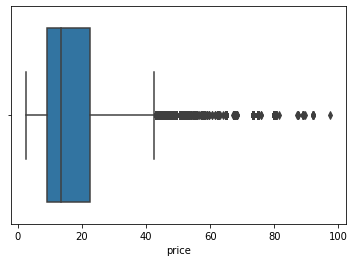

In [63]:
sns.boxplot(new_data2.price)

semua kolom price pada jenis servis uber taksi memiliki missing value, hal ini penulis anggap sebagai missing value jenis MNAR karena memang price untuk servis taksi tidak terinput dalam aplikasi uber sehingga data tidak dapat dikoleksi. untuk mengatasi nilai yang hilang tersebut, maka nilai taksi akan diimputasi dengan nilai rata-rata untuk jenis pelayanan moderate, karena secara tingkatan jenis kendaraan taksi masuk kedalam kelas moderate.

In [64]:
#nilai price taksi yang missing value di impute dengan nilai rata-rata untuk kategori servis moderate
for i in ["price"]:
    new_data2.loc[new_data2.loc[:,i].isnull(),i] = new_data2[new_data2.service_category=='moderate'].loc[:,i].mean()
new_data2.price.isnull().sum()

#trimming outlier
bb, ba = iqr(new_data2.price, 1.5)
a=new_data2.shape[0]
new_data2 = new_data2[(new_data2['price']>bb) & (new_data2['price']<ba)]
b=new_data2.shape[0]

In [65]:
bb, ba

(-10.0, 42.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


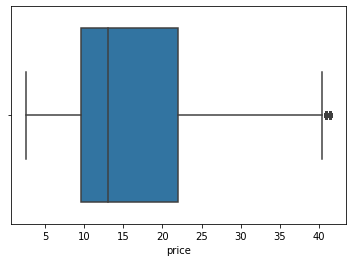

In [66]:
sns.boxplot(new_data2.price)

In [67]:
#presentase jumlah outlier price
print('outlier kolom price : {0} %'.format(round((a - b)/a*100, 2)))

outlier kolom price : 1.18 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


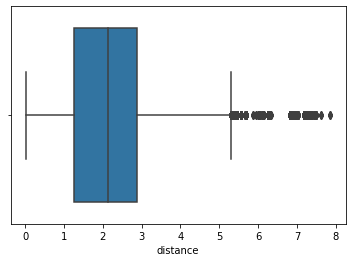

In [68]:
sns.boxplot(new_data2.distance)

In [69]:
bb, ba = iqr(new_data2.distance, 1.5)
a=new_data2.shape[0]
new_data2 = new_data2[(new_data2['distance']>bb) & (new_data2['distance']<ba)]
b=new_data2.shape[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


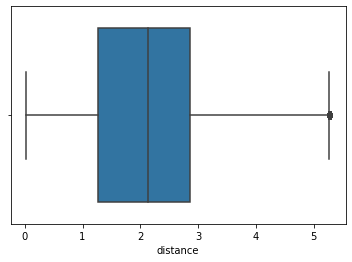

In [70]:
sns.boxplot(new_data2.distance)

In [71]:
#presentase jumlah outlier distance
print('outlier kolom distance : {0} %'.format(round((a - b)/a*100, 2)))

outlier kolom distance : 1.24 %


In [72]:
new_data2.price.isnull().sum()

0

### d. Data Splitting and transfomation

In [73]:
new_data2.head()

,hour,cab_type,price,distance,surge_multiplier,short_summary,service_category
0,9,Lyft,5.0,0.44,1.0,Mostly Cloudy,decent
1,2,Lyft,11.0,0.44,1.0,Rain,economy
2,1,Lyft,7.0,0.44,1.0,Clear,moderate
3,4,Lyft,26.0,0.44,1.0,Clear,luxury
4,3,Lyft,9.0,0.44,1.0,Partly Cloudy,popular


**Data Splitting**

In [74]:
X2 = new_data2.drop('price', axis=1)
y2 = new_data2['price']

In [75]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=98)

In [76]:
X2_train.columns

Index(['hour', 'cab_type', 'distance', 'surge_multiplier', 'short_summary',
       'service_category'],
      dtype='object')

In [77]:
num_values = ['hour', 'distance']
cat_values = ['cab_type', 'short_summary']
ord_values = ['service_category', 'surge_multiplier']

In [78]:
#memisahakan masing masing tipe data
X2_train_num = X2_train[num_values]
X2_train_cat = X2_train[cat_values]
X2_train_ord = X2_train[ord_values]
X2_test_num = X2_test[num_values]
X2_test_cat = X2_test[cat_values]
X2_test_ord = X2_test[ord_values]

**Data Transformation**

In [79]:
#scaling numerik
scaler = StandardScaler()
X2_train_num_scaled = scaler.fit_transform(X2_train_num)
X2_test_num_scaled = scaler.transform(X2_test_num)

In [80]:
#encode nominal
ohe = OneHotEncoder(sparse=False)
X2_train_cat_enc = ohe.fit_transform(X2_train_cat)
X2_test_cat_enc = ohe.transform(X2_test_cat)

In [81]:
#encode ordinal
surge = [1, 1.25, 1.5, 1.75, 2, 2.5, 3]
ser = ['decent', 'moderate', 'popular', 'economy', 'premium', 'luxury']
oe = OrdinalEncoder(categories=[ser, surge])
X2_train_ord_enc = oe.fit_transform(X2_train_ord)
X2_test_ord_enc = oe.transform(X2_test_ord)

In [82]:
X2_train_all = np.column_stack([X2_train_num_scaled, X2_train_cat_enc, X2_train_ord_enc])
X2_test_all = np.column_stack([X2_test_num_scaled, X2_test_cat_enc, X2_test_ord_enc])

## 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

**Linear regression**

In [83]:
model1 = LinearRegression(fit_intercept=True)

## 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### a. Tanpa Polynomial Features

In [84]:
model1.fit(X2_train_all, y2_train)

LinearRegression()

In [85]:
y2_pred_train = model1.predict(X2_train_all)
y2_pred = model1.predict(X2_test_all)

In [86]:
print(model1.intercept_)
print(model1.coef_)

-6418032385726.479
[ 2.21008862e-03  2.53610738e+00  6.52206819e+12  6.52206819e+12
 -1.04035800e+11 -1.04035800e+11 -1.04035800e+11 -1.04035800e+11
 -1.04035800e+11 -1.04035800e+11 -1.04035800e+11 -1.04035800e+11
 -1.04035800e+11  4.40299886e+00  3.09951615e+00]


### b. Dengan Polynomial Features

In [87]:
model2 = PolynomialFeatures(2)

In [88]:
X_train_poly = model2.fit_transform(X2_train_all)
X_test_poly = model2.transform(X2_test_all)

In [89]:
model3 = LinearRegression(fit_intercept=True)

In [90]:
model3.fit(X_train_poly, y2_train)

LinearRegression()

In [91]:
y2_pred_train_poly = model3.predict(X_train_poly)
y2_pred_poly = model3.predict(X_test_poly)

In [92]:
# print(model3.intercept_)
# print(model3.coef_)

## 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [93]:
print('Without Polynomial Features')
print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y2_train,y2_pred_train))
print('RMSE:',mean_squared_error(y2_train,y2_pred_train,squared=False))
print('R2 Score:',r2_score(y2_train,y2_pred_train))
print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y2_test,y2_pred))
print('RMSE:',mean_squared_error(y2_test,y2_pred,squared=False))
print('R2 Score:',r2_score(y2_test,y2_pred))

Without Polynomial Features
==================== TRAIN ====================
MAE: 2.155835129024505
RMSE: 2.79539905405632
R2 Score: 0.8897023967867486
==================== TEST ====================
MAE: 2.1591143013090375
RMSE: 2.8012417963124903
R2 Score: 0.8892128618303651


In [94]:
print('With Polynomial Features (Degree=2)')
print('==================== TRAIN ====================')
print('MAE:',mean_absolute_error(y2_train,y2_pred_train_poly))
print('RMSE:',mean_squared_error(y2_train,y2_pred_train_poly,squared=False))
print('R2 Score:',r2_score(y2_train,y2_pred_train_poly))
print('==================== TEST ====================')
print('MAE:',mean_absolute_error(y2_test,y2_pred_poly))
print('RMSE:',mean_squared_error(y2_test,y2_pred_poly,squared=False))
print('R2 Score:',r2_score(y2_test,y2_pred_poly))

With Polynomial Features (Degree=2)
==================== TRAIN ====================
MAE: 1.6171815894791648
RMSE: 2.193183415842622
R2 Score: 0.9321064755731087
==================== TEST ====================
MAE: 1.619991197109826
RMSE: 2.1969748337785497
R2 Score: 0.9318543226251795


## 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [95]:
data_inf.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
233660,d30587c1-ae1a-4da4-969f-575f4a0ed417,1.543234e+09,12,26,11,2018-11-26 12:02:10,America/New_York,Northeastern University,Beacon Hill,Lyft,lyft_lux,Lux Black,22.5,2.44,1.0,42.2148,-71.0330,41.30,41.30,Overcast,"Rain until morning, starting again in the eve...",0.000,0.00,0.93,2.55,2.60,1543291200,3.475,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,cloudy,39.51,1014.97,54,1.00,0,3.475,297.7,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
114669,c881641e-0693-41b7-8caf-d4358dff61a8,1.543325e+09,13,27,11,2018-11-27 13:30:22,America/New_York,Back Bay,Fenway,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,1.34,1.0,42.3588,-71.0707,44.94,42.13,Possible Drizzle,Light rain in the morning.,0.007,0.61,0.94,5.23,5.23,1543338000,3.231,47.06,1543320000,33.83,1543399200,44.15,1543320000,30.13,1543399200,rain,43.32,988.09,227,1.00,0,3.231,322.8,1543319471,1543353348,0.68,0.1429,1543338000,36.37,1543377600,47.06,1543320000,32.40,1543377600,44.15,1543320000
114609,99ba01ca-2557-48a2-8bb6-885b4b1d50da,1.543515e+09,18,29,11,2018-11-29 18:03:03,America/New_York,Beacon Hill,Boston University,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,8.5,2.27,1.0,42.2148,-71.0330,43.65,37.25,Partly Cloudy,Partly cloudy throughout the day.,0.000,0.00,0.52,12.55,23.67,1543514400,9.920,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,partly-cloudy-day,27.12,1006.54,312,0.35,1,9.920,313.5,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
412425,7bf52e3f-d1df-4f98-94b6-97b0edf9ec2e,1.543255e+09,17,26,11,2018-11-26 17:53:09,America/New_York,North Station,Northeastern University,Lyft,lyft_premier,Lux,22.5,3.26,1.0,42.3661,-71.0631,45.83,43.88,Overcast,"Rain until morning, starting again in the eve...",0.001,0.12,0.88,4.22,5.17,1543287600,8.104,46.49,1543255200,41.90,1543298400,43.84,1543244400,36.70,1543298400,cloudy,42.51,1012.59,114,1.00,1,8.104,294.0,1543233003,1543266973,0.64,0.1225,1543251600,40.45,1543233600,46.49,1543255200,37.17,1543291200,43.84,1543244400
488015,bd928306-6ece-42f0-bf28-0ba19746a759,1.543858e+09,17,3,12,2018-12-03 17:32:56,America/New_York,North Station,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.5,0.56,1.0,42.3505,-71.1054,54.59,54.59,Mostly Cloudy,Foggy in the morning.,0.000,0.00,0.63,9.43,15.07,1543856400,10.000,56.89,1543852800,33.73,1543921200,56.22,1543852800,28.72,1543914000,partly-cloudy-day,42.08,998.90,286,0.83,1,10.000,304.1,1543838265,1543871633,0.89,0.0004,1543852800,43.10,1543896000,56.89,1543852800,40.05,1543896000,56.22,1543852800


In [96]:
data_inf2 = data_inf.drop(natural_factor2+temp_feature2+unrelated, axis=1).reset_index(drop=True)
data_inf2

,hour,cab_type,name,price,distance,surge_multiplier,short_summary
0,12,Lyft,Lux Black,22.5,2.44,1.0,Overcast
1,13,Uber,UberX,7.5,1.34,1.0,Possible Drizzle
2,18,Uber,WAV,8.5,2.27,1.0,Partly Cloudy
3,17,Lyft,Lux,22.5,3.26,1.0,Overcast
4,17,Uber,Black SUV,26.5,0.56,1.0,Mostly Cloudy
5,5,Lyft,Lyft XL,13.5,1.54,1.0,Mostly Cloudy
6,13,Uber,UberPool,7.5,1.91,1.0,Partly Cloudy
7,2,Uber,WAV,13.0,4.84,1.0,Clear
8,18,Uber,UberX,11.5,4.55,1.0,Clear
9,16,Uber,WAV,9.5,2.66,1.0,Mostly Cloudy


In [97]:
# loop untuk mengelompokan service berdasarkan kelompok/kategorinya masing2 (luxury, premium, dll)
data_inf2['service_category'] = data_inf2['name']
for i in range(6):
  data_inf2 = data_inf2.replace({'service_category': serv_class[i]}, serv[i])

data_inf2 =  data_inf2.drop(columns=['name'])

In [98]:
data_inf2

,hour,cab_type,price,distance,surge_multiplier,short_summary,service_category
0,12,Lyft,22.5,2.44,1.0,Overcast,premium
1,13,Uber,7.5,1.34,1.0,Possible Drizzle,moderate
2,18,Uber,8.5,2.27,1.0,Partly Cloudy,moderate
3,17,Lyft,22.5,3.26,1.0,Overcast,economy
4,17,Uber,26.5,0.56,1.0,Mostly Cloudy,luxury
5,5,Lyft,13.5,1.54,1.0,Mostly Cloudy,popular
6,13,Uber,7.5,1.91,1.0,Partly Cloudy,decent
7,2,Uber,13.0,4.84,1.0,Clear,moderate
8,18,Uber,11.5,4.55,1.0,Clear,moderate
9,16,Uber,9.5,2.66,1.0,Mostly Cloudy,moderate


In [99]:
#split numerical and categorical columns
data_inf_num = data_inf2[num_values]
data_inf_cat = data_inf2[cat_values]
data_inf_ord = data_inf2[ord_values]

In [100]:
#encoding and scaling 
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_enc = ohe.transform(data_inf_cat)
data_inf_ord_enc = oe.transform(data_inf_ord)

In [101]:
data_inf_all = np.column_stack([data_inf_num_scaled, data_inf_cat_enc, data_inf_ord_enc])

In [102]:
data_inf_all_final = model2.transform(data_inf_all)

In [103]:
#preding y_inf menggunakan poly feature dan regresi
y_pred_inf = model3.predict(data_inf_all_final)

In [104]:
y_pred_inf

array([24.43286896,  9.04808855, 10.3683567 , 21.30742741, 22.70734024,
       11.12069321,  8.00833273, 14.59206963, 14.00890923, 10.93740273])

In [105]:
real_pred = pd.DataFrame({'real': list(data_inf['price']), 'prediction': list(y_pred_inf)})
real_pred

,real,prediction
0,22.5,24.432869
1,7.5,9.048089
2,8.5,10.368357
3,22.5,21.307427
4,26.5,22.707340
5,13.5,11.120693
6,7.5,8.008333
7,13.0,14.592070
8,11.5,14.008909
9,9.5,10.937403


## 10. Pengambilan Kesimpulan

* berdasarkan model regresi linear dengan polynomial feature degree 2 yang telah dibuat, didapat nilai R2 score train adalah 0.9321 dan nilai R2 score tes adalah 0.9318. dari metrics ini dapat disimpulkan bahwa model sudah good fit karena score train dan test seimbang.
* Nilai rmse untuk train maupun test berada dikisaran 2.19. hal ini menujukan bahwa jika model kita memprediksi dan mengeluarkan output sama dengan 10 maka nilai realnya akan berada direntang nilai 12.19 atau 7.81.
* setelah dilakukan model inference ternyata model dalam projek ini dapat memprediksi data baru yang belum diperkenalkan sebelumnya dengan cukup baik dengan detail dibawah ini :

In [106]:
real_pred

,real,prediction
0,22.5,24.432869
1,7.5,9.048089
2,8.5,10.368357
3,22.5,21.307427
4,26.5,22.707340
5,13.5,11.120693
6,7.5,8.008333
7,13.0,14.592070
8,11.5,14.008909
9,9.5,10.937403
